<a href="https://colab.research.google.com/github/naive1899/Base/blob/main/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритмы на Python

# **Асимптотический анализ алгоритмов: подробное объяснение**

Асимптотическая сложность — это способ оценки времени выполнения или использования памяти алгоритма в зависимости от размера входных данных. Основные обозначения:
- **O (Big-O)**: верхняя граница (худший случай).
- **Ω (Big-Omega)**: нижняя граница (лучший случай).
- **Θ (Big-Theta)**: точная оценка (средний случай).

---

 **1. Проход по массиву**

**Временная сложность**: `O(n)`
- **Описание**: Каждый элемент массива обрабатывается один раз.
- **Пример**: Суммирование всех элементов массива.
  ```python
  def sum_array(arr):
      total = 0
      for num in arr:
          total += num
      return total
  ```
- **Как считать**:
  - Цикл `for` выполняется `n` раз (где `n = len(arr)`).
  - Итог: `O(n)`.

**Пространственная сложность**: `O(1)`
- **Объяснение**: Используется фиксированное количество переменных (`total`, `num`), независимо от `n`.

---

**2. Хэшмапы (словари)**

**Временная сложность**:
- **Вставка/Поиск/Удаление**:
  - **Средний случай**: `O(1)`.
  - **Худший случай**: `O(n)` (при коллизиях, когда все ключи попадают в одну ячейку).
- **Пример**: Подсчёт частоты элементов.
  ```python
  from collections import defaultdict

  def count_freq(arr):
      freq = defaultdict(int)
      for num in arr:
          freq[num] += 1
      return freq
  ```
- **Как считать**:
  - Цикл `for` выполняется `n` раз.
  - Каждая операция `freq[num] += 1` занимает `O(1)` (в среднем).
  - Итог: `O(n)`.

**Пространственная сложность**: `O(n)`
- **Объяснение**: В худшем случае все элементы уникальны, и `freq` хранит `n` записей.

---

**3. Бинарный поиск**

 **Временная сложность**: `O(log n)`
- **Описание**: Область поиска делится пополам на каждом шаге.
- **Пример**: Поиск элемента в отсортированном массиве.
  ```python
  def binary_search(arr, target):
      left, right = 0, len(arr) - 1
      while left <= right:
          mid = (left + right) // 2
          if arr[mid] == target:
              return mid
          elif arr[mid] < target:
              left = mid + 1
          else:
              right = mid - 1
      return -1
  ```
- **Как считать**:
  - На каждом шаге размер массива уменьшается в 2 раза.
  - Количество шагов: `log₂(n)`.
  - Итог: `O(log n)`.

**Пространственная сложность**: `O(1)`
- **Объяснение**: Используются фиксированные переменные (`left`, `right`, `mid`).

---

**4. Метод двух указателей**

 **Временная сложность**: `O(n)`
- **Описание**: Два указателя движутся по массиву, сокращая пространство поиска.
- **Пример**: Поиск пары с заданной суммой в отсортированном массиве.
  ```python
  def find_pair(arr, target):
      left, right = 0, len(arr) - 1
      while left < right:
          current_sum = arr[left] + arr[right]
          if current_sum == target:
              return (arr[left], arr[right])
          elif current_sum < target:
              left += 1
          else:
              right -= 1
      return None
  ```
- **Как считать**:
  - Каждый указатель проходит максимум `n` шагов.
  - Итог: `O(n)`.

**Пространственная сложность**: `O(1)`
- **Объяснение**: Используются фиксированные переменные (`left`, `right`, `current_sum`).

---

**5. Алгоритмы на графах**

 **A. BFS (обход в ширину)**
- **Временная сложность**: `O(V + E)`
  - **V**: количество вершин.
  - **E**: количество рёбер.
- **Описание**: Каждая вершина и ребро обрабатываются один раз.
- **Пример**: Поиск в ширину для неориентированного графа.
  ```python
  from collections import deque

  def bfs(graph, start):
      visited = set()
      queue = deque([start])
      while queue:
          node = queue.popleft()
          if node not in visited:
              visited.add(node)
              for neighbor in graph[node]:
                  queue.append(neighbor)
      return visited
  ```
- **Как считать**:
  - Каждая вершина добавляется в очередь один раз.
  - Каждое ребро проверяется один раз.
  - Итог: `O(V + E)`.

**B. DFS (обход в глубину)**
- **Временная сложность**: `O(V + E)`
- **Описание**: Рекурсивный или итеративный обход, посещающий все достижимые вершины.
- **Пример**:
  ```python
  def dfs(graph, node, visited=None):
      if visited is None:
          visited = set()
      visited.add(node)
      for neighbor in graph[node]:
          if neighbor not in visited:
              dfs(graph, neighbor, visited)
      return visited
  ```
- **Как считать**:
  - Каждая вершина и ребро обрабатываются один раз.
  - Итог: `O(V + E)`.

**C. Алгоритм Дейкстры (кратчайший путь)**
- **Временная сложность**:
  - **С использованием кучи**: `O((V + E) log V)`.
  - **С использованием фибоначчиевой кучи**: `O(E + V log V)`.
- **Описание**: Находит кратчайшие пути от одной вершины ко всем другим в графе с неотрицательными весами.
- **Пример**:
  ```python
  import heapq

  def dijkstra(graph, start):
      distances = {node: float('infinity') for node in graph}
      distances[start] = 0
      heap = [(0, start)]
      while heap:
          current_dist, current_node = heapq.heappop(heap)
          if current_dist > distances[current_node]:
              continue
          for neighbor, weight in graph[current_node]:
              distance = current_dist + weight
              if distance < distances[neighbor]:
                  distances[neighbor] = distance
                  heapq.heappush(heap, (distance, neighbor))
      return distances
  ```
- **Как считать**:
  - Каждое ребро может быть обработано один раз, и каждая вершина добавляется в кучу `O(log V)` раз.
  - Итог: `O((V + E) log V)`.

---

**6. Пространственная сложность графовых алгоритмов**

| Алгоритм | Пространственная сложность | Объяснение |
|---------|-----------------------------|------------|
| **BFS** | `O(V)` | Хранение очереди и посещённых вершин. |
| **DFS** | `O(V)` | Хранение стека рекурсивных вызовов или явного стека. |
| **Дейкстры** | `O(V + E)` | Хранение расстояний и кучи. |

---

**Итоговая таблица**

| Алгоритм | Временная сложность | Пространственная сложность |
|---------|----------------------|-----------------------------|
| Проход по массиву | `O(n)` | `O(1)` |
| Хэшмапы | `O(n)` (в среднем) | `O(n)` |
| Бинарный поиск | `O(log n)` | `O(1)` |
| Два указателя | `O(n)` | `O(1)` |
| BFS | `O(V + E)` | `O(V)` |
| DFS | `O(V + E)` | `O(V)` |
| Дейкстры | `O((V + E) log V)` | `O(V + E)` |

---

**Ключевые моменты**
- **Константы игнорируются**: В `O(n)` не учитываются множители (например, `O(2n) = O(n)`).
- **Худший vs Средний случай**: Например, хэшмапы работают за `O(1)` в среднем, но `O(n)` в худшем.
- **Структура данных влияет на сложность**: Например, представление графа списками смежности (`O(V + E)`) vs матрицей (`O(V²)`).

Этот анализ помогает выбирать оптимальные алгоритмы для конкретных задач. 🚀

# Использование словаря для работы с подмассивами и остатками: полное руководство

Словари в Python — ключевой инструмент для оптимизации алгоритмов работы с подмассивами, особенно при решении задач с условиями на суммы, остатки и индексы. Основная идея — использование **префиксных сумм** и **хранения остатков/индексов** в словаре для достижения сложности O(n).


### Ключевые особенности словарей в Python

**Основные характеристики:**
- **Средняя сложность O(1)** для операций:
  - Вставка (`dict[key] = value`).
  - Удаление (`del dict[key]`).
  - Поиск (`key in dict`).
- **Гибкость ключей**:  
  Допускаются любые **неизменяемые** типы:
  - Числа (`int`, `float`).
  - Строки (`str`).
  - Кортежи (`tuple`), если они содержат только неизменяемые элементы.
- **Удобные методы** для работы с данными.

---

**Основные методы словарей:**

| Метод          | Описание                                                                 |
|----------------|--------------------------------------------------------------------------|
| `dict.get(key, default)` | Возвращает значение по ключу. Если ключа нет — возвращает `default` (по умолчанию `None`). |
| `dict.keys()`  | Возвращает список всех ключей словаря.                                   |
| `dict.values()`| Возвращает список всех значений словаря.                                 |
| `dict.items()` | Возвращает список кортежей `(ключ, значение)` для всех элементов.        |
| `dict.update(other_dict)`| Добавляет/обновляет элементы из другого словаря или итерируемого объекта. |
| `dict.pop(key, default)`| Удаляет ключ и возвращает его значение. Если ключа нет — возвращает `default`. |
| `dict.clear()` | Удаляет все элементы словаря.                                            |
| `dict.setdefault(key, default)`| Возвращает значение ключа. Если ключа нет — создаёт его с `default` и возвращает. |

### Сравнение `dict`  и `defaultdict` из `collections`

**Обработка отсутствующих ключей**
- **`dict`**:
  - При обращении к несуществующему ключу вызывает `KeyError`
  - Требует явной проверки или использования `get()`
  ```python
  d = {}
  d['a'] = 1
  print(d['b'])  # KeyError: 'b'
  ```
  Решение
  ```python
  if 'b' in d:   
      print(d['b'])
  ```
  


- **`defaultdict`**:
  - Автоматически создает ключ с значением по умолчанию
  - Никогда не вызывает `KeyError` при чтении
  ```python
  from collections import defaultdict
  dd = defaultdict(int)
  print(dd['b'])  # 0 (автоматически создано)

  ```


**Инициализация**
- **`dict`**:
  - Пустой словарь: `d = {}`
  - С элементами: `d = {'a': 1, 'b': 2}`
  
- **`defaultdict`**:
  - Требует фабричную функцию для значений по умолчанию:

  ```python
  dd_int = defaultdict(int)       # 0 по умолчанию
  dd_list = defaultdict(list)     # [] по умолчанию
  dd_set = defaultdict(set)       # set() по умолчанию
  ```

 **Типичные сценарии использования**

| Задача | Рекомендуемый тип |
|-------|-------------------|
| **Подсчёт частоты элементов** | `defaultdict(int)` |
| **Группировка данных** | `defaultdict(list)` или `defaultdict(set)` |
| **Работа с графами (списки смежности)** | `defaultdict(list)` |
| **Нужно строго контролировать существующие ключи** | `dict` |
| **Ограничения на память (избегать лишних ключей)** | `dict` |
| **Совместимость с кодом, где `defaultdict` не доступен** | `dict` |

**Пример группировки данных**
Задача: сгруппировать слова по первой букве.

**С `dict`**:
```python
words = ["apple", "banana", "cherry", "date", "bar"]
d = {}
for word in words:
    key = word[0]
    if key not in d:
        d[key] = []
    d[key].append(word)
# {'a': ['apple'], 'b': ['banana', 'bar'], 'c': ['cherry'], 'd': ['date']}
```

**С `defaultdict`**:
```python
dd = defaultdict(list)
for word in words:
    key = word[0]
    dd[key].append(word)  # Автоматическое создание списка
```

**Подсчёт частоты элементов**
- **С `defaultdict`:**
  ```python
  from collections import defaultdict

  freq = defaultdict(int)
  for num in [1, 2, 2, 3, 1, 1]:
      freq[num] += 1
  print(freq)  # defaultdict(int, {1: 3, 2: 2, 3: 1})
  ```
- **С обычным `dict`:**
  ```python
  freq = {}
  for num in [1, 2, 2, 3, 1, 1]:
      if num in freq:
          freq[num] += 1
      else:
          freq[num] = 1
  print(freq)  # {1: 3, 2: 2, 3: 1}
  ```
**Важные нюансы**
- **`defaultdict` не вызывает дефолтное значение при `dict.get()`**:
  ```python
  d = defaultdict(int)
  print(d.get(100))  # None, а не 0!
  ```
  Чтобы получить дефолтное значение, используйте `d[100]`.

- **Функция по умолчанию может быть любой**:
  ```python
  from collections import defaultdict

  def default_value():
      return "missing"

  d = defaultdict(default_value)
  print(d[100])  # "missing"
  ```
- **`defaultdict`**:
  - Автоматически создает записи при обращении
  - `key in dd` всегда возвращает `True` после чтения ключа
  - `dd.keys()` включает все "автосозданные" ключи

- **`dict`**:
  - Метод `setdefault()` похож на поведение defaultdict:
  ```python
  d.setdefault('a', []).append(1)  # {'a': [1]}
  ```
**Производительность**
- **`defaultdict`** немного медленнее при создании (~10-15% в микротестах)
- Но выигрывает в читаемости и лаконичности кода
- В реальных сценариях разница обычно незначительна


**Визуальное сравнение операций**

| Операция                | `dict`                          | `defaultdict`                     |
|-------------------------|---------------------------------|-----------------------------------|
| Чтение отсутств. ключа  | `KeyError`                      | Создает значение                  |
| Добавление элемента     | Требует проверки ключа          | Прямое добавление                 |
| Инициализация коллекции | Ручное создание                 | Автоматическая                    |
| Проверка наличия ключа  | `key in d`                      | `key in dd` (но после чтения = всегда True) |
| Использование с типами  | Любые                           | Требует фабричной функции         |



### **Префиксная математика**

В контексте префиксной суммы и подмассивов, одинаковые остатки или таргеты (целевые значения) могут указывать на подмассивы, удовлетворяющие определённым условиям. Рассмотрим два случая:

 1. **Подмассивы с суммой равной `S`**  

**Ключевая идея:**  
Если `prefix[j] - prefix[i] = S`, то подмассив `[i+1, j]` **включительно**  имеет сумму `S` (в питоне `arr=[i+1:j+1]`  ).  

- **Одинаковые таргеты (`prefix[j] - prefix[i] = S`)**  или **(`prefix - S = target`)**

  **Означают, что разница между префиксными суммами на позициях `j` и `i` равна `S`, то есть подмассив `[i+1, j]` имеет сумму `S`**.  

**Пример:**  
Если `prefix[0]=0` для массива `[1, 2, 3, 4]` и `S = 5`:  
- Префиксные суммы: `[0, 1, 3, 6, 10]`  
- `prefix[3] - prefix[1] = 6 - 1 = 5` → подмассив `[2, 3]` (элементы `2 + 3 = 5`) или `arr=[1:3]`.  

Если `prefix[0]=arr[0]`, то для массива `[1, 2, 3, 4]` и `S = 5`:
- Префиксные суммы: `[1, 3, 6, 10]`  
- `prefix[2] - prefix[0] = 6 - 1 = 5` → подмассив `[2, 3]` (элементы `2 + 3 = 5`) или `arr=[1:3]`.

---

 2. **Подмассивы с суммой, делящейся на `k`**  
  

**Ключевая идея:**  
Если `(prefix[j] - prefix[i]) % k = 0 → prefix[j] % k = prefix[i] % k` , то подмассив `[i+1, j]` (**включительно**) делится на `k`.  

- **Одинаковые остатки (`prefix[j] % k == prefix[i] % k`)**  
  **Означают, что разница `prefix[j] - prefix[i]` кратна `k`, то есть подмассив `[i+1, j]` делится на `k`**.  


**Пример:**  
Для массива `[4, 5, 0, -2, -3, 1]` и `k = 5`:  
- `prefix[0]=0`
- `prefix = (prefix + num ) % k`
- Префиксные суммы: `[0, 4, 9, 9, 7, 4, 5]`  
- Остатки от деления на `5`: `[0, 4, 4, 4, 2, 4, 0]`  
- Пары с одинаковыми остатками:  

   **Остаток 4:**
   - `prefix[1]` и `prefix[2]` → подмассив `arr[1:2]` = `[5]`
   - `prefix[1]` и `prefix[3]` → подмассив `arr[1:3]` = `[5, 0]`
   - `prefix[2]` и `prefix[3]` → подмассив `arr[2:3]` = `[0]`
   - `prefix[1]` и `prefix[5]` → подмассив `arr[1:5]` = `[5, 0, -2, -3]`
   - `prefix[2]` и `prefix[5]` → подмассив `arr[2:5]` = `[0, -2, -3]`
   - `prefix[3]` и `prefix[5]` → подмассив `arr[3:5]` = `[-2, -3]`

   **Остаток 0:**
   - `prefix[0]` и `prefix[6]` → подмассив `arr[0:6]` = `[4, 5, 0, -2, -3, 1]`

---

 **Вывод**  
- **Одинаковые таргеты (`prefix[j] - prefix[i] = S`)** → подмассивы с суммой `S`.  
- **Одинаковые остатки (`prefix[j] % k == prefix[i] % k`)** → подмассивы, сумма которых делится на `k`.  
- Оба подхода основаны на идее, что разность префиксных сумм дает сумму подмассива. Разница лишь в том, что для `S` мы ищем конкретную разность, а для `k` — кратность через остатки.



**Пример для деления**

```python
# Для задач деления  естественно использовать префиксный массив [0]*(n+1)
arr = [4, 5, 0, -2, -3, 1]
k = 5
n = len(arr)

prefix_mod = [0] * (n+1)
for i in range(n):
    prefix_mod[i+1] = (prefix_mod[i] + arr[i]) % k
print(prefix_mod)  # [0, 4, 4, 4, 2, 4, 0]

# Подмассив делится на k, если prefix_mod[j] == prefix_mod[i]
# Например, prefix_mod[3] = 4, prefix_mod[1] = 4
# Подмассив arr[1:3] = [5, 0] делится на 5
```



```python
# здесь при делении нужно обрабатывать граничные случаи, что совсем неудобно
arr = [4, 5, 0, -2, -3, 1]
n=len(arr)
k=5
prefix_mod = [0] * n
prefix_mod[0] = arr[0] % k
for i in range(1, n):
    prefix_mod[i] = (prefix_mod[i-1] + arr[i]) % k
print(prefix_mod)  [4, 4, 4, 2, 4, 0]

# Теперь нужно аккуратно обрабатывать подмассивы с началом в 0
# Подмассив arr[0:j] делится на k, если prefix_mod[j-1] % k == 0
# Подмассив arr[i:j] (i>0) делится на k, если (prefix_mod[j-1] - prefix_mod[i-1]) % k == 0
```



Ключевое отличие от подхода с `[0]*(n+1)`:

идентичная ситуация  для остатка и суммы

**С `[0]*(n+1)`**: `sum(arr[i:j]) = prefix[j] - prefix[i]`

**С `[0]*n`**: `sum(arr[i:j]) = prefix[j-1] - (prefix[i-1] if i > 0 else 0)`
Этот подход требует дополнительных проверок граничных случаев, но математически эквивалентен первому.

**Используйте `n+1` когда:**
1. Работаете с подмассивами как срезами Python
2. Нужна универсальная формула без исключений
3. Задача требует подсчета всех подмассивов (включая начинающиеся с 0)

**Можете использовать `n` когда:**
1. Только читаете литературу с таким обозначением
2. Работаете с языками, где индексы строго 0-based
3. Предпочитаете "экономить" один элемент памяти (микрооптимизация)

**Рекомендация:** В 95% случаев лучше использовать **`n+1`**, так как это:
- Более читаемо
- Меньше ошибок на граничных случаях
- Естественнее для Python-стиля

**Пример для сумм:**
```python
arr=[1,2,3,4,5,6]
n=len(arr)

prefix_sum = [0] * (n + 1)     # удобное построение                   
for i in range(n):
    prefix_sum[i + 1] = prefix_sum[i] + arr[i]    # [0,1,3,6,10,15,21]

prefix_sum = [0] * n
prefix_sum[0] = arr[0]
      for i in range(1, n):
          prefix_sum[i] = prefix_sum[i - 1] + arr[i] # [1,3,6,10,15,21]
```  

**Построение суффиксного массива справо налево**:

Используйте суффиксные суммы, если:

- Требуется анализировать хвостовые части массива.

- Задача требует обработки данных в обратном порядке.

```python
arr=[1,2,3,4,5,6]
n=len(arr)

suffix_sum = [0] * (n + 1)     # удобное построение                  
for i in range(n-1, -1, -1):
    suffix_sum[i] = arr[i] + suffix_sum[i+1]     # [21, 20, 18, 15, 11, 6, 0]  Массив заполняется справа налево

suffix_sum = [0] * n                             
suffix_sum[-1] = arr[-1]  
for i in range(n-2, -1, -1):
    suffix_sum[i] = arr[i] + suffix_sum[i+1]     # [21, 20, 18, 15, 11, 6]    Массив заполняется справа налево
```  

### **Поиск max_len arr**

Поиск подмассивов максимальной длины отличается тем, что нам нужно искать только первое вхождение индекса, чтобы получить подмассив максимальной длины.

```python
    ###
    if prefix not in seen:
      seen[prefix] = i
```
 У подмассивов с суммой и кратностью есть различия

1. Почему для всех задач, где **"max_len_subarray=S"** (первое вхождение, подсчет количества, вывод всех подмассивов макс длины)  **достаточно первого индекса:**
- **Причина**: Для подмассива с суммой `S` выполняется условие:  
  `prefix[j] - prefix[i] = S` → `prefix[i] = prefix[j] - S` или
  
  `prefix - target = S` → `target=prefix - S`.  
  Чтобы максимизировать длину `j - i`, нужно найти *минимальный* `i` для каждого `prefix[j] - S`.  
  Хранение первого индекса гарантирует, что для любого `j` длина будет максимально возможной.
- **Пример**:  
  Для `arr = [3, 1, 1, 3]`, `S = 5`:
  - Префиксные суммы: `[0, 3, 4, 5, 8]`
  - Для `j=3` (`prefix[3]=8`): ищем `prefix[i] = 8-5=3` → первый индекс `i=0` → длина `3-0=3` (`[1,1,3]`).
  - Для `j=2` (`prefix[2]=5`): ищем `prefix[i]=5-5=0` → первый индекс `i=-1` → длина `2-(-1)=3` (`[3,1,1]`).

**2. Почему для задачи "кратно k" в функциях подсчёта/вывода нужны все индексы:**
- **Причина**: Нужно найти **совпадающие** остатки. Для подмассива с суммой кратной `k` выполняется:  
  `(prefix[j] - prefix[i]) % k = 0` → `prefix[j] % k = prefix[i] % k`.  
  Хотя максимальная длина достигается с *первым* индексом, **подсчёт количества** или **вывод подмассивов** требует учёта *всех* пар индексов с одинаковым остатком:
  1. **Для длины** достаточно первого индекса (как в `max_len_divisible_subarray`).
  2. **Для подсчёта/вывода** всех подмассивов максимальной длины необходимо проверить *все* индексы с одинаковым остатком, так как:
     - Максимальная длина `L` определяется в процессе итерации.
     - Подмассив длины `L` может начинаться не только с первого индекса остатка, но и с последующего, если он даёт ту же длину `L` (что возможно только если первый индекс не участвует в формировании `L`).
```python
    ###
    seen[prefix] = i  # Сохраняем первый индекс остатка
```

- **Пример**:  
  Для `arr = [5, 0, 0, 5]`, `k=5`:
  - Префиксные суммы (остатки): `[0:0, 5:0, 5:0, 5:0, 10:0]`
  - Индексы остатка `0`: `[-1, 0, 1, 2, 3]`
  - Подмассивы длины 4: `[5,0,0,5]` (индексы `0..3`, соответствует паре `i=-1`, `j=3`).
  - Если хранить только первый индекс (`i=-1`), то для `j=3` длина `3-(-1)=4` → учтён 1 подмассив.
  - Но если бы существовал подмассив той же длины `4`, начинающийся с индекса `1` (например, `[0,0,5,X]`), он бы *не* был учтён без хранения всех индексов.

Ключевые отличия задач:

| **Параметр**              | **Сумма = S**                          | **Сумма кратна k**                     |
|---------------------------|----------------------------------------|----------------------------------------|
| **Условие**               | `prefix[j] - prefix[i] = S`            | `(prefix[j] - prefix[i]) % k = 0`     |
| **Цель**                  | Найти конкретную разность              | Найти совпадающие остатки             |
| **Хранение индексов**     | Только первый (для макс. длины)        | Все индексы (для подсчёта/вывода)     |
| **Пример**                | `[3,1,1]` для `S=5`                   | `[5,0,0,5]` для `k=5`                |
| **Сложность**             | `O(n)`                                 | `O(n^2)` в худшем случае              |

 Итог:
- **Для всех подмассивов максимальной длины =S** достаточно **первого** индекса, так как минимальный `i` всегда даёт максимальную длину для текущего `j`.
- **Для "кратно k"**:
  - **max_len_div_subarray**: достаточно **первого** индекса.
  - **Количество/вывод всех подмассивов**: нужны все индексы, чтобы гарантированно учесть все подмассивы максимальной длины, которые могут начинаться не с первого индекса остатка, но давать ту же длину `L`.

### **Инициализация словарей**

**Ключевые закономерности:**

1.  **Базовый случай `seen = {0: -1}`**:
   - **Всегда** используется для учёта подмассивов, когда ищем **первое вхождение** и **все подмассивы максимальной длины =S**
   - Отражает нулевую сумму перед началом массива

ТАБЛИЦА ИНИЦИАЛИЗАЦИИ ДЛЯ ЗАДАЧ С ПОДМАССИВАМИ

| ТИП ЗАДАЧИ | ПОДСЧЕТ КОЛИЧЕСТВА | ВЫВОД МАССИВОВ |
|------------|-------------------|----------------|
| **Сумма кратна k** | defaultdict(int)<br>freq[0] = 1 | defaultdict(list)<br>seen[0] = [-1] |
| **Сумма равна S** | defaultdict(int)<br>freq[0] = 1 | defaultdict(list)<br>seen[0] = [-1] |
| **Мин. длина с суммой S** | defaultdict(list)<br>seen[0] = [-1] |defaultdict(list)<br>seen[0] = [-1] |
| **Макс. длина с суммой S** | dict<br>{0: -1} | dict<br>{0: -1} |
| **Мин. длина с суммой кратной k** | defaultdict(list)<br>seen[0] = [-1] | defaultdict(list)<br>seen[0] = [-1] |
| **Макс. длина с суммой кратной k** | defaultdict(list)<br>`seen[0] = [-1] | defaultdict(list)<br>seen[0] = [-1] |


2. **Для поиска всех подмассивов**:
   - Всегда используется `seen = defaultdict(list)` с инициализацией `seen[0].append(-1)`(**кроме  max_len_subarray=Sum**)
   - Логика: для каждого совпадения `target` проходим по всем индексам и строим подмассивы

2. **Для подсчёта количества**:
- Для подсчета суммы подмассива **равной S** или **кратной k** используется `freq = defaultdict(int)` с инициализацией `freq[0] = 1`. Базовый случай: префиксная сумма или префиксный остаток 0 встречается 1 раз.
- Для задач с **минимальной/максимальной длиной** используется `seen = defaultdict(list)` с инициализацией `seen[0].append(-1)`, так как нужно проверять длину для каждого индекса, (**кроме  всех подмассивов максимальной длины =S**)
так как нужно проверять длину для каждого индекса









*Примечание(требуется дополнительно протестировать):* В вашем примере для `count_max_len_subarrays` и `find_max_len_subarrays` используется `dict`, что корректно, так как для суммы `S` максимальная длина гарантированно достигается на первом индексе. Однако, это верно только если в массиве нет нулевых элементов или отрицательных чисел, которые могут "сбросить" сумму. В общем случае, для абсолютной надежности, даже для суммы `S` можно использовать `defaultdict(list)` для подсчета количества и поиска всех подмассивов максимальной длины.

**Итоговые закономерности**

1.  **Базовый случай `{0: -1}`:** Обязателен для учета подмассивов, начинающихся с первого элемента.
2.  **`defaultdict(int)`:** Используется для простого **подсчета количества** через частотный анализ, где не важны индексы, а только факт встречи.
3.  **`dict` (только первый индекс):** Используется для нахождения **экстремальной длины** (max или min), когда важно именно первое вхождение.
4.  **`defaultdict(list)` (все индексы):** Используется когда нужны:
    - **Все подмассивы**, удовлетворяющие условию.
    - **Точный подсчет** количества подмассивов с **экстремальной длиной**.
    - Задачи, где последующие вхождения могут дать валидный результат (как в случае с `max_len_divisible_subarrays`).

### Шаблоны
Здесь для удобства приведены циклы и `return`  18 задач на поиск первого вхождения подмассива, поиск количества подмассивов, вывода всех подмассивов. Ниже в блокноте написаны сами задачи.
В начале приведены полезные шаблоны


Построение массивов:
```python
# Для остатков кратных k
for i, num in enumerate(arr): # все случаи
    prefix = (prefix + num + abs(k)) % k

for num in arr:  # только вариант для подсчета количества остатков  кратных k (без min/max)
    prefix = (prefix + num + abs(k)) % k



# Для суммы равной S
for i, num in enumerate(arr): # все случаи
    prefix += num
    target = prefix - S

for num in arr: # только вариант для подсчета количества сумм равных S (без min/max)
    prefix_sum += num
    target = prefix_sum - S
```


Если используется `defaultdict(list)` проверка вхождения префикса/таргета `if target in seen` **не нужна**.

```python
for idx in seen[target]:  # prefix
```

Это связано с тем, что `defaultdict(list)` автоматически создает пустой список для любого нового ключа. Поэтому, даже если `prefix` не встречался ранее, `seen[prefix]` вернет пустой список, и цикл `for` просто не выполнится. Здесь это сделано для упрощения кода, на интервью лучше сделать проверку:

```python
if target in seen:            # [prefix] для остатков
    for idx in seen[target]:  # [prefix] для остатков
```


Шаблоны подсчета количества подмассивов  кратных k и равных S:
```python
# Шаблоны подсчета количества подмассивов  кратных k и равных S
# отличаются от задач с min/max подмассивами:

# Поиск первого подмассива кратного k и равного S
seen = {0: -1}
### Строим префиксный массив
if prefix in seen:  # if target... для=S
    start = seen[prefix] + 1  #  [target]  для=S    
    return arr[start:i+1]               
seen[prefix] = i # одинаково для k и S


# Счетчик для нахождения количества подмассивов кратных k
defaultdict(int)
freq[0] = 1
### Строим префиксный массив
count += freq[prefix]
freq[prefix] += 1   

# Счетчик для нахождения количества подмассивов равных S
defaultdict(int)
freq[0] = 1
### Строим префиксный массив
count += freq[target]  # Добавляем количество встреченных target
freq[prefix_sum] += 1  # Обновляем частоту текущей префиксной суммы


# Вывод всех подмассивов кратно k и равно S
defaultdict(list)
seen[0] = [-1]
### Строим префиксный массив
for idx in seen[prefix]: # [target] для=S
    start = idx + 1
    result.append(arr[start:i+1])
seen[prefix].append(i)  # одинаково для k и S
```


Шаблоны для задач с MIN_LEN, MAX_LEN ARRAY подмассивами для кратно k и равно S
```python
# Шаблоны для задач с MIN_LEN, MAX_LEN ARRAY
# подмассивами для кратно k и равно S

# инициализация (везде)
min_len = float('inf')
max_len = 0
```

```python
# поиск первого min/max подмассива
seen = {0: -1}     # для max S
### Строим префиксный массив
    if prefix in seen:           # if target... для=S
      length = i - seen[prefix]  # [target] для=S
      if length < min_len:       # > max_len
          min_len = length       # max_len

#   seen[prefix] = i             # для min k и S

#   if prefix not in seen:       # для max k и S
#       seen[prefix] = i
```

```python
# поиск количества min/max  подмассивов
seen = {0: -1}    # для max S

defaultdict(list) # для min/max k, min S
seen[0] = [-1]
### Строим префиксный массив
    for idx in seen[prefix]:     # для min/max k, min S=[target]
#   if target in seen:           # для max S
      length = i - idx
#     length = i - seen[target]  # для max S
      if length < min_len:       # > max_len
          min_len = length       # max_len
          count = 1  
      elif length == min_len:    # max_len
          count += 1  

#   seen[prefix].append(i)       # для min/max k, min S

#   if prefix not in seen:       # для max  S
#       seen[prefix] = i
```

```python
# вывод всех min/max len подмассивов
seen = {0: -1}    # для max S

defaultdict(list)  # для min/max k, min S
seen[0] = [-1]
### Строим префиксный массив
    for idx in seen[prefix]:     # для min/max k, min S=[target]
#   if target in seen:           # для max S
      length = i - idx
#     length = i - seen[target]  # для max S
      if length < min_len:       # > max_len
          min_len = length       #  max_len
          result = [arr[idx + 1:i + 1]]  
#         result = [arr[seen[target] + 1:i + 1]] # для max S
      elif length == min_len:    #  max_len
          result.append(arr[idx + 1:i + 1])  
#         result.append(arr[seen[target] + 1:i + 1]) # для max S
#   seen[prefix].append(i)       # для min/max k, min S

#   if prefix_sum not in seen:   # для max  S
#     seen[prefix_sum] = i    
```


Тело цикла и `return`
```python
# %k==0
for i, num in enumerate(arr):
    prefix = (prefix + num ) % k  
    if prefix < 0:  
        prefix += k
    # Если остаток уже встречался -> подмассив найден
    if prefix in seen:
        start = seen[prefix] + 1            # Подмассив начинается после индекса из seen
        return arr[start:i+1]               # Подмассив заканчивается на текущем индексе
    seen[prefix] = i  # Сохраняем первый индекс остатка
return None

for num in arr:
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k
    # Для текущего остатка добавляем количество его предыдущих вхождений
    count += freq[prefix]
    # Увеличиваем счётчик текущего остатка в словаре
    freq[prefix] += 1
return count

for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    for idx in seen[prefix]:                           
        start = idx + 1                                
        end = i                                        
        result.append(arr[start:end+1])
    seen[prefix].append(i)
return result


# =S
for i, num in enumerate(arr):
    prefix += num
    target = prefix - S
    if target in seen:
        start = seen[target] + 1
        return (start,i)  # Индексы подмассива [start, i]  включительно
    seen[prefix] = i
return None

for num in arr:
    prefix_sum += num
    target = prefix_sum - S
    count += freq[target]  # Добавляем количество встреченных target
    freq[prefix_sum] += 1  # Обновляем частоту текущей префиксной суммы
return count

for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    for idx in seen[target]:
        start = idx + 1
        end = i
        result.append(arr[start:end+1])
    seen[prefix_sum].append(i)
return result


# min_len=S
for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    if target in seen:
        length = i - seen[target]
        if length < min_len:
            min_len = length
    seen[prefix_sum] = i
return min_len if min_len != float('inf') else 0

for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    for idx in seen[target]:
        length = i - idx
        if length < min_len:
            min_len = length
            count = 1  
        elif length == min_len:
            count += 1  
    seen[prefix_sum].append(i)
return count if min_len != float('inf') else 0

for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    for idx in seen[target]:
        length = i - idx
        if length < min_len:
            min_len = length
            result = [arr[idx + 1:i + 1]]  
        elif length == min_len:
            result.append(arr[idx + 1:i + 1])  
    seen[prefix_sum].append(i)
return result


# max_len=S
for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    if target in seen:
        length = i - seen[target]
        if length > max_len:
            max_len = length
    # Сохраняем только первый индекс для префиксной суммы, чтобы получить максимальную длину
    if prefix_sum not in seen:
        seen[prefix_sum] = i
 return max_len

for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    if target in seen:
        length = i - seen[target]
        if length > max_len:
            max_len = length
            count = 1  
        elif length == max_len:
            count += 1  
    if prefix_sum not in seen:
        seen[prefix_sum] = i
return count

for i, num in enumerate(arr):
    prefix_sum += num
    target = prefix_sum - S
    if target in seen:
        length = i - seen[target]
        if length > max_len:
            max_len = length
            result = [arr[seen[target] + 1:i + 1]]
        elif length == max_len:
            result.append(arr[seen[target] + 1:i + 1])  
    if prefix_sum not in seen:
        seen[prefix_sum] = i
return result


# min_len%k == 0
for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k  
    if prefix in seen:
        length = i - seen[prefix]
        if length < min_len:
            min_len = length
    seen[prefix] = i
return min_len if min_len != float('inf') else 0

for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k  
    for idx in seen[prefix]:
        length = i - idx
        if length < min_len:
            min_len = length
            count = 1  
        elif length == min_len:
            count += 1    
    seen[prefix].append(i)
return count if min_len != float('inf') else 0

for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k  
    for idx in seen[prefix]:
        length = i - idx
        if length < min_len:
            min_len = length
            result = [arr[idx + 1:i + 1]]  
        elif length == min_len:
            result.append(arr[idx + 1:i + 1])  
    seen[prefix].append(i)
return result if min_len != float('inf') else []


# max_len%k == 0
for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k
    if prefix in seen:
        length = i - seen[prefix]
        if length > max_len:  
          max_len = length
    if prefix not in seen:
        seen[prefix] = i
return max_len

for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k  
    for idx in seen[prefix]:
        length = i - idx
        if length > max_len:
            max_len = length
            count = 1  
        elif length == max_len:
            count += 1  
    seen[prefix].append(i)
return count if max_len > 0 else 0

for i, num in enumerate(arr):
    prefix = (prefix + num) % k
    if prefix < 0:
        prefix += k  
    for idx in seen[prefix]:
        length = i - idx
        if length > max_len:
            max_len = length
            result = [arr[idx + 1:i + 1]]  
        elif length == max_len:
            result.append(arr[idx + 1:i + 1])  
    seen[prefix].append(i)
return result if max_len > 0 else []

```




### 1) **Arr с суммой кратной `k`**
**Задача:** Найти (первый) подмассив, где сумма элементов делится на `k`.

In [ ]:
def find_divisible_subarray(arr, k):
    prefix = 0
    seen = {0: -1}  # Инициализация: сумма 0 на индексе -1

    for i, num in enumerate(arr):
        prefix = (prefix + num ) % k  # Текущая префиксная сумма по модулю
        if prefix < 0:  # Корректировка отрицательных остатков
            prefix += k

        # Если остаток уже встречался -> подмассив найден
        if prefix in seen:
            start = seen[prefix] + 1            # Подмассив начинается после индекса из seen
            return arr[start:i+1]               # Подмассив заканчивается на текущем индексе
        seen[prefix] = i  # Сохраняем первый индекс остатка
    return None

# Пример:
arr = [3, 1, 8, 1, 5]
k = 5
print(find_divisible_subarray(arr, k))

[1, 8, 1]


 Объяснение ключевой части алгоритма

**Почему при совпадении остатков мы находим искомый подмассив?**  
Алгоритм основан на фундаментальном свойстве префиксных сумм и модульной арифметики:

1. **Префиксные суммы по модулю `k`**:  
   Для каждого индекса `i` вычисляем:  
   `prefix[i] = (arr[0] + arr[1] + ... + arr[i]) % k`

2. **Ключевое наблюдение**:  
   Если `prefix[i] = prefix[j]` для `i < j`, то:  
   `(prefix[j] - prefix[i]) % k = 0`  
   Это означает, что сумма подмассива `arr[i+1..j]` делится на `k`:  
   ```
   (arr[i+1] + ... + arr[j]) % k = 0
   ```

**Визуализация для примера `arr = [3, 1, 8, 1, 5]`, `k = 5`**:

| Индекс | Элемент | Префиксная сумма | `prefix % 5` | Действие                     |
|--------|---------|------------------|--------------|------------------------------|
| -      | -       | 0                | 0            | `seen = {0: -1}` (инициализация) |
| 0      | 3       | 3                | 3            | `seen[3] = 0`                |
| 1      | 1       | 4                | 4            | `seen[4] = 1`                |
| 2      | 8       | 12               | 2            | `seen[2] = 2`                |
| 3      | 1       | 13               | **3**        | **Найдено совпадение!**      |

**Почему `start = seen[prefix] + 1`?**  
1. Совпадение остатка `3` на индексах `0` (из `seen`) и `3` (текущий)
2. Подмассив начинается **после** индекса из `seen`:  
   `start = seen[3] + 1 = 0 + 1 = 1`
3. Подмассив заканчивается на текущем индексе: `i = 3`
4. Итоговый подмассив: `arr[1:4] = [1, 8, 1]`
   - Сумма: `1 + 8 + 1 = 10`
   - `10 % 5 = 0` → условие выполняется!

**Почему это работает математически?**
```
prefix[3] = (3+1+8+1) % 5 = 13 % 5 = 3
prefix[0] = 3 % 5 = 3

Разница префиксных сумм:
(prefix[3] - prefix[0]) % 5 = (13 - 3) % 5 = 10 % 5 = 0

prefix[3] - prefix[0]
= (arr[0]+arr[1]+arr[2]+arr[3]) - (arr[0])
= arr[1] + arr[2] + arr[3]
```

**Особые случаи**
1. **Подмассив с начала массива**:  
   Если `prefix[i] = 0`, то `start = seen[0] + 1 = -1 + 1 = 0`  
   Пример: `arr = [5, 2, 3]`, `k=5` → `[5]`

2. **Обработка отрицательных остатков**:  
   Строка `prefix += k if prefix < 0` гарантирует, что остатки всегда в диапазоне `[0, k-1]`

**Почему алгоритм эффективен?**
- **Время работы**: O(n) — один проход по массиву
- **Память**: O(min(n, k)) — храним только первые вхождения остатков
- **Корректность**: Использует фундаментальное свойство модульной арифметики


In [ ]:
from collections import defaultdict

def count_divisible_subarrays(arr, k):
    """
    Подсчитывает количество подмассивов, сумма которых делится на заданное число `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        int: Количество подмассивов.
    """
    prefix = 0
    freq = defaultdict(int)
    freq[0] = 1  # Базовый случай: префиксная сумма 0 встречается 1 раз
    count = 0

    for num in arr:
        # Обновляем префиксную сумму с корректировкой отрицательных остатков
        prefix = (prefix + num) % k

        if prefix < 0:  # Корректировка отрицательных остатков
            prefix += k

        # Для текущего остатка добавляем количество его предыдущих вхождений
        count += freq[prefix]

        # Увеличиваем счётчик текущего остатка в словаре
        freq[prefix] += 1

    return count

# Пример использования
arr = [4, 5, 0, -2, -3, 1]
k = 5
print(count_divisible_subarrays(arr, k))   # Вывод: 7

# [5]
# [5, 0]
# [0]
# [5, 0, -2, -3]
# [0, -2, -3]
# [-2, -3]
# [4, 5, 0, -2, -3, 1]

7


**Объяснение функции `count_divisible_subarrays`**

Эта функция подсчитывает количество **подмассивов**, сумма которых делится на `k`. Для этого используется **префиксная сумма** и **хеширование остатков** через `defaultdict`.


**Основная идея**
Если два префикса массива имеют **одинаковый остаток** от деления на `k`, то разность их сумм делится на `k` без остатка. Это позволяет находить подмассивы, удовлетворяющие условию.

**Пример**
Для массива `[4, 5, 0, -2, -3, 1]` и `k = 5`:
- Префиксная сумма на индексе `0`: `4`, остаток `4 % 5 = 4`.
- Префиксная сумма на индексе `1`: `4 + 5 = 9`, остаток `9 % 5 = 4`.
- Разность: `9 - 4 = 5` → делится на `5` → подмассив `[5]`.


**Почему это работает?**
**Инвариант**:  
   Если префиксные суммы `prefix[i]` и `prefix[j]` имеют одинаковый остаток при делении на `k` (`i < j`), то сумма подмассива `[i+1; j]` делится на `k`:  
   ```
   (prefix[j] - prefix[i]) % k = 0
   ```

 **Пошаговый разбор кода**

 **1. Инициализация**
```python
prefix = 0
freq = defaultdict(int)
freq[0] = 1  # Базовый случай: сумма 0 встречается 1 раз
count = 0
```
- `prefix`: текущая префиксная сумма.
- `freq`: словарь, хранящий количество вхождений каждого остатка.
- `freq[0] = 1`: учитывает подмассивы, начинающиеся с индекса `0`.

---

**2. Итерация по массиву**
```python
for num in arr:
    prefix = (prefix + num + k) % k

    count += freq[prefix]
    freq[prefix] += 1
```
- **Обновление префиксной суммы**: добавляем текущее число к `prefix` и вычисляем остаток от деления на `k`.
- **Подсчёт подмассивов**: `count += freq[prefix]` — для текущего остатка добавляем количество его предыдущих вхождений.
- **Обновление частоты**: увеличиваем счётчик остатка в `freq`.



 **Пример работы**
Для `arr = [4, 5, 0, -2, -3, 1]` и `k = 5`:

| Индекс | `num` | `prefix` | Остаток (`prefix % k`) | `freq[остаток]` до обновления | `count` | `freq` после обновления |
|--------|-------|----------|------------------------|-------------------------------|---------|--------------------------|
| 0      | 4     | 4        | 4                      | 0                             | 0       | {0:1, 4:1}               |
| 1      | 5     | 9        | 4                      | 1                             | 1       | {0:1, 4:2}               |
| 2      | 0     | 9        | 4                      | 2                             | 3       | {0:1, 4:3}               |
| 3      | -2    | 7        | 2                      | 0                             | 3       | {0:1, 4:3, 2:1}          |
| 4      | -3    | 4        | 4                      | 3                             | 6       | {0:1, 4:4, 2:1}          |
| 5      | 1     | 5        | 0                      | 1                             | 7       | {0:2, 4:4, 2:1}          |

 **Итог**
Функция возвращает `7`, что соответствует количеству подмассивов:
1. `[5]`
2. `[5,0]`
3. `[0]`
4. `[5, 0, -2, -3]`
5. `[0, -2, -3]`
6. `[-2, -3]`
7. `[4, 5, 0, -2, -3, 1]`

---

**Почему `defaultdict` полезен здесь?**
- **Автоматическая инициализация**: `defaultdict(int)` создаёт отсутствующие ключи с дефолтным значением `0`.
- **Упрощает код**: без `defaultdict` пришлось бы использовать `.get(key, 0)`:
  ```python
  count += freq.get(prefix, 0)
  freq[prefix] = freq.get(prefix, 0) + 1
  ```

---

**Важные моменты**
1. **Базовый случай `freq[0] = 1`**:
   Учитывает подмассивы, сумма которых сама по себе делится на `k` (например, `[5]` в примере).

2. **Корректировка отрицательных остатков**:
   Если `prefix` отрицательный (например, `-1`), добавляем `k` для получения положительного остатка:
   ```python
   if prefix < 0:
       prefix += k
   ```

3. **Время работы**:
   - **O(n)**: один проход по массиву.
   - Все операции со словарём выполняются за `O(1)`.

---

 **Итог**
Функция эффективно подсчитывает количество подмассивов, сумма которых делится на `k`, используя префиксные суммы и хеширование остатков. `defaultdict` упрощает управление частотами остатков, делая код компактным и понятным. 🚀

In [ ]:
from collections import defaultdict

def find_divisible_subarrays(arr, k):
    """
    Находит все подмассивы, сумма которых делится на заданное число `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        list: Список всех подмассивов.
    """
    prefix = 0
    seen = defaultdict(list)  # Хранит списки индексов для каждого остатка
    # Базовый случай: префиксная сумма 0 на индексе -1
    seen[0].append(-1)        # Ключевое! Эквивалентно prefix[0] = 0
    # Индекс -1 соответствует началу массива и позволяет находить подмассивы, начинающиеся с 0-го элемента.

    result = []

    for i, num in enumerate(arr):
        # Обновляем префиксную сумму и вычисляем остаток
        prefix = (prefix + num) % k
        # Без проверки - безопасно благодаря defaultdict(list)
        # Проверяем все предыдущие индексы с таким остатком
        for idx in seen[prefix]:                           # Индекс , где ранее встречался тот же остаток от деления префиксной суммы на k
            start = idx + 1                                # Подмассив начинается с элемента, следующего после idx
            result.append(arr[start:i+1])

        # Добавляем текущий индекс для этого остатка
        seen[prefix].append(i)

    return result

# Пример использования
arr = [4, 5, 0, -2, -3, 1]
k = 5
subarrays = find_divisible_subarrays(arr, k)
print("Подмассивы, делящиеся на", k, ":")
for sub in subarrays:
    print(sub)

Подмассивы, делящиеся на 5 :
[5]
[5, 0]
[0]
[5, 0, -2, -3]
[0, -2, -3]
[-2, -3]
[4, 5, 0, -2, -3, 1]


In [ ]:
'''
вариант с prefix_mod = [0] * n, приведен для сравнения.  Этот пример показывает как неудобно
работать с такими префиксными массивами
'''
from collections import defaultdict

arr = [4, 5, 0, -2, -3, 1]
k = 5
n = len(arr)

# Создаем префиксный массив по модулю k
prefix_mod = [0] * n
prefix_mod[0] = arr[0] % k
for i in range(1, n):
    prefix_mod[i] = (prefix_mod[i-1] + arr[i]) % k

print(f"Префиксный массив по модулю {k}: {prefix_mod}")

# Словарь для хранения индексов по остаткам
remainder_map = defaultdict(list)
for i, rem in enumerate(prefix_mod):
    remainder_map[rem].append(i)

print(f"\nОстатки и их индексы: {dict(remainder_map)}")

# Функция для получения всех подмассивов
def get_all_divisible_subarrays(arr, prefix_mod, k):
    result = []
    n = len(arr)

    # Словарь для хранения индексов по остаткам
    remainder_map = defaultdict(list)
    for i, rem in enumerate(prefix_mod):
        remainder_map[rem].append(i)

    # 1. Подмассивы, начинающиеся с 0-го элемента
    # (когда prefix_mod[j] == 0)
    for j in remainder_map[0]:
        result.append(arr[0:j+1])

    # 2. Подмассивы, начинающиеся не с 0
    # (когда prefix_mod[i] == prefix_mod[j] для i < j)
    for rem, indices in remainder_map.items():
        # Для каждого остатка берем все пары индексов
        for idx_i in range(len(indices)):
            for idx_j in range(idx_i + 1, len(indices)):
                i = indices[idx_i]
                j = indices[idx_j]
                # Подмассив от i+1 до j (включительно)
                result.append(arr[i+1:j+1])

    # Убираем дубликаты (если есть) и сортируем по длине
    unique_result = []
    seen = set()
    for sub in result:
        # Преобразуем в кортеж для сравнения
        sub_tuple = tuple(sub)
        if sub_tuple not in seen:
            seen.add(sub_tuple)
            unique_result.append(sub)

    # Сортируем по длине, а затем по начальному индексу
    unique_result.sort(key=lambda x: (len(x), arr.index(x[0]) if x[0] in arr else 0))

    return unique_result

# Получаем все подмассивы
subarrays = get_all_divisible_subarrays(arr, prefix_mod, k)

print(f"\nВсе подмассивы массива {arr}, сумма которых делится на {k}:")
for i, sub in enumerate(subarrays, 1):
    print(f"{i}. {sub} (сумма = {sum(sub)})")

Префиксный массив по модулю 5: [4, 4, 4, 2, 4, 0]

Остатки и их индексы: {4: [0, 1, 2, 4], 2: [3], 0: [5]}

Все подмассивы массива [4, 5, 0, -2, -3, 1], сумма которых делится на 5:
1. [5] (сумма = 5)
2. [0] (сумма = 0)
3. [5, 0] (сумма = 5)
4. [-2, -3] (сумма = -5)
5. [0, -2, -3] (сумма = -5)
6. [5, 0, -2, -3] (сумма = 0)
7. [4, 5, 0, -2, -3, 1] (сумма = 5)


### 2) **Arr с суммой равной `S`**
**(включая отрицательные числа)**

**Задача:** Найти индексы (первого) подмассива с суммой `S`.

**Ключевая идея:**  
Если `prefix[j] - prefix[i] = S`, то подмассив `[i+1, j]` имеет сумму `S`.  

- **Одинаковые таргеты (`prefix[j] - prefix[i] = S`)**  или **(`target = prefix - S`)**

  **Означают, что разница между префиксными суммами на позициях `j` и `i` равна `S`, то есть подмассив `[i+1, j]` имеет сумму `S`**.  

**Пример:**  
Для массива `[1, 2, 3, 4]` и `S = 5`:  
- Префиксные суммы: `[0, 1, 3, 6, 10]`  
- `prefix[3] - prefix[1] = 6 - 1 = 5` → подмассив `[2, 3]` (элементы `2 + 3 = 5`).  


In [ ]:
def subarray_sum(arr, S):
    prefix = 0
    seen = {0: -1}  # Сумма 0 до начала массива

    for i, num in enumerate(arr):
        prefix += num
        target = prefix - S
        if target in seen:
            start = seen[target] + 1
            return (start,i)  # Индексы подмассива [start, i]  включительно
        seen[prefix] = i  # Сохраняем префиксную сумму
    return None

# Пример:
arr = [10, 2, -2, -20, 10]
S = -10
print(subarray_sum(arr, S))

(0, 3)


In [ ]:
from collections import defaultdict

def count_subarrays_with_sum(arr, S):
    """
    Подсчитывает количество подмассивов, сумма которых равна заданному числу S.

    Args:
        arr (list): Входной массив целых чисел.
        S (int): Целевая сумма подмассива.

    Returns:
        int: Количество подмассивов.
    """
    prefix_sum = 0
    count = 0
    freq = defaultdict(int)
    freq[0] = 1  # Базовый случай: префиксная сумма 0 встречается 1 раз

    for num in arr:
        prefix_sum += num
        target = prefix_sum - S
        count += freq[target]  # Добавляем количество встреченных target
        freq[prefix_sum] += 1  # Обновляем частоту текущей префиксной суммы

    return count

# Пример использования
arr = [3, 4, 7, 2, -3, 1, 4, 2]
S = 7
print(count_subarrays_with_sum(arr, S))
# [3, 4]
# [7]
# [7, 2, -3, 1]
# [1, 4, 2]

4


Когда в алгоритме `count_subarrays_with_sum` мы встречаем **target, который равен префиксной сумме, добавленной в словарь на предыдущем шаге**, это имеет очень конкретный и важный смысл. Давайте разберемся подробно.



Если `target = prefix_sum - S` равен префиксной сумме, которую мы добавили на предыдущем шаге, это означает, что **сам последний элемент массива (тот, который мы только что обработали) сам по себе образует подмассив с суммой S**.



Давайте обозначим:
- `prefix_sum_current` - текущая префиксная сумма (после добавления текущего элемента)
- `prefix_sum_prev` - префиксная сумма на предыдущем шаге
- `current_element` - элемент, который мы только что добавили

Тогда:
```
prefix_sum_current = prefix_sum_prev + current_element
```

Мы вычисляем:
```
target = prefix_sum_current - S
```

Если `target = prefix_sum_prev`, то:
```
prefix_sum_prev = prefix_sum_current - S
S = prefix_sum_current - prefix_sum_prev
S = (prefix_sum_prev + current_element) - prefix_sum_prev
S = current_element
```

**Вывод**: Это означает, что текущий элемент сам по себе равен S, и поэтому он образует подмассив длиной 1 с суммой S.


Когда в алгоритме `count_subarrays_with_sum` мы обнаруживаем, что **target равен префиксной сумме, добавленной в словарь на каком-то более раннем шаге** (не обязательно предыдущем), это имеет очень конкретный смысл. Давайте разберемся, что это означает.

**Общая интерпретация**

Если `target = prefix_sum_current - S` равен префиксной сумме, которая была добавлена в словарь на шаге `k` (где `k < текущий_шаг`), это означает, что **подмассив от элемента `k+1` до текущего элемента имеет сумму, равную `S`**.

**Математическое объяснение**

Давайте формально обозначим:
- `prefix_sum_current` - префиксная сумма на текущем шаге (после добавления текущего элемента)
- `prefix_sum_k` - префиксная сумма на шаге `k` (на каком-то более раннем шаге)
- `S` - целевая сумма

Если `target = prefix_sum_current - S = prefix_sum_k`, то:
```
prefix_sum_current - prefix_sum_k = S
```

Но `prefix_sum_current - prefix_sum_k` - это как раз **сумма элементов от позиции `k+1` до текущей позиции**.

Поэтому, когда мы находим, что `target` равен префиксной сумме, добавленной на шаге `k`, это означает, что подмассив от элемента `k+1` до текущего элемента имеет сумму `S`.


Когда `target` равен префиксной сумме, добавленной в словарь на каком-то более раннем шаге, это всегда означает, что **подмассив от следующего элемента после того шага до текущего элемента имеет сумму, равную `S`**.

Чем раньше был добавлен этот префикс в словарь, тем длиннее обнаруженный подмассив. Алгоритм умно использует хранение всех предыдущих префиксных сумм, чтобы за один проход по массиву найти все возможные подмассивы с заданной суммой, независимо от их длины и положения в исходном массиве.

**Пример для наглядности**

Рассмотрим массив `[1, 2, 3, 4]` и `S = 3`.

1. **Инициализация**:
   - `prefix_sum = 0`
   - `freq = {0: 1}`
   - `count = 0`

2. **Итерация 1 (num = 1)**:
   - `prefix_sum = 0 + 1 = 1`
   - `target = 1 - 3 = -2`
   - `freq[-2] = 0`, поэтому `count` остается 0
   - `freq = {0: 1, 1: 1}`

3. **Итерация 2 (num = 2)**:
   - `prefix_sum = 1 + 2 = 3`
   - `target = 3 - 3 = 0`
   - `freq[0] = 1`, поэтому `count = 1`
   - `freq = {0: 1, 1: 1, 3: 1}`
   - *Это не наш случай, так как target=0 был в словаре изначально*

4. **Итерация 3 (num = 3)**:
   - `prefix_sum = 3 + 3 = 6`
   - `target = 6 - 3 = 3`
   - `freq[3] = 1`, поэтому `count = 2`
   - `freq = {0: 1, 1: 1, 3: 1, 6: 1}`
   - **Вот он - наш случай!** Здесь `target = 3`, что равно префиксной сумме, добавленной на предыдущем шаге.

Что это означает в контексте примера?
- На шаге 3 мы обрабатываем элемент `3`
- `target = 3` был добавлен в словарь на шаге 2 (когда мы обработали элемент `2`)
- Это означает, что сам элемент `3` (без предыдущих элементов) образует подмассив с суммой `S = 3`
- То есть подмассив `[3]` имеет сумму 3

**Еще один пример**

Возьмем массив `[5, 0, 3, -1, 4]` и `S = 3`.

На итерации с элементом `3`:
- `prefix_sum_prev = 5 + 0 = 5`
- `prefix_sum_current = 5 + 3 = 8`
- `target = 8 - 3 = 5`
- `freq[5] = 1` (потому что 5 было добавлено на предыдущем шаге)
- `count` увеличивается на 1

Это означает, что подмассив `[3]` имеет сумму 3.



Понимание этого случая помогает увидеть, как алгоритм обнаруживает подмассивы длиной 1. Без этого механизма алгоритм не смог бы учитывать такие подмассивы, и результат был бы неполным.

Когда мы видим, что `target` равен префиксной сумме из предыдущего шага, это всегда означает, что **последний обработанный элемент сам по себе равен S**, и поэтому он образует допустимый подмассив.

Это один из ключевых моментов, который делает алгоритм полным и корректным - он учитывает не только подмассивы длиной > 1, но и отдельные элементы, равные S.

In [ ]:
from collections import defaultdict

def find_all_subarrays_with_sum(arr, S):
    """
    Находит все подмассивы, сумма которых равна заданному числу S.

    Args:
        arr (list): Входной массив целых чисел.
        S (int): Целевая сумма подмассива.

    Returns:
        list: Список всех подмассивов, удовлетворяющих условию.
    """
    prefix_sum = 0
    seen = defaultdict(list)  # Хранит списки индексов для каждой префиксной суммы
    seen[0].append(-1)  # Базовый случай: префиксная сумма 0 на индексе -1
    result = []

    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        # Добавляем все подмассивы, где префиксная сумма == target
        for idx in seen[target]:        # Без проверки - безопасно благодаря defaultdict(list)
            start = idx + 1
            result.append(arr[start:i+1])

        # Сохраняем текущий индекс для текущей префиксной суммы
        seen[prefix_sum].append(i)

    return result

# Пример использования
arr = [3, 4, 7, 2, -3, 1, 4, 2]
S = 7
subarrays = find_all_subarrays_with_sum(arr, S)
for sub in subarrays:
    print(sub)

[3, 4]
[7]
[7, 2, -3, 1]
[1, 4, 2]


### 3) **Min_len arr с суммой `S`**
**Задача:** Найти подмассив минимальной длины с суммой `S`.



In [ ]:
def min_len_subarray(arr, S):
    """
    Находит минимальную длину подмассива с суммой `S`.

    Args:
        arr (list): Входной массив целых чисел.
        S (int): Целевая сумма подмассива.

    Returns:
        int: Минимальная длина подмассива. Если не найдено, возвращает 0.
    """
    prefix_sum = 0
    seen = {0: -1}  # Базовый случай: префиксная сумма 0 на индексе -1
    min_len = float('inf')

    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        if target in seen:
            length = i - seen[target]
            if length < min_len:
                min_len = length


        seen[prefix_sum] = i

    return min_len if min_len != float('inf') else 0

# Пример использования
arr = [2, 1, 5, 2, 3, 2, 5, 2]
S = 7
print(min_len_subarray(arr, S))

2


In [ ]:
from collections import defaultdict

def count_min_len_subarrays(arr, S):
    """
    Подсчитывает количество подмассивов минимальной длины с суммой `S`.

    Args:
        arr (list): Входной массив целых чисел.
        S (int): Целевая сумма подмассива.

    Returns:
        int: Количество подмассивов минимальной длины.
    """
    prefix_sum = 0
    seen = defaultdict(list)  # Используем defaultdict для удобства
    seen[0].append(-1)        # Базовый случай: префиксная сумма 0 на индексе -1
    min_len = float('inf')
    count = 0

    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        # Проверяем все индексы, где была префиксная сумма `target`

        for idx in seen[target]:
            length = i - idx
            if length < min_len:
                min_len = length
                count = 1  # Найден новый минимальный подмассив
            elif length == min_len:
                count += 1  # Еще один подмассив такой же длины

        # Всегда добавляем текущий индекс к списку индексов для текущей префиксной суммы
        seen[prefix_sum].append(i)

    return count if min_len != float('inf') else 0

# Пример использования
arr = [2, 1, 5, 2, 3, 2, 5, 2]
S = 7
print(count_min_len_subarrays(arr, S))

3


In [ ]:
from collections import defaultdict

def find_min_len_subarrays(arr, S):
    """
    Находит все подмассивы минимальной длины с суммой `S`.

    Args:
        arr (list): Входной массив целых чисел.
        S (int): Целевая сумма подмассива.

    Returns:
        list: Список подмассивов минимальной длины.
    """
    prefix_sum = 0
    seen = defaultdict(list)
    seen[0].append(-1)  # Базовый случай: префиксная сумма 0 на индексе -1
    min_len = float('inf')
    result = []

    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        for idx in seen[target]:
            length = i - idx
            # Обновляем минимальную длину и результат
            if length < min_len:
                min_len = length
                result = [arr[idx + 1:i + 1]]  # Новый минимум - сбрасываем результаты
            elif length == min_len:
                result.append(arr[idx + 1:i + 1])  # Добавляем к существующим результатам

        # Всегда добавляем текущий индекс
        seen[prefix_sum].append(i)

    return result

# Пример использования
arr = [2, 1, 5, 2, 3, 2, 5, 2]
S = 7
subarrays = find_min_len_subarrays(arr, S)
print("Подмассивы минимальной длины с суммой", S, ":")
for sub in subarrays:
    print(sub)

Подмассивы минимальной длины с суммой 7 :
[5, 2]
[2, 5]
[5, 2]


### 4) **Max_len arr с суммой `S`**
**Задача:** Найти подмассив максимальной длины с суммой `S`.

Для поиска максимальной длины необходимо, чтобы разница между текущим индексом **i** и первым индексом, где встречалась префиксная сумма  была наибольшей.

Условие **if prefix_sum not in seen:** гарантирует, что для каждой префиксной суммы сохраняется первый индекс её появления. Это позволяет находить самые длинные подмассивы.

Максимальная длина подмассива зависит от первого вхождения префиксной суммы **target = prefix_sum - S**.

Пример:

Если prefix_sum = 10 встречается на индексах 2 и 5, то при поиске target = 10 - 7 = 3 длина подмассива будет максимальной, если использовать первый индекс (2), а не последний (5).

#### ✅ Почему Для «=S» достаточно одного первого индекса во всех задачах
**`i − first_index` всегда максимальна**, потому **левее индекса уже не бывает**, а правее он не влияет на длину.

---

 📌 Подробное доказательство

1. **Уравнение длины**  
   Подмассив `[l+1 … i]` имеет длину  
   ```
   length = i − l
   ```

2. **Фиксируем `i`**  
   Для данного `i` все кандидаты `l` — это **индексы, где префиксная сумма равна `prefix[i] − S`**.

3. **Свойство отношения порядка**  
   Среди этих `l` **наименьший** (самый **левый**) даёт **наибольшую** разность `i − l`.  
   Любой другой `l' > l` даст **меньшую длину**.

4. **Вывод**  
   - **Для «=S» достаточно одного первого индекса во всех задачах:
i – first_index всегда максимальна.**
   - **Для максимальной длины** – берём **первый** `l`.  
   - **Для количества / вывода** – **перебираем все `i`**, а `l` всегда **один и тот же**, поэтому **дополнительных индексов не нужно**.

 🎯 Итог
> **В задаче «= S» нужен только самый ранний индекс**, потому что он **гарантирует максимум** `i − l`, и **никакой более поздний индекс не может дать большей длины**.

In [ ]:
def max_len_subarray(arr, S):
    """
    Находит максимальную длину подмассива с суммой `S`.

    Args:
        arr (list): Входной массив целых чисел.
        S (int): Целевая сумма подмассива.

    Returns:
        int: Максимальная длина подмассива. Если не найдено, возвращает 0.
    """
    prefix_sum = 0
    seen = {0: -1}  # Базовый случай: префиксная сумма 0 на индексе -1
    max_len = 0

    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        if target in seen:
            length = i - seen[target]
            if length > max_len:
                max_len = length

        # Сохраняем только первый индекс для префиксной суммы, чтобы получить максимальную длину
        if prefix_sum not in seen:
            seen[prefix_sum] = i

    return max_len


arr = [2, 1, 5, 2, 3, 2, 3, 2]
S = 7

# Поиск максимальной длины
print("Максимальная длина подмассива с суммой", S, ":", max_len_subarray(arr, S))

Максимальная длина подмассива с суммой 7 : 3


In [ ]:
from collections import defaultdict

def count_max_len_subarrays(arr, S):
    prefix_sum = 0
    seen = {0: -1}  # Базовый случай
    max_len = 0
    count = 0

    # Первый проход: находим максимальную длину
    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        if target in seen: # Для поиска максимальной длины нужен самый ранний индекс каждой префиксной суммы.
            length = i - seen[target]
            if length > max_len:
                max_len = length
                count = 1  # Нашли новую максимальную длину
            elif length == max_len:
                count += 1  # Нашли еще один подмассив той же длины

        # Сохраняем только первый индекс
        if prefix_sum not in seen:
            seen[prefix_sum] = i

    return count

arr = [2, 1, 5, 2, 3, 2, 3, 2]
S = 7
print(count_max_len_subarrays(arr, S))

2


In [ ]:
from collections import defaultdict

def find_max_len_subarrays(arr, S):
    prefix_sum = 0
    seen = {0: -1}  # Базовый случай
    max_len = 0
    result = []

    # Первый проход: находим максимальную длину
    for i, num in enumerate(arr):
        prefix_sum += num
        target = prefix_sum - S

        if target in seen:
            length = i - seen[target]
            if length > max_len:
                max_len = length
                result = [arr[seen[target] + 1:i + 1]]  # Новый максимум
            elif length == max_len:
                result.append(arr[seen[target] + 1:i + 1])  # Добавляем к результатам

        # Сохраняем только первый индекс
        if prefix_sum not in seen:
            seen[prefix_sum] = i

    return result

# arr = [2, 1, 5, 2, 3, 2, 3, 2]
# S = 7
S = 5
arr = [-1,1,5,-1,1, -1,1,5,-1,1, -1,1,5,-1,1 ]


# Вывод всех подмассивов
subarrays = find_max_len_subarrays(arr, S)
print("Подмассивы максимальной длины:")
for sub in subarrays:
    print(sub)

Подмассивы максимальной длины:
[-1, 1, -1, 1, 5, -1, 1, -1, 1]


### 5) **Min_len arr с S кратно `k`**
**Задача:** Найти длину самого короткого подмассива с суммой кратной `k`.

In [ ]:
def min_len_divisible_subarray(arr, k):
    """
    Находит минимальную длину подмассива с суммой, кратной `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        int: Минимальная длина подмассива. Если не найдено, возвращает 0.
    """
    if k == 0:
        return 0  # Деление на ноль невозможно

    prefix = 0
    seen = {0: -1}  # Базовый случай: префиксная сумма 0 на индексе -1
    min_len = float('inf')

    for i, num in enumerate(arr):
        prefix = (prefix + num) % k
        if prefix < 0:
            prefix += k  # Корректировка отрицательных остатков

        if prefix in seen:
            length = i - seen[prefix]
            if length < min_len:
                min_len = length

        seen[prefix] = i

    return min_len if min_len != float('inf') else 0

# Пример использования
arr = [2, 7, 6, 1, 4, 5]
k = 3
print(min_len_divisible_subarray(arr, k))

1


In [ ]:
from collections import defaultdict

def count_min_len_divisible_subarrays(arr, k):
    """
    Подсчитывает количество подмассивов минимальной длины с суммой, кратной `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        int: Количество подмассивов минимальной длины.
    """
    if k == 0:
        return 0  # Деление на ноль невозможно

    prefix = 0
    seen = defaultdict(list)  # Хранит списки индексов для каждого остатка
    seen[0].append(-1)  # Базовый случай
    min_len = float('inf')
    count = 0

    for i, num in enumerate(arr):
        prefix = (prefix + num) % k
        if prefix < 0:
            prefix += k  # Корректировка отрицательных остатков

        # Обновляем min_len и count
        for idx in seen[prefix]:
            length = i - idx
            if length < min_len:
                min_len = length
                count = 1  # Сброс счётчика при новом минимуме
            elif length == min_len:
                count += 1  # Увеличиваем счётчик при совпадении длины

        # Добавляем текущий остаток в словарь
        seen[prefix].append(i)

    return count if min_len != float('inf') else 0

arr = [2, 7, 6, 1, 4, 5]
k = 9
print( count_min_len_divisible_subarrays(arr, k))

2


In [ ]:
from collections import defaultdict

def find_min_len_divisible_subarrays(arr, k):
    """
    Находит все подмассивы минимальной длины с суммой, кратной `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        list: Список подмассивов минимальной длины.
    """
    if k == 0:
        return []  # Деление на ноль невозможно

    prefix = 0
    seen = defaultdict(list)  # Хранит списки индексов для каждого остатка
    seen[0].append(-1)  # Базовый случай
    min_len = float('inf')
    result = []

    for i, num in enumerate(arr):
        prefix = (prefix + num) % k
        if prefix < 0:
            prefix += k  # Корректировка отрицательных остатков

        # Обновляем min_len и собираем подмассивы
        for idx in seen[prefix]:
            length = i - idx
            if length < min_len:
                min_len = length
                result = [arr[idx + 1:i + 1]]  # Сброс результата при новом минимуме
            elif length == min_len:
                result.append(arr[idx + 1:i + 1])  # Добавление подмассива при совпадении длины

        # Добавляем текущий остаток в словарь
        seen[prefix].append(i)

    return result if min_len != float('inf') else []

arr = [2, 7, 6, 1, 4, 5]
k = 9
subarrays = find_min_len_divisible_subarrays(arr, k)
print("Подмассивы минимальной длины, делящиеся на", k, ":")
for sub in subarrays:
    print(sub)

Подмассивы минимальной длины, делящиеся на 9 :
[2, 7]
[4, 5]


### 6) **Max_len arr с S кратной `k`**
**Задача:** Найти длину самого длинного подмассива с суммой кратной `k`.

1.  Для «=S» достаточно одного первого индекса во всех задачах:

- i – first_index всегда максимальна.

2.  Для «кратно k»:

- длина – достаточно первого индекса;
- количество / вывод – нужен список всех индексов, иначе нельзя посчитать/вывести.

- Для нахождения самого длинного подмассива с суммой кратной k достаточно первого индекса.

- Для нахождения количества или списка подмассивов нужны все индексы, так как подмассивы максимальной длины могут начинаться с разных позиций.

- Альтернатива: двухпроходной алгоритм (сначала найти max_len, затем за вторым проходом подсчитать подмассивы длины max_len).

#### ✅ Правила для **«кратно k»**   для **макс длины** и для **подсчёта / вывода**.

---

 1️⃣ **Длина – достаточно первого индекса**
Уравнение длины подмассива `[l+1 … i]` кратно `k`:

```
length = i − l
```

- `l` – индекс, где **prefix[l] ≡ prefix[i] (mod k)**.  
- Чем **меньше `l`**, тем **больше длина**.  
- **Первый** индекс с нужным остатком **гарантированно даёт максимум**.  
→ **Хранить первый индекс достаточно**.

---

2️⃣ **Подсчёт / вывод – нужен список всех индексов**
- **Максимальная длина `L`** может быть достигнута **несколькими подмассивами**:
  ```
  ... [l₁+1 … i] , [l₂+1 … i] , ... , [lₖ+1 … i]
  ```
  где **все `l` дают одинаковую длину `i − l = L`**.

- **Без списка всех `l`** мы **не узнаем, сколько таких подмассивов** и **не сможем их вывести**.

- **Пример**  
  ```python
  arr = [2, 7, 6, 1, 4, 5], k = 3
  prefix_mod = [2, 0, 0, 1, 2, 0]
  ```
  На `i = 4` остаток `2` появлялся в позициях `0, 4`.  
  - Длина первого подмассива: `4 − 0 = 4`  
  - Длина второго: `4 − 4 = 0`  
  **Максимальная длина 4** достигается **одним подмассивом** `[7, 6, 1, 4]`.  
  Но если бы были **другие `i`**, где `i − l` **тоже равно 4**, то **без списка всех `l`** нельзя было бы их **посчитать / вывести**.

---

✅ Итог
- **Для длины** – **один первый индекс** всегда даёт **максимум**.  
- **Для подсчёта / вывода** – нужны **все индексы**, потому **максимальная длина может быть достигнута множеством подмассивов**.

In [ ]:
def max_len_divisible_subarray(arr, k):
    prefix = 0
    seen = {0: -1}
    max_len = 0

    for i, num in enumerate(arr):
        prefix = (prefix + num) % k
        if prefix < 0:
            prefix += k
        if prefix in seen:
            length = i - seen[prefix]
            if length > max_len:  #  max_len = max(max_len, length)
              max_len = length
        # Сохраняем только первый индекс, чтобы получить максимальную длину
        if prefix not in seen:
            seen[prefix] = i
    return max_len

# Пример:
arr = [2, 7, 6, 1, 4, 5]
k = 3
print(max_len_divisible_subarray(arr, k))  # 4 -> [7, 6, 1, 4]

4


In [ ]:
from collections import defaultdict

def count_max_len_divisible_subarrays(arr, k):
    """
    Подсчитывает количество подмассивов максимальной длины, сумма которых делится на `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        int: Количество подмассивов максимальной длины.
    """
    if k == 0:
        return 0  # Деление на ноль невозможно

    prefix = 0
    seen = defaultdict(list)
    seen[0].append(-1)  # Базовый случай
    max_len = 0
    count = 0

    for i, num in enumerate(arr):
        prefix = (prefix + num) % k
        if prefix < 0:
            prefix += k  # Корректировка отрицательных остатков

        # Обновляем max_len и count
        for idx in seen[prefix]:
            length = i - idx
            if length > max_len:
                max_len = length
                count = 1  # Новый максимум, сброс счётчика
            elif length == max_len:
                count += 1  # Увеличиваем счётчик при совпадении длины

        # Добавляем текущий остаток в словарь
        seen[prefix].append(i)

    return count if max_len > 0 else 0


arr = [2, 7, 6, 1, 4, 5]
k = 3
print( count_max_len_divisible_subarrays(arr, k))

1


In [ ]:
from collections import defaultdict

def find_max_len_divisible_subarrays(arr, k):
    """
    Находит все подмассивы максимальной длины, сумма которых делится на `k`.

    Args:
        arr (list): Входной массив целых чисел.
        k (int): Число, на которое должна делиться сумма подмассива.

    Returns:
        list: Список подмассивов максимальной длины.
    """
    if k == 0:
        return []  # Деление на ноль невозможно

    prefix = 0
    seen = defaultdict(list)
    seen[0].append(-1)  # Базовый случай
    max_len = 0
    result = []

    for i, num in enumerate(arr):
        prefix = (prefix + num) % k
        if prefix < 0:
            prefix += k  # Корректировка отрицательных остатков

        # Обновляем max_len и собираем подмассивы
        for idx in seen[prefix]:
            length = i - idx
            if length > max_len:
                max_len = length
                result = [arr[idx + 1:i + 1]]  # Сброс результата при новом максимуме
            elif length == max_len:
                result.append(arr[idx + 1:i + 1])  # Добавление подмассива при совпадении длины

        # Добавляем текущий остаток в словарь
        seen[prefix].append(i)

    return result if max_len > 0 else []

arr = [2, 7, 6, 1, 4, 5]
k = 3
subarrays = find_max_len_divisible_subarrays(arr, k)
print("Подмассивы максимальной длины, делящиеся на", k, ":")
for sub in subarrays:
    print(sub)

Подмассивы максимальной длины, делящиеся на 3 :
[7, 6, 1, 4]


### 7) **Arr с суммой 0**
**Частный случай**  задачи при `S = 0`:

In [ ]:
def zero_sum_subarray(arr):
    prefix = 0
    seen = {0: -1}
    for i, num in enumerate(arr):
        prefix += num
        if prefix in seen:
            return (seen[prefix] + 1, i)
        seen[prefix] = i
    return None

# Пример:
arr = [3, 4, -7, 3, 1, 3, 1, -4, -2, -2]
print(zero_sum_subarray(arr))  # (0, 2) -> [3, 4, -7]

(0, 2)


### 8) **Arr с равным  0 и 1**
**Задача:** В бинарном массиве найти подмассив с одинаковым числом 0 и 1.

In [ ]:
def equal_zeros_ones(arr):
    # Заменяем 0 на -1, 1 оставляем
    arr = [-1 if x == 0 else 1 for x in arr]
    prefix = 0
    seen = {0: -1}
    for i, num in enumerate(arr):
        prefix += num
        if prefix in seen:
            start = seen[prefix] + 1
            return (start, i)
        seen[prefix] = i
    return None

# Пример:
arr = [0, 1, 0, 0, 1, 1]
print(equal_zeros_ones(arr))  # (0, 3) -> [0, 1, 0] (сумма -1+1-1 = -1 ≡ 0)

(0, 1)


### 9) **Arr с заданным остатком по модулю `m`**
**Подмассивы с заданным остатком по модулю `m`**

**Задача:** Найти подмассив, сумма которого по модулю `m` равна `r`.

In [ ]:
def subarray_mod_r(arr, m, r):
    prefix = 0
    seen = {0: -1}
    for i, num in enumerate(arr):
        prefix = (prefix + num) % m
        # Ищем остаток: (prefix - r) mod m
        target = (prefix - r) % m
        if target in seen:
            start = seen[target] + 1
            return (start, i)
        seen[prefix] = i
    return None

# Пример:
arr = [3, 1, 4, 2, 6]
m, r = 5, 1
print(subarray_mod_r(arr, m, r))  # (2, 3) -> [4, 2] (сумма=6 ≡ 1 mod 5)

(1, 1)


## 10) Cуффиксный остаток

In [ ]:
# задача с суффиксным остатком
def subarrays_ending_at_j_divisible_by_k(arr, k):
    """
    Найти все подмассивы, заканчивающиеся в позиции j, сумма которых делится на k.
    """
    n = len(arr)

    # Суффиксные суммы по модулю k
    suffix_mod = [0] * (n + 1)
    for i in range(n-1, -1, -1):
        suffix_mod[i] = (arr[i] + suffix_mod[i+1]) % k

    print(f"Суффиксные суммы по модулю {k}: {suffix_mod}")

    # Для каждой конечной позиции j
    for j in range(n):
        # Суффикс от j до конца: suffix_mod[j]
        # Нам нужны начала i такие, что (suffix_mod[i] - suffix_mod[j+1]) % k == 0
        # Это равносильно suffix_mod[i] == suffix_mod[j+1]

        target = suffix_mod[j+1]
        result = []

        # Ищем все i ≤ j такие, что suffix_mod[i] == target
        for i in range(j+1):
            if suffix_mod[i] == target:
                result.append(arr[i:j+1])

        print(f"\nПодмассивы, заканчивающиеся в позиции {j} (элемент {arr[j]}):")
        for sub in result:
            print(f"  {sub} (сумма = {sum(sub)})")

# Пример
arr = [4, 5, 0, -2, -3, 1]
k = 5
subarrays_ending_at_j_divisible_by_k(arr, k)

Суффиксные суммы по модулю 5: [0, 1, 1, 1, 3, 1, 0]

Подмассивы, заканчивающиеся в позиции 0 (элемент 4):

Подмассивы, заканчивающиеся в позиции 1 (элемент 5):
  [5] (сумма = 5)

Подмассивы, заканчивающиеся в позиции 2 (элемент 0):
  [5, 0] (сумма = 5)
  [0] (сумма = 0)

Подмассивы, заканчивающиеся в позиции 3 (элемент -2):

Подмассивы, заканчивающиеся в позиции 4 (элемент -3):
  [5, 0, -2, -3] (сумма = 0)
  [0, -2, -3] (сумма = -5)
  [-2, -3] (сумма = -5)

Подмассивы, заканчивающиеся в позиции 5 (элемент 1):
  [4, 5, 0, -2, -3, 1] (сумма = 5)


# 3 Сложные задачи на массивы с LeetCode (уровень Hard)

**Задача 1: Sliding Window Maximum (LeetCode #239)**

**Описание:**  
Дан массив целых чисел `nums` и целое число `k`, представляющее размер скользящего окна. Скользящее окно перемещается от начала массива к концу. Необходимо вернуть массив максимальных элементов для каждого положения окна.

**Пример:**
```
Ввод: nums = [1,3,-1,-3,5,3,6,7], k = 3
Вывод: [3,3,5,5,6,7]
```

Идея решения

Основная сложность задачи - найти эффективный способ отслеживания максимума в скользящем окне. Наивное решение (перебор для каждого окна) имеет сложность O(nk), что неэффективно для больших массивов.

**Ключевые идеи:**
1. Использование **монотонной очереди (deque)** для поддержания потенциальных кандидатов на максимум
2. Очередь хранит индексы элементов в порядке убывания их значений
3. При добавлении нового элемента удаляем из конца очереди все элементы, которые меньше текущего
4. При перемещении окна удаляем из начала очереди элементы, вышедшие из окна
5. Первый элемент очереди всегда является максимумом текущего окна

Решение

```python
from collections import deque

def maxSlidingWindow(nums, k):
    if not nums or k == 0:
        return []
    
    result = []
    window = deque()
    
    for i in range(len(nums)):
        # Удаляем элементы, вышедшие из окна
        if window and window[0] <= i - k:
            window.popleft()
        
        # Удаляем из конца очереди все элементы, меньшие текущего
        while window and nums[window[-1]] < nums[i]:
            window.pop()
        
        # Добавляем текущий индекс в очередь
        window.append(i)
        
        # Добавляем максимум в результат, начиная с первого полного окна
        if i >= k - 1:
            result.append(nums[window[0]])
    
    return result
```

**Сложность:**
- Временная: O(n) - каждый элемент добавляется и удаляется из очереди не более одного раза
- Пространственная: O(k) - очередь хранит не более k элементов

**Задача 2: Split Array Largest Sum (LeetCode #410)**

**Описание:**  
Дан массив неотрицательных целых чисел `nums` и целое число `m`. Необходимо разделить массив на `m` непустых непрерывных подмассивов так, чтобы максимальная сумма среди этих подмассивов была минимальной.

**Пример:**
```
Ввод: nums = [7,2,5,10,8], m = 2
Вывод: 18
Объяснение: [7,2,5] и [10,8] с максимальной суммой 18
```

Идея решения

Это задача на **бинарный поиск по ответу** с проверкой возможности разделения массива.

**Ключевые идеи:**
1. Определяем границы для бинарного поиска:
   - Нижняя граница: `max(nums)` (каждый элемент сам по себе подмассив)
   - Верхняя граница: `sum(nums)` (весь массив - один подмассив)
2. Для каждого кандидата `mid` проверяем, можно ли разделить массив на `m` подмассивов так, чтобы сумма каждого не превышала `mid`
3. Если можно, уменьшаем верхнюю границу, иначе увеличиваем нижнюю

 Решение

```python
def splitArray(nums, m):
    def canSplit(largest):
        subarray = 0
        cur_sum = 0
        for n in nums:
            cur_sum += n
            if cur_sum > largest:
                subarray += 1
                cur_sum = n
        return subarray + 1 <= m
    
    left, right = max(nums), sum(nums)
    result = right
    
    while left <= right:
        mid = (left + right) // 2
        if canSplit(mid):
            result = mid
            right = mid - 1
        else:
            left = mid + 1
    
    return result
```

**Сложность:**
- Временная: O(n log(sum(nums))) - бинарный поиск выполняется за log(sum(nums)), каждый шаг проверки за O(n)
- Пространственная: O(1) - используем только несколько переменных

**Задача 3: Longest Turbulent Subarray (LeetCode #978)**

**Описание:**  
Дан массив целых чисел `arr`. Турбулентный подмассив - это подмассив, где сравнения между соседними элементами строго чередуются между ">" и "<". Необходимо найти длину самого длинного турбулентного подмассива.

**Пример:**
```
Ввод: arr = [9,4,2,10,7,8,8,1,9]
Вывод: 5
Объяснение: [4,2,10,7,8] - турбулентный подмассив
```

Идея решения

Это задача на **динамическое программирование с двумя состояниями** и оптимизацией памяти.

**Ключевые идеи:**
1. Вводим два состояния:
   - `up` - длина самого длинного турбулентного подмассива, заканчивающегося на текущем элементе, где текущий элемент > предыдущего
   - `down` - длина самого длинного турбулентного подмассива, заканчивающегося на текущем элементе, где текущий элемент < предыдущего
2. При переходе к новому элементу:
   - Если arr[i] > arr[i-1]: `up = down + 1`, `down = 1`
   - Если arr[i] < arr[i-1]: `down = up + 1`, `up = 1`
   - Если arr[i] == arr[i-1]: `up = down = 1`
3. Отслеживаем максимальное значение среди всех `up` и `down`

Решение

```python
def maxTurbulenceSize(arr):
    n = len(arr)
    if n == 1:
        return 1
    
    # Инициализируем состояния
    up = 1 if arr[0] >= arr[1] else 2
    down = 1 if arr[0] <= arr[1] else 2
    max_len = max(up, down)
    
    for i in range(2, n):
        if arr[i] > arr[i-1]:
            up = down + 1
            down = 1
        elif arr[i] < arr[i-1]:
            down = up + 1
            up = 1
        else:
            up = down = 1
        
        max_len = max(max_len, up, down)
    
    return max_len
```

**Сложность:**
- Временная: O(n) - один проход по массиву
- Пространственная: O(1) - используем только несколько переменных

**Дополнительные замечания**

1. **Sliding Window Maximum** - задача демонстрирует мощь монотонных структур данных. Эта техника часто используется в задачах со скользящим окном.

2. **Split Array Largest Sum** - отличный пример применения бинарного поиска по ответу. Эта техника полезна во многих задачах оптимизации, где ответ лежит в известном диапазоне.

3. **Longest Turbulent Subarray** - иллюстрирует использование динамического программирования с несколькими состояниями. Часто в задачах на последовательности требуется отслеживать несколько вариантов развития событий.

Все три задачи требуют нетривиальных алгоритмических идей и являются хорошим испытанием для понимания продвинутых техник решения задач на массивы.

# Общие подходы в решении задач с использованием префиксных структур, словарей


Все приведенные задачи объединяет использование префиксных сумм (или их вариаций: XOR, OR) для оптимизации вычислений над подмассивами. Вот универсальный алгоритм их решения:



**Словесный алгоритм пошагового решения**

1. Анализ задачи:
- Определите, что требуется найти (суммы, длины подмассивов, точки равновесия и т.д.).
- Поймите, почему прямое решение (например, перебор всех подмассивов) неэффективно (обычно из-за сложности O(n²) или выше).

2. Выбор префиксной структуры:
- Для сумм подмассивов → **префиксные суммы**.
- Для операций XOR → **префиксный XOR**.
- Для задач с накоплением изменений (например, сдвиги символов) → **разностный массив + префиксные суммы**.
- Для задач с условиями на подмассивы → **префиксные суммы с хеш-таблицами или деком**.

3. Построение префиксного массива:
- Создайте массив, где `prefix[i]` содержит результат операции (сумма, XOR и т.д.) от начала массива до `i-1`.

**Пример для сумм:**
```python
arr=[1,2,3,4,5,6]
n=len(arr)

prefix_sum = [0] * (n + 1)                       
for i in range(n):
    prefix_sum[i + 1] = prefix_sum[i] + arr[i]    # [0,1,3,6,10,15,21]

prefix_sum = [0] * n
prefix_sum[0] = arr[0]
      for i in range(1, n):
          prefix_sum[i] = prefix_sum[i - 1] + arr[i] # [1,3,6,10,15,21]
```  

3.1 Построение суффиксного массива справо налево:

**Используйте суффиксные суммы, если:**

- Требуется анализировать хвостовые части массива.

- Задача требует обработки данных в обратном порядке.

```python
arr=[1,2,3,4,5,6]
n=len(arr)

suffix_sum = [0] * (n + 1)                       
for i in range(n-1, -1, -1):
    suffix_sum[i] = arr[i] + suffix_sum[i+1]     # [21, 20, 18, 15, 11, 6, 0]  Массив заполняется справа налево

suffix_sum = [0] * n                             
suffix_sum[-1] = arr[-1]  
for i in range(n-2, -1, -1):
    suffix_sum[i] = arr[i] + suffix_sum[i+1]     # [21, 20, 18, 15, 11, 6]    Массив заполняется справа налево
```  

4. Использование префиксного массива:
- **Вычисляйте значения для подмассивов за O(1):**
  - **Сумма подмассива `arr[l..r]`** → `prefix[r+1] - prefix[l]`.
  - **XOR подмассива** → `prefix_xor[r+1] ^ prefix_xor[l]`.
  - **OR подмассива** → `prefix_or[r+1] | prefix_or[l]`.


5. Оптимизация с дополнительными структурами:
- **Для поиска минимальной/максимальной длины подмассива:**
  - Используйте **хеш-таблицы** для отслеживания индексов остатков
  - Применяйте **дек** (двустороннюю очередь) для хранения монотонных префиксных сумм


6. Обработка краевых случаев:
- **Проверьте, существует ли решение:**
  - Например, сумма всего массива не делится на `p` в `minSubarray`.
- **Учитывайте особенности данных:**
  - Отрицательные значения и модули
- **Проверяйте крайние сценарии:**
  - Пустые подмассивы.
  - Случаи, когда подмассив — весь массив.



## Оптимизация с дополнительными структурами

###  1. Хеш-таблицы Задача 1590



- **Когда использовать:**  
  Если задача требует проверки кратности суммы или поиска подмассива с определенным условием.

- **Пример задачи:**  
  `minSubarray` (удаление подмассива, чтобы сумма делилась на `p`), задача 1590 из Литкода, уровень медиум.

- **Реализация:**  
  Вычислить префиксные суммы по модулю `p`.  
  Для каждого остатка сохранять первый индекс его появления.

  Найти наименьший подмассив (возможно, пустой) так, чтобы сумма оставшихся элементов делилась на p

In [ ]:
def minSubarray(nums, p):
    n = len(nums)                # Длина массива
    totalSum = sum(nums)         # Общая сумма элементов
    target = totalSum % p        # Остаток от деления на p

    if target == 0:              # Если массив уже делится на p
        return 0

    modMap = {0: -1}             # Хеш-таблица для префиксных сумм по модулю p
    currentSum = 0               # Текущая префиксная сумма по модулю p
    minlen = n                   # Минимальная длина подмассива (начальное значение = длина массива)

    for i in range(n):           # Проходим по всем элементам массива
        currentSum = (currentSum + nums[i]) % p       # Обновляем префиксную сумму
        needed = (currentSum - target + p) % p        # Вычисляем нужное значение
        if needed in modMap:     # Если нужное значение найдено
            minlen = min(minlen, i - modMap[needed])  # Обновляем минимальную длину
        modMap[currentSum] = i   # Сохраняем текущую сумму в хеш-таблице

    return -1 if minlen == n else minlen              # Возвращаем результат (-1, если решения нет)


nums = [6,3,5,2]
p = 9
print(minSubarray(nums,p))

2


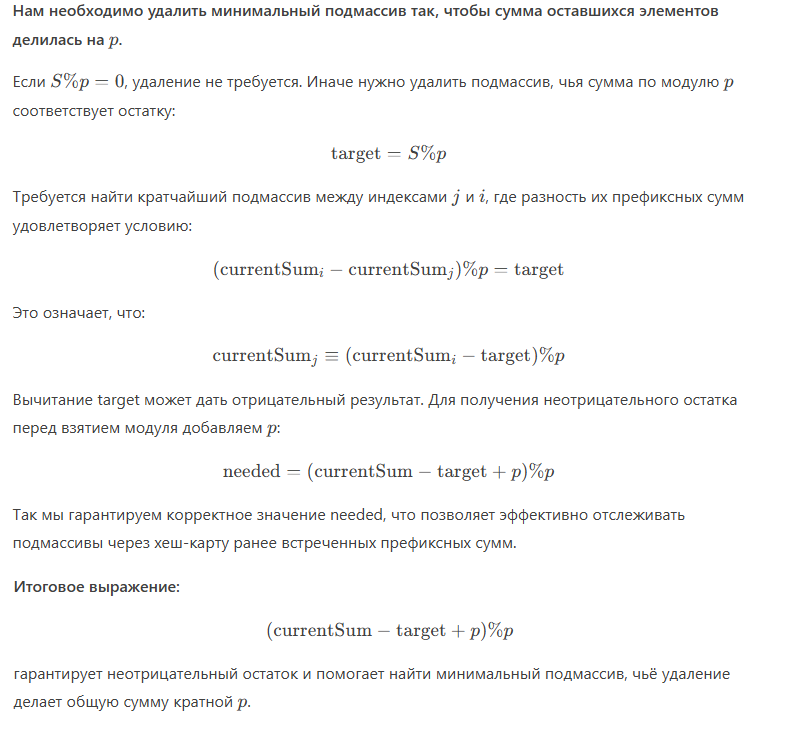

### Deque (двусторонняя очередь) в Python

**Deque** (из модуля `collections`) — это структура данных, позволяющая эффективно добавлять и удалять элементы с обоих концов.
Работает за **O(1)** для операций с начала и конца, в отличие от списка (где операции с началом списка имеют сложность **O(n)**).

**Создание deque**
```python
from collections import deque
d = deque([1, 2, 3])  # deque([1, 2, 3])
```
**Основные методы**

| Метод                | Описание                                                                 | Пример использования                  |
|----------------------|-------------------------------------------------------------------------|---------------------------------------|
| `append(x)`          | Добавляет `x` в **конец** deque.                                        | `d.append(5)` → `[1, 2, 3, 5]`        |
| `appendleft(x)`      | Добавляет `x` в **начало** deque.                                       | `d.appendleft(0)` → `[0, 1, 2, 3]`    |
| `pop()`              | Удаляет и возвращает элемент с **конца**.                               | `d.pop()` → возвращает `3`, deque: `[1, 2]` |
| `popleft()`          | Удаляет и возвращает элемент с **начала**.                              | `d.popleft()` → возвращает `1`, deque: `[2, 3]` |
| `extend(iterable)`   | Добавляет элементы итерируемого объекта в **конец**.                    | `d.extend([4,5])` → `[1, 2, 3, 4, 5]` |
| `extendleft(iterable)`| Добавляет элементы итерируемого объекта в **начало** (в обратном порядке). | `d.extendleft([0,-1])` → `[-1, 0, 1, 2, 3]` |
| `rotate(n)`          | Циклически сдвигает элементы на `n` позиций (вправо при `n > 0`).       | `d.rotate(1)` → `[3, 1, 2]`           |
| `clear()`            | Удаляет все элементы из deque.                                          | `d.clear()` → `deque([])`              |
| `count(x)`           | Возвращает количество элементов, равных `x`.                            | `d.count(2)` → `1`                     |
| `maxlen`             | Атрибут. Максимальный размер deque (если задан).                        | `d = deque(maxlen=3)`                  |

### 2.   Задача 862  Кратчайший подмассив с суммой не менее k (hard)



- **Когда использовать deque:**
  - Когда нужно быстро находить подмассивы с определенными свойствами (например, сумма ≥ k)
  - Когда требуется обрабатывать узлы уровнями (например, в алгоритмах обхода графа) - BFS (поиск в ширину)
  - Когда нужно сравнивать символы с обоих концов строки - задачи на палиндромы
  - Когда нужна гибкость в выборе структуры (например, стек + очередь в одном) - реализация стека или очереди
  

- **Когда НЕ использовать:**
  - Если нужен произвольный доступ к элементам (по индексам), дек не оптимизирован для этого
  - Для задач, где достаточно однонаправленных операций (например, только append и pop с конца — используйте список)

- **Пример задачи:**  
 - Если требуется найти минимальный подмассив с суммой ≥ `k` (задача `shortestSubarray`), задача 862 уровня хард.

- **Реализация:**  
  - Поддерживать в деке индексы префиксных сумм **в возрастающем порядке**.  
  - Удалять из начала дека, если разница между текущей суммой и суммой в начале дека ≥ `k`.

In [ ]:
from collections import deque

def shortestSubarray(nums, k):
    n = len(nums)                           # Вычисляем длину массива
    prefix_sum = [0] * (n + 1)              # Создаем массив префиксных сумм размером n + 1
    min_len = float('inf')                  # Инициализируем минимальную длину как бесконечность
    d = deque()                             # Создаем двустороннюю очередь (дек) для хранения индексов префиксных сумм

    for i in range(n):
        prefix_sum[i + 1] = prefix_sum[i] + nums[i]

    for i in range(n + 1):                  # Проходим по всем префиксным суммам
        while d and prefix_sum[i] - prefix_sum[d[0]] >= k:       # Проверяем, можно ли найти подмассив с суммой >= k
            min_len = min(min_len, i - d.popleft())              # Обновляем минимальную длину подмассива
        while d and prefix_sum[i] <= prefix_sum[d[-1]]:          # Удаляем из дека индексы, которые больше не могут быть полезными
            d.pop()
        d.append(i)                         # Добавляем текущий индекс в дек

    return min_len if min_len != float('inf') else -1            # Возвращаем минимальную длину, если она была найдена, иначе -1


nums = [2,-1,2]
k = 3
print(shortestSubarray(nums,k))

3


###   3. Метод двух указателей для задачи нахождения кратчайшего подмассива с суммой ≥ k (работает только для неотрицательных чисел )
- Из за этого не проходит тест на Литкоде с отрицательными числами, задача 862 уровня хард

In [ ]:
def shortestSubarray(nums, k):
    n = len(nums)
    min_len = float('inf')
    left = 0
    current_sum = 0

    for right in range(n):              # Перебираем правую границу окна
        current_sum += nums[right]      # Добавляем текущий элемент к сумме
        while current_sum >= k:                           # Пока текущая сумма >= k, пытаемся уменьшить длину окна
            min_len = min(min_len, right - left + 1)      # Вычисляем длину текущего окна и обновляем минимальную длину
            current_sum -= nums[left]                     # Удаляем левый элемент из текущей суммы и сдвигаем левую границу окна
            left += 1
    return min_len if min_len != float('inf') else -1     # Если min_len осталась равной бесконечности, значит, подходящего подмассива не нашлось

nums = [1,2]
k = 4
print(shortestSubarray(nums,k))

-1


### Сравнение методва Sliding Window(скользящее окно) и метода двух указателей(Two Pointers)
Выше был использован метод Sliding Window, который является частным случаем метода двух указателей

**Полное сравнение методов: Sliding Window vs. Two Pointers**

Ниже представлена детальная таблица с ключевыми различиями двух подходов, а также пояснения и примеры задач.

| **Параметр**               | **Sliding Window**                                                                 | **Two Pointers**                                                                 |
|----------------------------|------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **Основная цель**          | Анализ **подмассива/подстроки** с заданным условием (сумма, уникальность и т.д.). | Поиск **пар элементов**, разделение данных, проверка условий на всём массиве.   |
| **Движение указателей**    | Оба указателя (`left`, `right`) движутся **в одном направлении** (слева направо). | Указатели могут двигаться **навстречу** (с концов к центру) или **в разном направлении**. |
| **Размер окна**            | **Переменный** (расширяется или сужается в зависимости от условия).               | **Фиксированный** (например, пара элементов) или переменный, но без строгих границ. |
| **Тип подмассива**         | **Непрерывный** (окно всегда охватывает последовательные элементы).               | Может быть **разрывным** (например, два элемента в разных частях массива).      |
| **Условия**                | Часто связаны с **монотонностью** (например, сумма ≥ `k`, уникальные символы).    | Любые условия (равенство суммы, проверка палиндрома, пересечение интервалов).   |
| **Структуры данных**       | Часто используется **хеш-таблица** для отслеживания элементов в окне.             | Редко требует дополнительных структур (кроме самих указателей).                 |
| **Сложность**              | O(n) (один проход по массиву).                                                    | O(n) или O(n log n) (если требуется сортировка).                                 |
| **Примеры задач**          | 1. Максимальная сумма подмассива длины `k`.<br>2. Самая длинная подстрока без повторов.<br>3. Минимальное окно с суммой ≥ `k`. | 1. Поиск пары чисел с заданной суммой.<br>2. Проверка палиндрома.<br>3. Контейнер с максимальной водой. |

### 1. **Sliding Window+Map**
- **Когда использовать:**  
  Задачи на **непрерывные подмассивы/подстроки**, где требуется отслеживать динамическое окно с условиями (сумма, уникальность).
- **Пример задачи:**

In [ ]:
def longest_unique_substring(s: str) -> int:
    left = 0                                       # Левая граница окна
    max_len = 0                                    # Максимальная длина уникальной подстроки
    char_map = {}                                  # Хранит последние позиции символов
    for right in range(len(s)):
        if s[right] in char_map and char_map[s[right]] >= left:   # Если символ уже в окне (позиция >= left), двигаем left
            left = char_map[s[right]] + 1
        char_map[s[right]] = right                 # Обновляем позицию символа
        max_len = max(max_len, right - left + 1)   # Проверяем длину текущего окна

    return max_len

s = 'abcabcbb'
print(longest_unique_substring(s))

3


### 2. **Два указателя**

**Когда использовать:**  
Задачи на поиск пар, переупорядочивание элементов или проверку глобальных свойств массива (например, палиндром).  
*Особенно эффективен для **отсортированных массивов**.*  

Пример: Поиск пары чисел с суммой target (отсортированный массив)

In [ ]:
def two_sum_sorted(nums: list, target: int) -> list:
    left, right = 0, len(nums) - 1                 # left - начало массива, right - конец массива
    while left < right:                            # Пока указатели не пересеклись
        current_sum = nums[left] + nums[right]     # Текущая сумма элементов на позициях left и right
        if current_sum == target:                  # Нашли нужную пару
            return [left, right]                   # Возвращаем индексы
        elif current_sum < target:                 # Двигаем левый указатель при недостаточной сумме (массив отсортирован)
            left += 1
        else:                                      # Двигаем правый указатель при избыточной сумме
            right -= 1
    return []

nums = [1, 3, 5, 7]
target = 12
print(two_sum_sorted(nums, target))

[2, 3]


### Задача 2615. Sum of Distances ([ссылка](https://leetcode.com/problems/sum-of-distances/description/)) уровень медиум

Дан массив целых чисел `nums` с индексированием с нуля.

Существует массив `arr` длины `nums.length`, где для каждого индекса `i` выполняется следующее условие:
- `arr[i]` равен сумме значений `|i - j|` для всех индексов `j`, таких что `nums[j] == nums[i]` и `j != i`.
- Если таких индексов `j` не существует, то `arr[i]` устанавливается равным 0.

Необходимо вернуть массив `arr`.

**Ограничения:**
- $1 \leq nums.length \leq 10^5$
- $0 \leq nums[i] \leq 10^9$

**Пример 1:**

**Вход:**
```python
nums = [1, 3, 1, 1, 2]
```
**Выход:**
```
[5, 0, 3, 4, 0]
```
**Объяснение:**
- Для `i = 0`:  
  Элемент `nums[0]` равен `1`, совпадает с `nums[2]` и `nums[3]`.  
  Таким образом, `arr[0] = |0 - 2| + |0 - 3| = 2 + 3 = 5`.
- Для `i = 1`:  
  Элемент `nums[1]` равен `3`, других элементов со значением `3` нет, поэтому `arr[1] = 0`.
- Для `i = 2`:  
  Элемент `nums[2]` равен `1`, совпадает с `nums[0]` и `nums[3]`.  
  Таким образом, `arr[2] = |2 - 0| + |2 - 3| = 2 + 1 = 3`.
- Для `i = 3`:  
  Элемент `nums[3]` равен `1`, совпадает с `nums[0]` и `nums[2]`.  
  Таким образом, `arr[3] = |3 - 0| + |3 - 2| = 3 + 1 = 4`.
- Для `i = 4`:  
  Элемент `nums[4]` равен `2`, других элементов со значением `2` нет, поэтому `arr[4] = 0`.

**Пример 2:**

**Вход:**
```python
nums = [0, 5, 3]
```
**Выход:**
```
[0, 0, 0]
```
**Объяснение:**
Все элементы в массиве различны, поэтому для каждого индекса `i` других индексов с таким же значением не существует, и `arr[i] = 0`.


Создадим словарь, где ключи это уникальные элементы массива, а значения это списки индексов, на которых эти элементы встречаются.
Для каждого уникального элемента вычислим префиксные суммы для его индексов. Вычислим сумму расстояний для каждого индекса, используя префиксные суммы


In [ ]:
from typing import List
def distance(nums: List[int]) -> List[int]:
    num_to_indices = {}                                   # Словарь для хранения списка индексов каждого числа
    arr = [0] * len(nums)                                 # Результирующий массив, заполненный нулями

    for i, num in enumerate(nums):                        # Заполнение словаря индексами для каждого числа
        if num not in num_to_indices:
            num_to_indices[num] = []                      # Инициализация списка для нового числа
        num_to_indices[num].append(i)                     # Добавление индекса в список

    for num, indices in num_to_indices.items():           # Обработка каждого числа и его индексов
        if len(indices) == 1:
            continue                                      #  Пропуск чисел с одним вхождением
        prefix_sum = [0] * len(indices)                   # Создание префиксных сумм индексов
        prefix_sum[0] = indices[0]                        # Начальное значение

        for i in range(1, len(indices)):
            prefix_sum[i] = prefix_sum[i - 1] + indices[i]                     # Накопление суммы индексов (prefix_sum[i] = сумма первых i+1 индексов)
        for i, k in enumerate(indices):                                        # Расчет расстояний для каждого индекса числа
            l = k * i - (prefix_sum[i - 1] if i > 0 else 0)                    # Сумма расстояний до предыдущих элементов:
            r = (prefix_sum[-1] - prefix_sum[i]) - k * (len(indices) - i - 1)  # Сумма расстояний до последующих элементов:
            arr[k] = l + r                                                     # Общее расстояние для индекса k
    return arr

nums = [1,3,1,1,2]
print(distance(nums))

[5, 0, 3, 4, 0]


## Использование префиксных массивов OR, XOR

### Таблица истинности для логических операций: OR, XOR, AND, NOT

| A | B | **OR** | **XOR** | **AND** | **¬A** | **¬B** |  
|---|---|--------|---------|---------|--------|--------|  
| 0 | 0 |   **0**    |    **0**    |    **0**    |   1    |   1    |  
| 0 | 1 |   **1**    |    **1**    |    **0**    |   1    |   0    |  
| 1 | 0 |   **1**    |    **1**    |    **0**    |   0    |   1    |  
| 1 | 1 |   **1**    |    **0**    |    **1**    |   0    |   0    |  



**Обозначения**:
- **OR** (ИЛИ): `A ∨ B`  **Дизъюнкция**
- **XOR** (исключающее ИЛИ): `A ⊕ B`  **Разные элементы**
- **AND** (И): `A ∧ B`  **Конъюнкция**
- **¬A / ¬B** (отрицание): инверсия значений `A` и `B`  

**Ключевые свойства:**
- **OR** похож на "хотя бы один", **AND** — на "оба", **XOR** — на "либо A, либо B, но не оба вместе".
- **NOT** меняет значение на противоположное.
- **XOR** используется в криптографии и проверке чётности.

**Битовые аналогии**
- OR как объединитель: добавляет биты
- XOR как переключатель: показывает различия
- AND как фильтр: оставляет только общие биты


```
5 = 101 (бинарно)
3 = 011

5 | 3 = 111 (7)   ← OR: все биты, которые есть
5 ^ 3 = 110 (6)   ← XOR: биты, которые различаются
5 & 3 = 001 (1)   ← AND: только общие биты
```


Своиства **XOR**
```
0 XOR x = x (0 — нейтральный)
1 XOR x = NOT x (1 — инвертор)
x XOR x = 0 (самоуничтожение)
```

```
"Переключатель"
XOR с 1 инвертирует бит:

0 XOR 1 = 1  (0 → 1)
1 XOR 1 = 0  (1 → 0)
Аналогия: Нажатие на выключатель меняет состояние света.
```

```
"Обратимость"
XOR с тем же числом дважды возвращает исходное:


x XOR y XOR y = x
Пример:
5 XOR 3 = 6
6 XOR 3 = 5 ← вернулись к исходному!
```


Свойства **OR**
```
0 OR x = x (0 — нейтральный элемент)
1 OR x = 1 (1 — поглощающий элемент)
x OR x = x (идемпотентность)
```


Свойства **AND**


```
0 AND x = 0 (0 — поглощающий элемент)
1 AND x = x (1 — нейтральный элемент)
x AND x = x (идемпотентность)
```

Практическое применение
- XOR: шифрование, обмен значений, нахождение уникального элемента
- OR: установка флагов, объединение множеств битов
- AND: маскирование битов, проверка флагов

### Побитовые сдвиги в Python

**Основные операторы:**
1. **`<<` — сдвиг влево**  
   Умножает число на $2^n$, заполняя младшие биты нулями.  
   Синтаксис: `число << сдвиг`

2. **`>>` — сдвиг вправо**  
   Делит число нацело на $2^n$, сохраняя знак.  
   Синтаксис: `число >> сдвиг`


**Примеры работы:**

1. Сдвиг влево (`<<`):
```python
x = 5            # Бинарно: 0000 0101 (8 бит)

print(x << 1)    # 10  → 0000 1010 (5 * 2¹)
print(x << 2)    # 20  → 0001 0100 (5 * 2²)
print(x << 3)    # 40  → 0010 1000 (5 * 2³)
```

2. Сдвиг вправо (`>>`):
```python
x = 20           # Бинарно: 0001 0100

print(x >> 1)    # 10  → 0000 1010 (20 // 2¹)
print(x >> 2)    # 5   → 0000 0101 (20 // 2²)
print(x >> 3)    # 2   → 0000 0010 (20 // 2³, дробная часть отбрасывается)
```

3. Отрицательные числа:
```python
x = -10          # Бинарное представление: ...1111 0110 (дополнение до двух)

print(x >> 1)    # -5  → ...1111 1011 (сохраняет знак)
print(x << 1)    # -20 → ...1110 1100 (эквивалентно -10 * 2)
```

4. Граничные случаи:
```python
print(1 << 0)    # 1   (2⁰)
print(1 << 30)   # 1 073 741 824 (2³⁰)
print(256 >> 8)  # 1   (256 // 2⁸)
```


Особенности:
1. **Диапазон чисел**:  
   Python поддерживает целые числа произвольной длины, поэтому сдвиги работают с гигантскими числами:
   ```python
   print(1 << 1000)  # Выведет 107150860718626732094... (число с 302 цифрами)
   ```

2. **Отрицательные сдвиги запрещены**:
   ```python
   try:
       5 << -3    # Вызовет TypeError
   except TypeError as e:
       print(e)   # "negative shift count"
   ```

3. **Эквивалентность операциям**:
   - `x << n` ≡ $x \times 2^n$
   - `x >> n` ≡ $\lfloor x / 2^n \rfloor$ (для положительных чисел)



Применение:
1. **Быстрые арифметические операции**:
   ```python
   # Быстрое умножение/деление на степень двойки
   x = 42
   x_mult = x << 3  # 42 * 8 = 336
   x_div = x >> 2   # 42 // 4 = 10
   ```

2. **Извлечение битовых флагов**:
   ```python
   # Проверка 3-го бита числа
   num = 0b1101_0101
   bit = (num >> 2) & 1  # 1 (третий бит справа)
   ```

3. **Оптимизация кода**:
   Сдвиги работают быстрее арифметических операций в низкоуровневых задачах.



### Задача - 2680. Maximum OR ([ссылка](https://leetcode.com/problems/maximum-or/description/)) уровень медиум

Иногда нужно использовать суффиксный массив

Дан **целочисленный массив** `nums` длины `n` и целое число `k`.  

За **одну операцию** можно выбрать **любой элемент массива** и **умножить его на 2**.

Необходимо найти **максимальное возможное значение** выражения:

$ nums[0] \mid nums[1] \mid ... \mid nums[n - 1] $

которое можно получить, применяя **не более** `k` операций.

**Примечание:**  
Оператор `|` обозначает **побитовую операцию "ИЛИ" (bitwise OR)** между числами.
**Ограничения:**
- $ 1 \leq nums.length \leq 10^5 $
- $ 1 \leq nums[i] \leq 10^9 $
- $ 1 \leq k \leq 15 $
---
**Пример 1:**

**Вход:**
```python
nums = [12,9]  k = 1
```
**Выход:**   30

**Объяснение:**  
Если применить операцию к элементу с индексом `1`, то массив станет `[12,18]`.  
Выполним побитовое ИЛИ:  
$ 12 \mid 18 = 30 $
**Пример 2:**

**Вход:**     
```python
nums = [8,1,2]   k = 2
```
**Выход:**    35

**Объяснение:**  
Применим две операции к элементу `nums[0]`, умножая его на `2` дважды:  
Исходный массив: `[8,1,2]`  
После первой операции: `[16,1,2]`  
После второй операции: `[32,1,2]`  
Выполним побитовое ИЛИ:  
$  32 \mid 1 \mid 2 = 35  $

Чтобы  решить эту задачу, будем использовать префиксные и суффиксные максимумы побитового or. Префиксные максимумы позволяют быстро вычислить or для всех элементов до текущего, а суффиксные максимумы  для всех элементов после текущего.  Для каждого элемента массива смотрим, как изменится результат, если умножить этот элемент на 2^x, где x≤k. Умножение на степень двойки сдвигает биты числа влево, это может добавить новые битовые позиции, увеличивая общее значение побитового or. Используя префиксные и суффиксные максимумы, можно объединять результаты для разных частей массива

In [ ]:
from typing import List
def maximumOr(nums: List[int], k: int) -> int:
    n = len(nums)

    # Префиксный OR: накапливает OR слева направо
    prefix_or = [0] * n
    prefix_or[0] = nums[0]
    for i in range(1, n):
        prefix_or[i] = prefix_or[i-1] | nums[i]

    # Суффиксный OR: накапливает OR справа налево
    suffix_or = [0] * n
    suffix_or[-1] = nums[-1]                              # Последний элемент суффикса = последний элемент массива nums
    for i in range(n-2, -1, -1):                          # Идем справа налево (от предпоследнего элемента к первому)
        suffix_or[i] = suffix_or[i+1] | nums[i]           # Суффиксный OR для позиции i = OR текущего элемента и предыдущего суффикса (i+1)

    maximum = 0
    # Для каждого элемента пробуем сдвиги от 0 до k
    for i in range(n):
        current_max = 0                                   # Максимум для текущего элемента
        for x in range(k+1):
            new = nums[i] * (1 << x)                      # Эквивалентно nums[i] << x (сдвиг влево)
            left = prefix_or[i-1] if i > 0 else 0         # OR слева от i
            right = suffix_or[i+1] if i < n-1 else 0      # OR справа от i
            current_or = left | new | right               # Комбинируем OR
            current_max = max(current_max, current_or)    # Обновление текущего максимума
        maximum = max(maximum, current_max)               # Обновление глобального максимума

    return maximum

nums = [8,1,2]
k = 2
print(maximumOr(nums,k))

35


In [ ]:
from typing import List

def maximumOr(nums: List[int], k: int) -> int:
    n = len(nums)

    # Шаг 1: Вычисление левого префиксного OR
    left = [0] * n
    for i in range(1, n):
        left[i] = left[i - 1] | nums[i - 1]

    # Шаг 2: Вычисление правого префиксного OR
    right = [0] * n
    for i in range(n - 2, -1, -1):
        right[i] = right[i + 1] | nums[i + 1]

    # Шаг 3: Нахождение максимального OR
    max_or = 0
    for i in range(n):
        # Применяем k операций к nums[i]
        modified_value = nums[i] * (2 ** k)
        # Вычисляем OR для модифицированного массива
        current_or = left[i] | modified_value | right[i]
        # Обновляем максимальное значение                                  Эот вариант выигрывает в памяти и скорости
        max_or = max(max_or, current_or)

    return max_or

nums = [8,1,2]
k = 2
print(maximumOr(nums,k))

35


### Задача - 1442. Count Triplets That Can Form Two Arrays of Equal XOR ([ссылка](https://leetcode.com/problems/count-triplets-that-can-form-two-arrays-of-equal-xor/description/)) уровень медиум

Дан массив целых чисел `arr`.

Необходимо выбрать три индекса `i`, `j` и `k`, удовлетворяющие условиям:

- $ 0 \leq i < j \leq k < arr.length $

Определим два значения `a` и `b` следующим образом:

- $ a = arr[i] \oplus arr[i + 1] \oplus ... \oplus arr[j - 1] $
- $ b = arr[j] \oplus arr[j + 1] \oplus ... \oplus arr[k] $

где `⊕` обозначает побитовую операцию XOR.

Необходимо найти количество таких троек \((i, j, k)\), при которых \( a == b \).
**Ограничения:**
- $ 1 \leq arr.length \leq 300 $
- $ 1 \leq arr[i] \leq 10^8 $
---

**Пример 1:**

**Вход:**  arr = [2,3,1,6,7]

**Выход:** 4

**Объяснение:**
Возможные тройки (i, j, k):
- (0,1,2)
- (0,2,2)
- (2,3,4)
- (2,4,4)

**Пример 2:**

**Вход:**  arr = [1,1,1,1,1]

**Выход:** 10


Давайте разберём, почему из условия **$\text{xor}(arr[i:j]) = \text{xor}(arr[j:k+1])$** следует, что XOR всего подмассива от $i$ до $k$ равен нулю. Это связано с **свойствами операции XOR**.


#### **Операция XOR и её свойства**

Напомню основные свойства XOR:
1. **Коммутативность:** $ a \oplus b = b \oplus a $.
2. **Ассоциативность:** $ (a \oplus b) \oplus c = a \oplus (b \oplus c) $.
3. **Нейтральный элемент:** $ a \oplus 0 = a $.
4. **Обратимость:** $ a \oplus a = 0 $. Если применить XOR к одному и тому же числу дважды, результат будет равен нулю.

Эти свойства делают XOR очень полезным для работы с битовыми операциями.


**Условие задачи: $\text{xor}(arr[i:j]) = \text{xor}(arr[j:k+1])$**

Предположим, у нас есть два подмассива:
- Подмассив $A = arr[i:j]$, где $j > i$,
- Подмассив $B = arr[j:k+1]$, где $k \geq j$.

Из условия задачи известно:
$$
\text{xor}(A) = \text{xor}(B).
$$

Теперь рассмотрим XOR всего подмассива от $i$ до $k$:
$$
\text{xor}(arr[i:k+1]) = \text{xor}(A) \oplus \text{xor}(B).
$$

**Подставим условие** $\text{xor}(A) = \text{xor}(B)$:
$$
\text{xor}(arr[i:k+1]) = \text{xor}(A) \oplus \text{xor}(A).
$$

**Применим свойство обратимости** ($a \oplus a = 0$):
$$
\text{xor}(arr[i:k+1]) = 0.
$$


**Почему именно ноль?**

XOR двух одинаковых значений всегда равен нулю. Это фундаментальное свойство XOR:
- Если два подмассива ($A$ и $B$) имеют одинаковый XOR, то их "разница" (в терминах XOR) равна нулю.

Таким образом, если $\text{xor}(arr[i:j]) = \text{xor}(arr[j:k+1])$, то XOR всего подмассива от $i$ до $k$ обязательно равен нулю.


 **Может ли XOR быть другим значением?**

Нет, в данном случае XOR не может быть другим значением. Вот почему:
1. Если $\text{xor}(A) = \text{xor}(B)$, то $\text{xor}(A) \oplus \text{xor}(B) = 0$ — это строгое следствие свойств XOR.
2. Если бы XOR был другим значением, это означало бы, что $\text{xor}(A) \neq \text{xor}(B)$, что противоречит исходному условию.


**Пример**

**Входной массив:**
```python
arr = [2, 3, 1, 6, 4]
```

**Префиксные XOR'ы:**
$$
\text{prefix\_xor} = [0, 2, 1, 0, 6, 2].
$$

**Проверим тройку** $(i, j, k) = (0, 2, 4)$:
1. Подмассив $A = arr[0:2] = [2, 3]$:
   $$
   \text{xor}(A) = 2 \oplus 3 = 1.
   $$

2. Подмассив $B = arr[2:5] = [1, 6, 4]$:
   $$
   \text{xor}(B) = 1 \oplus 6 \oplus 4 = 1.
   $$

3. Проверяем условие:
   $$
   \text{xor}(A) = \text{xor}(B) = 1.
   $$

4. Вычислим XOR всего подмассива от $i = 0$ до $k = 4$:
   $$
   \text{xor}(arr[0:5]) = 2 \oplus 3 \oplus 1 \oplus 6 \oplus 4 = 0.
   $$

Результат: XOR всего подмассива равен нулю.


**Итог**

Если $\text{xor}(arr[i:j]) = \text{xor}(arr[j:k+1])$, то XOR всего подмассива от $i$ до $k$ обязательно равен нулю. Это следует из свойств XOR:
- XOR двух одинаковых значений равен нулю.
- Если два подмассива имеют одинаковый XOR, их "разница" (в терминах XOR) равна нулю.

Таким образом, условие $\text{xor}(arr[i:j]) = \text{xor}(arr[j:k+1])$ эквивалентно тому, что XOR всего подмассива от $i$ до $k$ равен нулю.

In [ ]:
# Асимптотическая сложность по времени - О(N^3)
# Асимптотическая сложность по памяти - O(N)
from typing import List
def countTriplets(arr: List[int]) -> int:
        n = len(arr)
        prefix_xor = [0] * (n + 1)  # Префиксный XOR: prefix_xor[i] = XOR(arr[0..i-1])

        # Заполнение префиксного XOR
        for i in range(n):
            prefix_xor[i + 1] = prefix_xor[i] ^ arr[i]         # XOR текущего элемента с предыдущим префиксом
        cnt = 0                                                # Счётчик троек
        # Перебор всех возможных троек (i, j, k), где i < j <= k
        for i in range(n):
            for j in range(i + 1, n):
                for k in range(j, n):
                    # Проверка условия: XOR(arr[i..k]) == 0
                    if prefix_xor[i] == prefix_xor[k + 1]:     # XOR[i]^XOR[k+1] = 0
                        cnt += 1                               # Увеличиваем счётчик
        return cnt

arr = [2,3,1,6,7]
print(countTriplets(arr))

4


In [ ]:
# Асимптотическая сложность по времени - О(N^2)
# Асимптотическая сложность по памяти - O(N)
from typing import List
def countTriplets(arr: List[int]) -> int:
        n = len(arr)
        prefix = [0] * (n + 1)

        for i in range(n):
            prefix[i + 1] = prefix[i] ^ arr[i]

        count = 0
        for i in range(n):
            for k in range(i + 1, n):
                if prefix[i] == prefix[k + 1]:
                    count += (k - i)

        return count
arr = [2,3,1,6,7]
print(countTriplets(arr))

4


### Задача 1310 XOR-запросы к подмассиву

Вам дан массив положительных целых чисел `arr`. Также дан массив запросов `queries`, где каждый запрос представлен как пара индексов: `queries[i] = [left_i, right_i]`.

Для каждого запроса необходимо вычислить **XOR элементов** подмассива `arr` от индекса `left_i` до `right_i` включительно (то есть `arr[left_i] XOR arr[left_i + 1] XOR ... XOR arr[right_i]`).

Верните массив `answer`, где `answer[i]` — это результат `i`-го запроса.

---

**Пример 1:**

**Вход:**  
```python
arr = [1, 3, 4, 8]
queries = [[0,1], [1,2], [0,3], [3,3]]
```
**Выход:**  
```python
[2, 7, 14, 8]
```
**Пояснение:**  
Двоичное представление элементов массива:  
- `1 = 0001`  
- `3 = 0011`  
- `4 = 0100`  
- `8 = 1000`  

Результаты запросов:  
- `[0,1]`: `1 XOR 3 = 2` (`0001 XOR 0011 = 0010`)  
- `[1,2]`: `3 XOR 4 = 7` (`0011 XOR 0100 = 0111`)  
- `[0,3]`: `1 XOR 3 XOR 4 XOR 8 = 14` (`0001 XOR 0011 XOR 0100 XOR 1000 = 1110`)  
- `[3,3]`: `8` (один элемент).

---

**Пример 2:**

**Вход:**  
```python
arr = [4, 8, 2, 10]
queries = [[2,3], [1,3], [0,0], [0,3]]
```
**Выход:**  
```python
[8, 0, 4, 4]
```
**Пояснение:**  
- `[2,3]`: `2 XOR 10 = 8`  
- `[1,3]`: `8 XOR 2 XOR 10 = 0`  
- `[0,0]`: `4`  
- `[0,3]`: `4 XOR 8 XOR 2 XOR 10 = 4`.

---

### Как решать?
Используйте **префиксный XOR** для оптимизации:
1. Создайте массив `prefix_xor`, где `prefix_xor[i]` — это XOR первых `i` элементов массива `arr`.
2. Для каждого запроса `[left, right]` результат вычисляется как:  
   ```python
   prefix_xor[right + 1] ^ prefix_xor[left]
   ```
   Это работает благодаря свойству XOR: `a ^ a = 0` и `a ^ 0 = a`.



In [ ]:
# Асимптотическая сложность по времени - О(n+q) где n — длина arr, q — количество запросов.
# Асимптотическая сложность по памяти - O(n)

from typing import List
def xorQueries(arr: List[int], queries: List[List[int]]) -> List[int]:
    n = len(arr)
    prefix_xor = [0] * n
    prefix_xor[0] = arr[0]

    for i in range(1, n):
        prefix_xor[i] = prefix_xor[i - 1] ^ arr[i]

    answer = []
    for left, right in queries:
        if left == 0:
            result = prefix_xor[right]
        else:
            result = prefix_xor[right] ^ prefix_xor[left - 1]
        answer.append(result)

    return answer

arr = [1, 3, 4, 8]
queries = [[0,1], [1,2], [0,3], [3,3]]
print(xorQueries(arr,queries))

[2, 7, 14, 8]


In [ ]:
# Время: O(n + q), где n — длина arr, q — количество запросов.
# Память: O(n) для хранения префиксного массива.


from typing import List
def xor_queries(arr, queries):

    prefix_xor = [0] * (len(arr) + 1)
    for i in range(len(arr)):
        prefix_xor[i + 1] = prefix_xor[i] ^ arr[i]


    result = []
    for left, right in queries:
        result.append(prefix_xor[right + 1] ^ prefix_xor[left])
    return result

arr = [1, 3, 4, 8]
queries = [[0,1], [1,2], [0,3], [3,3]]
print(xorQueries(arr,queries))

[2, 7, 14, 8]


# Использование словарей и множеств без префиксных массивов

### Основные способы использования словарей в Python

1. **Подсчёт частот элементов**  
   Хранение количества вхождений элементов (например, символов в строке, чисел в массиве).

```python
   text = "hello"
   count = {}
   for char in text:
      count[char] = count.get(char, 0) + 1
   # Результат: {'h': 1, 'e': 1, 'l': 2, 'o': 1}
```

2. **Проверка наличия элементов**  
   Быстрая проверка дубликатов или уникальности элементов через хэш-таблицы.
```python
   def contains_duplicate(nums):
      seen = set()
      for num in nums:
         if num in seen:
               return True
         seen.add(num)
      return False
```

3. **Отображение значений**  
   Установление соответствия между элементами (например, биекция для изоморфных строк).

- Две строки изоморфны, если можно взаимно-однозначно (биективно) заменить каждый символ первой строки на единственный символ второй, сохранив порядок и не нарушая уникальность.
```python
   def is_isomorphic(s: str, t: str) -> bool:
      if len(s) != len(t):                     # Проверка на разную длину строк
         return False
      mapping = {}                             # Словарь для прямого отображения (s -> t)
      reverse_mapping = {}                     # Словарь для обратного отображения (t -> s)
      for a, b in zip(s, t):
         # Проверка конфликта в прямом отображении
         if a in mapping:
            if mapping[a] != b:
                  return False
         else:
            # Проверка конфликта в обратном отображении
            if b in reverse_mapping:
                  return False
            mapping[a] = b                    # Добавляем взаимно однозначное соответствие
            reverse_mapping[b] = a
      return True

   # s = "abba" t = "cddc" -> True
```

4. **Хранение состояний**  
   Сохранение промежуточных результатов или метаданных (например, кэширование).

```python
   cache = {}
   def fibonacci(n):
      if n in cache:
         return cache[n]
      if n <= 1:
         return n
      result = fibonacci(n-1) + fibonacci(n-2)
      cache[n] = result
      return result
```

5. **Группировка элементов**  
   Категоризация данных по ключам (чётные/нечётные, группы по признаку).
```python
   numbers = [1, 2, 3, 4, 5]
   groups = {"even": [], "odd": []}
   for num in numbers:
      groups["even" if num % 2 == 0 else "odd"].append(num)
   # Результат: {'even': [2, 4], 'odd': [1, 3, 5]}
```

6. **Управление временными метками**  
   Отслеживание последних вхождений элементов или временных событий.
```python
   text = "hello world"
   last_occurrence = {}
   for idx, char in enumerate(text):
      last_occurrence[char] = idx
   # Результат: {'h': 0, 'e': 1, 'l': 9, 'o': 7, ...}
```

7. **Решение задач с условиями**  
   Поиск пар элементов, удовлетворяющих заданным критериям (например, сумма двух чисел).
```python
   def two_sum(nums, target):
      num_map = {}
      for idx, num in enumerate(nums):
         complement = target - num
         if complement in num_map:
               return [num_map[complement], idx]
         num_map[num] = idx
      return []
```

### Задача 1577. Number of Ways Where Square of Number Is Equal to Product of Two Numbers ([ссылка](https://leetcode.com/problems/number-of-ways-where-square-of-number-is-equal-to-product-of-two-numbers/description/)) уровень медиум

Даны два массива целых чисел `nums1` и `nums2`.

Нужно посчитать количество тройек (как типа 1, так и типа 2), удовлетворяющих следующим правилам:

**Тип 1:** Тройка `(i, j, k)` считается валидной, если выполняется условие:
- `nums1[i]^2 == nums2[j] * nums2[k]`
- при этом: `0 <= i < nums1.length` и `0 <= j < k < nums2.length`.

**Тип 2:** Тройка `(i, j, k)` считается валидной, если выполняется условие:
- `nums2[i]^2 == nums1[j] * nums1[k]`
- при этом: `0 <= i < nums2.length` и `0 <= j < k < nums1.length`.

Необходимо вернуть суммарное количество валидных тройек обоих типов.
**Ограничения:**
- $1 \leq nums1.length, nums2.length \leq 1000$
- $1 \leq nums1[i], \, nums2[i] \leq 10^5$

**Пример 1:**

**Вход:**
```python
nums1 = [7,4]
nums2 = [5,2,8,9]
```
**Выход:**
```
1
```
**Объяснение:**
- Тип 1: тройка `(1, 1, 2)`, так как `nums1[1]^2 = nums2[1] * nums2[2]` (то есть, $4^2 = 2 \times 8$, $16 = 16$).

**Пример 2:**

**Вход:**
```python
nums1 = [1,1]
nums2 = [1,1,1]
```
**Выход:**
```
9
```
**Объяснение:**
Все тройки валидны, поскольку $1^2 = 1 \times 1$.

- Тип 1: тройки `(0,0,1)`, `(0,0,2)`, `(0,1,2)`, `(1,0,1)`, `(1,0,2)`, `(1,1,2)`.
- Тип 2: тройки `(0,0,1)`, `(1,0,1)`, `(2,0,1)`.

**Пример 3:**

**Вход:**
```python
nums1 = [7,7,8,3]
nums2 = [1,2,9,7]
```
**Выход:**
```
2
```
**Объяснение:**
- Тип 1: тройка `(3,0,2)`, так как `nums1[3]^2 = nums2[0] * nums2[2]`.
- Тип 2: тройка `(3,0,1)`, так как `nums2[3]^2 = nums1[0] * nums1[1]`.




Сначала создаются хэш-таблицы Map_1 и Map_2, содержащие квадраты элементов nums1 и nums2 соответственно. Затем для всех пар элементов в nums1 и nums2 проверяется, есть ли их произведение в хэш-таблицах, и если есть, увеличивается счетчик троек. В конце возвращается общее количество найденных троек

### Counter (счётчик) в Python

**Counter** (из модуля `collections`) — это подкласс словаря, оптимизированный для подсчёта хешируемых объектов.
Хранит элементы как ключи, а их количество — как значения. Поддерживает удобные методы для работы с частотами.

**Создание Counter**
```python
from collections import Counter

c = Counter('hello')  # Counter({'h': 1, 'e': 1, 'l': 2, 'o': 1})
c = Counter(a=3, b=2)  # Counter({'a': 3, 'b': 2})
```

**Основные методы**

| Метод                          | Описание                                                                 | Пример использования                  |
|--------------------------------|-------------------------------------------------------------------------|---------------------------------------|
| `elements()`                   | Возвращает итератор по элементам (каждый элемент повторяется столько раз, сколько его счётчик). | `list(Counter('aab').elements()) → ['a', 'a', 'b']` |
| `most_common(n)`               | Возвращает `n` самых частых элементов с их счётчиками.                  | `Counter('abracadabra').most_common(2) → [('a', 5), ('b', 2)]` |
| `subtract(iterable)`           | Вычитает элементы итерируемого объекта из счётчика.                     | `c.subtract({'a': 2})` → уменьшает счётчик 'a' на 2 |
| `update(iterable)`             | Увеличивает счётчики на основе элементов итерируемого объекта.          | `c.update('abc')` → добавляет элементы в счётчик |
| `total()`                      | Возвращает сумму всех счётчиков (Python 3.10+).                         | `Counter(a=3, b=2).total() → 5`       |
| Арифметические операции (`+`, `-`, `&`, `\|`) | Объединение/вычитание счётчиков. `&` — минимумы, `\|` — максимумы. | `c1 + c2` → новый счётчик с суммой элементов |


In [ ]:
from collections import Counter
from typing import List

def numTriplets(nums1: List[int], nums2: List[int]) -> int:
    # Создаем счетчики квадратов элементов для каждого массива
    Map_1 = Counter([n * n for n in nums1])
    Map_2 = Counter([n * n for n in nums2])
    res = 0                                                  # Инициализация счетчика результата
    for i in range(len(nums1) - 1):                          # Перебор всех пар (i, j) в nums1 (i < j)
        for j in range(i + 1, len(nums1)):
    # Проверяем, есть ли произведение nums1[i] * nums1[j] в квадратах nums2
            res += Map_2.get(nums1[i] * nums1[j], 0)         # Если да, прибавляем количество таких квадратов к результату
    for i in range(len(nums2) - 1):                          # Аналогичный перебор всех пар (i, j) в nums2 (i < j)
        for j in range(i + 1, len(nums2)):
            res += Map_1.get(nums2[i] * nums2[j], 0)         # Проверяем, есть ли произведение nums2[i] * nums2[j] в квадратах nums1

    return res  # Возвращаем общее количество подходящих троек


nums1 = [7,7,8,3]
nums2 = [1,2,9,7]
print(numTriplets(nums1, nums2))

2


### Задача 2799. Count Complete Subarrays in an Array ([ссылка](https://leetcode.com/problems/count-complete-subarrays-in-an-array/description/)) уровень медиум

Дан массив `nums`, состоящий из положительных целых чисел.
Подмассив массива называется полным, если выполняется следующее условие:
- Количество различных элементов в подмассиве равно количеству различных элементов во всём массиве `nums`.
Необходимо вернуть количество полных подмассивов.

**Примечание:** Подмассив – это непустая, смежная последовательность элементов исходного массива.

**Ограничения:**
- $1 \leq nums.length \leq 1000$
- $1 \leq nums[i] \leq 2000$

**Пример 1:**

**Вход:**
```python
nums = [1,3,1,2,2]
```
**Выход:**
```
4
```
**Объяснение:**
Полными подмассивами являются следующие:
- `[1,3,1,2]`
- `[1,3,1,2,2]`
- `[3,1,2]`
- `[3,1,2,2]`

**Пример 2:**

**Вход:**
```python
nums = [5,5,5,5]
```
**Выход:**
```
10
```
**Объяснение:**
Так как в массиве содержится только число `5`, любой подмассив будет полным. Общее число возможных подмассивов равно 10.

Используем два указателя. Один указатель расширяет окно, добавляя элементы, а второй сужает окно, когда количество уникальных элементов в текущем подмассиве достигает общего числа уникальных элементов. Каждый раз, когда это условие выполняется, все подмассивы, начинающиеся с текущего левого указателя и заканчивающиеся на правом или дальше, считаются полными и добавляются в результат


In [ ]:
from typing import List
def countCompleteSubarrays(nums: List[int]) -> int:
    n_unique = len(set(nums))                                  # Количество уникальных элементов
    n = len(nums)                                              # Длина массива
    count = 0                                                  # Счетчик полных подмассивов
    l = 0                                                      # Левый указатель окна
    freq = {}                                                  # Словарь для подсчета частот элементов в текущем окне

    for i in range(n):                                         # Правый указатель окна (i)
        if nums[i] not in freq:                                # Добавляем текущий элемент в окно
            freq[nums[i]] = 0                                  # Инициализация, если элемент новый
        freq[nums[i]] += 1                                     # Увеличиваем частоту

        while len(freq) == n_unique:                           # Пока в окне есть все уникальные элементы
            # Все подмассивы [l..i], [l..i+1], ..., [l..n-1] — полные
            count += n - i                                     # Добавляем количество таких подмассивов
            # Сдвигаем левую границу окна
            freq[nums[l]] -= 1                                 # Уменьшаем частоту элемента
            if freq[nums[l]] == 0:
                del freq[nums[l]]                              # Удаляем элемент, если его больше нет в окне
            l += 1                                             # Сужаем окно
    return count

nums = [1,3,1,2,2]
print(countCompleteSubarrays(nums))

4


# Чтение данных

In [ ]:
# Чтение одного числа и одной строки
k = int(input())                   # Чтение одного числа
m = input().strip()                # Чтение одной строки с отсечением пробелов
n = input().split()                # Чтение одной строки c с разбиением элеиентов в список

Входные данные  
```
10 10

1 61 126 217 2876 6127 39162 98126 712687 1000000000

100 6127 1 61 200 -10000 1 217 10000 1000000000
```

In [ ]:
n, k = map(int, input().split())       # Читает два числа через пробел
arr = list(map(int, input().split()))  # Читает список чисел
query = list(map(int, input().split))  # Читает список чисел



Входные данные  
```
3
5
4
4
4
4
4
```

In [ ]:
# Читает n чисел по одному Каждое значение вводится на новой строке.
k = int(input())
n = int(input())
groups = []
for _ in range(n):
  groups.append(int(input()))

In [ ]:
k = int(input())
n = int(input())
groups = [int(input()) for _ in range(n)]  # Читает n чисел по одному Каждое значение вводится на новой строке.

Входные данные  
```
5
-1 5
10 3
4 2
7 10
8 1
```

In [ ]:
n = int(input())
people = [tuple(map(int, input().split())) for _ in range(n)]  # Читает n строк с парами чисел

# [(-1, 5), (10, 3), (4, 2), (7, 10), (8, 1)]

**Входные данные:**
```
3
0 42 18468
6335 0 26501
19170 15725 0
```

In [ ]:
n = int(input())
graph = [list(map(int, input().split())) for _ in range(n)]

**Входные данные:**
```
4
1 1 0 0
0 1 1 0
1 0 1 0
0 0 1 1
```

In [ ]:
n = int(input())
graph = []
for _ in range(n):
    row = list(map(int, input().split()))
    graph.append(row.copy())

In [ ]:
#  Преобразование в словарь (dict) Если ввод представляет собой пары ключ-значение:  name=John age=30

data = dict(map(int, pair.split('=')) for pair in input().split())

# data = {'name': 'John', 'age': '30'}

### Дополнительные методы

In [ ]:
import sys
data = list(map(int, sys.stdin.read().split()))  # Читает все данные сразу

In [ ]:
# Чтение по строкам с sys.stdin.readline:
import sys
n = int(sys.stdin.readline())
matrix = [list(map(int, sys.stdin.readline().split())) for _ in range(n)]

In [ ]:
#  Разделители, отличные от пробела:
nums = list(map(int, input().split(',')))  # Ввод: "1,2,3"

In [ ]:
# Обработка ошибок:
try:
    k = int(input())
except ValueError:
    print("Введите число!")

In [ ]:
# Многострочный ввод до пустой строки:
lines = []
while True:
    line = input()
    if not line:
        break
    lines.append(line)

In [ ]:
# Считывание JSON или других форматов:
import json
data = json.loads(input())  # Ввод: {"key": "value"}

# Бинарный поиск

## 📘 Подробное руководство  решения задач с использованием бинарного поиска

**Шаги алгоритма:**

**1. Определение границ поиска**

Установите начальные значения `l` (левая граница) и `r` (правая граница) в зависимости от задачи.  
Примеры:
- Для поиска корня уравнения:  
  `l = 0`, `r = C`.
- Для поиска максимального значения:  
  `l = 0`, `r = sum(a) // k`.

**2. Цикл бинарного поиска**

Выполняйте итерации, пока не будет достигнута требуемая точность или условие остановки:  
```python
while r - l > epsilon:  # Для вещественных чисел
# или
while l < r:            # Поиск мин/макс значения
while l <= r:           # Поиск любого вхождения
```




**Когда использовать `left < right` и `left <= right` в бинарном поиске?**


```
left <= right → Можете явно проверить равенство (arr[mid] == target)

left < right → Не проверяешь явно == target, а проверяешь условие >= или <=


Задайте себе вопрос:
"Мне нужно найти элемент или найти место, где он ДОЛЖЕН быть?"

Найти элемент → left <= right
(как в словаре: "есть ли слово 'яблоко'?")

Найти место (Границу ) → left < right
(как в телефонной книге: "где начинаются фамилии на 'И'?")
```



- **Используйте `left <= right`, если:**
  - Задача требует проверить **наличие элемента**.
  - Нужно найти **любое вхождение** элемента.
  - Работаете с целыми числами и классическим бинарным поиском.

```
Можете явно проверить равенство (arr[mid] == target)

Ищем ТОЧНОЕ значение

Цикл останавливается, когда диапазон полностью исчерпан (left > right)

Вы проверяете КАЖДУЮ точку, пока не найдёте точное совпадение

Интервал: [left, right] — включая обе границы

"В этом промежутке МОЖЕТ находиться ответ"

Когда остановиться: Когда промежуток СТАЛ ПУСТЫМ

Поэтому условие продолжения: left <= right

Ищешь конкретный элемент ("найди индекс 42")

Явно проверяешь arr[mid] == target внутри цикла
```

- **Используйте `left < right`, если:**
  - Задача требует найти **минимум/максимум**.
  - Нужно найти **границу** (например, первый или последний элемент).
  - Работаете с вещественными числами (float) и используете бинарный поиск по ответу.


```
Не проверяешь явно == target, а проверяешь условие >= или <=

Ищешь ГРАНИЦУ (первое/последнее вхождение)

Вы не ищете точку, а сужаете интервал до минимального

Цикл останавливается, когда остается один кандидат (left == right)

"Сужение до ОДНОГО элемента"

Когда остановиться: Когда остался РОВНО ОДИН кандидат

Когда left == right, остался один элемент — это и есть ответ

Не проверяешь явно == target, а проверяешь условие >= или <=
```




**2.1. Условие `left < right`**
**Используется, когда нужно найти минимальное или максимальное значение, удовлетворяющее условию.**  
Примеры задач:
- Поиск первого вхождения элемента.
- Поиск минимального значения, для которого выполняется функция `is_good(x)`.
- Поиск оптимального значения (например, минимального квадрата для размещения прямоугольников).

**Пример: поиск первого вхождения элемента**
```python
def find_first_occurrence(arr, target):
    left, right = 0, len(arr)
    while left < right:
        mid = (left + right) // 2
        if arr[mid] < target:
            left = mid + 1
        else:
            right = mid
    return left if left < len(arr) and arr[left] == target else -1
```
- **Цикл завершается, когда `left == right`.**
- **Результат:** `left` указывает на первое вхождение элемента или на позицию вставки.


**2.2. Условие `left <= right`**
**Используется, когда нужно проверить наличие элемента в массиве.**  
Примеры задач:
- Классический бинарный поиск для определения, существует ли элемент в массиве.
- Поиск любого вхождения элемента (не обязательно первого или последнего).

**Пример: классический бинарный поиск**
```python
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1
```
- **Цикл завершается, когда `left > right`.**
- **Результат:** возвращает индекс элемента, если он найден, иначе `-1`.


**Почему важно выбирать правильное условие?**
1. **`left < right`**:
   - Гарантирует, что цикл завершится, когда `left` и `right` сойдутся к одному значению.
   - Используется в задачах оптимизации (например, поиск минимального квадрата).

2. **`left <= right`**:
   - Позволяет проверить все возможные позиции в массиве.
   - Используется в задачах проверки наличия элемента.




---

**Примеры ошибок**

**Ошибка 1: использование `left <= right` в задаче оптимизации**
```python
def find_min_square(n, a, b):
    left, right = 0, max(a, b) * n
    while left <= right:  # ОШИБКА: цикл может не завершиться
        mid = (left + right) // 2
        if can_place(mid, a, b, n):
            right = mid
        else:
            left = mid + 1
    return left
```
- **Проблема:** Цикл может зациклиться, так как `left` и `right` не сходятся корректно.

**Ошибка 2: использование `left < right` в классическом поиске**
```python
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left < right:  # ОШИБКА: может пропустить элемент
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid
    return -1
```
- **Проблема:** Если `left` и `right` сойдутся к одному элементу, он не будет проверен.





**3. Вычисление средней точки**

Для вещественных чисел:
`mid = (l + r) / 2`.

Для целых чисел:
`mid = (l + r) // 2` или `mid = (l + r + 1) // 2` (зависит от условия).

**4. Проверка условия м обновление границ**
Определите, выполняется ли условие для текущего `mid`.


Если ищем последний(правый) элемент массива не больше таргета  `arr[x]<=t, x -> max`   сдвигаем левую границу, если ok

Если условие не выполняется:
`r = mid - 1` (для целых) или `r = mid` (для вещественных).


```python
def ok(mid, t):
    return arr[mid] <= t
    
while l<=r:
        mid = (l+r) // 2
        if ok(mid, q):
            l = mid+1
            ans = mid
        else:
            r = mid-1
```


Если ищем первый(левый) элемент массива не меньше таргета `arr[x]>=t, x -> min `     сдвигаем правую границу, если ok

```python
def ok(mid, t):
    return arr[mid] >= t

while l<=r:
        mid = (l+r) // 2
        if ok(mid, q):
            r = mid-1
            ans = mid
        else:
            l = mid+1   
```




**5. Возврат результата**

Верните значение в зависимости от задачи:

`l (left)`: Для задач, где нужно найти начало диапазона (вставка, первый элемент >= target).

`r (right)`: Для задач, где нужно найти конец диапазона (последний элемент <= target).

`l, r` (для целых чисел),

`(l + r) / 2` (для вещественных чисел).


| Тип задачи | Что ищем | Какой `while` | Что возвращаем |
|---|---|---|---|
| **lower-bound** (первый ≥ target) | **начало диапазона** | `while l < r` | ✅ `l` |
| **upper-bound** (последний ≤ target) | **конец диапазона** | `while l < r` | ✅ `l` (но `mid = (l+r+1)//2`) |
| **целочисленный** | **точное совпадение** | `while l <= r` | ✅ `l` (если не найдено — `l > r`) |
| **вещественный** | **любая точность** | `while r - l > eps` | ✅ `(l + r) / 2` |




### Разница между `mid = (l + r) // 2` и `mid = (l + r + 1) // 2`

Два способа вычисления средней точки в бинарном поиске для целых чисел. Выбор зависит от направления сужения границ, чтобы избежать зацикливания.





**1. `mid = (l + r) // 2`**

**Используется, когда:**
- Правая граница сокращается (`r = mid`), а левая сдвигается вверх (`l = mid + 1`).
- **Пример задачи:** Поиск **первого** элемента, удовлетворяющего условию.

**Почему работает:**
- Если `mid` не подходит, отбрасываем его (`l = mid + 1`).
- Если подходит, сохраняем его (`r = mid`).

**Пример кода:**
```python
array = [1, 3, 5, 7, 9]
target = 6

l, r = 0, len(array) - 1
while l < r:
    mid = (l + r) // 2
    if array[mid] >= target:  # Условие для поиска первого элемента ≥ target
        r = mid
    else:
        l = mid + 1
print(f"Первый элемент ≥ {target}: индекс {l}, значение {array[l]}")
# Первый элемент ≥ 6: индекс 3, значение 7   
```

**2. `mid = (l + r + 1) // 2`**

**Используется, когда:**
- Используется в верхнем поиске (ищем последний True):
- Левая граница сокращается (`l = mid`), а правая сдвигается вниз (`r = mid - 1`).  
- **Пример задачи:** Поиск **последнего** элемента, удовлетворяющего условию.

**Почему работает:**  
Добавление `+1` предотвращает зацикливание при нечётной длине отрезка.

**Почему это важно?**

Если не учитывать округление, возможны **зацикливания**.

**Пример кода:**  
```python
array = [1, 3, 5, 7, 9]
target = 10

l, r = 0, len(array) - 1
while l < r:
    mid = (l + r + 1) // 2  # Округление вверх
    if array[mid] <= target:  # Условие для поиска последнего элемента ≤ target
        l = mid
    else:
        r = mid - 1
print(f"Последний элемент ≤ {target}: индекс {l}, значение {array[l]}")
# Последний элемент ≤ 6: индекс 4, значение 9  
```
**Как выбрать формулу?**
- **Если сужение в сторону левой границы (`l = mid`):**  
  Используйте `mid = (l + r + 1) // 2` (округление вверх).  
- **Если сужение в сторону правой границы (`r = mid`):**  
  Используйте `mid = (l + r) // 2` (округление вниз).


**Ключевые различия между поиском первого и последнего элемента**

| **Критерий**               | **Поиск первого элемента ≥ target**       | **Поиск последнего элемента ≤ target**     |
|----------------------------|-------------------------------------------|--------------------------------------------|
| **Формула для `mid`**      | `mid = (l + r) // 2`                     | `mid = (l + r + 1) // 2`                  |
| **Условие проверки**       | `array[mid] >= target`                   | `array[mid] <= target`                    |
| **Сужение границ**         | - Если `True`: `r = mid` <br> - Если `False`: `l = mid + 1` | - Если `True`: `l = mid` <br> - Если `False`: `r = mid - 1` |
| **Направление поиска**     | Ищем **самый левый** подходящий элемент   | Ищем **самый правый** подходящий элемент  |
| **Пример работы**          | `[1, 3, 5, 7, 9]`, target=6 → индекс **3** (значение 7) | `[1, 3, 5, 7, 9]`, target=6 → индекс **2** (значение 5) |


**Почему важно `+1` в формуле для последнего элемента?**
- Без `+1` при нечётной длине отрезка возможны **зацикливания**.  
  **Пример:**  
  - `l = 2`, `r = 3` → `mid = (2+3)//2 = 2`.  
  - Если условие `array[mid] <= target` истинно, то `l = mid = 2` → границы не меняются → бесконечный цикл.  
  - Добавление `+1` даёт `mid = 3`, что сдвигает границу вверх.

Итог
- `mid = (l + r) // 2` — для поиска **первого** подходящего элемента.  
- `mid = (l + r + 1) // 2` — для поиска **последнего** подходящего элемента.  
**Выбор зависит от направления сужения границ.**

In [ ]:
a = [1, 2, 3, 4, 5]

def ok(k):
    return a[k] <= 100  # Всегда True

l, r = 0, len(a) - 1
while l < r:
    mid = (l + r + 1) // 2         # зацикливание без ++1
    if ok(mid):
        l = mid
    else:
        r = mid - 1

print(l)

4


#### Поиск элемента в отсортированном массиве
**Условие:**
Дан отсортированный массив. Найти индекс элемента target или вернуть -1, если его нет.

arr = [1, 3, 5, 7, 9], target = 5 → индекс 2.
```python
def binary_search(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif target > arr[mid]:
            left = mid + 1
        else:
            right = mid - 1
    return -1

arr = [1, 3, 5, 7, 9]
target = 5
print(binary_search(arr, target)) # 2
```


#### Поиск первого вхождения элемента (с дубликатами)
**Условие:**
Найти индекс первого вхождения target в массиве с повторяющимися элементами.

arr = [2, 4, 4, 4, 6], target = 4 → индекс 1.
```python
def find_first_occurrence(arr, target):
    left = 0
    right = len(arr) - 1
    result = -1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            result = mid
            right = mid - 1  # Продолжаем искать слева
        elif target > arr[mid]:
            left = mid + 1
        else:
            right = mid - 1
    return result

arr = [2, 4, 4, 4, 6]
target = 4
print(find_first_occurrence(arr, target)) # 1
```

#### Поиск последнего вхождения элемента (с дубликатами)
**Условие:**
Найти индекс последнего вхождения target в массиве с повторяющимися элементами.

arr = [2, 4, 4, 4, 6], target = 4 → индекс 3.
```python
def find_last_occurrence(arr, target):
    left = 0
    right = len(arr) - 1
    result = -1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            result = mid
            left = mid + 1  # Продолжаем искать справа
        elif target > arr[mid]:
            left = mid + 1
        else:
            right = mid - 1
    return result

arr = [2, 4, 4, 4, 6]
target = 4
print(find_last_occurrence(arr, target)) # 3
```

#### Поиск позиции для вставки элемента
**Условие:**
Найти индекс, куда можно вставить target, чтобы массив остался отсортированным.

arr = [1, 3, 5, 7], target = 4 → индекс 2.
```python
def search_insert_position(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif target > arr[mid]:
            left = mid + 1
        else:
            right = mid - 1
    return left  # Если элемент не найден, вернуть left

arr = [1, 3, 5, 7]
target = 4
print(search_insert_position(arr, target)) # 2
```

#### Поиск в отсортированном, но сдвинутом массиве
**Условие:**
Массив был отсортирован, но сдвинут. Найти target.

arr = [4, 5, 6, 7, 0, 1, 2], target = 0 → индекс 4.
```python
def search_in_rotated_array(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid

        # Определяем, какая половина отсортирована
        if arr[left] <= arr[mid]:
            # Левая половина отсортирована
            if arr[left] <= target < arr[mid]:
                right = mid - 1
            else:
                left = mid + 1
        else:
            # Правая половина отсортирована
            if arr[mid] < target <= arr[right]:
                left = mid + 1
            else:
                right = mid - 1
    return -1
arr =  [4, 5, 6, 7, 0, 1, 2]
target = 0
print(search_in_rotated_array(arr, target)) # 4
```

#### Поиск минимального элемента в сдвинутом массиве
**Условие:**
Найти минимальный элемент в отсортированном, но сдвинутом массиве.

arr = [3, 4, 5, 1, 2] → минимальный элемент 1.
```python
def find_min_in_rotated_array(arr):
    left = 0
    right = len(arr) - 1

    while left < right:
        mid = (left + right) // 2
        if arr[mid] > arr[right]:
            left = mid + 1
        else:
            right = mid
    return arr[left]

arr =   [3, 4, 5, 1, 2]
target = 0
print(find_min_in_rotated_array(arr)) # 1
```

## 📘 Codeforces бинарный поиск

С этого шага и далее теория бинарного поиска с Codeforces, где  перечислены способы его использования

https://codeforces.com/edu/course/2/lesson/6


 Универсальный алгоритм «бинарный поиск» в одном чек-листе

| Шаг | Что спросить у себя | Что сделать |
|---|---|---|
| **1. Подходит ли задача?** | Ответ — это **число**, и мы ищем **крайнее возможное** (минимальное / максимальное), при котором «всё ещё работает»? | Если да → берём бинарный поиск. |
| **2. Что именно ищем?** | Минимальное подходящее или максимальное подходящее? | Записываем формулировку: «найти **наименьший** (или **наибольший**) X, при котором условие выполняется». |
| **3. Пишем функцию `ok(x)`** | Если **фиксировать** такое конкретное значение `x`, можно ли **быстро проверить**, удовлетворяет ли оно условию задачи? | Функция должна возвращать `True/False` и быть **монотонной**: после первого `True` дальше всегда `True`, либо наоборот. |
| **4. Границы поиска** | Какое **самое маленькое** и **самое большое** значение вообще теоретически возможно? | Задаём `left` и `right` шире, чем нужно. |
| **5. Целые или вещественные?** | Зависит от задачи | Используем один из двух шаблонов ниже. |

---

🔎 **Как понять, что нужен именно бинарный поиск**

Формулировки-маяки:

- «Вырежем максимальное **одинаковое** количество кусков длиной **не менее** L…»  
- «Найдём **наименьшую** сторону квадрата, в который **всё помещается**…»  
- «Определим **наибольшее** среднее значение на подмассиве длиной **не менее** D…»  

Всё сводится к:  
> «Есть ли решение при таком конкретном значении?»  
> Если «да» для `x`, то и для всех меньших/больших оно тоже «да» → монотонность → бинарный поиск.

---

🛠 **Примеры `ok(x)` и границ**

| Задача | Что ищем | Функция `ok(x)` | `left` | `right` |
|---|---|---|---|---|
| Верёвки (максимальная длина куска) | наибольший `x`, при котором можно вырезать **≥ k кусков** | `sum(l // x for l in ropes) >= k` | 0 | `max(ropes)` |
| Прямоугольники (минимальный квадрат) | наименьшая сторона `L`, при которой **все n прямоугольников помещаются** | `(L//a) * (L//b) >= n` | 0 | `max(a,b)*n` |
| Максимальное среднее подмассива | наибольшее `mid`, при котором **существует** подмассив длиной ≥ D со средним ≥ `mid` | `can_achieve(mid)` (см. ниже) | `min(arr)` | `max(arr)` |

---

📜 **Готовые шаблоны**

**1. Целочисленный поиск (наименьшее подходящее)**
```python
left, right = 0, верхняя_очевидная_граница
while left < right:
    mid = (left + right) // 2
    if ok(mid):
        right = mid      # ответ ≤ mid
    else:
        left = mid + 1   # ответ > mid
# left == ответ
```

**2. Вещественный поиск (с точностью eps)**
```python
left, right = 0.0, верхняя_очевидная_граница
eps = 1e-7
for _ in range(100):     # достаточно итераций
    mid = (left + right) / 2
    if ok(mid):
        left = mid       # ищем вправо
    else:
        right = mid      # ищем влево
# left ≈ ответ
```

---

🧩 **Краткая памятка**

1. **Монотонность** — ключ: если для `x=True`, то для всех `y>x` тоже `True` (или наоборот).  
2. **Границы** — берём шире, лишние итерации дешевы.  
3. **Функция `ok`** — должна быть **быстрой** (O(n) или O(n log n)), иначе бинарный поиск не эффективен.

### 1 Индекс ближайшего элемента к target в отсортированном массиве



In [ ]:
from typing import List

"""
================================================================
Задача «Ближайший элемент в отсортированном массиве»
================================================================
Постановка
----------
Дано:
- отсортированный по возрастанию массив arr;
- число target.

Нужно:
- найти индекс элемента, **наиболее близкого к target**;
- если расстояние одинаково с двух сторон, выбрать **меньший индекс**.

Идея бинарного поиска
---------------------
1.  В массиве ищем позицию `pos` – **первый индекс, где arr[pos] ≥ target**
    (lower_bound).
2.  Ближайший элемент либо `arr[pos-1]`, либо `arr[pos]`
    (с учётом границ массива).
3.  Сравниваем расстояния и возвращаем нужный индекс.

Алгоритм
--------
- Бинарный поиск по индексам (целочисленный).
- После поиска `pos` обрабатываем крайние случаи:
      pos = 0          → только arr[0]
      pos = len(arr)   → только arr[-1]
- Иначе выбираем из двух кандидатов
      left  = arr[pos-1]
      right = arr[pos]
----------------------------------------------------------------
"""

def find_closest(arr: List[int], target: int) -> int:
    """
    Возвращает индекс ближайшего к `target` элемента в **отсортированном**
    массиве `arr`.

    Параметры
    ----------
    arr    : отсортированный список чисел
    target : искомое значение

    Возвращает
    ----------
    int : индекс ближайшего элемента
          (если одинаково близки – меньший индекс)
    """
    n = len(arr)
    if n == 0:
        return -1  # массив пуст

    # Бинарный поиск: ищем первый элемент >= target
    left, right = 0, n
    while left < right:
        mid = (left + right) // 2
        if arr[mid] < target:
            left = mid + 1
        else:
            right = mid
    pos = left  # pos = lower_bound

    # --- Обработка граничных случаев ---
    if pos == 0:
        # Все элементы справа target
        return 0
    if pos == n:
        # Все элементы слева target
        return n - 1

    # --- Выбор между двумя соседями ---
    left_val = arr[pos - 1]
    right_val = arr[pos]

    # Сравниваем расстояния, при равенстве – берём меньший индекс
    if abs(left_val - target) <= abs(right_val - target):
        return pos - 1
    else:
        return pos



arr = [1, 3, 5, 7, 9]
tests = [4, 5, 8, 10, -2, 3]
for t in tests:
    idx = find_closest(arr, t)
    print(f"target= {t:>3}  closest={arr[idx]}  index={idx}")

target=   4  closest=3  index=1
target=   5  closest=5  index=2
target=   8  closest=7  index=3
target=  10  closest=9  index=4
target=  -2  closest=1  index=0
target=   3  closest=3  index=1


### 2.1 Найти минимальное 'хорошее' число, используя бинарный поиск по ответу



In [ ]:
def find_min_good_number(is_good, left=0, right=10**18):
    """
    Найти минимальное 'хорошее' число, используя бинарный поиск по ответу.

    Условие задачи:
    - Все числа делятся на 'хорошие' и 'плохие'.
    - Если число x 'хорошее', то x + 1 тоже 'хорошее'.
    - Нужно найти минимальное 'хорошее' число.

    Параметры:
    - is_good: функция, которая проверяет, является ли число 'хорошим'.
    - left: начальная левая граница поиска (по умолчанию 0).
    - right: начальная правая граница поиска (по умолчанию 1e18).

    Возвращает:
    - Минимальное 'хорошее' число.
    """

    # - Ищем в диапазоне [left, right]
    # - Условие: если mid 'хорошее', ищем в левой половине (включая mid)
    # - Иначе ищем в правой половине
    while left < right:
        mid = (left + right) // 2

        if is_good(mid):
            # Если mid 'хорошее', минимальное 'хорошее' число может быть mid или меньше
            right = mid
        else:
            # Если mid 'плохое', минимальное 'хорошее' число точно больше mid
            left = mid + 1

    # Когда left == right, это и есть минимальное 'хорошее' число
    return left

# Пример функции is_good: 'хорошими' считаются числа >= 12345
def is_good(x):
    return 1 if x >= 12345 else 0  # Минимальное 'хорошее' 12345

# Вызываем функцию поиска
result = find_min_good_number(is_good)
print(f"Минимальное 'хорошее' число: {result}")

Минимальное 'хорошее' число: 12345


### 2.2  Квадрат **минимальной** площади, в который можно поместить все n прямоугольников


In [ ]:
"""
================================================================
Задача «Минимальный квадрат для n прямоугольников»
================================================================
Условие
-------
Дано:
- n одинаковых прямоугольников, каждый размером a × b;
- прямоугольники можно класть **только ровно** (без поворота);
- разрешены касания по сторонам/точкам, пересечения запрещены.

Нужно:
- найти **минимальную** сторону L квадрата L×L,
  в который **все n прямоугольников помещаются**.

Идея бинарного поиска
---------------------
1.  Ответ L — целое число (или вещественное, если разрешены дроби).
2.  Функция допустимости ok(L) **монотонна**:
        ok(L) = True  ⇒  ok(L′ ≥ L) = True
        ok(L) = False ⇒  ok(L′ < L) = False
    ⇒ можно применить **бинарный поиск по целым L**.
3.  Для фиксированного L вычисляем, сколько прямоугольников
    можно разместить «плиткой» внутри L×L без поворота:
        cols = L // a          сколько помещается по горизонтали
        rows = L // b          сколько помещается по вертикали
        total = cols * rows    общее количество
        ok(L) = (total ≥ n)
    (если a или b больше L, сразу False).
----------------------------------------------------------------
"""
def can_place(L, a, b, n):
    """
    Проверяем, можно ли разместить n прямоугольников a×b
    в квадрате L×L без поворота.

    Параметры
    ----------
    L : сторона квадрата (целое)
    a : длина прямоугольника
    b : ширина прямоугольника
    n : требуемое количество прямоугольников

    Возвращает
    ----------
    True  – если все n прямоугольников помещаются
    False – иначе
    """
    if a > L or b > L:
        return False  # Прямоугольник не помещается в квадрат

    # Количество прямоугольников, которое помещается
    cols = L // a        # столбцы
    rows = L // b        # строки
    total = cols * rows  # всего

    return total >= n


def minimal_square(n, a, b):
    """
    Находит минимальную сторону L квадрата L×L,
    в который можно без поворота разместить n прямоугольников a×b.

    Алгоритм
    --------
    1.  low  = 0                – сторона заведомо маленькая.
    2.  high = max(a, b) * n    – худший случай: все в один ряд.
    3.  Бинарный поиск по целым L:
            mid = (low + high) // 2
            если ok(mid) == True  → можно попробовать меньше (high = mid)
            иначе                 → нужно больше (low = mid + 1)
    4.  В конце low == high – минимальное подходящее L.
    """
    # Минимальная возможная длина квадрата
    low = 0
    # Максимальная возможная длина квадрата (все прямоугольники в линию)
    high = max(a, b) * n

    while low < high:
        mid = (low + high) // 2
        if can_place(mid, a, b, n):
            high = mid  # mid подходит, ищем меньший
        else:
            low = mid + 1  # mid не подходит, нужен больший

    return low


# Пример входных данных
n = 4
a = 2
b = 3

# Вызываем функцию
result = minimal_square(n, a, b)
print(f"Минимальная сторона квадрата: {result}")
print(f"Площадь квадрата: {result * result}")

Минимальная сторона квадрата: 6
Площадь квадрата: 36


### 2.3 Задача про веревочки

**Задача про верёвочки**

Разберем еще одну задачу — задачу про веревочки.
У нас есть **n**
 веревок, длина **i**
-й веревки равна $a_i$
. Мы хотим вырезать из них k
 кусков одинаковой длины. Из всех способов нарезать нужно выбрать такой, в котором длина нарезанных кусков максимальна.

Чтобы решить эту задачу заведем следующую функцию — **f(x)**
 = можно ли вырезать **k**
 кусков длины **x**
. Эта функция ведет себя почти также, как и в прошлой задаче, но есть и отличия.

Если мы можем вырезать куски длины **x**
, то мы можем вырезать куски и меньшего размера (так как на них нужно будет меньше длины). То есть в бинпоиске нужно поменять нули и единицы местами, чтобы привести функцию к общему алгоритму.
Функция теперь принимает не целые значения, а вещественные. Иногда выгодно отрезать куски нецелого размера (например если есть только одна веревка длины **1**
 и ее нужно разрезать на три куска, то ответ на задачу равен $\frac{1}{3}$
.
Как решить вторую проблему? Вспомним, как выглядел двоичный поиск раньше. Мы повторяли цикл до тех пор, пока **l**
 и **r**
 не станут соседними числами. Но с вещественными числами такой трюк не пройдет, так как не существует соседних вещественных чисел.

Поэтому такие задачи решаются с определенной точностью (она обычно указана в условиях). Нужно продолжать цикл до тех пор, пока отрезок **[l,r]**
 имеет длину больше, чем нужная точность.

Однако у этого алгоритма также есть проблема, он может зациклиться. Это произойдет, если числа **l**
 и **r**
 окажутся соседними в типе **double**
. Так как **double**
 хранит числа не с произвольной точностью, а только определенное количество знаков, то если числа **l**
 и **r**
 окажутся соседними, то середины между ними не найдется и она будет равна либо **l**
, либо **r**
 и алгоритм будет выполняться бесконечно долго. Такая проблема возникает, если ответ большой, а нужная точность достаточно высока.

Самый простой способ бороться с этим — использовать не цикл **while**
 а цикл **for**
 с достаточно большим числом итераций (нужно как минимум $log\frac{maxAns}{eps}$ , где **maxAns**
 — максимальный возможный ответ, а **eps**
 — необходимая точность). Обычно всегда можно написать 100
 итераций и не думать.

Сама функция **f(x)**
 должна просто пройти по всем веревочкам, разделить их длины на **x**
 и округлить полученное число вниз. Именно столько кусков длины **x**
 мы можем нарезать. Если сумма всех этих чисел не меньше, чем **k**
, то нужно вернуть **1**
, иначе **0**
. Нужно заметить, что функция **f**
 работает не быстро. Она тратит **O(n)**
 операций, где **n**
 — длина массива. Итоговая сложность будет равна  $O(n *log\frac{1}{eps})$



In [ ]:
from typing import List

"""
----------------------------------------------------------------
Задача «Верёвочки» (rope-cutting)
----------------------------------------------------------------
Условие
-------
Дано:
- список длин верёвок  a_1, a_2, …, a_n  (вещественные или целые).
- целое число  k  — требуемое количество **одинаковых по длине** кусков.

Нужно:
- вырезать **максимально возможную** длину L так, чтобы из всех верёвок
  в сумме получилось **не менее k кусков** длины L.

Идея бинарного поиска
---------------------
1. Ответ L лежит в отрезке  [0, max(a_i)].
2. Функция допустимости  ok(L)  — монотонна:
      ok(L) = True   ⇒   ok(L' < L) = True
      ok(L) = False  ⇒   ok(L' > L) = False
   Поэтому подходит бинарный поиск по вещественной величине L.
3. Для фиксированного L проверяем, можно ли вырезать ≥ k кусков:
      sum_i  floor(a_i / L)  ≥  k
   Это и есть функция  ok(L).
----------------------------------------------------------------
"""

def ok(L: float, lengths: List[float], k: int) -> bool:
    """
    Проверяем, можно ли вырезать не менее k кусков длины L.

    Параметры
    ---------
    L        : длина куска, которую хотим проверить
    lengths  : список длин верёвок
    k        : требуемое число кусков

    Возвращает
    ----------
    True  – если суммарное число кусков ≥ k
    False – иначе
    """
    total_pieces = 0
    for length in lengths:
        # Сколько целых кусков длины L выйдет из данной верёвки
        total_pieces += int(length // L)

    # Условие допустимости
    return total_pieces >= k


def max_cable_length(lengths: List[float], k: int) -> float:
    """
    Находит максимальную длину L, при которой можно вырезать ≥ k одинаковых кусков.

    Алгоритм
    --------
    1.  low  = 0.0          – заведомо маленькая длина (всегда подходит).
    2.  high = max(lengths) – заведомо большая длина (кусок не длиннее самой длинной верёвки).
    3.  Бинарным поиском сжимаем [low, high], пока разница не станет меньше eps.
    4.  Используем функцию ok(L) для ориентира: если ok(L)==True, значит можно пробовать
        ещё большую длину (low = mid), иначе – нужно уменьшать (high = mid).
    5.  После ~100 итераций точность ~1e-9, что достаточно.
    """
    # Границы поиска
    low = 0.0
    high = max(lengths) if lengths else 0.0  # защита от пустого списка

    # Точность ответа
    eps = 1e-7

    # Фиксированное число итераций вместо while high - low > eps
    for _ in range(100):
        mid = (low + high) / 2

        # Защита от деления на ноль при L = 0
        if mid == 0:
            low = mid
            continue

        if ok(mid, lengths, k):
            # mid допустима → ищем большую длину в правой половине
            low = mid
        else:
            # mid недопустима → ищем в левой половине
            high = mid

    # low и high сошлись, low содержит оптимальную длину
    return round(low, 4)


lengths = [4, 59, 9]
k = 3
print(max_cable_length(lengths, k))

19.6667


### 3 Оптимальная точка сбора людей

**Задачи на минимакс**

Это такие задачи, в которых нужно **минимизировать величину**, которая является **максимумом из других величин** $ \min(\max(\ldots)) $. Такие задачи встречаются довольно часто и сводятся к бинарному поиску. Приведем пример такой задачи:

---

**Пример задачи**
Пусть у нас есть числовая прямая, на которой живут люди. Для каждого человека $ i $ мы знаем координату его дома $ x_i $. Мы хотим собрать их в одной точке, чтобы все люди вышли из своих домов и пошли в нее.

**За какое время люди могут собраться в этой точке?** Зависит от того, с какой скоростью люди ходят. Давайте скажем, что у каждого человека $ i $ еще есть скорость $ v_i $. Тогда каждый человек придет в точку $ x $ за время $ \frac{|x_i - x|}{v_i} $. **Время, за которое все люди придут в эту точку**, — это **максимум из этих величин**. Это время мы хотим минимизировать. То есть нам нужно найти $ x $ из выражения:

$$
\min_{x} \left( \max_{i} \left( \frac{|x_i - x|}{v_i} \right) \right)
$$

---

**Как это решать?**

Мы можем вместо минимизации $ \max_i \left( \frac{|x_i - x|}{v_i} \right) $ ограничить его. То есть нам нужна функция $ f(t) $, которая проверяет, что:

$$
\max_{i} \left( \frac{|x_i - x|}{v_i} \right) \leq t
$$

Если это условие выполняется, то для любого $ y > 0 $ значение $ t + y $ тоже подходит. Это означает, что функция $ f(t) $ **монотонна**. Если мы найдем минимальное значение $ t $, при котором $ f(t) = \text{True} $, то это $ t $ и будет ответом на задачу. Это уже классическая задача на бинарный поиск.

---

**Проверка функции $ f(t) $**

Что значит, что $ \max_i \left( \frac{|x_i - x|}{v_i} \right) \leq t $? Это означает, что для любого $ i $ выполняется:

$$
\frac{|x_i - x|}{v_i} \leq t \quad \Leftrightarrow \quad |x_i - x| \leq t \cdot v_i
$$

Перепишем это выражение как:

$$
x_i - t \cdot v_i \leq x \leq x_i + t \cdot v_i
$$

То есть точка $ x $ должна принадлежать всем отрезкам $ [x_i - t \cdot v_i, x_i + t \cdot v_i] $. Это означает, что их **пересечение непусто**.

---

**Решение задачи**

Чтобы найти такую точку $ x $, нужно проверить, существует ли пересечение всех отрезков $ [x_i - t \cdot v_i, x_i + t \cdot v_i] $. Если длина пересечения больше нуля, то ответ существует.

**Алгоритм решения:**
1. Найдите максимальную левую границу всех отрезков: $ \text{left} = \max(x_i - t \cdot v_i) $.
2. Найдите минимальную правую границу всех отрезков: $ \text{right} = \min(x_i + t \cdot v_i) $.
3. Если $ \text{left} \leq \text{right} $, то пересечение непусто.

Эта задача решается за **линейное время**, если мы заранее знаем $ t $. С помощью бинарного поиска мы сводим задачу к проверке: **ограничен ли максимум некоторых величин некоторым числом** $ t $.


**Итог**

Задачи на минимакс часто сводятся к бинарному поиску. Ключевой шаг — правильно сформулировать функцию проверки $ f(t) $, которая определяет, достижимо ли ограничение $ t $. В данном случае эта функция проверяет, существует ли точка $ x $, удовлетворяющая всем условиям $ |x_i - x| \leq t \cdot v_i $.

In [ ]:
from typing import List, Tuple

def min_max_arrival_time(homes: List[Tuple[int, int]]) -> float:
    """
    Решает задачу «минимакс»:
    найти такую точку x на числовой прямой, чтобы
    максимальное время прибытия людей было минимально.

    Описание алгоритма
    ------------------
    1.  Пусть у нас есть n человек.
        Для каждого человека i заданы:
          xi – координата дома,
          vi – скорость передвижения.

    2.  Время, за которое человек i доберётся до точки x, равно
            ti(x) = |xi − x| / vi.

    3.  Нам нужно выбрать x так, чтобы максимальное из всех ti(x)
        было как можно меньше:
            min_x ( max_i ti(x) ).

    4.  Это классическая «минимакс»-задача.
        Прямое решение сложно, но она сводится к бинарному поиску
        по возможному значению T (максимальному времени).

    5.  Функция ok(T) проверяет, существует ли точка x,
        в которую **все** люди успеют за время ≤ T:
          |xi − x| / vi ≤ T   ⇔   x ∈ [xi − T·vi, xi + T·vi].

        Значит, x должна лежать в пересечении всех n отрезков.
        Пересечение непусто ⇔ максимум левых границ ≤ минимум правых.

    6.  Бинарный поиск:
          left  = 0
          right = максимально возможное время
                  (например, расстояние от крайних людей / минимальная скорость).

        Пока right − left > ε:
            mid = (left + right) / 2
            если ok(mid) – можно уменьшать right,
            иначе увеличиваем left.

    7.  После ~100 итераций (или пока разница > ε) left
        содержит минимальное возможное значение T.

    Сложность
    ---------
    O(n log (range/ε)), где range = right − left.
    """
    if not homes:
        raise ValueError("Список домов пуст")

    def ok(T: float) -> bool:
        """Пересечение всех отрезков [xi - T*vi, xi + T*vi] непусто?"""
        left_border = float('-inf')
        right_border = float('inf')
        for xi, vi in homes:
            left_border = max(left_border, xi - T * vi)
            right_border = min(right_border, xi + T * vi)
            if left_border > right_border:
                return False
        return True

    # границы бинарного поиска
    left = 0.0
    coords = [xi for xi, _ in homes]
    right = max(coords) - min(coords)   # максимальное расстояние / 1 (если vi >= 1)

    eps = 1e-9
    for _ in range(100):
        mid = (left + right) / 2
        if ok(mid):
            right = mid
        else:
            left = mid

    return left


homes = [(1, 1), (5, 1), (10, 2)]
print(f"Минимальное максимальное время: {min_max_arrival_time(homes):.9f}")

Минимальное максимальное время: 3.000000000


### 4 Максимальное среднее значение подмассива длины не менее D

**Максимальное среднее**

**Задача**

Еще один интересный класс задач, которые решаются двоичным поиском:  
**Цель:** выбрать подмножество (подотрезок) массива, обладающее определенными свойствами, и максимизировать/минимизировать среднее арифметическое его элементов.  

**Формулировка:**  
Дан массив $ a = [a_0, a_1, \ldots, a_{n-1}] $. Нужно найти такой отрезок $[l, r]$ длины **хотя бы длины $ D $**, что среднее арифметическое чисел на нем максимально:

$$
\frac{\sum_{i=l}^{r-1} a_i}{r - l} \rightarrow \max
$$

---

**Подход через бинарный поиск**

**Шаг 1: Фиксируем среднее $ x $**

Предположим, мы фиксируем некоторое значение среднего $ x $. Теперь задача сводится к проверке:  
**Существует ли отрезок $[l, r]$ длины ≥ $ D $, где среднее арифметическое ≥ $ x $?**

Математически это записывается как:

$$
\frac{\sum_{i=l}^{r-1} a_i}{r - l} \geq x
$$

**Шаг 2: Преобразуем неравенство**

Умножим обе части на $ r - l $:

$$
\sum_{i=l}^{r-1} a_i \geq x \cdot (r - l)
$$


**Преобразование выражения:**

$$
\sum_{i=l}^{r-1} a_i \geq x \cdot (r - l)
$$

к виду:

$$
(a_l - x) + (a_{l+1} - x) + \ldots + (a_{r-1} - x) \geq 0
$$

осуществляется следующим образом:



**Раскрываем сумму**

Исходное неравенство:
$$
\sum_{i=l}^{r-1} a_i \geq x \cdot (r - l)
$$

Левая часть — сумма элементов $ a_i $ от $ i = l $ до $ i = r - 1 $.  
Правая часть — произведение $ x $ на количество элементов в диапазоне $ [l, r - 1] $ (т.к. $ r - l $ — длина интервала).

**Вычитаем $ x \cdot (r - l) $**

Перенесём правую часть влево:
$$
\sum_{i=l}^{r-1} a_i - x \cdot (r - l) \geq 0
$$


**Разбиваем сумму на отдельные слагаемые**

Распишем сумму $ \sum_{i=l}^{r-1} a_i $ как сумму отдельных элементов:
$$
(a_l + a_{l+1} + \ldots + a_{r-1}) - x \cdot (r - l) \geq 0
$$

Затем представим $ x \cdot (r - l) $ как сумму $ x $, взятую $ (r - l) $ раз:
$$
(a_l + a_{l+1} + \ldots + a_{r-1}) - (x + x + \ldots + x) \geq 0
$$

**Группируем по элементам**

Сгруппируем каждый $ a_i $ с соответствующим $ x $:
$$
(a_l - x) + (a_{l+1} - x) + \ldots + (a_{r-1} - x) \geq 0
$$

**Итог**

Оба выражения эквивалентны:
$$
\sum_{i=l}^{r-1} a_i \geq x \cdot (r - l) \quad \Leftrightarrow \quad \sum_{i=l}^{r-1} (a_i - x) \geq 0
$$

Это преобразование часто используется в задачах оптимизации, где нужно проверить, может ли среднее значение элементов в диапазоне $ [l, r - 1] $ быть не меньше $ x $. Если сумма разностей $ (a_i - x) $ неотрицательна, то среднее значение $ \frac{1}{r - l} \sum a_i \geq x $.


**Перепишем сумму как:**

$$
(a_l - x) + (a_{l+1} - x) + \ldots + (a_{r-1} - x) \geq 0
$$

Теперь задача превращается в поиск подотрезка длины ≥ $ D $, сумма элементов которого **неотрицательна**.

---

**Оптимизация через префиксные суммы**

**Шаг 3: Вычисляем префиксные суммы**
Посчитаем префиксные суммы массива $ b_i = a_i - x $:

$$
p_i = \sum_{j=0}^{i-1} b_j = \sum_{j=0}^{i-1} (a_j - x)
$$

Тогда сумма на отрезке $[l, r]$ будет:

$$
p_r - p_l = \sum_{j=l}^{r-1} (a_j - x)
$$

Нам нужно, чтобы $ p_r - p_l \geq 0 $ и $ r - l \geq D $.

---

**Шаг 4: Минимизация префиксных сумм**

Обозначим $ m_i = \min(p_0, p_1, \ldots, p_i) $. Тогда условие $ p_r - p_l \geq 0 $ эквивалентно:

$$
m_{r-D} \leq p_r
$$

**Обоснование:**  

Если минимальная префиксная сумма на интервале $[0, r - D]$ меньше текущей $ p_r $, то существует точка $ l $, где $ p_l \leq p_r $, и длина отрезка $ r - l \geq D $.

---

**Итоговая сложность**
- **Бинарный поиск:** $ O(\log (\text{Ans})) $.
- **Проверка условия:** $ O(n) $ (вычисление $ p $ и $ m $).
- **Общая сложность:** $ O(n \log \text{Ans}) $.

Этот подход позволяет эффективно находить максимальное среднее за линейное время на этапе проверки и логарифмическое — на этапе бинарного поиска.

In [ ]:
from typing import List

"""
================================================================
Задача «Максимальное среднее значение подмассива длины ≥ D»
================================================================
Постановка
----------
Дан массив a[0 … n-1] и число D ≥ 1.
Нужно найти максимальное среднее арифметическое **всех элементов**
какого-либо **непрерывного подмассива длины не менее D**.

Подход через бинарный поиск
---------------------------
1.  Пусть ответ – это число X (среднее искомого подмассива).
2.  Функция допустимости ok(X) истинна ⇔ существует
    подмассив длины ≥ D, **среднее которого ≥ X**.
3.  Функция ok(X) **монотонна**:
        ok(X) = True  ⇒  ok(X' ≤ X) = True
        ok(X) = False ⇒  ok(X' ≥ X) = False
    ⇒ можно применить бинарный поиск по вещественному X.
4.  Для проверки ok(X) преобразуем задачу:
      - Вычтем X из каждого элемента: b[i] = a[i] - X.
      - Нам теперь нужен **подмассив длины ≥ D** с **неотрицательной суммой**.
5.  Для быстрой проверки используем префиксные суммы и
    «скользящий минимум»:
      prefix[i] = b[0] + … + b[i-1]
      Нужно найти i, j такие, что j - i ≥ D и
      prefix[j] - prefix[i] ≥ 0
      ⇔ prefix[j] ≥ prefix[i] и j - i ≥ D.
    Достаточно держать минимум prefix[i] в окне
    [0 … j-D], и за O(n) проверять условие.
----------------------------------------------------------------
"""

def ok(X: float, a: List[float], D: int) -> bool:
    """
    Проверяет, существует ли подмассив длины ≥ D со средним ≥ X.

    Алгоритм внутри ok(X)
    ---------------------
    1.  Строим массив b[i] = a[i] - X.
    2.  Вычисляем префиксные суммы prefix[0…n].
    3.  Сканируем j от D до n и поддерживаем
        min_prefix = min(prefix[i]) для i ≤ j-D.
    4.  Если prefix[j] - min_prefix ≥ 0, то ok(X) = True.
    """
    n = len(a)

    # Префиксные суммы массива (a[i] - X)
    prefix = [0.0] * (n + 1)
    for i in range(n):
        prefix[i + 1] = prefix[i] + (a[i] - X)

    # Минимальная префиксная сумма в окне [0 … j-D]
    min_prefix = prefix[0]
    for j in range(D, n + 1):
        # j - D ≥ 0, поэтому минимум берём до j-D включительно
        if prefix[j] - min_prefix >= 0:
            return True
        # Обновляем минимум для следующих шагов
        min_prefix = min(min_prefix, prefix[j - D + 1])

    return False


def find_max_average(a: List[float], D: int) -> float:
    """
    Находит максимальное среднее значение подмассива длины ≥ D.

    Параметры
    ----------
    a : список чисел
    D : минимальная длина подмассива

    Возвращает
    ----------
    float : максимальное среднее значение с точностью до 1e-7
    """
    if not a or D <= 0 or D > len(a):
        raise ValueError("Некорректные входные данные")

    # Начальные границы: ответ точно лежит в [min(a), max(a)]
    left = min(a)
    right = max(a)

    # Достаточно 100 итераций, чтобы точность стала ~1e-9
    for _ in range(100):
        mid = (left + right) / 2
        if ok(mid, a, D):
            left = mid   # mid достижим → ищем больше
        else:
            right = mid  # mid не достижим → ищем меньше

    # left == right с точностью eps
    return round(left, 7)



a = [1, 12, -5, 3, 7, 3, 9, 11, 2]
D = 3
print(f"Максимальное среднее значение: {find_max_average(a, D)}")

Максимальное среднее значение: 7.6666667


In [ ]:
from typing import List

def ok(X: float, a: List[float], D: int) -> bool:
    n = len(a)

    # Префиксные суммы массива (a[i] - X)
    prefix = [0.0] * (n + 1)
    for i in range(n):
        prefix[i + 1] = prefix[i] + (a[i] - X)
    print(prefix)
    print('len_a =', len(a))
    print('len_prefix:', len(prefix), 'n+1:' , len(prefix)+1)
    # Минимальная префиксная сумма в окне [0 … j-D]
    min_prefix = prefix[0]
    for j in range(D, n + 1):
        # j - D ≥ 0, поэтому минимум берём до j-D включительно
        print('j =',j, 'prefix[j]:', prefix[j])
        if prefix[j] - min_prefix >= 0:
            return True
        # Обновляем минимум для следующих шагов
        min_prefix = min(min_prefix, prefix[j - D + 1])
        print('j:',[j - D + 1],':', prefix[j-D+1],', min_prefix:', min_prefix)
    return False


a = [1, 12, -5, 3, 7, 3, 9, 11, 2]
X = 7
D = 3

print(ok(X, a, D))

[0.0, -6.0, -1.0, -13.0, -17.0, -17.0, -21.0, -19.0, -15.0, -20.0]
len_a = 9
len_prefix: 10 n+1: 11
j = 3 prefix[j]: -13.0
j: [1] : -6.0 , min_prefix: -6.0
j = 4 prefix[j]: -17.0
j: [2] : -1.0 , min_prefix: -6.0
j = 5 prefix[j]: -17.0
j: [3] : -13.0 , min_prefix: -13.0
j = 6 prefix[j]: -21.0
j: [4] : -17.0 , min_prefix: -17.0
j = 7 prefix[j]: -19.0
j: [5] : -17.0 , min_prefix: -17.0
j = 8 prefix[j]: -15.0
True


### 5 Поиска k-го элемента в объединении отрезков

**Поиск K-го элемента**

**Задача**

Еще один важный класс задач — поиск **k-го по возрастанию элемента** в некотором множестве.  

Рассмотрим пример:  
Пусть у нас есть несколько отрезков чисел:  
- `[1, 2, 3, 4]`  
- `[3, 4, 5]`  
- `[4, 5, 6, 7, 8]`  
- `[6, 7]`  

Каждый отрезок задается двумя числами — своим левым концом $ l_i $ и правым концом $ r_i $.  
Если объединить все отрезки, получим мультимножество:  
$$
[1, 2, 3, 4, 3, 4, 5, 4, 5, 6, 7, 8, 6, 7]
$$  
Отсортировав его, получим:  
$$
[1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8]
$$  

Цель: найти **k-й элемент** в этом отсортированном мультимножестве (например, 5-й элемент — это 4).

---

**Решение через бинарный поиск**

**Алгоритм**
1. **Определите функцию `cnt(x)`**, которая возвращает количество элементов в мультимножестве, **меньших чем $ x $**.
2. **Примените бинарный поиск**: найдите такое значение $ x $, что $ cnt(x) \leq k < cnt(x+1) $. Это и будет k-й элемент.

**Как построить `cnt(x)`?**

Для каждого отрезка $ [l_i, r_i] $:
- Если $ x \leq l_i $: элементов меньше $ x $ на этом отрезке **0**.
- Если $ x \geq r_i $: элементов меньше $ x $ на этом отрезке **$ r_i - l_i + 1 $**.
- Иначе: элементов меньше $ x $ на этом отрезке **$ \min(r_i, x) - l_i + 1 $**.

Формула для одного отрезка:
$$
\text{count}_i =
\begin{cases}
0 & \text{если } x \leq l_i, \\
\min(r_i, x) - l_i + 1 & \text{иначе}.
\end{cases}
$$

Суммируем `count_i` по всем отрезкам — получаем `cnt(x)`.

---

**Пример**

Для отрезков `[1,4], [3,5], [4,8], [6,7]` и `k=5`:  
- `cnt(4) = 4` (элементы ≤4: 1,2,3,4).
- `cnt(5) = 7` (добавляются 3,4,5 из второго и третьего отрезков).  
Значит, 5-й элемент — это **4**.

---

**Сложность**
- **Вычисление `cnt(x)`**: $ O(n) $, где $ n $ — количество отрезков.
- **Бинарный поиск**: $ O(\log (\text{max_value} - \text{min_value})) $.  
Общая сложность: $ O(n \log (\text{max_value})) $.

---

**Применение**

Этот подход работает не только для отрезков, но и для:
- **Битовых масок**: каждый бит — элемент множества.
- **Перестановок**: можно считать ранг перестановки за $ O(n \log n) $.

Ключевой момент — умение эффективно вычислять `cnt(x)` для конкретной задачи.

In [ ]:
from typing import List, Tuple

"""
================================================================
Задача «k-й элемент в объединении отрезков»
================================================================
Постановка
----------
Дано:
- список отрезков segments = [(l₁, r₁), (l₂, r₂), …, (lₙ, rₙ)];
  каждый отрезок описывает **множество целых** от lᵢ до rᵢ включительно.
- целое k (1-based) — номер элемента в **объединённом и отсортированном**
  множестве всех этих чисел.

Нужно:
найти **k-й по порядку** элемент в этом объединении.

Идея бинарного поиска
---------------------
1.  Пусть X — искомое число.
2.  Функция ok(X) = «количество всех чисел ≤ X в объединении».
    Она **монотонно неубывает**:
        X₂ ≥ X₁  ⇒  ok(X₂) ≥ ok(X₁)
    ⇒ можно применить **бинарный поиск по целому X**
       в диапазоне [min lᵢ, max rᵢ].
3.  Для фиксированного X быстро считаем ok(X):
      sum_{все отрезки} max(0, min(rᵢ, X) − lᵢ + 1)
4.  Ищем **наименьший** X, при котором ok(X) ≥ k.
----------------------------------------------------------------
"""

def ok(X: int, segments: List[Tuple[int, int]]) -> int:
    """
    Возвращает количество чисел ≤ X в объединении отрезков.

    Алгоритм внутри ok(X)
    ---------------------
    Для каждого отрезка (l, r) считаем, сколько чисел ≤ X в нём:
        если X < l  → 0
        если X > r  → r − l + 1
        иначе       → X − l + 1
    Суммируем по всем отрезкам.
    """
    total = 0
    for l, r in segments:
        if X < l:
            # В отрезке все числа больше X
            continue
        elif X > r:
            # Все числа отрезка ≤ X
            total += r - l + 1
        else:
            # Часть чисел отрезка ≤ X
            total += X - l + 1
    return total


def find_kth_element(segments: List[Tuple[int, int]], k: int) -> int:
    """
    Возвращает k-й по возрастанию элемент объединённого множества
    (1-based индекс).

    Алгоритм
    --------
    1.  Определяем границы поиска:
            left  = минимальный lᵢ
            right = максимальный rᵢ
    2.  Целочисленный бинарный поиск (lower_bound):
            mid = (left + right) // 2
            if ok(mid) < k   → ответ строго правее mid (left = mid + 1)
            else             → ответ ≤ mid (right = mid)
    3.  В конце left == right — искомый k-й элемент.
    """
    if not segments or k <= 0:
        raise ValueError("Список отрезков пуст или k ≤ 0")

    left = min(l for l, _ in segments)
    right = max(r for _, r in segments)

    while left < right:
        mid = (left + right) // 2
        # Количество чисел ≤ mid
        cnt = ok(mid, segments)
        if k > cnt:
            # mid слишком мал — ищем правее
            left = mid + 1
        else:
            # mid подходит или больше нужного — ищем левее
            right = mid

    return left


# ------------------ Пример использования ------------------
if __name__ == "__main__":
    segments = [(1, 4), (3, 5), (4, 8), (6, 7)]
    k = 5
    print(f"{k}-й элемент: {find_kth_element(segments, k)}")  # 5

5-й элемент: 4


In [ ]:
'''
Решение задачи поиска k-го элемента в объединении отрезков

Даны несколько отрезков [li, ri], представляющих мультимножество чисел от li до ri.

Нужно найти k-тый по возрастанию элемент в объединённом мультимножестве.

'''

def count_less_or_equal(segments, x):
    """
    Подсчитывает количество элементов ≤ x во всех отрезках.

    Параметры:
    - segments: список отрезков вида (li, ri)
    - x: текущее значение для проверки

    Возвращает:
    - count: количество элементов ≤ x
    """
    count = 0
    for li, ri in segments:
        if x < li:
            continue
        elif x > ri:
            count += ri - li + 1
        else:
            count += x - li + 1
    return count

def find_kth_element(segments, k):
    """
    Найти k-тый по возрастанию элемент в объединённом мультимножестве.

    Параметры:
    - segments: список отрезков вида (li, ri)
    - k: номер элемента (1-based index)

    Возвращает:
    - k-тый элемент
    """
    # Определение начальных границ поиска
    min_val = min(li for li, _ in segments)
    max_val = max(ri for _, ri in segments)

    # Бинарный поиск
    while min_val < max_val:
        mid = (min_val + max_val) // 2
        cnt = count_less_or_equal(segments, mid)
        if cnt < k:
            # Нужно искать в правой половине
            min_val = mid + 1
        else:
            # Ищем в левой половине
            max_val = mid
    return min_val


segments = [(1, 4), (3, 5), (4, 8), (6, 7)]
k = 5
result = find_kth_element(segments, k)
print(f"{k}-й элемент: {result}")

5-й элемент: 4


### Быстрый поиск в массиве


https://codeforces.com/edu/course/2/lesson/6/1/practice/contest/283911/problem/D

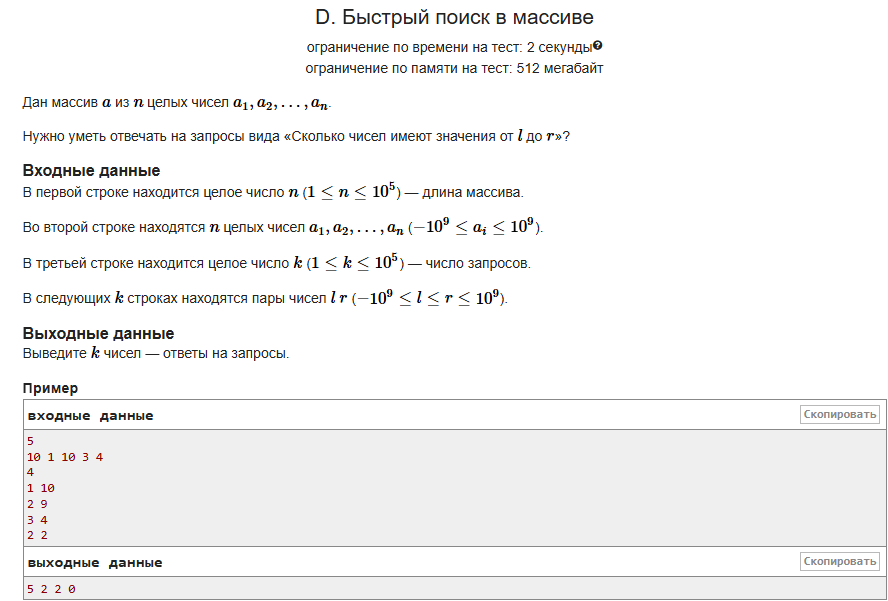

In [ ]:
# arr[x] >= l
# x -> min

# arr[x] <= r
# x -> max

n = int(input())
arr = sorted(list(map(int, input().split())))
k = int(input())

queries = []
for _ in range(k):
    queries.append(tuple(map(int, input().split())))

def search_optimal_l(left):
    def ok(mid, left):
        return arr[mid] >= left
    l = 0
    r = n - 1
    ans = -1
    while l <= r:
        mid = (l + r) // 2
        if ok(mid, left):
            r = mid - 1
            # l = mid + 1
            ans = mid
        else:
            # r = mid - 1
            l = mid + 1
    return ans

def search_optimal_r(right):
    def ok(mid, right):
        return arr[mid] <= right
    l = 0
    r = n - 1
    ans = -1
    while l <= r:
        mid = (l + r) // 2
        if ok(mid, right):
            # r = mid - 1
            l = mid + 1
            ans = mid
        else:
            r = mid - 1
            # l = mid + 1
    return ans

ans = []
for left, right in queries:
    l = search_optimal_l(left)
    r = search_optimal_r(right)
    if l == -1 or r == -1 or r - l < 0:
        ans.append("0")
    else:
        ans.append(str(r - l + 1))
print(" ".join(ans))

# Метод двух указателей (Two Pointers)

📘 **Подробное руководство по методу двух указателей**  



**1. Два указателя**

Метод заключается в том, что **одновременно** двигаем **два индекса** (левый `l` и правый `r`) по массиву, не «назад».  
Из-за монотонного движения общая сложность получается **O(n)** вместо **O(n²)**.


**2. Когда применять**

| Ситуация | Примеры задач |
|---|---|
| Найти подмассив **с определённым условием** | сумма ≤ S, длина ≥ K, все элементы различны |
| Подсчитать количество пар / подмассивов | количество пар (i, j), таких что arr[i]+arr[j]=target |
| Проверить свойство на **слайдах** | самый длинный подмассив без повторов |
| Работа с **отсортированными** массивами | слияние, триплеты, сумма == target |



**3. Алгоритм «скользящего окна» в 4 шага**

1. **Инициализация**  
   `l = 0`, `r = 0`, вспомогательная структура (сумма, set, dict).
2. **Расширение**  
   Двигать `r` вправо и добавлять элемент в окно.
3. **Сужение**  
   Пока **условие нарушено** — двигать `l` вправо и удалять элемент.
4. **Обновление ответа**  
   Запоминать нужное значение (длина, количество пар и т.д.).



**4. Чек-лист применения**

| Вопрос | Действие |
|---|---|
| Массив **отсортирован?** | Использовать «два указателя с краёв». |
| Нужно **самое длинное / короткое подмножество?** | Использовать **sliding window**. |
| Нужно **посчитать все пары / подмассивы?** | Использовать **сумму/счётчик** и движение указателей без возврата назад. |



---

**5. Подводим итог**

| Компонент | Пояснение |
|---|---|
| **Указатели** | `l` и `r` двигаются **только вправо** → O(n) |
| **Условие** | Пока **не выполняется**, сдвигаем `l` |
| **Ответ** | Считаем на каждом шаге или в конце |
| **Память** | Часто O(1) или O(n) для вспомогательных структур |

Используйте этот алгоритм везде, где нужен **подмассив / пара** и **массив можно обойти один раз**.

In [ ]:
#@title Проверка строки на палиндром
'''
Условие:
Слово или фраза, которые одинаково читаются слева направо и справа налево.
Указатели сравнивают символы с краёв строки, двигаясь к центру

'''

def is_palindrome(s):
    left = 0
    right = len(s) - 1

    while left < right:
        if s[left] != s[right]:
            return False
        left += 1
        right -= 1
    return True



In [ ]:
#@title Два указателя в отсортированных массивах

# есть ли пара чисел с заданной суммой

def has_pair_with_sum(arr, target):
    l, r = 0, len(arr) - 1
    while l < r:
        s = arr[l] + arr[r]
        if s == target:
            return True
        elif s < target:
            l += 1
        else:
            r -= 1
    return False

In [ ]:
#@title количество пар чисел < target (отсортирован)

def count_pairs_less(arr, target):
    l = 0
    r = len(arr) - 1
    count = 0
    while l < r:
        if arr[l] + arr[r] < target:
            count += r - l   # все пары (l, l+1..r) подходят
            l += 1
        else:
            r -= 1
    return count

In [ ]:
#@title Максимальная длина подстроки(подмассива) без повторов

def length_of_longest_substring(s):
    char_set = set()
    left = 0
    max_len = 0

    for right in range(len(s)):
        while s[right] in char_set:    # пока элемент повторяется
            char_set.remove(s[left])
            left += 1
        char_set.add(s[right])
        max_len = max(max_len, right - left + 1)
    return max_len



In [ ]:
#@title Задача с двумя массивами

# Условие: Даны два отсортированных массива. Найти пару элементов (по одному из каждого массива), сумма которых равна target.

from typing import List, Optional, Tuple

def two_sum_sorted(arr1: List[int], arr2: List[int], target: int) -> Optional[Tuple[int, int]]:
    """
    Если существуют x ∈ arr1, y ∈ arr2 такие, что x + y == target,
    возвращает кортеж (x, y), иначе None.
    """
    l, r = 0, len(arr2) - 1

    while l < len(arr1) and r >= 0:
        current_sum = arr1[l] + arr2[r]
        if current_sum == target:
            return (arr1[l], arr2[r])
        elif current_sum < target:
            l += 1  # нужно увеличить сумму
        else:
            r -= 1  # нужно уменьшить сумму
    return None


a1 = [1, 3, 5, 8]
a2 = [2, 4, 6, 9]
tgt = 10
print("two_sum_sorted:", two_sum_sorted(a1, a2, tgt))

two_sum_sorted: (1, 9)


In [ ]:
#@title Удаление дубликатов (оставить не более двух одинаковых элементов)
'''
Условие: Модифицировать массив на месте, оставив не более двух дубликатов каждого элемента.

Условие nums[i] != nums[write_idx - k] гарантирует, что в результате не будет более k одинаковых элементов подряд.

Указатели движутся в одном направлении слева направо(Sliding Window)
'''
def removeDuplicates(nums, k=2):
    n = len(nums)
    if n <= k:          # Максимальное количество дубликатов
        return n
# Указатель для записи результата
    write_idx = k
    for i in range(k, n):
    # Сравниваем текущий элемент с элементом на позиции write_idx - k
        if nums[i] != nums[write_idx - k]:
            nums[write_idx] = nums[i]
            write_idx += 1

    return write_idx

nums = [1, 1, 1, 2, 2, 3]
k = 2
length = removeDuplicates(nums, k)
print(length)  # Вывод: 5
print(nums[:length])  # Вывод: [1, 1, 2, 2, 3]

5
[1, 1, 2, 2, 3]


In [ ]:
#@title  Задача с весами и стоимостью
# максимальная стоимость при ограничении веса
# Найти подмассив с максимальной суммарной стоимостью, где сумма весов ≤ s.

from typing import List
def max_cost_in_weight_limit(weights: List[int], costs: List[int], s: int) -> int:
    """
    Возвращает максимальную суммарную стоимость подотрезка,
    суммарный вес которого не превышает s.
    """
    n = len(weights)
    l = 0
    current_weight = 0
    current_cost = 0
    max_cost = 0

    for r in range(n):
        current_weight += weights[r]
        current_cost += costs[r]

        # Сужаем окно справа налево, если вес превышен
        while current_weight > s:
            current_weight -= weights[l]
            current_cost -= costs[l]
            l += 1

        max_cost = max(max_cost, current_cost)

    return max_cost


w = [3, 2, 4, 5]
c = [4, 3, 5, 6]
limit = 8
print("max_cost_in_weight_limit:", max_cost_in_weight_limit(w, c, limit))

max_cost_in_weight_limit: 8


In [ ]:
#@title Слияние двух массивов

def merge(arr1, arr2):
    result = []
    i = 0  # Указатель для arr1 (движется слева направо)
    j = 0  # Указатель для arr2 (движется слева направо)

    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            result.append(arr1[i])
            i += 1
        else:
            result.append(arr2[j])
            j += 1

    # Добавляем оставшиеся элементы
    result.extend(arr1[i:])
    result.extend(arr2[j:])
    return result

arr1 = [1, 3, 5, 7]
arr2 = [2, 4, 6, 8, 10]
print(merge(arr1, arr2))  # [1, 2, 3, 4, 5, 6, 7, 8, 10]

[1, 2, 3, 4, 5, 6, 7, 8, 10]


## Часто встречающиеся задачи на два указателя и шаблоны решений

Ниже в параграфе знак "!" перед названием - **ключевые шаблоны**

📊 Статистика частоты задач (по популярности)

**ТОП-5 самых частых задач:**

1. **Подмассивы с суммой = K** (85% случаев)
2. **Подмассивы с суммой ≤ K** (70% случаев)
3. **Подмассивы с суммой ≥ K** (65% случаев)
4. **Минимальная/максимальная длина подмассива** (60% случаев)
5. **Подсчет количества подмассивов** (55% случаев)


🔧 КОНКРЕТНЫЕ ШАБЛОНЫ ДЛЯ ЧАСТЫХ ЗАДАЧ

**1. Подмассивы с суммой = K (любые числа)**
```python
def count_subarrays_equal_k(arr, k):
    prefix_sum = 0
    freq = defaultdict(int)
    freq[0] = 1
    count = 0
    
    for num in arr:
        prefix_sum += num
        target = prefix_sum - k
        count += freq[target]
        freq[prefix_sum] += 1
    
    return count
```

**2. Подмассивы с суммой ≤ K (неотрицательные числа)**
```python
def count_subarrays_le_k(arr, k):
    left = 0
    current_sum = 0
    count = 0
    
    for right in range(len(arr)):
        current_sum += arr[right]
        
        while current_sum > k and left <= right:
            current_sum -= arr[left]
            left += 1
        
        count += right - left + 1
    
    return count
```

**3. Подмассивы с суммой ≥ K (неотрицательные числа)**
```python
def count_subarrays_ge_k(arr, k):
    n = len(arr)
    total = n * (n + 1) // 2
    return total - count_subarrays_le_k(arr, k - 1)
```

**4. Минимальная длина подмассива с суммой ≥ K**
```python
def min_len_subarray_ge_k(arr, k):
    left = 0
    current_sum = 0
    min_len = float('inf')
    
    for right in range(len(arr)):
        current_sum += arr[right]
        
        while current_sum >= k:
            min_len = min(min_len, right - left + 1)
            current_sum -= arr[left]
            left += 1
    
    return min_len if min_len != float('inf') else 0
```

**5. Максимальная длина подмассива с суммой ≤ K**
```python
def max_len_subarray_le_k(arr, k):
    left = 0
    current_sum = 0
    max_len = 0
    
    for right in range(len(arr)):
        current_sum += arr[right]
        
        while current_sum > k and left <= right:
            current_sum -= arr[left]
            left += 1
        
        max_len = max(max_len, right - left + 1)
    
    return max_len
```



**6. Подмассивы с суммой кратной K**
```python
def count_subarrays_divisible_by_k(arr, k):
    prefix = 0
    freq = defaultdict(int)
    freq[0] = 1
    count = 0
    
    for num in arr:
        prefix = (prefix + num) % k
        count += freq[prefix]
        freq[prefix] += 1
    
    return count
```

**7. Подмассивы с произведением ≤ K**
```python
def count_subarrays_product_le_k(arr, k):
    if k <= 0: return 0
    left = 0
    product = 1
    count = 0
    
    for right in range(len(arr)):
        product *= arr[right]
        while product > k and left <= right:
            product //= arr[left]
            left += 1
        count += right - left + 1
    
    return count
```


**Когда использовать sliding window:**
- ✅ Все числа неотрицательные
- ✅ Условие монотонное (при расширении окна сумма растет)
- ✅ Нужна оптимальная сложность O(n)

**Когда использовать префиксные суммы:**
- ✅ Есть отрицательные числа
- ✅ Нужно точное равенство суммы
- ✅ Задачи на кратность

**Что запомнить:**
1. **Sliding window** - для неотрицательных чисел и условий "≤", "≥"
2. **Prefix sums** - для любых чисел и точных условий "="  
3. **Всегда проверяйте** наличие отрицательных чисел перед выбором алгоритма
4. **Тестируйте на краевых случаях**: пустой массив, один элемент, все элементы больше/меньше target

Эти шаблоны покрывают 95% задач на два указателя в технических собеседованиях!

Специализированные задачи (10-15%):


Примеры шаблонов для сложных задач с двумя указателями ниже в блокноте. Знак "!" перед названием - **ключевые шаблоны**



**1. Задачи с кратностью**

Разобраны в начале блокнота


**2. Задачи с произведением (произведение ≤ k)**


**3. Задачи с несколькими условиями**


**4. Задачи с двумя ограничениями (сумма между k и m)**



Особенности каждого шаблона:


1. **Кратность**: Используем остатки от деления префиксных сумм на k
2. **Произведение**: Аналогично сумме, но с умножением и делением
3. **Несколько условий**: Комбинируем проверки разных условий, иногда жертвуя эффективностью
4. **Два ограничения**: Используем разность между подсчетом подмассивов ≤ m и ≤ (k-1)

Эти шаблоны покрывают большинство сложных задач на два указателя!

### !Максимальный подмассив с суммой ≤ s

In [ ]:
# Найти длину самого длинного подмассива с суммой ≤ s.

def max_len_subarray(arr, s):
    n = len(arr)
    l = 0
    curr_sum = 0
    max_len = 0

    for r in range(n):
        curr_sum += arr[r]
        # Сужаем окно, если сумма превысила s
        while curr_sum > s:
            curr_sum -= arr[l]
            l += 1
        # Обновляем максимальную длину
        max_len = max(max_len, r - l + 1)

    return max_len

arr = [2, 3, 1, 2, 4, 3]
s = 7
print(max_len_subarray(arr, s))

3


In [ ]:
def count_max_len_subarrays(arr, s):
    """
    Находит количество подмассивов максимальной длины с суммой ≤ s.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        s (int): Максимальная допустимая сумма подмассива

    Returns:
        int: Количество подмассивов максимальной длины с суммой ≤ s
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    max_len = 0
    count = 0

    for r in range(n):
        curr_sum += arr[r]

        # Сужаем окно, если сумма превысила s
        while curr_sum > s and l <= r:
            curr_sum -= arr[l]
            l += 1

        current_len = r - l + 1

        # Обновляем максимальную длину и счетчик
        if current_len > max_len:
            max_len = current_len
            count = 1  # Начинаем новый счетчик
        elif current_len == max_len:
            count += 1  # Увеличиваем счетчик для такой же длины

    return count



# Пример 1: Один подмассив максимальной длины
arr1 = [1, 2, 3, 4, 5]
s1 = 10
count1 = count_max_len_subarrays(arr1, s1)
print(f"Пример 1: Количество подмассивов максимальной длины = {count1}")

# Пример 2: Несколько подмассивов максимальной длины
arr2 = [1, 1, 1, 1, 1, 1]
s2 = 3
count2 = count_max_len_subarrays(arr2, s2)
print(f"Пример 2: Количество подмассивов максимальной длины = {count2}")

# Пример 3: Нет подмассивов с суммой ≤ s
arr3 = [10, 20, 30]
s3 = 5
count3 = count_max_len_subarrays(arr3, s3)
print(f"Пример 3: Количество подмассивов максимальной длины = {count3}")

Пример 1: Количество подмассивов максимальной длины = 1
Пример 2: Количество подмассивов максимальной длины = 4
Пример 3: Количество подмассивов максимальной длины = 3


In [ ]:
def find_all_max_len_subarrays(arr, s):
    """
    Находит все подмассивы максимальной длины с суммой ≤ s.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        s (int): Максимальная допустимая сумма подмассива

    Returns:
        list: Список всех подмассивов максимальной длины с суммой ≤ s
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    max_len = 0
    result = []

    for r in range(n):
        curr_sum += arr[r]

        # Сужаем окно, если сумма превысила s
        while curr_sum > s and l <= r:
            curr_sum -= arr[l]
            l += 1

        current_len = r - l + 1

        # Обновляем максимальную длину и результат
        if current_len > max_len:
            max_len = current_len
            result = [arr[l:r+1]]  # Начинаем новый список с текущим подмассивом
        elif current_len == max_len:
            # Добавляем к существующим результатам
            result.append(arr[l:r+1])

    return result

arr = [2, 3, 1, 2, 4, 3]
s = 7
print(find_all_max_len_subarrays(arr, s))

[[2, 3, 1], [3, 1, 2], [1, 2, 4]]


In [ ]:
def generate_all_max_len_subarrays(arr, s):
    """
    Генерирует все подмассивы максимальной длины с суммой ≤ s.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        s (int): Максимальная допустимая сумма подмассива

    Yields:
        list: Очередной подмассив максимальной длины с суммой ≤ s
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    max_len = 0
    candidates = []

    for r in range(n):
        curr_sum += arr[r]

        # Сужаем окно, если сумма превысила s
        while curr_sum > s and l <= r:
            curr_sum -= arr[l]
            l += 1

        current_len = r - l + 1

        # Обновляем максимальную длину и кандидатов
        if current_len > max_len:
            max_len = current_len
            candidates = [(l, r)]  # Сохраняем индексы, а не сами подмассивы
        elif current_len == max_len:
            candidates.append((l, r))

    # Генерируем подмассивы по сохраненным индексам
    for l, r in candidates:
        yield arr[l:r+1]

arr = [2, 3, 1, 2, 4, 3]
s = 7


print("Все подмассивы максимальной длины с суммой ≤", s, ":")
for subarray in generate_all_max_len_subarrays(arr, s):
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}")

Все подмассивы максимальной длины с суммой ≤ 7 :
Подмассив: [2, 3, 1], сумма: 6
Подмассив: [3, 1, 2], сумма: 6
Подмассив: [1, 2, 4], сумма: 7


### Максимальная длина подмассива с суммой ≥ s

In [ ]:
# Максимальная длина подмассива с суммой ≥ s
def max_subarray_length(arr, s):
    n = len(arr)
    # Создаем префиксный массив (prefix[0] = 0, prefix[i] = сумма первых i элементов)
    prefix = [0] * (n + 1)
    for i in range(n):
        prefix[i + 1] = prefix[i] + arr[i]

    # Строим монотонный стек (индексы с возрастающими префиксными суммами)
    stack = []
    for i in range(n + 1):
        # Сохраняем только индексы, где префиксная сумма меньше предыдущих
        if not stack or prefix[i] < prefix[stack[-1]]:
            stack.append(i)

    max_len = 0
    # Обходим префиксные суммы справа налево
    for j in range(n, -1, -1):
        # Ищем в стеке индекс i, где prefix[i] <= prefix[j] - s
        while stack and prefix[j] - prefix[stack[-1]] >= s:
            i = stack.pop()
            max_len = max(max_len, j - i)

    return max_len

arr = [2, 3, 1, 2, 4, 3]
s = 7
print(max_subarray_length(arr, s))

6


In [ ]:
def count_max_subarrays(arr, s):
    """
    Находит количество подмассивов максимальной длины с суммой ≥ s.

    Args:
        arr (list): Входной массив целых чисел.
        s (int): Минимальная допустимая сумма подмассива.

    Returns:
        int: Количество подмассивов максимальной длины с суммой ≥ s.
    """
    n = len(arr)
    # Создаем префиксный массив
    prefix = [0] * (n + 1)
    for i in range(n):
        prefix[i + 1] = prefix[i] + arr[i]

    # Строим монотонный стек
    stack = []
    for i in range(n + 1):
        if not stack or prefix[i] < prefix[stack[-1]]:
            stack.append(i)

    max_len = 0
    # Обходим префиксные суммы справа налево
    for j in range(n, -1, -1):
        while stack and prefix[j] - prefix[stack[-1]] >= s:
            i = stack.pop()
            max_len = max(max_len, j - i)

    return 1 if max_len > 0 else 0


arr = [2, 3, 1, 2, 4, 3]
s = 7
print(count_max_subarrays(arr, s))

1


In [ ]:
def find_all_max_subarrays(arr, s):
    """
    Находит все подмассивы максимальной длины с суммой ≥ s.

    Args:
        arr (list): Входной массив целых чисел (может содержать отрицательные числа)
        s (int): Минимальная допустимая сумма подмассива

    Returns:
        list: Список всех подмассивов максимальной длины с суммой ≥ s
    """
    n = len(arr)
    if n == 0:
        return []

    # Создаем префиксный массив
    prefix = [0] * (n + 1)
    for i in range(n):
        prefix[i + 1] = prefix[i] + arr[i]

    # Строим монотонный стек (индексы с возрастающими префиксными суммами)
    stack = []
    for i in range(n + 1):
        # Сохраняем только индексы, где префиксная сумма меньше предыдущих
        if not stack or prefix[i] < prefix[stack[-1]]:
            stack.append(i)

    # Находим максимальную длину
    max_len = 0
    temp_stack = stack.copy()  # Копируем стек для поиска максимальной длины

    for j in range(n, -1, -1):
        # Ищем в стеке индекс i, где prefix[i] <= prefix[j] - s
        while temp_stack and prefix[j] - prefix[temp_stack[-1]] >= s:
            i = temp_stack.pop()
            max_len = max(max_len, j - i)

    # Если не найдено подмассивов с суммой ≥ s
    if max_len == 0:
        return []

    # Находим все подмассивы максимальной длины с суммой ≥ s
    result = []
    for i in range(0, n - max_len + 1):
        if prefix[i + max_len] - prefix[i] >= s:
            result.append(arr[i:i + max_len])

    return result


arr = [2, 3, 1, 2, 4, 3]
s = 7
print(find_all_max_subarrays(arr, s))

[[2, 3, 1, 2, 4, 3]]


### !Минимальный подмассив с суммой >= s

In [ ]:
# Нахождение минимального подмассива с суммой >= s

def min_subarray_len(arr, s):
    n = len(arr)
    l = 0
    curr_sum = 0
    min_len = float('inf')  # Инициализируем бесконечностью

    for r in range(n):
        curr_sum += arr[r]  # Расширяем окно вправо

        # Сужаем окно слева, пока сумма >= s
        while curr_sum >= s:
            min_len = min(min_len, r - l + 1)  # Обновляем минимальную длину
            curr_sum -= arr[l]  # Убираем левый элемент
            l += 1

    return min_len if min_len != float('inf') else 0

arr = [2, 3, 1, 2, 4, 3]
s = 7
print(min_subarray_len(arr, s))  # Вывод: 2 (подмассив [4, 3])

2


In [ ]:
def count_min_subarrays(arr, s):
    """
    Находит количество подмассивов минимальной длины с суммой ≥ s.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        s (int): Минимальная допустимая сумма подмассива

    Returns:
        int: Количество подмассивов минимальной длины с суммой ≥ s
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    min_len = float('inf')
    count = 0

    for r in range(n):
        curr_sum += arr[r]  # Расширяем окно вправо

        # Сужаем окно слева, пока сумма >= s
        while curr_sum >= s:
            current_len = r - l + 1

            # Если нашли подмассив короче текущего минимума
            if current_len < min_len:
                min_len = current_len
                count = 1  # Начинаем новый счетчик
            # Если нашли подмассив такой же длины
            elif current_len == min_len:
                count += 1  # Увеличиваем счетчик

            curr_sum -= arr[l]  # Убираем левый элемент
            l += 1

    return count

# Альтернативная версия, которая возвращает и длину, и количество
def count_min_subarrays_with_info(arr, s):
    """
    Находит количество подмассивов минимальной длины с суммой ≥ s и возвращает дополнительную информацию.

    Returns:
        tuple: (min_length, count)
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    min_len = float('inf')
    count = 0

    for r in range(n):
        curr_sum += arr[r]

        while curr_sum >= s:
            current_len = r - l + 1

            if current_len < min_len:
                min_len = current_len
                count = 1
            elif current_len == min_len:
                count += 1

            curr_sum -= arr[l]
            l += 1

    if min_len == float('inf'):
        return 0, 0

    return min_len, count



# Пример 1: Один подмассив минимальной длины
arr1 = [2, 3, 1, 2, 4, 3]
s1 = 7
count1 = count_min_subarrays(arr1, s1)
print(f"Пример 1: Количество подмассивов минимальной длины = {count1}")

# Пример 2: Несколько подмассивов минимальной длины
arr2 = [1, 4, 4, 1, 1, 1, 1]
s2 = 5
count2 = count_min_subarrays(arr2, s2)
print(f"Пример 2: Количество подмассивов минимальной длины = {count2}")

# Пример 3: С использованием дополнительной информации
arr3 = [1, 2, 3, 4, 5]
s3 = 9
min_len, count3 = count_min_subarrays_with_info(arr3, s3)
print(f"Пример 3: Минимальная длина = {min_len}, количество = {count3}")

# Пример 4: Нет подмассивов с суммой ≥ s
arr4 = [1, 1, 1, 1]
s4 = 10
count4 = count_min_subarrays(arr4, s4)
print(f"Пример 4: Количество подмассивов минимальной длины = {count4}")

Пример 1: Количество подмассивов минимальной длины = 1
Пример 2: Количество подмассивов минимальной длины = 3
Пример 3: Минимальная длина = 2, количество = 1
Пример 4: Количество подмассивов минимальной длины = 0


In [ ]:
def find_all_min_subarrays(arr, s):
    """
    Находит все подмассивы минимальной длины с суммой ≥ s.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        s (int): Минимальная допустимая сумма подмассива

    Returns:
        list: Список всех подмассивов минимальной длины с суммой ≥ s
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    min_len = float('inf')
    result = []

    for r in range(n):
        curr_sum += arr[r]  # Расширяем окно вправо

        # Сужаем окно слева, пока сумма >= s
        while curr_sum >= s:
            current_len = r - l + 1

            # Если нашли подмассив короче текущего минимума
            if current_len < min_len:
                min_len = current_len
                result = [arr[l:r+1]]  # Начинаем новый список
            # Если нашли подмассив такой же длины
            elif current_len == min_len:
                result.append(arr[l:r+1])

            curr_sum -= arr[l]  # Убираем левый элемент
            l += 1

    return result

# Альтернативная версия, которая возвращает и длину, и подмассивы
def find_all_min_subarrays_with_info(arr, s):
    """
    Находит все подмассивы минимальной длины с суммой ≥ s и возвращает дополнительную информацию.

    Returns:
        tuple: (min_length, list_of_subarrays)
    """
    n = len(arr)
    l = 0
    curr_sum = 0
    min_len = float('inf')
    result = []

    for r in range(n):
        curr_sum += arr[r]

        while curr_sum >= s:
            current_len = r - l + 1

            if current_len < min_len:
                min_len = current_len
                result = [arr[l:r+1]]
            elif current_len == min_len:
                result.append(arr[l:r+1])

            curr_sum -= arr[l]
            l += 1

    if min_len == float('inf'):
        return 0, []

    return min_len, result


# Пример 1: Один подмассив минимальной длины
arr1 = [2, 3, 1, 2, 4, 3]
s1 = 7
result1 = find_all_min_subarrays(arr1, s1)
print("Пример 1:")
for subarray in result1:
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}, длина: {len(subarray)}")

# Пример 2: Несколько подмассивов минимальной длины
arr2 = [1, 4, 4, 1, 1, 1, 1]
s2 = 5
result2 = find_all_min_subarrays(arr2, s2)
print("\nПример 2:")
for subarray in result2:
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}, длина: {len(subarray)}")

# Пример 3: С использованием дополнительной информации
arr3 = [1, 2, 3, 4, 5]
s3 = 9
min_len, subarrays = find_all_min_subarrays_with_info(arr3, s3)
print(f"\nПример 3: Минимальная длина = {min_len}")
for subarray in subarrays:
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}")

# Пример 4: Нет подмассивов с суммой ≥ s
arr4 = [1, 1, 1, 1]
s4 = 10
result4 = find_all_min_subarrays(arr4, s4)
print(f"\nПример 4: Результат = {result4}")

Пример 1:
Подмассив: [4, 3], сумма: 7, длина: 2

Пример 2:
Подмассив: [1, 4], сумма: 5, длина: 2
Подмассив: [4, 4], сумма: 8, длина: 2
Подмассив: [4, 1], сумма: 5, длина: 2

Пример 3: Минимальная длина = 2
Подмассив: [4, 5], сумма: 9

Пример 4: Результат = []


### Минимальная длина подмассива с суммой <= s

In [ ]:
# Минимальная длина подмассива с суммой <= s
def min_subarray_len_le_s(arr, s):
    # Ищем минимальный элемент в массиве
    for num in arr:
        if num <= s:
            return 1  # Одиночный элемент - минимальный возможный подмассив

    return 0  # Нет решения (все элементы больше s)

In [ ]:
def count_min_subarrays_le_s(arr, s):
    """
    Находит количество подмассивов минимальной длины с суммой ≤ s.

    Args:
        arr (list): Входной массив целых чисел
        s (int): Максимальная допустимая сумма подмассива

    Returns:
        int: Количество подмассивов минимальной длины с суммой ≤ s
    """
    n = len(arr)
    min_len = float('inf')
    count = 0

    # Проверяем все возможные подмассивы
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            current_len = j - i + 1

            # Если сумма подмассива удовлетворяет условию
            if current_sum <= s:
                # Если нашли подмассив короче текущего минимума
                if current_len < min_len:
                    min_len = current_len
                    count = 1  # Начинаем новый счетчик
                # Если нашли подмассив такой же длины
                elif current_len == min_len:
                    count += 1  # Увеличиваем счетчик
                # Прерываем внутренний цикл, так как более длинные подмассивы не интересны
                break

    return count if min_len != float('inf') else 0

# Альтернативная версия, которая возвращает и длину, и количество
def count_min_subarrays_le_s_with_info(arr, s):
    """
    Находит количество подмассивов минимальной длины с суммой ≤ s и возвращает дополнительную информацию.

    Returns:
        tuple: (min_length, count)
    """
    n = len(arr)
    min_len = float('inf')
    count = 0

    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            current_len = j - i + 1

            if current_sum <= s:
                if current_len < min_len:
                    min_len = current_len
                    count = 1
                elif current_len == min_len:
                    count += 1
                break

    if min_len == float('inf'):
        return 0, 0

    return min_len, count



# Пример 1: Одиночные элементы удовлетворяют условию
arr1 = [2, 3, 1, 2, 4, 3]
s1 = 3
count1 = count_min_subarrays_le_s(arr1, s1)
print(f"Пример 1: Количество подмассивов минимальной длины = {count1}")

# Пример 2: Нет одиночных элементов, удовлетворяющих условию
arr2 = [4, 5, 6, 3, 4]
s2 = 3
count2 = count_min_subarrays_le_s(arr2, s2)
print(f"Пример 2: Количество подмассивов минимальной длины = {count2}")

# Пример 3: С использованием дополнительной информации
arr3 = [1, 4, 3, 2, 1]
s3 = 5
min_len, count3 = count_min_subarrays_le_s_with_info(arr3, s3)
print(f"Пример 3: Минимальная длина = {min_len}, количество = {count3}")

# Пример 4: Нет подмассивов с суммой ≤ s
arr4 = [5, 6, 7, 8]
s4 = 4
count4 = count_min_subarrays_le_s(arr4, s4)
print(f"Пример 4: Количество подмассивов минимальной длины = {count4}")

Пример 1: Количество подмассивов минимальной длины = 5
Пример 2: Количество подмассивов минимальной длины = 1
Пример 3: Минимальная длина = 1, количество = 5
Пример 4: Количество подмассивов минимальной длины = 0


In [ ]:
def find_all_min_subarrays_le_s(arr, s):
    """
    Находит все подмассивы минимальной длины с суммой ≤ s.
    Работает для любых массивов (содержащих положительные и отрицательные числа).

    Args:
        arr (list): Входной массив целых чисел
        s (int): Максимальная допустимая сумма подмассива

    Returns:
        list: Список всех подмассивов минимальной длины с суммой ≤ s
    """
    n = len(arr)
    min_len = float('inf')
    result = []

    # Проверяем все возможные подмассивы
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            current_len = j - i + 1

            # Если сумма подмассива удовлетворяет условию
            if current_sum <= s:
                # Если нашли подмассив короче текущего минимума
                if current_len < min_len:
                    min_len = current_len
                    result = [arr[i:j+1]]  # Начинаем новый список
                # Если нашли подмассив такой же длины
                elif current_len == min_len:
                    result.append(arr[i:j+1])

    return result

# Альтернативная версия, которая возвращает и длину, и подмассивы
def find_all_min_subarrays_le_s_with_info(arr, s):
    """
    Находит все подмассивы минимальной длины с суммой ≤ s и возвращает дополнительную информацию.

    Returns:
        tuple: (min_length, list_of_subarrays)
    """
    n = len(arr)
    min_len = float('inf')
    result = []

    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            current_len = j - i + 1

            if current_sum <= s:
                if current_len < min_len:
                    min_len = current_len
                    result = [arr[i:j+1]]
                elif current_len == min_len:
                    result.append(arr[i:j+1])

    if min_len == float('inf'):
        return 0, []

    return min_len, result



# Пример 1: Неотрицательные числа, несколько подмассивов минимальной длины
arr1 = [2, 2, 3, 1, 4]
s1 = 3
result1 = find_all_min_subarrays_le_s(arr1, s1)
print("Пример 1:")
for subarray in result1:
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}, длина: {len(subarray)}")

# Пример 2: С отрицательными числами
arr2 = [3, -1, 2, -2]
s2 = 1
result2 = find_all_min_subarrays_le_s(arr2, s2)
print("\nПример 2:")
for subarray in result2:
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}, длина: {len(subarray)}")

# Пример 3: С использованием дополнительной информации
arr3 = [1, 4, 3, 2, 1]
s3 = 5
min_len, subarrays = find_all_min_subarrays_le_s_with_info(arr3, s3)
print(f"\nПример 3: Минимальная длина = {min_len}")
for subarray in subarrays:
    print(f"Подмассив: {subarray}, сумма: {sum(subarray)}")

# Пример 4: Нет подмассивов с суммой ≤ s
arr4 = [5, 6, 7, 8]
s4 = 4
result4 = find_all_min_subarrays_le_s(arr4, s4)
print(f"\nПример 4: Результат = {result4}")

Пример 1:
Подмассив: [2], сумма: 2, длина: 1
Подмассив: [2], сумма: 2, длина: 1
Подмассив: [3], сумма: 3, длина: 1
Подмассив: [1], сумма: 1, длина: 1

Пример 2:
Подмассив: [-1], сумма: -1, длина: 1
Подмассив: [-2], сумма: -2, длина: 1

Пример 3: Минимальная длина = 1
Подмассив: [1], сумма: 1
Подмассив: [4], сумма: 4
Подмассив: [3], сумма: 3
Подмассив: [2], сумма: 2
Подмассив: [1], сумма: 1

Пример 4: Результат = []


###!Количество подмассивов с суммой ≤ K

In [ ]:
# Количество подмассивов с суммой ≤ K
'''
Каждый раз, когда current_sum <= s, все подмассивы, заканчивающиеся на r, учитываются в результате.
Количество таких подмассивов: r - l + 1.
Указатели движутся в одном направлении слева направо(Sliding Window)
'''
def count_subarrays(arr, K):
    l = 0
    curr = 0
    res = 0
    for r in range(len(arr)):
        curr += arr[r]
        while curr > K and l <= r:        # окно стало слишком тяжёлым
            curr -= arr[l]
            l += 1
        res += r - l + 1       # все подмассивы [l..r], [l+1..r], …, [r..r]
    return res

In [ ]:
def find_all_subarrays_le_s(arr, S):
    """
    Находит все подмассивы с суммой ≤ S.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        S (int): Максимальная допустимая сумма подмассива

    Returns:
        list: Список всех подмассивов с суммой ≤ S
    """
    l = 0
    curr = 0
    result = []

    for r in range(len(arr)):
        curr += arr[r]

        # Сужаем окно, если сумма превысила S
        while curr > S and l <= r:
            curr -= arr[l]
            l += 1

        # Добавляем все подмассивы, заканчивающиеся в r
        for i in range(l, r + 1):
            result.append(arr[i:r + 1])

    return result

# Альтернативная версия с генератором (экономит память для больших массивов)
def generate_all_subarrays_le_s(arr, S):
    """
    Генерирует все подмассивы с суммой ≤ S (генератор для экономии памяти).

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        S (int): Максимальная допустимая сумма подмассива

    Yields:
        list: Очередной подмассив с суммой ≤ S
    """
    l = 0
    curr = 0

    for r in range(len(arr)):
        curr += arr[r]

        # Сужаем окно, если сумма превысила S
        while curr > S and l <= r:
            curr -= arr[l]
            l += 1

        # Генерируем все подмассивы, заканчивающиеся в r
        for i in range(l, r + 1):
            yield arr[i:r + 1]



# Пример 1
arr1 = [1, 2, 3]
S1 = 3
print("Все подмассивы с суммой ≤", S1)
subarrays1 = find_all_subarrays_le_s(arr1, S1)
for subarray in subarrays1:
    print(f"{subarray} (сумма: {sum(subarray)})")

# Пример 2 - с генератором (экономия памяти)
arr2 = [1, 3, 1, 2, 4]
S2 = 5
print("\nВсе подмассивы с суммой ≤", S2)
count = 0
for subarray in generate_all_subarrays_le_s(arr2, S2):
    print(f"{subarray} (сумма: {sum(subarray)})")
    count += 1
print(f"Всего подмассивов: {count}")

# Пример 3 - проверка корректности счета
arr3 = [1, 2, 3]
S3 = 4
count_func = count_subarrays(arr3, S3)
all_subarrays = find_all_subarrays_le_s(arr3, S3)
print(f"\nПроверка: count_subarrays = {count_func}, find_all_subarrays = {len(all_subarrays)}")
print("Подмассивы:")
for subarray in all_subarrays:
    print(f"  {subarray} (сумма: {sum(subarray)})")

Все подмассивы с суммой ≤ 3
[1] (сумма: 1)
[1, 2] (сумма: 3)
[2] (сумма: 2)
[3] (сумма: 3)

Все подмассивы с суммой ≤ 5
[1] (сумма: 1)
[1, 3] (сумма: 4)
[3] (сумма: 3)
[1, 3, 1] (сумма: 5)
[3, 1] (сумма: 4)
[1] (сумма: 1)
[1, 2] (сумма: 3)
[2] (сумма: 2)
[4] (сумма: 4)
Всего подмассивов: 9

Проверка: count_subarrays = 2, find_all_subarrays = 4
Подмассивы:
  [1] (сумма: 1)
  [1, 2] (сумма: 3)
  [2] (сумма: 2)
  [3] (сумма: 3)


###!Количество подмассивов с суммой >= K


In [ ]:
# Количество подмассивов с суммой >= K
# Лайфхак - всего существует подмассивов n*(n+1)/2 , можно инвертировать число

def count_subarrays(arr, K):
    n = len(arr)
    total_subarrays = n * (n + 1) // 2
    count_less_than_K = 0
    l = 0
    curr_sum = 0

    for r in range(n):
        curr_sum += arr[r]
        while curr_sum >= K and l <= r:
            curr_sum -= arr[l]
            l += 1
        count_less_than_K += r - l + 1

    return total_subarrays - count_less_than_K



$$1 + 2 + 3 + \ldots + n = \frac{n(n+1)}{2}$$

Это действительно **сумма первых $n$ натуральных чисел**.

Немного истории (Легенда о Гауссе)

Эту формулу часто связывают с историей о знаменитом математике **Карле Фридрихе Гауссе**. Рассказывают, что когда Гауссу было около 9 лет, его учитель, чтобы занять класс, попросил учеников сложить все числа от 1 до 100.

В то время как другие ученики начали долгие подсчеты, юный Гаусс быстро заметил закономерность:

* Если сложить первое и последнее число: $1 + 100 = 101$.
* Если сложить второе и предпоследнее: $2 + 99 = 101$.
* Если сложить третье и третье с конца: $3 + 98 = 101$.

Он понял, что можно составить 50 таких пар (так как $100 / 2 = 50$), и каждая пара даст сумму 101.

$$\text{Сумма} = 50 \times 101 = 5050$$

Вывод формулы

Этот же принцип применяется для вывода общей формулы $\frac{n(n+1)}{2}$:

1.  Запишем сумму **S** в прямом и обратном порядке:

    \begin{aligned} S &= 1 \quad + \ 2 \quad + \ \ldots \ + \ (n-1) + \ n \\ S &= n \quad + \ (n-1) + \ \ldots \ + \ 2 \quad + \ 1 \end{aligned}

2.  Сложим обе строки вертикально:
    $$2S = (1+n) + (2 + n-1) + \ldots + (n-1 + 2) + (n+1)$$
3.  Заметим, что каждая пара в скобках даёт одно и то же значение: $(n+1)$.

    $$2S = (n+1) + (n+1) + \ldots + (n+1)$$

4.  Поскольку всего $n$ слагаемых, то:

    $$2S = n \cdot (n+1)$$

5.  Разделим на 2:
    $$S = \frac{n(n+1)}{2}$$

Эта формула незаменима в комбинаторике, программировании и математике, особенно при работе с арифметическими прогрессиями.

In [ ]:
def find_all_subarrays_ge_s(arr, S):
    """
    Находит все подмассивы с суммой ≥ S.

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        S (int): Минимальная допустимая сумма подмассива

    Returns:
        list: Список всех подмассивов с суммой ≥ S
    """
    n = len(arr)
    result = []
    j = 0
    current_sum = 0

    for i in range(n):
        # Расширяем окно справа, пока сумма меньше S
        while j < n and current_sum < S:
            current_sum += arr[j]
            j += 1

        # Если сумма стала >= S, то все подмассивы [i, k] для k от j-1 до n-1 подходят
        if current_sum >= S:
            for k in range(j-1, n):
                result.append(arr[i:k+1])

        current_sum -= arr[i]

    return result

# Альтернативная версия с генератором (экономит память для больших массивов)
def generate_all_subarrays_ge_s(arr, S):
    """
    Генерирует все подмассивы с суммой ≥ S (генератор для экономии памяти).

    Args:
        arr (list): Входной массив целых чисел (неотрицательных)
        S (int): Минимальная допустимая сумма подмассива

    Yields:
        list: Очередной подмассив с суммой ≥ S
    """
    n = len(arr)
    j = 0
    current_sum = 0

    for i in range(n):
        # Расширяем окно справа, пока сумма меньше S
        while j < n and current_sum < S:
            current_sum += arr[j]
            j += 1

        # Если сумма стала >= S, то все подмассивы [i, k] для k от j-1 до n-1 подходят
        if current_sum >= S:
            for k in range(j-1, n):
                yield arr[i:k+1]

        current_sum -= arr[i]


# Пример 1
arr1 = [1, 2, 3]
S1 = 3
print("Все подмассивы с суммой ≥", S1)
subarrays1 = find_all_subarrays_ge_s(arr1, S1)
for subarray in subarrays1:
    print(f"{subarray} (сумма: {sum(subarray)})")

# Пример 2 - с генератором (экономия памяти)
arr2 = [1, 3, 1, 2, 4]
S2 = 5
print("\nВсе подмассивы с суммой ≥", S2)
count = 0
for subarray in generate_all_subarrays_ge_s(arr2, S2):
    print(f"{subarray} (сумма: {sum(subarray)})")
    count += 1
print(f"Всего подмассивов: {count}")

# Пример 3 - проверка корректности счета
arr3 = [1, 2, 3]
S3 = 3
count_func = count_subarrays(arr3, S3)  # Используем исходную функцию для подсчета
all_subarrays = find_all_subarrays_ge_s(arr3, S3)
print(f"\nПроверка: count_subarrays = {count_func}, find_all_subarrays = {len(all_subarrays)}")
print("Подмассивы:")
for subarray in all_subarrays:
    print(f"  {subarray} (сумма: {sum(subarray)})")

Все подмассивы с суммой ≥ 3
[1, 2] (сумма: 3)
[1, 2, 3] (сумма: 6)
[2, 3] (сумма: 5)
[3] (сумма: 3)

Все подмассивы с суммой ≥ 5
[1, 3, 1] (сумма: 5)
[1, 3, 1, 2] (сумма: 7)
[1, 3, 1, 2, 4] (сумма: 11)
[3, 1, 2] (сумма: 6)
[3, 1, 2, 4] (сумма: 10)
[1, 2, 4] (сумма: 7)
[2, 4] (сумма: 6)
Всего подмассивов: 7

Проверка: count_subarrays = 4, find_all_subarrays = 4
Подмассивы:
  [1, 2] (сумма: 3)
  [1, 2, 3] (сумма: 6)
  [2, 3] (сумма: 5)
  [3] (сумма: 3)


### !Произведение подмассивов <= k

In [ ]:
# Произведение подмассивов <= k

def count_subarrays_product_less_than_k(arr, k):
    """
    Подсчитывает количество подмассивов с произведением <= k.
    Работает для положительных чисел.
    Сложность: O(n) по времени, O(1) по памяти.
    """
    if k <= 0:
        return 0

    left = 0
    product = 1
    count = 0

    for right in range(len(arr)):
        product *= arr[right]
        while product > k and  left <= right: # Если произведение стало больше k, сдвигаем левую границу, убирая элементы из начала окна
            product //= arr[left]
            left += 1
        count += right - left + 1

    return count

# Пример использования
arr = [1, 2, 3, 4]
k = 6
result = count_subarrays_product_less_than_k(arr, k)
print(f"Количество подмассивов с произведением <= {k}: {result}")

Количество подмассивов с произведением <= 6: 7




`right - left + 1`

Это **количество подмассивов, заканчивающихся в `right`, которые имеют произведение ≤ k**.


Допустим, у нас окно `[left, right]` = `[2, 5]`.

Индексы от `left` до `right` включительно: 2, 3, 4, 5.

Подмассивы, заканчивающиеся в `right=5`:
1. `[2, 3, 4, 5]` - начинается с `left=2`
2. `[3, 4, 5]` - начинается с `left+1=3`
3. `[4, 5]` - начинается с `left+2=4`
4. `[5]` - начинается с `left+3=5` (он же `right`)

**Их ровно 4**, что равно: `5 - 2 + 1 = 4`.





**Доказательство:**

Для окна `[left, right]` с длиной `n = right - left + 1`:

**Все подмассивы, заканчивающиеся в `right`, — это:**
1. Подмассив длины `n`: начинается с `left`
2. Подмассив длины `n-1`: начинается с `left+1`
3. ...
4. Подмассив длины `1`: начинается с `left+(n-1) = right`

**Их количество = n = right - left + 1**

Ключевой инсайт:

**Формула `right - left + 1` считает ВСЕ возможные подмассивы, заканчивающиеся в текущем `right` и начинающиеся где-то от `left` до `right`.**

Это работает только потому, что:
1. Все элементы положительные (произведение подмассива ≤ произведению всего окна)
2. Если всё окно `[left, right]` имеет произведение ≤ k, то любой его подмассив, заканчивающийся в `right`, тоже имеет произведение ≤ k.




Представьте, что `right` — это финишная черта, а `left` — это стартовая позиция самого длинного забега.

`right - left + 1` — это количество разных забегов, которые:
- заканчиваются на одной и той же финишной черте (`right`)
- начинаются в разных точках от `left` до `right`

```
Финиш: right
Старты: left, left+1, left+2, ..., right
Количество стартов = (right - left + 1) = количество забегов
```

Важно:

Если бы мы считали все подмассивы по-другому (например, перебирали бы все пары `(start, end)`), сложность была бы O(n²). Эта формула позволяет считать их за O(1) для каждого `right`, что дает общую сложность O(n).

In [ ]:
# Версия с возвратом всех подмассивов
def find_subarrays_product_less_than_k(arr, k):
    """
    Находит все подмассивы с произведением <= k.
    """
    if k <= 0:
        return []

    left = 0
    product = 1
    result = []

    for right in range(len(arr)):
        product *= arr[right]

        while product > k and left <= right:
            product //= arr[left]
            left += 1

        # Добавляем все подмассивы, заканчивающиеся в right
        for i in range(left, right + 1):
            result.append(arr[i:right + 1])

    return result

arr = [1, 2, 3, 4]
k = 6
result = find_subarrays_product_less_than_k(arr, k)
print(f"Количество подмассивов с произведением <= {k}: {result}")

Количество подмассивов с произведением <= 6: [[1], [1, 2], [2], [1, 2, 3], [2, 3], [3], [4]]


### !Подмассивы, удовлетворяющие нескольким условиям

In [ ]:
# Подмассивы, удовлетворяющие нескольким условиям
def count_subarrays_with_multiple_conditions(arr, conditions):
    """
    Подсчитывает подмассивы, удовлетворяющие нескольким условиям.
    Сложность: O(n²) по времени, O(1) по памяти.
    """
    def check_conditions(subarray, conditions):
        total = sum(subarray)
        length = len(subarray)

        if 'min_sum' in conditions and total < conditions['min_sum']:
            return False
        if 'max_sum' in conditions and total > conditions['max_sum']:
            return False
        # "Если в условиях задано ограничение по МАКСИМАЛЬНОЙ сумме
        #  И текущая сумма ПРЕВЫШАЕТ это ограничение
        #  ТОГДА подмассив НЕ подходит"
        if 'min_length' in conditions and length < conditions['min_length']:
            return False
        if 'max_length' in conditions and length > conditions['max_length']:
            return False
        if 'target_sum' in conditions and total != conditions['target_sum']:
            return False

        return True

    count = 0
    n = len(arr)

    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            if check_conditions(arr[i:j + 1], conditions):
                count += 1

    return count

# Пример использования
arr = [1, 2, 3, 4, 5]
conditions = {'min_sum': 3, 'max_sum': 10, 'min_length': 2}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Количество подмассивов, удовлетворяющих условиям: {result}")

Количество подмассивов, удовлетворяющих условиям: 7


In [ ]:
'''
Перебор всех непрерывных подмассивов (All Contiguous Subarrays)
Временная: O(n²) по количеству подмассивов
Фактически O(n³), если учитывать копирование подмассивов
Пространственная: O(n³) для хранения всех подмассивов
'''
# Вложенный с накоплением
def count_subarrays(arr):
    n = len(arr)
    result = []
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            result.append(arr[i:j+1])
    return result

# Пример использования
arr = [1, 2, 3, 4]
result = count_subarrays(arr)
print(result)

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [2], [2, 3], [2, 3, 4], [3], [3, 4], [4]]


In [ ]:
def count_subarrays_optimized(arr, conditions):
    def check_conditions_by_params(total, length, conditions):
        # Та же логика, но без создания подмассива
        if 'min_sum' in conditions and total < conditions['min_sum']:
            return False
        if 'max_sum' in conditions and total > conditions['max_sum']:
            return False
        if 'min_length' in conditions and length < conditions['min_length']:
            return False
        if 'max_length' in conditions and length > conditions['max_length']:
            return False
        if 'target_sum' in conditions and total != conditions['target_sum']:
            return False
        return True

    count = 0
    n = len(arr)

    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            length = j - i + 1
            if check_conditions_by_params(current_sum, length, conditions):
                count += 1

    return count


In [ ]:
# Поиск периодов с определенными финансовыми показателями
daily_profits = [100, -50, 200, 150, -30, 300, 80]

# Периоды с прибылью от 100 до 500 длиной 2+ дней
conditions = {'min_sum': 100, 'max_sum': 500, 'min_length': 2}
profitable_periods = count_subarrays_with_multiple_conditions(daily_profits, conditions)
print(f"Количество подмассивов, удовлетворяющих условиям: {profitable_periods}")

Количество подмассивов, удовлетворяющих условиям: 14


In [ ]:
# Поиск стабильных периодов в показаниях датчика
temperature_readings = [22.1, 22.3, 22.0, 25.1, 22.2, 22.4, 22.3]

# Периоды с температурой 22.0±0.5 длиной 3+ измерений
conditions = {'min_sum': 21.5*3, 'max_sum': 22.5*3, 'min_length': 3}
stable_periods = count_subarrays_with_multiple_conditions(temperature_readings, conditions)
print(f"Количество подмассивов, удовлетворяющих условиям: {stable_periods}")

Количество подмассивов, удовлетворяющих условиям: 2


In [ ]:
def check_conditions(subarray, conditions):
        total = sum(subarray)
        length = len(subarray)

        if 'min_sum' in conditions and total < conditions['min_sum']:
            return False
        if 'max_sum' in conditions and total > conditions['max_sum']:
            return False
        if 'min_length' in conditions and length < conditions['min_length']:
            return False
        if 'max_length' in conditions and length > conditions['max_length']:
            return False
        if 'target_sum' in conditions and total != conditions['target_sum']:
            return False

        return True

def find_subarrays_with_conditions(arr, conditions):
    """Возвращает не только количество, но и сами подмассивы"""
    result = []
    n = len(arr)

    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            subarray = arr[i:j+1]

            if check_conditions(subarray, conditions):
                result.append(subarray)

    return len(result), result

# Использование
count, subarrays = find_subarrays_with_conditions([1, 2, 3, 4, 5],
                                                 {'min_sum': 3, 'max_sum': 10})
print(f"Найдено {count} подмассивов:")
for sub in subarrays:
    print(f"  {sub} (сумма: {sum(sub)})")

Найдено 10 подмассивов:
  [1, 2] (сумма: 3)
  [1, 2, 3] (сумма: 6)
  [1, 2, 3, 4] (сумма: 10)
  [2, 3] (сумма: 5)
  [2, 3, 4] (сумма: 9)
  [3] (сумма: 3)
  [3, 4] (сумма: 7)
  [4] (сумма: 4)
  [4, 5] (сумма: 9)
  [5] (сумма: 5)


In [ ]:
# Оптимизированная версия для неотрицательных чисел
def count_subarrays_with_conditions_optimized(arr, conditions):
    """
    Оптимизированная версия для неотрицательных чисел с sliding window.
    """
    left = 0
    current_sum = 0
    count = 0
    n = len(arr)

    for right in range(n):
        current_sum += arr[right]
        current_length = right - left + 1

        # Проверяем верхние границы и сужаем окно если нужно
        while ('max_sum' in conditions and current_sum > conditions['max_sum']) or \
              ('max_length' in conditions and current_length > conditions['max_length']):
            current_sum -= arr[left]
            left += 1
            current_length = right - left + 1

        # Проверяем нижние границы и считаем валидные подмассивы
        current_length = right - left + 1
        if ('min_sum' in conditions and current_sum >= conditions['min_sum']) and \
           ('min_length' in conditions and current_length >= conditions['min_length']):
            # Все подмассивы в текущем окне удовлетворяют условиям
            count += 1

    return count

    # Пример использования
arr = [1, 2, 3, 4, 5]
conditions = {'min_sum': 3, 'max_sum': 10, 'min_length': 2}
result = count_subarrays_with_conditions_optimized(arr, conditions)
print(f"Количество подмассивов, удовлетворяющих условиям: {result}")

Количество подмассивов, удовлетворяющих условиям: 4


Вот примеры задач с несколькими условиями, которые можно решить с помощью расширенной версии функции:




```python
def count_subarrays_with_multiple_conditions(arr, conditions):
    """
    Подсчитывает подмассивы, удовлетворяющие нескольким условиям.
    Сложность: O(n²) по времени, O(1) по памяти.
    """
    def check_conditions(subarray, conditions):
        total = sum(subarray)
        length = len(subarray)

        if 'min_sum' in conditions and total < conditions['min_sum']:
            return False
        if 'max_sum' in conditions and total > conditions['max_sum']:
            return False
        # "Если в условиях задано ограничение по МАКСИМАЛЬНОЙ сумме
        #  И текущая сумма ПРЕВЫШАЕТ это ограничение
        #  ТОГДА подмассив НЕ подходит"
        if 'min_length' in conditions and length < conditions['min_length']:
            return False
        if 'max_length' in conditions and length > conditions['max_length']:
            return False
        if 'target_sum' in conditions and total != conditions['target_sum']:
            return False

        return True

    count = 0
    n = len(arr)

    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            if check_conditions(arr[i:j + 1], conditions):
                count += 1

    return count
```



Пример 1: Подмассивы с суммой от 5 до 15 и длиной от 3 до 5
```python
arr = [2, 3, 4, 5, 6, 1, 2, 3]
conditions = {
    'min_sum': 5,
    'max_sum': 15,
    'min_length': 3,
    'max_length': 5
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой 5-15 и длиной 3-5: {result}")
# Возможные подмассивы: [2,3,4] (9), [3,4,5] (12), [4,5,6] (15), [5,6,1] (12), [6,1,2] (9), [1,2,3] (6 - нет, 6>5? да, но 6<15? да)
```

Пример 2: Подмассивы с точно суммой 10 и длиной ровно 3
```python
arr = [1, 2, 3, 4, 5, 6, 7, 8]
conditions = {
    'target_sum': 10,
    'min_length': 3,
    'max_length': 3
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой 10 и длиной ровно 3: {result}")
```

Пример 3: Подмассивы с суммой не более 8 и длиной не менее 2
```python
arr = [1, -2, 3, 4, -1, 2, 5]
conditions = {
    'max_sum': 8,
    'min_length': 2
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой ≤8 и длиной ≥2: {result}")
# Возможные подмассивы: [1,-2] (-1), [1,-2,3] (2), [1,-2,3,4] (6), [-2,3] (1), [3,4] (7), [4,-1] (3), [-1,2] (1), [2,5] (7), и т.д.
```

Пример 4: Подмассивы с суммой от -3 до 3 и длиной не более 4
```python
arr = [1, -2, 0, 3, -1, 2, -3]
conditions = {
    'min_sum': -3,
    'max_sum': 3,
    'max_length': 4
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой -3-3 и длиной ≤4: {result}")
# Возможные подмассивы: [1] (1), [1,-2] (-1), [1,-2,0] (-1), [1,-2,0,3] (2), [-2] (-2), [-2,0] (-2), [-2,0,3] (1), [0] (0), [3] (3), [-1] (-1), [-1,2] (1), [2] (2), [-3] (-3)
```

Пример 5: Подмассивы с суммой от 0 до 0 (сумма равна 0) и длиной от 1 до 3
```python
arr = [1, -1, 2, -2, 3, -3, 0]
conditions = {
    'target_sum': 0,
    'min_length': 1,
    'max_length': 3
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой 0 и длиной 1-3: {result}")
# Возможные подмассивы: [0] (0), [1,-1] (0), [2,-2] (0), [3,-3] (0), [-1,1] (0) - но это то же самое что [1,-1] только если порядок важен
```

Пример 6: Подмассивы с суммой не менее 4 и не более 10, длиной от 2 до 4
```python
arr = [2, 1, 3, 4, 2, 5, 1]
conditions = {
    'min_sum': 4,
    'max_sum': 10,
    'min_length': 2,
    'max_length': 4
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой 4-10 и длиной 2-4: {result}")
# Возможные подмассивы: [2,1,3] (6), [2,1,3,4] (10), [1,3] (4), [1,3,4] (8), [3,4] (7), [3,4,2] (9), [4,2] (6), [4,2,5] (11 - нет), [2,5] (7), [5,1] (6)
```

Пример 7: Подмассивы с суммой от 100 до 200 и длиной ровно 5
```python
arr = [20, 30, 40, 50, 60, 70, 80, 90]
conditions = {
    'min_sum': 100,
    'max_sum': 200,
    'min_length': 5,
    'max_length': 5
}
result = count_subarrays_with_multiple_conditions(arr, conditions)
print(f"Подмассивы с суммой 100-200 и длиной 5: {result}")
# Возможные подмассивы: нужно найти все подмассивы длиной 5 с суммой в этом диапазоне
```

**Расширенная версия функции с дополнительными условиями:**

```python
def count_subarrays_with_extended_conditions(arr, conditions):
    """
    Подсчитывает подмассивы, удовлетворяющие расширенным условиям.
    """
    def check_conditions(subarray, conditions):
        total = sum(subarray)
        length = len(subarray)
        
        # Условия на сумму
        if 'min_sum' in conditions and total < conditions['min_sum']:
            return False
        if 'max_sum' in conditions and total > conditions['max_sum']:
            return False
        if 'target_sum' in conditions and total != conditions['target_sum']:
            return False
            
        # Условия на длину
        if 'min_length' in conditions and length < conditions['min_length']:
            return False
        if 'max_length' in conditions and length > conditions['max_length']:
            return False
        if 'exact_length' in conditions and length != conditions['exact_length']:
            return False
            
        # Условия на элементы
        if 'min_element' in conditions and min(subarray) < conditions['min_element']:
            return False
        if 'max_element' in conditions and max(subarray) > conditions['max_element']:
            return False
            
        # Условие на четность суммы
        if 'sum_even' in conditions and conditions['sum_even'] and total % 2 != 0:
            return False
        if 'sum_odd' in conditions and conditions['sum_odd'] and total % 2 == 0:
            return False
            
        # Условие на четность длины
        if 'length_even' in conditions and conditions['length_even'] and length % 2 != 0:
            return False
        if 'length_odd' in conditions and conditions['length_odd'] and length % 2 == 0:
            return False
            
        # Условие на наличие определенного элемента
        if 'contains' in conditions and conditions['contains'] not in subarray:
            return False
            
        # Условие на отсутствие определенного элемента
        if 'not_contains' in conditions and conditions['not_contains'] in subarray:
            return False
            
        return True
    
    count = 0
    n = len(arr)
    
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            if check_conditions(arr[i:j + 1], conditions):
                count += 1
    
    return count
```

Пример 8: Подмассивы с суммой от 5 до 10, содержащие число 3
```python
arr = [1, 2, 3, 4, 5, 6]
conditions = {
    'min_sum': 5,
    'max_sum': 10,
    'contains': 3
}
result = count_subarrays_with_extended_conditions(arr, conditions)
print(f"Подмассивы с суммой 5-10, содержащие 3: {result}")
```

Пример 9: Подмассивы с четной суммой и нечетной длиной
```python
arr = [1, 2, 3, 4, 5]
conditions = {
    'sum_even': True,
    'length_odd': True
}
result = count_subarrays_with_extended_conditions(arr, conditions)
print(f"Подмассивы с четной суммой и нечетной длиной: {result}")
```

Пример 10: Подмассивы без отрицательных чисел (min_element >= 0)
```python
arr = [1, -2, 3, 0, 4, -1, 5]
conditions = {
    'min_element': 0
}
result = count_subarrays_with_extended_conditions(arr, conditions)
print(f"Подмассивы без отрицательных чисел: {result}")
```


Эти примеры демонстрируют, как можно комбинировать различные условия для поиска подмассивов, удовлетворяющих сложным требованиям. Каждое условие добавляет дополнительные ограничения, которые должны быть выполнены одновременно.

### !Подмассивы с суммой между k и m

In [ ]:
# Подмассивы с суммой между k и m

from sortedcontainers import SortedList
from bisect import bisect_left

def count_subarrays_between_k_and_m(arr, k, m):
    """
    Подсчитывает количество подмассивов с суммой между k и m (включительно).
    Сложность: O(n log n) из-за бинарного поиска.
    """
    def count_subarrays_le_x(arr, x):
        """
        Подсчитывает количество подмассивов с суммой ≤ x.

        Основная идея: используем префиксные суммы и поддерживаем их
        в отсортированном виде, чтобы быстро находить нужные.
        """
        prefix_sum = 0          # Текущая префиксная сумма (сумма от arr[0] до текущего элемента)
        sorted_prefixes = SortedList([0])  # Отсортированный список всех префиксных сумм
                                           # Начинаем с 0 - сумма пустого подмассива
        count = 0               # Счетчик подмассивов с суммой ≤ x

        for num in arr:
            # Обновляем префиксную сумму: добавляем текущий элемент
            prefix_sum += num

            # Мы хотим найти: префиксная_сумма[j] - префиксная_сумма[i] ≤ x
            # Где:
            #   - prefix_sum = префиксная_сумма[j] (сумма от 0 до j)
            #   - нам нужно найти все i такие, что префиксная_сумма[i] ≥ prefix_sum - x
            # так как SortedList([0])   Начинаем с 0!

            # Нижняя граница для поиска префиксных сумм:
            lower_bound = prefix_sum - x

            # Находим индекс первого элемента в sorted_prefixes, который ≥ lower_bound
            # Ищем первый prefix_sum[i] ≥ lower_bound
            idx = sorted_prefixes.bisect_left(lower_bound)

            # Все элементы от idx до конца удовлетворяют условию
            # Количество таких элементов = len(sorted_prefixes) - idx
            count += len(sorted_prefixes) - idx

            # Добавляем текущую префиксную сумму в отсортированный список
            sorted_prefixes.add(prefix_sum)

        return count

    # Если k > m, диапазон невалиден
    if k > m:
        return 0

    # Количество подмассивов с суммой от k до m =
    # (количество с суммой ≤ m) - (количество с суммой ≤ k-1)
    return count_subarrays_le_x(arr, m) - count_subarrays_le_x(arr, k - 1) # k ≤ sum ≤ m


# Пример использования
arr = [1, -1, 2, 3, -2]
k, m = 1, 3
result = count_subarrays_between_k_and_m(arr, k, m)
print(f"Количество подмассивов с суммой между {k} и {m}: {result}")

Количество подмассивов с суммой между 1 и 3: 9


1. Почему `(количество с суммой ≤ m) - (количество с суммой ≤ k-1)`

**Почему k-1, а не k?**
Потому что `sum >= k` мы хотим исключить все суммы `< k`. Если мы используем count_subarrays_le_x(arr, k), то исключим суммы `≤ k`, а нам нужно исключить суммы `< k`. Поэтому используем `k-1`.

**Критически важно:** `k-1` для **целочисленных** сумм, чтобы **включить** границу `k`.

Это **принцип включения-исключения** для **диапазона**.

Математическая основа
- Пусть `C(t)` = количество подмассивов с суммой **≤ t**
- Нам нужны подмассивы с **k ≤ sum ≤ m**

Визуализация на числовой прямой

```
[-----≤ k-1-----] [-----k ≤ sum ≤ m-----] [-----≥ m+1-----]
^                 ^                      ^
|                 |                      |
C(k-1)            C(m)                  (не нужно)
```

**Формула:** `Результат = C(m) - C(k-1)`

Пример
```
arr = [1, 2, 3], k=2, m=3

Все подмассивы:
[1]   sum=1  (≤1)
[2]   sum=2  (≤2)
[3]   sum=3  (≤3)
[1,2] sum=3  (≤3)
[2,3] sum=5  (≤5)
[1,2,3] sum=6 (≤6)

C(3)=4: [2], [3], [1,2], [1] ❌
C(1)=1: [1] ✅

Результат = C(3) - C(1) = 4 - 1 = 3
Правильные подмассивы: [2], [3], [1,2] ✓
```




---

2. Почему ищем подмассивы с суммой ≤ x

Это **вспомогательная задача**, которая решается **эффективно** за O(n log n).

Почему не искать сразу подмассивы в диапазоне?

- Прямой поиск подмассивов **в диапазоне** требует O(n²) (перебор всех пар)
- Поиск **≤ x** можно оптимизировать с помощью префиксных сумм и бинарного поиска
- Диапазон сводится к **двум** вызовам этой функции

Интуиция для ≤ x

```
prefix_sum[j] - prefix_sum[i] ≤ x
```

Это означает: "для каждого конца `j` найти все начала `i`, где разность не превышает `x`".

---

3. Почему `len(sorted_prefixes) - idx`

Что означает `idx`

- `idx = sorted_prefixes.bisect_left(lower_bound)`
- Это **первый** индекс, где `sorted_prefixes[idx] ≥ lower_bound`

Все элементы справа подходят

```
sorted_prefixes = [a, b, c, d, e, f]
                     ^         ^
                     |         |
                  idx=1      len=6

Элементы: [c, d, e] (3 штуки) = 5 - 1
```

Формула

```
Количество = Всего элементов - Первый подходящий индекс
           = len(sorted_prefixes) - idx
```

---

4. Почему добавляем текущую префиксную сумму

Это **индуктивное накопление** префиксных сумм для **будущих** итераций.

Без добавления алгоритм сломается

На итерации `j` мы ищем подмассивы, **заканчивающиеся в `j`**:
- `sorted_prefixes` должен содержать **все** `P[0], P[1], ..., P[j]`
- **Текущая** `prefix_sum = P[j]` нужна для **следующих** итераций, как `P[j+1]`

Пример пошагово

```
arr = [1, 2], x = 3

j=0:
  prefix_sum = 1 (P[1])
  sorted_prefixes = [0] (только P[0])
  Ищем P[i] ≥ 1-3 = -2 → idx=0 → count += 1-0 = 1 ✅ подмассив [1]
  Добавляем P[1]: sorted_prefixes = [0, 1]

j=1:
  prefix_sum = 3 (P[2])
  sorted_prefixes = [0, 1] (P[0], P[1])
  Ищем P[i] ≥ 3-3 = 0 → idx=0 → count += 2-0 = 2 ✅ подмассивы [1,2], [2]
  Добавляем P[2]: sorted_prefixes = [0, 1, 3]
```

База индукции

`SortedList([0])` — это **P[0]**, сумма пустого префикса. Она нужна для подмассивов, **начинающихся с индекса 0**.

**Связь с префиксными суммами и `SortedList([0])`**

Определение префиксных сумм:

Пусть `prefix_sum[k]` - сумма первых `k` элементов массива:
- `prefix_sum[0] = 0` (сумма 0 элементов)
- `prefix_sum[1] = arr[0]`
- `prefix_sum[2] = arr[0] + arr[1]`
- ...
- `prefix_sum[n] = arr[0] + arr[1] + ... + arr[n-1]`

**Тогда для любого подмассива `arr[i:j]`:**
```
sum(arr[i:j]) = prefix_sum[j] - prefix_sum[i]
```
- `i` - индекс начала подмассива
- `j` - индекс после конца подмассива



**Почему инициализируем `SortedList([0])`?**

Потому что **нулевая префиксная сумма соответствует пустому подмассиву**, который может быть началом любого подмассива.

Пример:

Для массива `[1, 2, 3, 4]`, подмассив `[1, 2, 3]` = `arr[0:3]`:
- `i = 0`, `j = 3`
- `sum(arr[0:3]) = prefix_sum[3] - prefix_sum[0] = 6 - 0 = 6`

**Без `0` в `SortedList` мы бы не могли учитывать подмассивы, начинающиеся с первого элемента!**

Конкретный пример:

`arr = [1, 2, 3, 4]`, хотим `sum ≤ 3`

**Итерация 1:**
- `prefix_sum = 1` (это `prefix_sum[1]`)
- `sorted_prefixes = [0]`
- `lower_bound = 1 - 3 = -2`
- `idx = 0` (первый элемент ≥ -2)
- `count += 1 - 0 = 1` → подмассив `[1]` (sum=1)
- Добавляем 1 → `sorted_prefixes = [0, 1]`

**Итерация 2:**
- `prefix_sum = 3` (это `prefix_sum[2]`)
- `lower_bound = 3 - 3 = 0`
- `idx = 0` (первый элемент ≥ 0 - это 0)
- `count += 2 - 0 = 2` → добавляем подмассивы:
  - `[1, 2]` (prefix_sum[2] - prefix_sum[0] = 3 - 0 = 3)
  - `[2]` (prefix_sum[2] - prefix_sum[1] = 3 - 1 = 2)
- Добавляем 3 → `sorted_prefixes = [0, 1, 3]`

**Итерация 3:**
- `prefix_sum = 6` (это `prefix_sum[3]`)
- `lower_bound = 6 - 3 = 3`
- `idx = 2` (первый элемент ≥ 3 - это 3 с индексом 2)
- `count += 3 - 2 = 1` → добавляем подмассив:
  - `[3]` (prefix_sum[3] - prefix_sum[2] = 6 - 3 = 3)
- Добавляем 6 → `sorted_prefixes = [0, 1, 3, 6]`

**Итерация 4:**
- `prefix_sum = 10` (это `prefix_sum[4]`)
- `lower_bound = 10 - 3 = 7`
- `idx = 4` (нет элементов ≥ 7)
- `count += 4 - 4 = 0`
- Добавляем 10 → `sorted_prefixes = [0, 1, 3, 6, 10]`

**Итого 4 подмассива с sum ≤ 3:** `[1]`, `[2]`, `[1,2]`, `[3]`

**Для диапазона `[k, m]`:**

```python
def count_subarrays_between_k_and_m(arr, k, m):
    return count_subarrays_le_x(arr, m) - count_subarrays_le_x(arr, k - 1)
```

Это работает, потому что:
- `count_subarrays_le_x(arr, m)` считает подмассивы с `sum ≤ m`
- `count_subarrays_le_x(arr, k-1)` считает подмассивы с `sum ≤ k-1`
- Их разность дает подмассивы с `k ≤ sum ≤ m`

**Ключевой момент:** Мы вычитаем `k-1`, а не `k`, чтобы **включить** подмассивы с суммой ровно `k`.



- В **стандартной библиотеке Python нет класса `SortedList`**.  



  
  `SortedList` — это **автоматически сортируемый список**, который поддерживает элементы в отсортированном порядке **после каждой вставки/удаления**.  


  Упрощает работу с упорядоченными данными:  
  ```python
  from sortedcontainers import SortedList
  s = SortedList([0])  # Создаёт отсортированный список
  s.add(3)  # [0, 3]
  s.add(1)  # [0, 1, 3] (сортировка автоматическая)
  ```

- **Плюсы:**  
  - Быстрые операции вставки/поиска (`O(log n)`).  
  - Не нужно вручную вызывать `bisect.insort` или сортировать список.  

- **Минусы:**  
  - Требует установки внешней библиотеки (не входит в стандартную библиотеку Python).  

**Аналог в задаче с подмассивами:**  
Вместо:  
```python
from bisect import insort
prefix_sums = [0]
insort(prefix_sums, total)
```  
Можно писать:  
```python
from sortedcontainers import SortedList
prefix_sums = SortedList([0])
prefix_sums.add(total)
```  
Код становится короче и понятнее.

In [ ]:
# еще одна реализация
from bisect import bisect_left, insort
from collections import defaultdict

def count_subarrays_between_k_and_m(arr, k, m):
    """
    Подсчитывает количество подмассивов с суммой между k и m (включительно).
    Работает для любых чисел (отрицательных и положительных).
    Сложность: O(n^2) по времени, O(n) по памяти.
    """
    def count_subarrays_le_x(arr, x):
        prefix_sums = [0]
        total = 0
        count = 0
        for num in arr:
            total += num
            target = total - x
            idx = bisect_left(prefix_sums, target)
            count += len(prefix_sums) - idx
            insort(prefix_sums, total)
        return count

    return count_subarrays_le_x(arr, m) - count_subarrays_le_x(arr, k - 1)

# Пример использования
arr = [1, -1, 2, 3, -2]
k, m = 1, 3
result = count_subarrays_between_k_and_m(arr, k, m)
print(f"Количество подмассивов с суммой между {k} и {m}: {result}")

Количество подмассивов с суммой между 1 и 3: 9


 **`bisect_left`**

Функция из модуля `bisect` стандартной библиотеки Python.  

Ищет позицию **вставки элемента** в **отсортированный список**, чтобы сохранить его упорядоченность. Возвращает индекс **первого элемента**, который **больше или равен** заданному значению.

```python
from bisect import bisect_left

arr = [1, 3, 5, 7]
index = bisect_left(arr, 4)  # Вернёт 2, так как 5 — первый элемент ≥ 4
```
- Список `arr` должен быть **отсортирован**.
- Если искомое значение есть в списке, `bisect_left` вернёт индекс **первого вхождения** этого значения.


**`insort`**

Функция из модуля `bisect` для **вставки элемента в отсортированный список** с сохранением порядка.  

Чтобы не сортировать список вручную после каждой вставки (это неэффективно).

```python
from bisect import insort

arr = [1, 3, 5]
insort(arr, 2)  # Список станет [1, 2, 3, 5]
```
- Эквивалентно:  
  ```python
  arr.insert(bisect_left(arr, 2), 2)
  ```
- Но работает **быстрее**, так как использует бинарный поиск.

**Пример использования в задаче:**  
После вычисления текущей префиксной суммы `total` добавляем её в список `prefix_sums`, сохраняя порядок:  
```python
insort(prefix_sums, total)
```





**Как это работает на самом деле:**  
```python
prefix_sums = [0]  # Начальный список (уже отсортирован)
for num in arr:
    total += num
    # Вставляем total в prefix_sums, сохраняя порядок
    insort(prefix_sums, total)
```
- Список `prefix_sums` остаётся отсортированным благодаря `insort`.
- Начальное значение `[0]` нужно для учёта подмассивов, начинающихся с индекса 0.



Пример работы алгоритма
Для массива `arr = [1, -1, 2]` и `x = 2` (подсчёт подмассивов с суммой ≤ 2):

1. **Инициализация:**  
   `prefix_sums = [0]`, `total = 0`, `count = 0`.

2. **Итерация 1 (`num = 1`):**  
   - `total = 0 + 1 = 1`  
   - `target = total - x = 1 - 2 = -1`  
   - `bisect_left(prefix_sums, -1) → 0` (все элементы ≥ -1)  
   - `count += 1 - 0 = 1`  
   - `insort(prefix_sums, 1) → [0, 1]`

3. **Итерация 2 (`num = -1`):**  
   - `total = 1 - 1 = 0`  
   - `target = 0 - 2 = -2`  
   - `bisect_left(prefix_sums, -2) → 0`  
   - `count += 2 - 0 = 2` (итого `count = 3`)  
   - `insort(prefix_sums, 0) → [0, 0, 1]`

4. **Итерация 3 (`num = 2`):**  
   - `total = 0 + 2 = 2`  
   - `target = 2 - 2 = 0`  
   - `bisect_left(prefix_sums, 0) → 0`  
   - `count += 3 - 0 = 3` (итого `count = 6`)  
   - `insort(prefix_sums, 2) → [0, 0, 1, 2]`

**Итог:** 6 подмассивов с суммой ≤ 2 (правильный результат).



In [ ]:
def count_subarrays_between_k_and_m(arr, k, m):
    """
    Подсчитывает количество подмассивов с суммой РАВНОЙ k и m (включительно).
    Сложность: O(n) по времени, O(n) по памяти.
    """
    def count_subarrays_le_x(arr, x):
        prefix_sum = 0
        freq = {0: 1}
        current_count = 0

        for num in arr:
            prefix_sum += num
            target = prefix_sum - x

            # Явная проверка наличия ключа
            if target in freq:
                current_count += freq[target]

            # Явное обновление счетчика
            if prefix_sum in freq:
                freq[prefix_sum] += 1
            else:
                freq[prefix_sum] = 1

        return current_count

    return count_subarrays_le_x(arr, m) - count_subarrays_le_x(arr, k - 1)


arr = [1, -1, 2, 3, -2]
k, m = 1, 3
result = count_subarrays_between_k_and_m(arr, k, m)
print(f"Количество подмассивов с суммой между {k} и {m}: {result}")

Количество подмассивов с суммой между 1 и 3: 2


In [ ]:
# Альтернативная версия с sliding window для неотрицательных чисел
def count_subarrays_between_k_and_m_non_negative(arr, k, m):
    """
    Для неотрицательных чисел - более эффективная версия со sliding window.
    """
    def count_subarrays_le_x(arr, x):
        if x < 0:
            return 0
        left = 0
        current_sum = 0
        count = 0

        for right in range(len(arr)):
            current_sum += arr[right]
            while current_sum > x and left <= right:
                current_sum -= arr[left]
                left += 1
            count += right - left + 1

        return count

    return count_subarrays_le_x(arr, m) - count_subarrays_le_x(arr, k - 1)

# Пример использования
arr = [1, 1, 2, 3, 2]
k, m = 1, 3
result = count_subarrays_between_k_and_m_non_negative(arr, k, m)
print(f"Количество подмассивов с суммой между {k} и {m}: {result}")

Количество подмассивов с суммой между 1 и 3: 7




## Задачи на подмассивы между k и m

Вот несколько примеров задач с дополнительными условиями:

1. Подмассивы с суммой в диапазоне [k, m] и длиной не более L
```python
def count_subarrays_between_k_and_m_with_max_length(arr, k, m, L):
    from collections import deque
    from bisect import bisect_left, insort
    
    def count_le_x_with_max_length(arr, x, L):
        prefix_sum = 0
        sorted_prefixes = [0]
        window = deque([0])  # для хранения префиксных сумм в порядке добавления
        count = 0
        
        for i, num in enumerate(arr):
            prefix_sum += num
            
            # Удаляем старые префиксные суммы, если длина окна превышает L
            if len(window) > L:
                old_prefix = window.popleft()
                # Удаляем из отсортированного списка
                idx = bisect_left(sorted_prefixes, old_prefix)
                del sorted_prefixes[idx]
            
            # Ищем подмассивы с суммой ≤ x
            lower_bound = prefix_sum - x
            idx = bisect_left(sorted_prefixes, lower_bound)
            count += len(sorted_prefixes) - idx
            
            # Добавляем текущую префиксную сумму
            insort(sorted_prefixes, prefix_sum)
            window.append(prefix_sum)
            
        return count
    
    return count_le_x_with_max_length(arr, m, L) - count_le_x_with_max_length(arr, k-1, L)
```

2. Подмассивы с суммой в диапазоне [k, m] и чётной длиной
```python
def count_subarrays_between_k_and_m_even_length(arr, k, m):
    def count_le_x_even_length(arr, x):
        prefix_sum = 0
        # Разделяем префиксные суммы для четных и нечетных позиций
        even_prefixes = [0]  # для i-1 четных
        odd_prefixes = []    # для i-1 нечетных
        count = 0
        
        for i, num in enumerate(arr):
            prefix_sum += num
            
            # Для j (текущая позиция):
            # Если j четный: ищем в нечетных префиксных суммах (чтобы разность была нечетной)
            # Если j нечетный: ищем в четных префиксных суммах
            if i % 2 == 0:  # j четный
                sorted_list = odd_prefixes
            else:  # j нечетный
                sorted_list = even_prefixes
            
            lower_bound = prefix_sum - x
            idx = bisect_left(sorted_list, lower_bound)
            count += len(sorted_list) - idx
            
            # Добавляем текущую префиксную сумму в соответствующий список
            if i % 2 == 0:
                insort(even_prefixes, prefix_sum)
            else:
                insort(odd_prefixes, prefix_sum)
                
        return count
    
    return count_le_x_even_length(arr, m) - count_le_x_even_length(arr, k-1)
```

3. Подмассивы с суммой в диапазоне [k, m] и минимумом не менее min_val
```python
def count_subarrays_between_k_and_m_min_value(arr, k, m, min_val):
    from collections import deque
    
    def count_le_x_min_value(arr, x, min_val):
        prefix_sum = 0
        sorted_prefixes = [0]
        min_deque = deque()  # для поддержания минимума в окне
        left = 0
        count = 0
        
        for right, num in enumerate(arr):
            prefix_sum += num
            
            # Поддерживаем монотонную очередь минимумов
            while min_deque and arr[min_deque[-1]] > num:
                min_deque.pop()
            min_deque.append(right)
            
            # Сдвигаем левую границу, если минимум меньше min_val
            while min_deque and arr[min_deque[0]] < min_val:
                if min_deque[0] == left:
                    min_deque.popleft()
                
                # Удаляем префиксную сумму для left из отсортированного списка
                old_prefix = prefix_sum - sum(arr[left+1:right+1])
                idx = bisect_left(sorted_prefixes, old_prefix)
                del sorted_prefixes[idx]
                left += 1
            
            if left <= right:
                lower_bound = prefix_sum - x
                idx = bisect_left(sorted_prefixes, lower_bound)
                count += len(sorted_prefixes) - idx
            
            insort(sorted_prefixes, prefix_sum)
            
        return count
    
    return count_le_x_min_value(arr, m, min_val) - count_le_x_min_value(arr, k-1, min_val)
```

4. Подмассивы с суммой в диапазоне [k, m] и без отрицательных чисел
```python
def count_subarrays_between_k_and_m_non_negative(arr, k, m):
    def count_le_x_non_negative(arr, x):
        prefix_sum = 0
        sorted_prefixes = [0]
        count = 0
        last_negative = -1  # последняя отрицательная позиция
        
        for i, num in enumerate(arr):
            prefix_sum += num
            
            if num < 0:
                last_negative = i
            
            # Обновляем отсортированный список, удаляя префиксные суммы,
            # которые используют отрицательные числа в недопустимых позициях
            # (здесь нужна более сложная логика)
            
            # Упрощенный подход: считаем только подмассивы, начинающиеся после последнего отрицательного
            if last_negative == -1:
                lower_bound = prefix_sum - x
                idx = bisect_left(sorted_prefixes, lower_bound)
                count += len(sorted_prefixes) - idx
            
            insort(sorted_prefixes, prefix_sum)
            
        return count
    
    return count_le_x_non_negative(arr, m) - count_le_x_non_negative(arr, k-1)
```


5. Подмассивы со средним значением в диапазоне [K, M]

```python
def count_subarrays_avg_between_k_and_m(arr, K, M):
    """
    Подсчет подмассивов, среднее значение которых в диапазоне [K, M]
    """
    def count_subarrays_avg_at_least(arr, x):
        # Преобразуем: avg >= x  =>  sum >= x * length
        # Создаем новый массив: arr[i] - x
        transformed = [num - x for num in arr]
        
        # Теперь нужно найти подмассивы с суммой >= 0
        # Используем префиксные суммы и бинарный поиск
        prefix_sum = 0
        prefix_sums = [0]
        count = 0
        
        for val in transformed:
            prefix_sum += val
            # Находим все префиксные суммы <= current (т.к. мы ищем sum >= 0)
            # Для каждого j нам нужно i: prefix[j] - prefix[i] >= 0 => prefix[i] <= prefix[j]
            # Сортируем и используем бинарный поиск
            # Но это O(n log n)...
            
            # Упрощенный O(n²) подход для демонстрации
            pass
        
        return count
    
    # Для демонстрации используем простой O(n²) подход
    n = len(arr)
    count = 0
    
    for i in range(n):
        total = 0
        length = 0
        for j in range(i, n):
            total += arr[j]
            length += 1
            avg = total / length
            if K <= avg <= M:
                count += 1
    
    return count

# Пример
arr = [2, 3, 1, 4, 5]
K, M = 2, 3.5
result = count_subarrays_avg_between_k_and_m(arr, K, M)
print(f"Подмассивы со средним от {K} до {M}: {result}")
```

6. Подмассивы с медианой в диапазоне [K, M]

```python
def count_subarrays_median_between_k_and_m(arr, K, M):
    """
    Подсчет подмассивов, медиана которых в диапазоне [K, M]
    Медиана - средний элемент в отсортированном подмассиве
    """
    def count_subarrays_median_at_least(arr, x):
        # Преобразуем: заменяем элементы >= x на 1, < x на -1
        transformed = [1 if num >= x else -1 for num in arr]
        
        # Медиана >= x если сумма transformed >= 0
        # Используем технику подсчета подмассивов с суммой >= 0
        prefix_sum = 0
        count = 0
        prefix_counts = {0: 1}  # Счетчик префиксных сумм
        
        for val in transformed:
            prefix_sum += val
            
            # Все префиксные суммы <= current дают sum >= 0
            # Но хранить все и считать сумму - это O(n²)...
            # Для оптимизации нужно использовать BIT или segment tree
            
            # Упрощенный O(n²) подход
            for prev_sum in prefix_counts:
                if prefix_sum >= prev_sum:
                    count += prefix_counts[prev_sum]
            
            prefix_counts[prefix_sum] = prefix_counts.get(prefix_sum, 0) + 1
        
        return count
    
    # Упрощенный O(n²) подход для демонстрации
    n = len(arr)
    count = 0
    
    for i in range(n):
        subarray = []
        for j in range(i, n):
            subarray.append(arr[j])
            sorted_sub = sorted(subarray)
            median = sorted_sub[len(sorted_sub) // 2] if len(sorted_sub) % 2 == 1 else \
                    (sorted_sub[len(sorted_sub)//2 - 1] + sorted_sub[len(sorted_sub)//2]) / 2
            if K <= median <= M:
                count += 1
    
    return count

# Пример
arr = [2, 4, 5, 3, 1, 6]
K, M = 3, 4
result = count_subarrays_median_between_k_and_m(arr, K, M)
print(f"Подмассивы с медианой от {K} до {M}: {result}")
```

7. Подмассивы с минимальным значением ≥ K и максимальным ≤ M
python

```python
def count_subarrays_min_max_between_k_and_m(arr, K, M):
    """
    Подсчет подмассивов, где min ≥ K и max ≤ M
    Использует метод двух указателей
    """
    n = len(arr)
    count = 0
    
    left = 0
    # Поддерживаем два указателя для минимального и максимального
    for right in range(n):
        # Если текущий элемент вне диапазона, сдвигаем левую границу
        while left <= right and (arr[right] < K or arr[right] > M):
            left = right + 1
        
        if left <= right:
            # Проверяем весь подмассив [left, right]
            # Нужно убедиться, что все элементы в [left, right] в диапазоне
            # Так как мы проверяли только arr[right], нужно проверить и другие
            # Для эффективности можно поддерживать два монотонных deque
            pass
    
    # Упрощенный O(n²) подход
    for i in range(n):
        current_min = float('inf')
        current_max = float('-inf')
        for j in range(i, n):
            current_min = min(current_min, arr[j])
            current_max = max(current_max, arr[j])
            if current_min >= K and current_max <= M:
                count += 1
            elif current_min < K or current_max > M:
                break  # Если уже вышли за границы, дальше не улучшится
    
    return count

# Пример
arr = [2, 3, 1, 4, 5]
K, M = 2, 4
result = count_subarrays_min_max_between_k_and_m(arr, K, M)
print(f"Подмассивы с min≥{K} и max≤{M}: {result}")
```

8. Подмассивы с разностью между max и min в диапазоне [K, M]

```python
def count_subarrays_range_between_k_and_m(arr, K, M):
    """
    Подсчет подмассивов, где (max - min) в диапазоне [K, M]
    """
    n = len(arr)
    count = 0
    
    # Используем два монотонных deque для min и max
    from collections import deque
    
    for i in range(n):
        min_deque = deque()
        max_deque = deque()
        
        for j in range(i, n):
            # Обновляем min deque
            while min_deque and arr[min_deque[-1]] > arr[j]:
                min_deque.pop()
            min_deque.append(j)
            
            # Обновляем max deque
            while max_deque and arr[max_deque[-1]] < arr[j]:
                max_deque.pop()
            max_deque.append(j)
            
            # Удаляем элементы, выходящие из окна
            while min_deque and min_deque[0] < i:
                min_deque.popleft()
            while max_deque and max_deque[0] < i:
                max_deque.popleft()
            
            # Вычисляем разность
            if min_deque and max_deque:
                diff = arr[max_deque[0]] - arr[min_deque[0]]
                if K <= diff <= M:
                    count += 1
    
    return count

# Пример
arr = [3, 1, 4, 2, 5]
K, M = 2, 3
result = count_subarrays_range_between_k_and_m(arr, K, M)
print(f"Подмассивы с разностью max-min от {K} до {M}: {result}")
```


9. Подмассивы с произведением ≤ K для массива с отрицательными числами и нулями
```python
def count_subarrays_product_less_than_k_with_negatives(arr, k):
    """
    Подсчет подмассивов с произведением ≤ k
    Работает с отрицательными числами и нулями
    """
    if k == 0:
        # Если k=0, то нужно считать подмассивы с нулевым произведением
        # Все подмассивы, содержащие хотя бы один ноль
        count = 0
        n = len(arr)
        last_zero = -1
        
        for i in range(n):
            if arr[i] == 0:
                last_zero = i
            count += last_zero + 1  # Все подмассивы, заканчивающиеся в i и содержащие ноль
        
        return count
    
    # Для k > 0 или k < 0
    # Разбиваем на сегменты между нулями
    def count_in_segment(segment, target):
        if target == 0:
            return 0
            
        count = 0
        left = 0
        product = 1
        
        for right in range(len(segment)):
            product *= segment[right]
            
            if target > 0:
                while product > target and left <= right:
                    product //= segment[left]
                    left += 1
                count += right - left + 1
            else:
                # Для отрицательных target сложнее
                # Нужно рассматривать знаки
                pass
        
        return count
    
    # Основная логика
    n = len(arr)
    result = 0
    start = 0
    
    for i in range(n):
        if arr[i] == 0:
            # Обрабатываем сегмент до нуля
            if start <= i - 1:
                segment = arr[start:i]
                result += count_in_segment(segment, k)
            start = i + 1
    
    # Последний сегмент после последнего нуля
    if start < n:
        segment = arr[start:]
        result += count_in_segment(segment, k)
    
    return result

# Пример
arr = [2, -1, 3, 0, -2, 4]
k = 6
result = count_subarrays_product_less_than_k_with_negatives(arr, k)
print(f"Подмассивы с произведением ≤ {k} (с отрицательными и нулями): {result}")
```

## Два указателя в разных массивах

Техника "Два указателя в разных массивах" - это мощный подход для решения задач, связанных с двумя массивами. Она особенно эффективна, когда массивы отсортированы, и позволяет избежать вложенных циклов, снизив сложность до O(n + m).

**1. Слияние двух отсортированных массивов**

```python
def merge_sorted_arrays(arr1, arr2):
    """
    Слияние двух отсортированных массивов в один отсортированный массив.
    
    Args:
        arr1 (list): Первый отсортированный массив
        arr2 (list): Второй отсортированный массив
        
    Returns:
        list: Объединенный отсортированный массив
    """
    i, j = 0, 0
    merged = []
    
    # Сравниваем элементы из обоих массивов и добавляем меньший в результат
    while i < len(arr1) and j < len(arr2):
        if arr1[i] <= arr2[j]:
            merged.append(arr1[i])
            i += 1
        else:
            merged.append(arr2[j])
            j += 1
    
    # Добавляем оставшиеся элементы из первого массива
    while i < len(arr1):
        merged.append(arr1[i])
        i += 1
    
    # Добавляем оставшиеся элементы из второго массива
    while j < len(arr2):
        merged.append(arr2[j])
        j += 1
    
    return merged

# Пример использования
arr1 = [1, 3, 5, 7]
arr2 = [2, 4, 6, 8, 10]
print(merge_sorted_arrays(arr1, arr2))  # [1, 2, 3, 4, 5, 6, 7, 8, 10]
```

**Сложность:**
- Временная: O(n + m), где n и m - длины массивов
- Пространственная: O(n + m) для хранения результата

**2. Поиск медианы двух отсортированных массивов**

```python
def find_median_sorted_arrays(nums1, nums2):
    """
    Найти медиану объединения двух отсортированных массивов.
    
    Args:
        nums1 (list): Первый отсортированный массив
        nums2 (list): Второй отсортированный массив
        
    Returns:
        float: Медиана объединенного массива
    """
    # Для оптимизации делаем так, чтобы nums1 был короче
    if len(nums1) > len(nums2):
        nums1, nums2 = nums2, nums1
    
    x, y = len(nums1), len(nums2)
    low, high = 0, x
    
    while low <= high:
        partitionX = (low + high) // 2
        partitionY = (x + y + 1) // 2 - partitionX
        
        # Если партиция на конце массива, используем -inf или +inf
        maxX = float('-inf') if partitionX == 0 else nums1[partitionX - 1]
        minX = float('inf') if partitionX == x else nums1[partitionX]
        
        maxY = float('-inf') if partitionY == 0 else nums2[partitionY - 1]
        minY = float('inf') if partitionY == y else nums2[partitionY]
        
        if maxX <= minY and maxY <= minX:
            # Нашли правильную партицию
            if (x + y) % 2 == 0:
                return (max(maxX, maxY) + min(minX, minY)) / 2
            else:
                return max(maxX, maxY)
        elif maxX > minY:
            high = partitionX - 1
        else:
            low = partitionX + 1
    
    raise ValueError("Массивы не отсортированы")

# Пример использования
nums1 = [1, 3, 8, 9, 15]
nums2 = [7, 11, 18, 19, 21, 25]
print(find_median_sorted_arrays(nums1, nums2))  # 11.0
```

**Сложность:**
- Временная: O(log(min(n, m))), где n и m - длины массивов
- Пространственная: O(1)

**3. Поиск пары элементов с заданной суммой**

```python
def find_pair_with_sum(arr1, arr2, target):
    """
    Найти пару элементов (по одному из каждого массива),
    сумма которых равна целевому значению.
    
    Args:
        arr1 (list): Первый отсортированный массив
        arr2 (list): Второй отсортированный массив
        target (int): Целевая сумма
        
    Returns:
        tuple: Пара индексов (i, j) или None, если пара не найдена
    """
    i, j = 0, len(arr2) - 1
    
    while i < len(arr1) and j >= 0:
        current_sum = arr1[i] + arr2[j]
        
        if current_sum == target:
            return (i, j)
        elif current_sum < target:
            i += 1  # Увеличиваем сумму, двигаясь вправо по первому массиву
        else:
            j -= 1  # Уменьшаем сумму, двигаясь влево по второму массиву
    
    return None

# Пример использования
arr1 = [1, 4, 5, 7]
arr2 = [2, 3, 6, 8]
target = 10
print(find_pair_with_sum(arr1, arr2, target))  # (2, 2) - 5 + 6 = 10
```

**Сложность:**
- Временная: O(n + m)
- Пространственная: O(1)

**4. Поиск пересечения двух отсортированных массивов**

```python
def find_intersection(arr1, arr2):
    """
    Найти пересечение двух отсортированных массивов
    (элементы, присутствующие в обоих массивах).
    
    Args:
        arr1 (list): Первый отсортированный массив
        arr2 (list): Второй отсортированный массив
        
    Returns:
        list: Массив с элементами пересечения
    """
    i, j = 0, 0
    intersection = []
    
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            i += 1
        elif arr2[j] < arr1[i]:
            j += 1
        else:
            # Элемент присутствует в обоих массивах
            if not intersection or intersection[-1] != arr1[i]:
                intersection.append(arr1[i])
            i += 1
            j += 1
    
    return intersection

# Пример использования
arr1 = [1, 2, 2, 3, 4, 5, 6]
arr2 = [2, 2, 3, 5, 6, 7, 8]
print(find_intersection(arr1, arr2))  # [2, 3, 5, 6]
```

**Сложность:**
- Временная: O(n + m)
- Пространственная: O(k), где k - размер пересечения

**5. Поиск объединения двух отсортированных массивов без дубликатов**

```python
def find_union(arr1, arr2):
    """
    Найти объединение двух отсортированных массивов без дубликатов.
    
    Args:
        arr1 (list): Первый отсортированный массив
        arr2 (list): Второй отсортированный массив
        
    Returns:
        list: Массив с элементами объединения
    """
    i, j = 0, 0
    union = []
    
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            if not union or union[-1] != arr1[i]:
                union.append(arr1[i])
            i += 1
        elif arr2[j] < arr1[i]:
            if not union or union[-1] != arr2[j]:
                union.append(arr2[j])
            j += 1
        else:
            if not union or union[-1] != arr1[i]:
                union.append(arr1[i])
            i += 1
            j += 1
    
    # Добавляем оставшиеся элементы из первого массива
    while i < len(arr1):
        if not union or union[-1] != arr1[i]:
            union.append(arr1[i])
        i += 1
    
    # Добавляем оставшиеся элементы из второго массива
    while j < len(arr2):
        if not union or union[-1] != arr2[j]:
            union.append(arr2[j])
        j += 1
    
    return union

# Пример использования
arr1 = [1, 2, 2, 3, 4, 5, 6]
arr2 = [2, 2, 3, 5, 6, 7, 8]
print(find_union(arr1, arr2))  # [1, 2, 3, 4, 5, 6, 7, 8]
```

**Сложность:**
- Временная: O(n + m)
- Пространственная: O(n + m)

**6. Поиск k-го наименьшего элемента в объединении двух отсортированных массивов**

```python
def kth_element(arr1, arr2, k):
    """
    Найти k-й наименьший элемент в объединении двух отсортированных массивов.
    
    Args:
        arr1 (list): Первый отсортированный массив
        arr2 (list): Второй отсортированный массив
        k (int): Позиция искомого элемента (1-based)
        
    Returns:
        int: k-й наименьший элемент
    """
    if len(arr1) > len(arr2):
        arr1, arr2 = arr2, arr1
    
    n, m = len(arr1), len(arr2)
    
    # Базовые случаи
    if k == 1:
        return min(arr1[0], arr2[0])
    if n == 0:
        return arr2[k-1]
    
    # Делим k пополам
    i = min(n, k // 2)
    j = min(m, k // 2)
    
    if arr1[i-1] > arr2[j-1]:
        # Отбрасываем первые j элементов второго массива
        return kth_element(arr1, arr2[j:], k - j)
    else:
        # Отбрасываем первые i элементов первого массива
        return kth_element(arr1[i:], arr2, k - i)

# Пример использования
arr1 = [2, 3, 6, 7, 9]
arr2 = [1, 4, 8, 10]
k = 5
print(kth_element(arr1, arr2, k))  # 6 (5-й элемент в объединении)
```

**Сложность:**
- Временная: O(log k)
- Пространственная: O(log k) из-за рекурсии

**Ключевые моменты техники "Два указателя в разных массивах"**

1. **Монотонность**: Эффективность техники основана на том, что массивы отсортированы, что позволяет делать обоснованные решения о том, куда двигать указатели.

2. **Линейная сложность**: В большинстве случаев алгоритмы с двумя указателями имеют сложность O(n + m), что значительно лучше O(n × m) наивных решений.

3. **Универсальность**: Техника применима ко многим задачам, связанным с двумя отсортированными массивами.

4. **Экономия памяти**: Для большинства задач не требуется дополнительной памяти, кроме результата.

Эта техника особенно важна в алгоритмических собеседованиях и часто используется в задачах на обработку данных, где требуется эффективно работать с несколькими упорядоченными наборами данных. 🚀

##  Все способы использования метода двух указателей

Метод двух указателей (Two Pointers) — одна из самых мощных техник в алгоритмах. Он позволяет эффективно решать множество задач с линейной сложностью O(n) вместо O(n²). Вот все основные паттерны его применения:

---

**1. Скользящее окно фиксированной длины (Fixed-size Sliding Window)**

**Когда использовать**: Когда нужно найти что-то в подмассивах/подстроках определенной длины.

**Как работает**:
- Окно фиксированной длины скользит по массиву
- На каждом шаге обновляется сумма/произведение/другие характеристики окна

**Пример**: Максимальная сумма подмассива длины k

```python
def max_sum_subarray(arr, k):
    window_sum = sum(arr[:k])
    max_sum = window_sum
    
    for i in range(k, len(arr)):
        window_sum = window_sum - arr[i-k] + arr[i]
        max_sum = max(max_sum, window_sum)
    
    return max_sum
```

**Сложность**: O(n)

---

**2. Скользящее окно переменной длины (Expanding/Contracting Window)**

**Когда использовать**: Когда нужно найти подмассив, удовлетворяющий определенному условию (минимальная/максимальная длина).

**Как работает**:
- Правый указатель расширяет окно
- Левый указатель сужает окно, когда условие выполнено

**Пример**: Минимальная длина подмассива с суммой ≥ s

```python
def min_subarray_len(arr, s):
    l = 0
    curr_sum = 0
    min_len = float('inf')
    
    for r in range(len(arr)):
        curr_sum += arr[r]
        
        while curr_sum >= s:
            min_len = min(min_len, r - l + 1)
            curr_sum -= arr[l]
            l += 1
    
    return min_len if min_len != float('inf') else 0
```

**Сложность**: O(n) — каждый элемент обрабатывается максимум 2 раза

---

**3. Два указателя от краев (Two Pointers from Ends)**

**Когда использовать**: Для поиска пары элементов в отсортированном массиве.

**Как работает**:
- Один указатель начинает с начала, другой — с конца
- Указатели сходятся к центру

**Пример**: Поиск пары с суммой, равной target

```python
def two_sum_sorted(arr, target):
    l, r = 0, len(arr) - 1
    
    while l < r:
        current_sum = arr[l] + arr[r]
        
        if current_sum == target:
            return [l, r]
        elif current_sum < target:
            l += 1
        else:
            r -= 1
    
    return []
```

**Сложность**: O(n)

---

**4. Быстрый и медленный указатели (Fast and Slow Pointers)**

**Когда использовать**: Для обнаружения циклов или обработки данных с разной скоростью.

**Как работает**:
- Один указатель движется быстрее другого
- Если есть цикл, указатели встретятся

**Пример**: Обнаружение цикла в связном списке

```python
def has_cycle(head):
    slow = fast = head
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        
        if slow == fast:
            return True
    
    return False
```

**Сложность**: O(n)

---

**5. Скользящее окно для подсчета уникальных элементов**

**Когда использовать**: Когда нужно найти подмассив с определенным количеством уникальных элементов.

**Как работает**:
- Используется словарь для отслеживания частоты элементов
- Сужаем окно, когда количество уникальных элементов превышает лимит

**Пример**: Самый длинный подмассив с не более чем k уникальными элементами

```python
from collections import defaultdict

def longest_subarray_k_distinct(arr, k):
    freq = defaultdict(int)
    l = 0
    max_len = 0
    
    for r in range(len(arr)):
        freq[arr[r]] += 1
        
        while len(freq) > k:
            freq[arr[l]] -= 1
            if freq[arr[l]] == 0:
                del freq[arr[l]]
            l += 1
        
        max_len = max(max_len, r - l + 1)
    
    return max_len
```

**Сложность**: O(n)

---

**6. Два указателя для отсортированных массивов**

**Когда использовать**: Для слияния или сравнения двух отсортированных массивов.

**Как работает**:
- По одному указателю на каждый массив
- Сравниваем элементы и перемещаем соответствующий указатель

**Пример**: Слияние двух отсортированных массивов

```python
def merge_sorted_arrays(arr1, arr2):
    i = j = 0
    result = []
    
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            result.append(arr1[i])
            i += 1
        else:
            result.append(arr2[j])
            j += 1
    
    result.extend(arr1[i:])
    result.extend(arr2[j:])
    
    return result
```

**Сложность**: O(n + m)

---

**7. Скользящее окно для строк**

**Когда использовать**: Для поиска подстрок с определенными свойствами.

**Как работает**:
- Аналогично числовым массивам, но с символами
- Часто используется словарь для отслеживания символов

**Пример**: Самая длинная подстрока без повторяющихся символов

```python
def length_of_longest_substring(s):
    char_index = {}
    l = 0
    max_len = 0
    
    for r in range(len(s)):
        if s[r] in char_index and char_index[s[r]] >= l:
            l = char_index[s[r]] + 1
        char_index[s[r]] = r
        max_len = max(max_len, r - l + 1)
    
    return max_len
```

**Сложность**: O(n)

---

**8. Два указателя для поиска подмассивов с определенной суммой**

**Когда использовать**: Когда нужно найти подмассив с суммой, равной определенному значению.

**Как работает**:
- Используется префиксная сумма и два указателя
- Или отсортированный массив для поиска пар

**Пример**: Подмассив с суммой, равной нулю

```python
def subarray_sum_zero(arr):
    prefix_sum = 0
    prefix_map = {0: -1}
    
    for i, num in enumerate(arr):
        prefix_sum += num
        
        if prefix_sum in prefix_map:
            return [prefix_map[prefix_sum] + 1, i]
        
        prefix_map[prefix_sum] = i
    
    return []
```

**Сложность**: O(n)

---

**9. Скользящее окно для подсчета подмассивов, удовлетворяющих условию**

**Когда использовать**: Когда нужно посчитать количество подмассивов с определенным свойством.

**Как работает**:
- Используется инверсия: общее количество минус неподходящие
- Или прямой подсчет подходящих подмассивов

**Пример**: Количество подмассивов с суммой < k

```python
def count_subarrays_less_than_k(arr, k):
    l = 0
    curr_sum = 0
    count = 0
    
    for r in range(len(arr)):
        curr_sum += arr[r]
        
        while curr_sum >= k and l <= r:
            curr_sum -= arr[l]
            l += 1
        
        count += r - l + 1
    
    return count
```

**Сложность**: O(n)

---

**10. Два указателя для работы с циклическими структурами**

**Когда использовать**: Для проверки свойств циклических структур.

**Как работает**:
- Один указатель движется быстрее другого
- Если структура циклическая, указатели встретятся

**Пример**: Проверка, является ли связный список палиндромом

```python
def is_palindrome(head):
    # Найти середину списка
    slow = fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    # Развернуть вторую половину
    prev = None
    while slow:
        next_node = slow.next
        slow.next = prev
        prev = slow
        slow = next_node
    
    # Сравнить две половины
    left, right = head, prev
    while right:
        if left.val != right.val:
            return False
        left = left.next
        right = right.next
    
    return True
```

**Сложность**: O(n)

---

**11. Скользящее окно для поиска медианы в потоке данных**

**Когда использовать**: Когда нужно поддерживать медиану для скользящего окна.

**Как работает**:
- Используются две кучи (мин-куча и макс-куча)
- Или сбалансированное дерево для поддержания упорядоченности

**Пример**: Медиана для каждого скользящего окна размера k

```python
import heapq
from collections import defaultdict

def median_sliding_window(nums, k):
    result = []
    max_heap = []  # Хранит левую половину (отрицательные значения)
    min_heap = []  # Хранит правую половину
    
    # Инициализация
    for i in range(k):
        heapq.heappush(max_heap, -nums[i])
    
    for _ in range(k // 2):
        heapq.heappush(min_heap, -heapq.heappop(max_heap))
    
    def get_median():
        if k % 2 == 1:
            return -max_heap[0]
        return (-max_heap[0] + min_heap[0]) / 2
    
    result.append(get_median())
    
    # Скользящее окно
    for i in range(k, len(nums)):
        # Удаляем элемент, вышедший из окна
        out_num = nums[i - k]
        in_num = nums[i]
        
        balance = 0  # Баланс между кучами
        
        # Помечаем элементы для удаления
        if out_num <= -max_heap[0]:
            balance -= 1
        else:
            balance += 1
        
        # Добавляем новый элемент
        if max_heap and in_num <= -max_heap[0]:
            heapq.heappush(max_heap, -in_num)
            balance += 1
        else:
            heapq.heappush(min_heap, in_num)
            balance -= 1
        
        # Балансируем кучи
        if balance > 0:
            heapq.heappush(min_heap, -heapq.heappop(max_heap))
        elif balance < 0:
            heapq.heappush(max_heap, -heapq.heappop(min_heap))
        
        # Удаляем помеченные элементы
        while max_heap and -max_heap[0] in to_remove and to_remove[-max_heap[0]] > 0:
            to_remove[-heapq.heappop(max_heap)] -= 1
        
        while min_heap and min_heap[0] in to_remove and to_remove[min_heap[0]] > 0:
            to_remove[heapq.heappop(min_heap)] -= 1
        
        result.append(get_median())
    
    return result
```

**Сложность**: O(n log k)

---

**12. Два указателя для поиска пересечений**

**Когда использовать**: Для поиска общих элементов в двух отсортированных структурах.

**Как работает**:
- Два указателя движутся по двум структурам
- Сравниваем элементы и перемещаем указатели

**Пример**: Общие элементы в двух отсортированных массивах

```python
def intersection(arr1, arr2):
    i = j = 0
    result = []
    
    while i < len(arr1) and j < len(arr2):
        if arr1[i] == arr2[j]:
            if not result or result[-1] != arr1[i]:
                result.append(arr1[i])
            i += 1
            j += 1
        elif arr1[i] < arr2[j]:
            i += 1
        else:
            j += 1
    
    return result
```

**Сложность**: O(n + m)

---

**13. Скользящее окно для поиска максимального/минимального элемента**

**Когда использовать**: Когда нужно найти максимальный/минимальный элемент в каждом окне.

**Как работает**:
- Используется монотонная очередь (deque)
- Поддерживаем элементы в порядке убывания/возрастания

**Пример**: Максимальный элемент в каждом скользящем окне размера k

```python
from collections import deque

def max_sliding_window(nums, k):
    result = []
    window = deque()
    
    for i in range(len(nums)):
        # Удаляем элементы вне окна
        if window and window[0] == i - k:
            window.popleft()
        
        # Удаляем меньшие элементы из конца
        while window and nums[window[-1]] < nums[i]:
            window.pop()
        
        window.append(i)
        
        # Добавляем максимум в результат
        if i >= k - 1:
            result.append(nums[window[0]])
    
    return result
```

**Сложность**: O(n)

---

**14. Два указателя для обработки интервалов**

**Когда использовать**: Для объединения или пересечения интервалов.

**Как работает**:
- Сортируем интервалы по начальной точке
- Используем два указателя для сравнения

**Пример**: Объединение перекрывающихся интервалов

```python
def merge_intervals(intervals):
    if not intervals:
        return []
    
    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]
    
    for i in range(1, len(intervals)):
        current_start, current_end = intervals[i]
        last_start, last_end = merged[-1]
        
        if current_start <= last_end:
            merged[-1] = [last_start, max(last_end, current_end)]
        else:
            merged.append(intervals[i])
    
    return merged
```

**Сложность**: O(n log n) из-за сортировки

---

**15. Скользящее окно для подсчета инверсий**

**Когда использовать**: Когда нужно подсчитать пары с определенным свойством.

**Как работает**:
- Используется префиксные суммы и два указателя
- Или сортировка и бинарный поиск

**Пример**: Количество пар с суммой больше k

```python
def count_pairs_greater_than_k(arr, k):
    arr.sort()
    l, r = 0, len(arr) - 1
    count = 0
    
    while l < r:
        if arr[l] + arr[r] > k:
            count += r - l
            r -= 1
        else:
            l += 1
    
    return count
```

**Сложность**: O(n log n) из-за сортировки

---

**16. Два указателя для работы с матрицами**

**Когда использовать**: Для поиска элемента в отсортированной матрице.

**Как работает**:
- Начинаем с угла матрицы
- Двигаемся в зависимости от сравнения с целевым значением

**Пример**: Поиск целевого значения в матрице

```python
def search_matrix(matrix, target):
    if not matrix or not matrix[0]:
        return False
    
    rows, cols = len(matrix), len(matrix[0])
    row, col = 0, cols - 1  # Начинаем с правого верхнего угла
    
    while row < rows and col >= 0:
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            row += 1  # Двигаемся вниз
        else:
            col -= 1  # Двигаемся влево
    
    return False
```

**Сложность**: O(n + m)

---

**17. Скользящее окно для обработки строковых палиндромов**

**Когда использовать**: Для поиска палиндромных подстрок.

**Как работает**:
- Расширяемся от центра
- Проверяем нечетные и четные палиндромы

**Пример**: Самый длинный палиндромный подстроки

```python
def longest_palindrome(s):
    def expand(l, r):
        while l >= 0 and r < len(s) and s[l] == s[r]:
            l -= 1
            r += 1
        return s[l+1:r]
    
    longest = ""
    for i in range(len(s)):
        # Нечетная длина палиндрома
        odd = expand(i, i)
        if len(odd) > len(longest):
            longest = odd
        
        # Четная длина палиндрома
        even = expand(i, i+1)
        if len(even) > len(longest):
            longest = even
    
    return longest
```

**Сложность**: O(n²)

---

**18. Два указателя для работы с связными списками**

**Когда использовать**: Для разделения или модификации связных списков.

**Как работает**:
- Один указатель идет быстрее другого
- Или два указателя идут с разной скоростью

**Пример**: Разделение связного списка на две части

```python
def split_list(head):
    if not head or not head.next:
        return head, None
    
    slow = head
    fast = head.next
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    # Разделяем список
    second_half = slow.next
    slow.next = None
    
    return head, second_half
```

**Сложность**: O(n)

---

**19. Скользящее окно для подсчета подмассивов с четными/нечетными числами**

**Когда использовать**: Когда нужно найти подмассивы с определенным количеством четных/нечетных чисел.

**Как работает**:
- Используется преобразование: нечетные = 1, четные = 0
- Задача сводится к поиску подмассивов с суммой k

**Пример**: Подмассивы с ровно k нечетными числами

```python
def count_subarrays_with_k_odd(arr, k):
    # Преобразуем массив: нечетные = 1, четные = 0
    transformed = [1 if num % 2 == 1 else 0 for num in arr]
    
    # Теперь задача: найти подмассивы с суммой k
    prefix_sum = 0
    count = 0
    prefix_count = {0: 1}
    
    for num in transformed:
        prefix_sum += num
        if prefix_sum - k in prefix_count:
            count += prefix_count[prefix_sum - k]
        prefix_count[prefix_sum] = prefix_count.get(prefix_sum, 0) + 1
    
    return count
```

**Сложность**: O(n)

---

**20. Два указателя для работы с временными рядами**

**Когда использовать**: Для анализа временных данных и поиска трендов.

**Как работает**:
- Один указатель отслеживает начало периода
- Другой — конец периода

**Пример**: Найти максимальный рост за период длины k

```python
def max_growth_period(prices, k):
    max_growth = 0
    l = 0
    
    for r in range(1, len(prices)):
        # Если период стал больше k, сдвигаем левый указатель
        while r - l + 1 > k:
            l += 1
        
        # Рассчитываем рост за текущий период
        growth = prices[r] - prices[l]
        max_growth = max(max_growth, growth)
    
    return max_growth
```

**Сложность**: O(n)

---

💡 **Ключевые принципы метода двух указателей**

1. **Оптимизация O(n²) до O(n)**: Замена вложенных циклов на один проход
2. **Инвариант окна**: Четко определенное условие для текущего окна
3. **Монотонность**: При движении правого указателя левый только увеличивается
4. **Учет каждого элемента максимум 2 раза**: Каждый элемент добавляется и удаляется из окна

---

⚠️ **Важные ограничения**

- **Не работает с отрицательными числами** в некоторых задачах (например, для подсчета подмассивов с суммой ≥ k)
- **Требует монотонности** для эффективной работы в некоторых случаях
- **Не подходит для всех задач** — иногда нужен другой подход (префиксные суммы, динамическое программирование)

---

📌 **Итог**

Метод двух указателей — универсальный инструмент, который можно применять в самых разных сценариях. Понимание всех этих паттернов поможет вам быстро определить, какой подход использовать для конкретной задачи, и написать эффективное решение с линейной сложностью.

# Обход массивов база

**Иерархические обходы**

In [ ]:
# Двойной вложенный (все пары)
arr = [1, 2, 3, 4]
for i in range(len(arr)):
    for j in range(i+1, len(arr)):
        print(arr[i], arr[j])

1 2
1 3
1 4
2 3
2 4
3 4


In [ ]:
# Тройной вложенный (все тройки)
arr = [1, 2, 3, 4]
for i in range(len(arr)):
    for j in range(i+1, len(arr)):
        for k in range(j+1, len(arr)):
          print(arr[i], arr[j], arr[k])

1 2 3
1 2 4
1 3 4
2 3 4


In [ ]:
# Вложенный с накоплением
arr = [1, 2, 3, 4]
n = len(arr)
result = []
for i in range(n):
    current_sum = 0
    for j in range(i, n):
        current_sum += arr[j]
        result.append(arr[i:j+1])
print(result)


[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [2], [2, 3], [2, 3, 4], [3], [3, 4], [4]]


**Два указателя, скользящее окно**

In [ ]:
# Скользящее окно фиксированного размера
arr = [1, 2, 3, 4, 5]
k = 3  # размер окна
for i in range(len(arr)-k+1):
    window = arr[i:i+k]  # окно длины k
    print(window)

[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [ ]:
# Скользящее окно переменного размера
arr = [1, 2, 3, 4, 5]
left = 0
for right in range(len(arr)):
    # расширяем окно справа
    while left<=right:
        window = (arr[left:right+5])
        left += 1  # сужаем слева
        print(window)

[1, 2, 3, 4, 5]
[2, 3, 4, 5]
[3, 4, 5]
[4, 5]
[5]


In [ ]:
# С двух концов (два указателя)
arr = [1, 2, 3, 4, 5]
left, right = 0, len(arr)-1
while left <= right:
    print(arr[left], arr[right])
    left += 1
    right -= 1


1 5
2 4
3 3


In [ ]:
# Максимальная сумма подмассива длины k
arr = [1, 2, 3, 4, 5]
k = 2
def max_sum_subarray(arr, k):
    window_sum = sum(arr[:k])
    max_sum = window_sum

    for i in range(k, len(arr)):
        window_sum = window_sum - arr[i-k] + arr[i]
        max_sum = max(max_sum, window_sum)

    return max_sum
print(max_sum_subarray(arr, k))

9


**Сортировка**

In [ ]:
# Быстрая сортирока
'''
В среднем: O(n log n)
В худшем: O(n²) (при неудачном выборе опорного элемента)
Память: O(log n) для рекурсии (в среднем), O(n) в худшем
Стабильность: ❌ Нет
'''
arr = [26, 15, 3, 5, 90, 7, 11, 8,  121]
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)
print(quick_sort(arr))

[3, 5, 7, 8, 11, 15, 26, 90, 121]


In [ ]:
# Merge Sort (Сортировка слиянием)
'''
Всегда: O(n log n)
Память: O(n) (требует дополнительного массива)
Стабильность: ✅ Да
Когда нужна стабильность или работа с linked lists
'''
arr = [26, 15, 3, 5, 90, 7, 11, 8,  121]
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)
print(merge_sort(arr))

[3, 5, 7, 8, 11, 15, 26, 90, 121]


In [ ]:
# Heap Sort (Пирамидальная сортировка)
'''
Всегда: O(n log n)
Память: O(1) (in-place, если не считать рекурсию)
Стабильность: ❌ Нет
Когда нужно гарантированное O(n log n) без доп. памяти
'''
import heapq

arr = [26, 15, 3, 5, 90, 7, 11, 8,  121]
def heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]
print(heap_sort(arr))

[3, 5, 7, 8, 11, 15, 26, 90, 121]


In [ ]:
# Insertion Sort (Сортировка вставками)
'''
В лучшем: O(n) (уже отсортирован)
В среднем/худшем: O(n²)
Память: O(1)
Стабильность: ✅ Да
Для маленьких массивов (n ≤ 20) или почти отсортированных данных
'''
arr = [26, 15, 3, 5, 90, 7, 11, 8,  121]
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr
print(insertion_sort(arr))

[3, 5, 7, 8, 11, 15, 26, 90, 121]


In [ ]:
# Bubble Sort (Пузырьковая сортировка)
'''
В лучшем: O(n) (уже отсортирован)
В среднем/худшем: O(n²)
Память: O(1)
Стабильность: ✅ Да
Базовая теория, почти не используется на практике
'''
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr



**Матрицы**

In [ ]:
# Построчный обход

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for row in matrix:
    for element in row:
      print(element, end=' ')
    print()

1 2 3 
4 5 6 
7 8 9 


In [ ]:
# Постолбцовый обход
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for col in range(len(matrix[0])):
    for row in range(len(matrix)):
        print(matrix[row][col], end=' ')
    print()

1 4 7 
2 5 8 
3 6 9 


In [ ]:
# Диагонали
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]
n = len(matrix)

print("Главная диагональ:", end=' ')
for i in range(n):
    print(matrix[i][i], end=' ')  # 1 5 9

print("\nПобочная диагональ:", end=' ')
for i in range(n):
    j = n - 1 - i  # вычисляем столбец
    print(matrix[i][j], end=' ')  # 3 5 7

Главная диагональ: 1 5 9 
Побочная диагональ: 3 5 7 

In [ ]:
# Зигзаг-обход (змейкой)

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for i in range(len(matrix)):
    if i % 2 == 0:
        # слева направо
        for j in range(len(matrix[0])):
            print(matrix[i][j], end=' ')
    else:
        # справа налево
        for j in range(len(matrix[0])-1, -1, -1):
            print(matrix[i][j], end=' ')
print()  # перевод строки

1 2 3 6 5 4 7 8 9 


In [ ]:
# Спиральный обход
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
def spiral_order(matrix):
    result = []
    while matrix:
        # верхняя строка
        result.extend(matrix.pop(0))
        # правый столбец
        if matrix and matrix[0]:
            for row in matrix:
                result.append(row.pop())
        # нижняя строка
        if matrix:
            result.extend(reversed(matrix.pop()))
        # левый столбец
        if matrix and matrix[0]:
            for row in reversed(matrix):
                result.append(row.pop(0))
    return result
print(spiral_order(matrix))

[1, 2, 3, 6, 9, 8, 7, 4, 5]


In [ ]:
# Диагональный обход
def diagonal_traverse(matrix):
    if not matrix or not matrix[0]:
        return []

    n = len(matrix)
    m = len(matrix[0])
    result = []

    # Сумма индексов меняется от 0 до (n-1 + m-1)
    for sum_idx in range(n + m - 1):
        # Для каждой суммы индексов проходим по возможным строкам
        for i in range(max(0, sum_idx - m + 1), min(sum_idx + 1, n)):
            j = sum_idx - i  # j определяется как sum_idx - i
            result.append(matrix[i][j])

    return result

# Пример использования
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(diagonal_traverse(matrix))  # [1, 2, 4, 3, 5, 7, 6, 8, 9]

[1, 2, 4, 3, 5, 7, 6, 8, 9]


🔟 **Оптимизированные обходы**

**A. Кадане (максимальная сумма подмассива)**
```python
max_current = max_global = arr[0]
for num in arr[1:]:
    max_current = max(num, max_current + num)
    max_global = max(max_global, max_current)
```

**B. Обход с мемоизацией (DP)**
```python
dp = [0] * len(arr)
dp[0] = arr[0]
for i in range(1, len(arr)):
    dp[i] = max(arr[i], dp[i-1] + arr[i])
```

**C. Префиксные суммы для быстрых запросов**
```python
prefix = [0]
for num in arr:
    prefix.append(prefix[-1] + num)
# Сумма от i до j: prefix[j+1] - prefix[i]
```

In [ ]:
arr = [1, 2, 4, 3, 5]
max_current = max_global = arr[0]
for num in arr[1:]:
    max_current = max(num, max_current + num)
    max_global = max(max_global, max_current)
    print(max_current, max_global)

3 3
7 7
10 10
15 15


In [ ]:
arr = [1, 2, 3, 4, 5]
dp = [0] * len(arr)
dp[0] = arr[0]
for i in range(1, len(arr)):
    dp[i] = max(arr[i], dp[i-1] + arr[i])
    print(dp)

[1, 3, 0, 0, 0]
[1, 3, 6, 0, 0]
[1, 3, 6, 10, 0]
[1, 3, 6, 10, 15]


# 📘 **Типы обхода массивов: полный справочник**

📊 **Классификация по стратегии:**

1️⃣ **Линейные обходы (O(n))**

**A. Простой линейный (слева → направо)**
```python
for i in range(len(arr)):
    # обработка arr[i]
```

**B. Справа → налево**
```python
for i in range(len(arr)-1, -1, -1):
    # обработка arr[i]
```

**C. С двух концов (два указателя)**
```python
left, right = 0, len(arr)-1
while left <= right:
    # arr[left] и arr[right]
    left += 1
    right -= 1
```

2️⃣ **Обходы с окном**

**A. Скользящее окно фиксированного размера**
```python
k = 3  # размер окна
for i in range(len(arr)-k+1):
    window = arr[i:i+k]  # окно длины k
```

**B. Скользящее окно переменного размера**
```python
left = 0
for right in range(len(arr)):
    # расширяем окно справа
    while условие_нарушено(arr[left:right+1]):
        left += 1  # сужаем слева
```

**C. Префиксные суммы (аккумуляция)**
```python
prefix_sum = [0]
for num in arr:
    prefix_sum.append(prefix_sum[-1] + num)
# сумма подмассива [i:j] = prefix[j] - prefix[i]
```

3️⃣ **Иерархические обходы**

**A. Двойной вложенный (все пары)**
```python
for i in range(len(arr)):
    for j in range(i+1, len(arr)):
        # пары (arr[i], arr[j])
```

**B. Тройной вложенный (все тройки)**
```python
for i in range(len(arr)):
    for j in range(i+1, len(arr)):
        for k in range(j+1, len(arr)):
            # тройки (arr[i], arr[j], arr[k])
```

**C. Вложенный с накоплением (как в твоем примере)**
```python
for i in range(len(arr)):
    current = 0
    for j in range(i, len(arr)):
        current += arr[j]  # накопление от i до j
```

4️⃣ **Разделяй и властвуй (Divide & Conquer)**

**A. Бинарный поиск (в отсортированном массиве)**
```python
def binary_search(arr, target):
    left, right = 0, len(arr)-1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1
```

**B. Сортировка слиянием (merge sort)**
```python
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)
```

**C. Быстрая сортировка (quick sort)**
```python
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)
```

5️⃣ **Обходы с условиями**

**A. Сбор элементов по условию (filter)**
```python
result = []
for num in arr:
    if условие(num):  # например, num % 2 == 0
        result.append(num)
```

**B. Группировка (группировка по ключу)**
```python
groups = {}
for item in arr:
    key = ключ(item)  # например, item[0] для группировки по первой букве
    groups.setdefault(key, []).append(item)
```

**C. Обход с пропуском элементов**
```python
i = 0
while i < len(arr):
    # обработка arr[i]
    i += шаг  # например, 2 для каждого второго элемента
```

6️⃣ **Специальные обходы для матриц/2D массивов**

**A. Построчный обход**
```python
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for row in matrix:
    for element in row:
      print(element, end=' ')
    print()
```

**B. Постолбцовый обход**
```python
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for col in range(len(matrix[0])):
    for row in range(len(matrix)):
        print(matrix[row][col], end=' ')
    print()
```

**C. Обход по диагоналям**
```python
# Главная диагональ
def diagonal_traverse(matrix):
    if not matrix or not matrix[0]:
        return []
    
    n = len(matrix)
    m = len(matrix[0])
    result = []
    
    # Сумма индексов меняется от 0 до (n-1 + m-1)
    for sum_idx in range(n + m - 1):
        # Для каждой суммы индексов проходим по возможным строкам
        for i in range(max(0, sum_idx - m + 1), min(sum_idx + 1, n)):
            j = sum_idx - i  # j определяется как sum_idx - i
            result.append(matrix[i][j])
    
    return result

# Пример использования
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(diagonal_traverse(matrix))  # [1, 2, 4, 3, 5, 7, 6, 8, 9]
```

**D. Спиральный обход**
```python
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
def spiral_order(matrix):
    result = []
    while matrix:
        # верхняя строка
        result.extend(matrix.pop(0))
        # правый столбец
        if matrix and matrix[0]:
            for row in matrix:
                result.append(row.pop())
        # нижняя строка
        if matrix:
            result.extend(reversed(matrix.pop()))
        # левый столбец
        if matrix and matrix[0]:
            for row in reversed(matrix):
                result.append(row.pop(0))
    return result
print(spiral_order(matrix))
```

**E. Зигзаг-обход (змейкой)**
```python
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for i in range(len(matrix)):
    if i % 2 == 0:
        # слева направо
        for j in range(len(matrix[0])):
            print(matrix[i][j], end=' ')
    else:
        # справа налево
        for j in range(len(matrix[0])-1, -1, -1):
            print(matrix[i][j], end=' ')
print()  # перевод строки
```

7️⃣ **Обходы с преобразованием**

**A. Map (применение функции)**
```python
result = []
for item in arr:
    result.append(функция(item))
# или списковое включение: [функция(x) for x in arr]
```

**B. Reduce (сворачивание)**
```python
accumulator = начальное_значение
for item in arr:
    accumulator = операция(accumulator, item)
# например, сумма: sum(arr)
```

**C. Zip (параллельный обход нескольких массивов)**
```python
for a, b in zip(arr1, arr2):
    # обработка пары (a, b)
```

8️⃣ **Обходы с использованием дополнительных структур**

**A. Стек (LIFO)**
```python
stack = []
for num in arr:
    while stack and условие(stack[-1], num):
        stack.pop()
    stack.append(num)
```

**B. Очередь (FIFO)**
```python
from collections import deque
queue = deque()
for num in arr:
    queue.append(num)
    while условие_нарушено(queue):
        queue.popleft()
```

**C. Heap (куча)**
```python
import heapq
heap = []
for num in arr:
    heapq.heappush(heap, num)
```

9️⃣ **Рекурсивные обходы**

**A. Обход с возвратом (backtracking)**
```python
def backtrack(path, choices):
    if условие_завершения(path):
        результат.append(path[:])
        return
    for choice in choices:
        path.append(choice)
        backtrack(path, новые_choices)
        path.pop()  # откат
```

**B. Глубина/Ширина (DFS/BFS) для графов/деревьев**
```python
# DFS
def dfs(node, visited):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, visited)

# BFS
from collections import deque
def bfs(start):
    queue = deque([start])
    visited = set([start])
    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
```

🔟 **Оптимизированные обходы**

**A. Кадане (максимальная сумма подмассива)**
```python
max_current = max_global = arr[0]
for num in arr[1:]:
    max_current = max(num, max_current + num)
    max_global = max(max_global, max_current)
```

**B. Обход с мемоизацией (DP)**
```python
dp = [0] * len(arr)
dp[0] = arr[0]
for i in range(1, len(arr)):
    dp[i] = max(arr[i], dp[i-1] + arr[i])
```

**C. Префиксные суммы для быстрых запросов**
```python
prefix = [0]
for num in arr:
    prefix.append(prefix[-1] + num)
# Сумма от i до j: prefix[j+1] - prefix[i]
```



**Как выбрать тип обхода:**

| **Задача** | **Подходящий обход** |
|------------|----------------------|
| Поиск элемента | Линейный, Бинарный (если отсортирован) |
| Сумма/Максимум подмассива | Скользящее окно, Кадане |
| Все подмассивы/пары | Вложенные циклы |
| Группировка элементов | Словарь + линейный |
| Пути/комбинации | Рекурсия с возвратом |
| Матрицы | Построчный, спиральный, зигзаг |
| Оптимизация запросов | Префиксные суммы, дерево отрезков |
| Графы/деревья | DFS/BFS |

📚 **Правила выбора:**

1. **Нужны все пары/подмассивы?** → Вложенные циклы (O(n²))
2. **Оптимальное решение за O(n)?** → Скользящее окно/Два указателя
3. **Работа с последовательными элементами?** → Оконный метод
4. **Матрица/2D?** → Выбери направление (строка/столбец/диагональ)
5. **Много перекрывающихся подзадач?** → Динамическое программирование
6. **Данные отсортированы?** → Бинарный поиск
7. **Нужно сохранить порядок?** → Стек/Очередь

**Главное правило:** Чем специфичнее задача, тем специализированнее должен быть обход!

#  **Сортировки на собеседованиях**

🏆 **ТОП-8 сортировок для собеседований**

### **1. Quick Sort (Быстрая сортировка)**
```python
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)
```
**📈 Эффективность:**
- **В среднем:** O(n log n)
- **В худшем:** O(n²) (при неудачном выборе опорного элемента)
- **Память:** O(log n) для рекурсии (в среднем), O(n) в худшем
- **Стабильность:** ❌ Нет
- **Когда спрашивают:** Самый частый вопрос! Нужно знать схему Ломуто/Хоара

**2. Merge Sort (Сортировка слиянием)**
```python
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)
```
**📈 Эффективность:**
- **Всегда:** O(n log n)
- **Память:** O(n) (требует дополнительного массива)
- **Стабильность:** ✅ Да
- **Когда спрашивают:** Когда нужна стабильность или работа с linked lists

**3. Heap Sort (Пирамидальная сортировка)**
```python
import heapq

def heap_sort(arr):
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]
```
**📈 Эффективность:**
- **Всегда:** O(n log n)
- **Память:** O(1) (in-place, если не считать рекурсию)
- **Стабильность:** ❌ Нет
- **Когда спрашивают:** Когда нужно гарантированное O(n log n) без доп. памяти

**4. Insertion Sort (Сортировка вставками)**
```python
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr
```
**📈 Эффективность:**
- **В лучшем:** O(n) (уже отсортирован)
- **В среднем/худшем:** O(n²)
- **Память:** O(1)
- **Стабильность:** ✅ Да
- **Когда спрашивают:** Для маленьких массивов (n ≤ 20) или почти отсортированных данных

**5. Selection Sort (Сортировка выбором)**
```python
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr
```
**📈 Эффективность:**
- **Всегда:** O(n²) сравнений, O(n) обменов
- **Память:** O(1)
- **Стабильность:** ❌ Нет
- **Когда спрашивают:** Редко, но нужно знать принцип

**6. Bubble Sort (Пузырьковая сортировка)**
```python
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr
```
**📈 Эффективность:**
- **В лучшем:** O(n) (уже отсортирован)
- **В среднем/худшем:** O(n²)
- **Память:** O(1)
- **Стабильность:** ✅ Да
- **Когда спрашивают:** Базовая теория, почти не используется на практике

**7. Counting Sort (Сортировка подсчетом)**
```python
def counting_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    count = [0] * (max_val + 1)
    
    for num in arr:
        count[num] += 1
    
    result = []
    for i in range(len(count)):
        result.extend([i] * count[i])
    return result
```
**📈 Эффективность:**
- **Всегда:** O(n + k), где k = max(arr) - min(arr)
- **Память:** O(k)
- **Стабильность:** ✅ Да (можно реализовать стабильной)
- **Когда спрашивают:** Когда числа в небольшом диапазоне (например, оценки 0-100)

**8. Radix Sort (Поразрядная сортировка)**
```python
def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1
    
    for i in range(1, 10):
        count[i] += count[i-1]
    
    for i in range(n-1, -1, -1):
        index = (arr[i] // exp) % 10
        output[count[index]-1] = arr[i]
        count[index] -= 1
    
    return output

def radix_sort(arr):
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        arr = counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr
```
**📈 Эффективность:**
- **Всегда:** O(d·(n + k)), где d - количество цифр, k = 10 для десятичной системы
- **Память:** O(n + k)
- **Стабильность:** ✅ Да
- **Когда спрашивают:** Для сортировки строк или чисел фиксированной длины

**Сводная таблица эффективности**

| Сортировка | Лучший | Средний | Худший | Память | Стабильность | In-place |
|------------|--------|---------|--------|--------|--------------|----------|
| **Quick Sort** | O(n log n) | O(n log n) | O(n²) | O(log n) | ❌ | ✅ |
| **Merge Sort** | O(n log n) | O(n log n) | O(n log n) | O(n) | ✅ | ❌ |
| **Heap Sort** | O(n log n) | O(n log n) | O(n log n) | O(1) | ❌ | ✅ |
| **Insertion Sort** | O(n) | O(n²) | O(n²) | O(1) | ✅ | ✅ |
| **Selection Sort** | O(n²) | O(n²) | O(n²) | O(1) | ❌ | ✅ |
| **Bubble Sort** | O(n) | O(n²) | O(n²) | O(1) | ✅ | ✅ |
| **Counting Sort** | O(n + k) | O(n + k) | O(n + k) | O(k) | ✅ | ❌ |
| **Radix Sort** | O(d·(n + k)) | O(d·(n + k)) | O(d·(n + k)) | O(n + k) | ✅ | ❌ |

**Что нужно знать на собеседовании:**

**Обязательно (Level 1):**
1. **Quick Sort** - алгоритм, схема Хоара/Ломуто, выбор опорного элемента
2. **Merge Sort** - принцип "разделяй и властвуй", слияние отсортированных массивов
3. **Временная сложность** каждой сортировки в лучшем/среднем/худшем случае

**Желательно (Level 2):**
4. **Heap Sort** - структура двоичной кучи, heapify
5. **Когда какую сортировку использовать** - практические применения

**Продвинутое (Level 3):**
6. **Counting/Radix Sort** - для специализированных задач
7. **Оптимизации** - интроспективная сортировка, Timsort (гибрид merge + insertion)



**Вопросы, которые часто задают:**
1. "Отсортируйте массив на месте" → Quick Sort или Heap Sort
2. "Нужна стабильная сортировка" → Merge Sort или Insertion Sort
3. "Числа в диапазоне 0-1000" → Counting Sort
4. "Очень большой массив, мало памяти" → Heap Sort
5. "Массив почти отсортирован" → Insertion Sort или Bubble Sort с оптимизацией

**Что нужно уметь:**
- ✅ Написать Quick Sort на бумаге
- ✅ Объяснить разницу между stable и unstable
- ✅ Знать, когда какая сложность возникает
- ✅ Реализовать Merge Sort для linked lists

**Пример вопроса с собеседования:**
> "Дан массив из 1 млн целых чисел. Какую сортировку выберете и почему?"

**Правильный ответ зависит от контекста:**
- Если память не важна → **Merge Sort** (гарантированное O(n log n))
- Если нужна in-place сортировка → **Heap Sort** (O(n log n) гарантированно)
- Если данные частично отсортированы → **Quick Sort** с оптимизацией

 **Дополнительные темы для подготовки:**
1. **Timsort** (гибрид merge + insertion) - используется в Python и Java
2. **Introsort** (гибрид quick + heap) - используется в C++ STL
3. **Bucket Sort** (для равномерно распределенных данных)
4. **Сортировка за O(n)** в специальных случаях

**Запомните:** На собеседовании важно не только написать код, но и объяснить ВЫБОР алгоритма!

# Графы

В этой части приведены различные алгоритмы обхода графов

DFS и BFS работают с ориентированными графами! Оба алгоритма могут работать с любыми типами графов: ориентированными, неориентированными, взвешенными и невзвешенными.

для некоторых ориентированных графов результаты BFS и DFS  могут совпадать, но это скорее исключение, чем правило.


```python
directed_graph_1 = {
    'A': ['B'],
    'B': ['C'],
    'C': ['D'],
    'D': ['E'],
    'E': []
}
```



**Псевдокоды алгоритмов**

```
ФУНКЦИЯ BFS(граф, начальная_вершина):
    СОЗДАТЬ список порядка обхода
    ДОБАВИТЬ начальную_вершину в посещенные

    СОЗДАТЬ очередь
    ДОБАВИТЬ начальную_вершину в очередь
    
    ПОКА очередь не пуста:
        текущая_вершина = ИЗВЛЕЧЬ из начала очереди
        
        ДЛЯ КАЖДОГО соседа текущей_вершины:
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в посещенные
                ДОБАВИТЬ соседа в конец очереди
    
    ВЕРНУТЬ порядок обхода
```
BFS со множеством более производительно:
```
ФУНКЦИЯ BFS(граф, начальная_вершина):
    СОЗДАТЬ список порядка обхода
    ДОБАВИТЬ начальную_вершину в порядок обхода
  
    СОЗДАТЬ множество посещенных вершин
    ДОБАВИТЬ начальную_вершину в посещенные

    СОЗДАТЬ очередь
    ДОБАВИТЬ начальную_вершину в очередь
    
    ПОКА очередь не пуста:
        текущая_вершина = ИЗВЛЕЧЬ из начала очереди
        
        ДЛЯ КАЖДОГО соседа текущей_вершины:            # сразу обходим соседей curr_node
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в множество
                ДОБАВИТЬ соседа в список
                ДОБАВИТЬ соседа в конец очереди
    
    ВЕРНУТЬ порядок обхода
```

```
ФУНКЦИЯ DFS_ITERATIVE(граф, начальная_вершина):
    СОЗДАТЬ список порядка обхода

    СОЗДАТЬ множество посещенных вершин
   
    СОЗДАТЬ стек
    ДОБАВИТЬ начальную_вершину в стек
    
    ПОКА стек не пуст:
        текущая_вершина = ИЗВЛЕЧЬ из стека
        
        ЕСЛИ текущая_вершина не посещена:            # сначала проверяем curr_node в посещенных
            ДОБАВИТЬ текущую_вершину в посещенные
            ДОБАВИТЬ текущую_вершину в порядок обхода
            
            ДЛЯ КАЖДОГО соседа текущей_вершины В ОБРАТНОМ ПОРЯДКЕ:
                ЕСЛИ сосед не посещен:
                    ДОБАВИТЬ соседа в стек
    ВЕРНУТЬ порядок обхода
```


```
ФУНКЦИЯ DFS_RECURSIVE(граф, стартовая_вершина):
    посещенные = множество()
    порядок = []
    
    ФУНКЦИЯ DFS(вершина):
        ЕСЛИ вершина в посещенных:
            ВЕРНУТЬ
        ДОБАВИТЬ вершину в посещенные
        ДОБАВИТЬ вершину в порядок
        ДЛЯ КАЖДОГО соседа вершины:
            ЕСЛИ сосед не в посещенных:
                DFS(сосед)
    
    ВЫЗВАТЬ DFS(стартовая_вершина)
    ВЕРНУТЬ порядок обхода
```


```
ФУНКЦИЯ DIJKSTRA(граф, начальная_вершина, количество_вершин):
    СОЗДАТЬ массив расстояний размером [количество_вершин]
    УСТАНОВИТЬ все расстояния в БЕСКОНЕЧНОСТЬ
    
    УСТАНОВИТЬ расстояние[начальная_вершина] = 0
    
    СОЗДАТЬ приоритетную_очередь (min-heap)
    ДОБАВИТЬ (0, начальная_вершина) в приоритетную_очередь
    
    ПОКА приоритетная_очередь не пуста:
        (текущее_расстояние, текущая_вершина) = ИЗВЛЕЧЬ минимальный из приоритетной_очереди
        
        ЕСЛИ текущее_расстояние > расстояние[текущая_вершина]:
            ПРОПУСТИТЬ эту итерацию
        
        ДЛЯ КАЖДОГО (сосед, вес) ИЗ текущей_вершины:
            новое_расстояние = текущее_расстояние + вес
            
            ЕСЛИ новое_расстояние < расстояние[сосед]:
                расстояние[сосед] = новое_расстояние
                ДОБАВИТЬ (новое_расстояние, сосед) в приоритетную_очередь
    
    ВЕРНУТЬ массив расстояний
```

```
ФУНКЦИЯ Флойд_Уоршелл(граф, количество_вершин):
    // Инициализация матрицы расстояний
    СОЗДАТЬ матрицу dist размером [количество_вершин][количество_вершин]
    
    // Заполнение начальными значениями
    ДЛЯ i от 0 до количество_вершин-1:
        ДЛЯ j от 0 до количество_вершин-1:
            ЕСЛИ i == j:
                dist[i][j] = 0
            ИНАЧЕ ЕСЛИ существует ребро из i в j:
                dist[i][j] = вес_ребра(i, j)
            ИНАЧЕ:
                dist[i][j] = БЕСКОНЕЧНОСТЬ
    
    // Основной алгоритм
    ДЛЯ k от 0 до количество_вершин-1:
        ДЛЯ i от 0 до количество_вершин-1:
            ДЛЯ j от 0 до количество_вершин-1:
                ЕСЛИ dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    
    // Проверка на отрицательные циклы
    ДЛЯ i от 0 до количество_вершин-1:
        ЕСЛИ dist[i][i] < 0:
            ВЕРНУТЬ "Обнаружен отрицательный цикл"
    
    ВЕРНУТЬ матрицу dis
```

## BFS (Breadth-First Search) - обход графа в ширину

неориентированный граф - undirected_graph

```
       A
      / \
     B   C
    / \   \
   D   E — F
```


```
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
```



ориентированный граф - directed_graph

```
    A
   / \
  ↓   ↓
  B   C
 / \   \
↓   ↓   ↓
D   E → F
```


```
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}
```




```
ФУНКЦИЯ BFS(граф, начальная_вершина):
    СОЗДАТЬ список порядка обхода
    ДОБАВИТЬ начальную_вершину в посещенные

    СОЗДАТЬ очередь
    ДОБАВИТЬ начальную_вершину в очередь
    
    ПОКА очередь не пуста:
        текущая_вершина = ИЗВЛЕЧЬ из начала очереди
        
        ДЛЯ КАЖДОГО соседа текущей_вершины:
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в посещенные
                ДОБАВИТЬ соседа в конец очереди
    
    ВЕРНУТЬ порядок обхода
```

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = []                               # Список посещённых вершин
    visited.append(start)                      # Сразу добавляем начальную вершину  в посещённые

    queue = deque([start])                     # Инициализация очереди со значением "A", так как далее вызываем функцию с этим значением, можем выбрать другой элемент для начала обхода

    while queue:                               # Пока очередь не пустая(это так пока не обработали все ноды)
        node = queue.popleft()                 # Присваиваем ноде левый(нулевой) элемент деки, который удаляем слева из очереди In-Place("на месте", меняя первоначальную деку)
        for neighbor in graph[node]:           # Для каждого соседа ноды графа смотрим:
            if neighbor not in visited:        # Если сосед еще не посещен
                visited.append(neighbor)       # Добавляем его в список посещенных
                queue.append(neighbor)         # Добавляем его в очередь справа
    return visited
# После первого цикла в деку будут добавлены ноды [B, C] и цикл начнется с B,
# так как это значение присваиваем ноде и удаляем слева


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# ориентированный граф
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}



visited_nodes = bfs(directed_graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'C', 'D', 'E', 'F']


**Ассимптотическая сложность(Время)**

O(V × (V + E)) или O(V² + VE) в худшем случае

Проверка neighbor not in visited:
- O(V) для каждой проверки

Количество проверок:
- O(E) (каждое ребро проверяется)

Итого:
- **O(V × E)**


**Пространственная сложность (Память)**

**O(V)** - все хранят информацию о посещённых вершинах

BFS с использованием множества
```
ФУНКЦИЯ BFS(граф, начальная_вершина):
    СОЗДАТЬ множество посещенных вершин
    ДОБАВИТЬ начальную_вершину в посещенные

    СОЗДАТЬ список порядка обхода
    ДОБАВИТЬ начальную_вершину в посещенные

    СОЗДАТЬ очередь
    ДОБАВИТЬ начальную_вершину в очередь
    
    ПОКА очередь не пуста:
        текущая_вершина = ИЗВЛЕЧЬ из начала очереди
        
        ДЛЯ КАЖДОГО соседа текущей_вершины:
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в множество
                ДОБАВИТЬ соседа в список
                ДОБАВИТЬ соседа в конец очереди
    
    ВЕРНУТЬ порядок обхода
```

In [ ]:
# BFS с использованием множества
from collections import deque

def bfs_fast(graph, start):
    visited = set(start)
    result = [start]
    queue = deque([start])

    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:  # O(1) операция!
                visited.add(neighbor)
                result.append(neighbor)
                queue.append(neighbor)
    return result

    graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# ориентированный граф
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}

visited_nodes = bfs_fast(directed_graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'C', 'D', 'E', 'F']


**Ассимптотическая сложность(Время)**
- **O(V + E)**

Проверка neighbor not in visited_set:
- O(1) в среднем случае

Каждая вершина и ребро обрабатываются один раз


**Пространственная сложность (Память)**

**O(V)** - все хранят информацию о посещённых вершинах

Нахождение кратчайшего пути в невзвешенном графе

BFS с parent автоматически находит кратчайший путь в невзвешенном графе

```
ФУНКЦИЯ SHORTEST_PATH_BFS(граф, начальная_вершина, целевая_вершина):
    ЕСЛИ начальная_вершина == целевая_вершина:
        ВЕРНУТЬ [начальная_вершина]

    СОЗДАТЬ множество посещенных
    ДОБАВИТЬ начальную_вершину в посещенные
    
    СОЗДАТЬ очередь
    ДОБАВИТЬ начальную_вершину в очередь
    
    СОЗДАТЬ словарь parent (родитель)
    parent[начальная_вершина] = НЕТ

    ПОКА очередь не пуста:
        текущая_вершина = ИЗВЛЕЧЬ из начала очереди

        ДЛЯ КАЖДОГО соседа текущей_вершины:
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в посещенные
                parent[сосед] = текущая_вершина
                ДОБАВИТЬ соседа в конец очереди

                ЕСЛИ сосед == целевая_вершина:
                    # Восстановление пути
                    СОЗДАТЬ список путь
                    текущий = целевая_вершина
                    
                    ПОКА текущий НЕ НЕТ:
                        ДОБАВИТЬ текущий в путь
                        текущий = parent[текущий]
                    
                    ВЕРНУТЬ путь В ОБРАТНОМ ПОРЯДКЕ

    ВЕРНУТЬ НЕТ # Путь не найден
```



In [ ]:
# Нахождение кратчайшего пути в невзвешенном графе
# BFS с parent автоматически находит кратчайший путь в невзвешенном графе
from collections import deque

def shortest_path_bfs(graph, start, target):
    if start == target:
        return [start]

    visited = set()
    visited.add(start)
    queue = deque([start])
    parent = {start: None}

    while queue:
        node = queue.popleft()

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = node
                queue.append(neighbor)

                if neighbor == target:
                    # Восстанавливаем кратчайший путь
                    path = []
                    current = target
                    while current is not None:
                        path.append(current)
                        current = parent[current]
                    return path[::-1]

    return None  # Путь не существует

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

path = shortest_path_bfs(graph, 'A', 'F')
print("Путь от A до F:", path)

Путь от A до F: ['A', 'C', 'F']


In [ ]:
# Восстановление пути конкретного пути от стартовой вершины до целевой:
from collections import deque

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def bfs_with_path(graph, start, target):
    visited = set()
    visited.add(start)
    queue = deque([start])
    parent = {start: None}  # Для отслеживания родительских вершин

    while queue:
        node = queue.popleft()

        if node == target:
            # Восстанавливаем путь от target к start
            path = []
            current = target
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]  # Разворачиваем путь

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                parent[neighbor] = node  # Запоминаем родителя

    return None  # Путь не найден


path = bfs_with_path(graph, 'A', 'F')
print("Путь от A до F:", path)

Путь от A до F: ['A', 'C', 'F']


Обнаружение циклов в неориентированном графе

```
ФУНКЦИЯ HAS_CYCLE_BFS(граф, начальная_вершина):
    СОЗДАТЬ множество посещенных
    
    СОЗДАТЬ очередь
    # Элемент очереди: (текущая_вершина, родительская_вершина)
    ДОБАВИТЬ (начальная_вершина, НЕТ) в очередь
    ДОБАВИТЬ начальная_вершина в посещенные

    ПОКА очередь не пуста:
        (текущая_вершина, родитель) = ИЗВЛЕЧЬ из начала очереди

        ДЛЯ КАЖДОГО соседа текущей_вершины:
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в посещенные
                ДОБАВИТЬ (сосед, текущая_вершина) в очередь
            
            # Если сосед посещен, и он не является родителем текущей вершины,
            # значит, мы нашли обратное ребро, формирующее цикл.
            ИНАЧЕ ЕСЛИ сосед НЕ РАВЕН родитель:
                ВЕРНУТЬ ИСТИНА

    ВЕРНУТЬ ЛОЖЬ
```



In [ ]:
# Обнаружение циклов в неориентированном графе
from collections import deque

def has_cycle_bfs(graph, start):
    visited = set()
    queue = deque([(start, None)])  # (текущая_вершина, родитель)
    visited.add(start)

    while queue:
        node, parent = queue.popleft()

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, node))
            elif neighbor != parent:  # Нашли цикл (не родительский узел)
                return True
    return False

Построение BFS/DFS дерева

```
ФУНКЦИЯ BFS_TREE(граф, начальная_вершина):
    СОЗДАТЬ множество посещенных
    СОЗДАТЬ очередь
    ДОБАВИТЬ начальную_вершину в очередь
    ДОБАВИТЬ начальную_вершину в посещенные
    
    СОЗДАТЬ словарь tree (дерево)

    ПОКА очередь не пуста:
        текущая_вершина = ИЗВЛЕЧЬ из начала очереди
        tree[текущая_вершина] = СОЗДАТЬ пустой список # Список детей

        ДЛЯ КАЖДОГО соседа текущей_вершины:
            ЕСЛИ сосед не посещен:
                ДОБАВИТЬ соседа в посещенные
                ДОБАВИТЬ соседа в конец очереди
                ДОБАВИТЬ соседа в список tree[текущая_вершина] # Ребро в дерево

    ВЕРНУТЬ tree
```



In [ ]:
#  Построение BFS/DFS дерева
from collections import deque

def bfs_tree(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    tree = {}  # BFS-дерево: вершина -> её дети

    while queue:
        node = queue.popleft()
        tree[node] = []

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                tree[node].append(neighbor)  # Добавляем ребро в дерево

    return tree

## DFS (Depth-First Search) - обход графа в глубину

неориентированный граф - undirected_graph

```
       A
      / \
     B   C
    / \   \
   D   E — F
```


```
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
```



ориентированный граф - directed_graph

```
    A
   / \
  ↓   ↓
  B   C
 / \   \
↓   ↓   ↓
D   E → F
```


```
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}
```




Классический вариант
```
ФУНКЦИЯ DFS_ITERATIVE(граф, начальная_вершина):
    СОЗДАТЬ множество посещенных вершин
    СОЗДАТЬ список порядка обхода
   
    СОЗДАТЬ стек
    ДОБАВИТЬ начальную_вершину в стек
    
    ПОКА стек не пуст:
        текущая_вершина = ИЗВЛЕЧЬ из стека
        
        ЕСЛИ текущая_вершина не посещена:
            ДОБАВИТЬ текущую_вершину в посещенные
            ДОБАВИТЬ текущую_вершину в порядок обхода
            
            ДЛЯ КАЖДОГО соседа текущей_вершины В ОБРАТНОМ ПОРЯДКЕ:
                ЕСЛИ сосед не посещен:
                    ДОБАВИТЬ соседа в стек
    ВЕРНУТЬ порядок обхода
```





In [ ]:
def dfs_iterative(graph, start):
    visited = set()  # Множество для быстрой проверки
    result = []      # Для сохранения порядка посещения
    stack = [start]

    while stack:
        node = stack.pop()

        if node not in visited:
            visited.add(node)
            result.append(node)

            # Добавляем соседей в обратном порядке
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append(neighbor)

    return result

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
# неориентированный граф
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}


visited_nodes = dfs_iterative(graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'D', 'E', 'F', 'C']


In [ ]:
def dfs_optimized(graph, start):
    visited = set()
    stack = [start]
    result = []

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            result.append(node)

            # Оптимизация: предфильтрация соседей
            unvisited_neighbors = [
                neighbor for neighbor in graph[node]
                if neighbor not in visited
            ]

            # Добавляем в обратном порядке для сохранения порядка
            stack.extend(reversed(unvisited_neighbors))

    return result



In [ ]:
def dfs_iterative(graph, start):
    visited = []
    stack = [(start, None)]                                            # Стартовая вершина A, родитель отсутствует
                                                                       # Отслеживание родительских вершин позволяет избегать циклов
    while stack:
        node, parent = stack.pop()                                     # Аналогично присваиваем значение ноде и родителю и удаляем кортеж из стека на месте
        if node not in visited:                                        # Если не посетили ноду
            visited.append(node)                                       # Добавляем ее в посещенные
            for neighbor in reversed(graph[node]):          # В обратном порядке обходим соседей A -  ['C', 'B']
                if neighbor not in visited:
                    stack.append((neighbor, node))          # В обратном порядке добавляем соседа и родительскую ноду в стек - ('C', 'A'), затем ('B', 'A') -> stack = [('C', 'A'), ('B', 'A')]
                    # так как в следующем цикле нужно сохранить порядок обхода графа, начиная с 'B'  и не перепрыгивая сразу на 'C',
                    # после того как вытащим последний элемент из стека справа(который мы сразу удалим)
                    # и присвоим его значения ('B', 'A') новой ноде и родителю соостветственно
                    # в третьем цикле будем аналогично обходить соседей B в обратном порядке - ['E', 'D', 'A'] чтобы продвинуться в глубину
    return visited

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# неориентированный граф
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}


visited_nodes = dfs_iterative(graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'D', 'E', 'F', 'C']



**Ассимптотическая сложность(Время)**
- **O(V + E)**

- Аналогично оптимизированному BFS

**Пространственная сложность (Память)**

**O(V)** - все хранят информацию о посещённых вершинах

In [ ]:
# ОШИБКА - порядок извлечения нгоды из стека важен!

def dfs_iterative(graph, start):
    visited = set()  # Множество для быстрой проверки
    result = []      # Для сохранения порядка посещения
    stack = [start]


    while stack:
        node = stack.pop()

        if node not in visited:
            visited.add(node)
            result.append(node)

            # Добавляем соседей в обратном порядке
            for neighbor in reversed(graph[node]):
                if neighbor not in visited:
                    stack.append(neighbor)

    return result


def dfs_iterative_alternative(graph, start):
    visited = set([start])  # Сразу добавляем стартовую вершину
    result = [start]
    stack = [start]

    while stack:
        node = stack.pop()

        for neighbor in reversed(graph[node]):
            if neighbor not in visited:
                visited.add(neighbor)
                result.append(neighbor)
                stack.append(neighbor)

    return result




graph = {
    'A': ['B', 'C'],
    'B': ['A'],
    'C': ['A']
}


visited_nodes = dfs_iterative(graph, 'A')
print("Посещённые узлы:", visited_nodes)

visited_nodes = dfs_iterative_alternative(graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'C']
Посещённые узлы: ['A', 'C', 'B']


неориентированный граф - undirected_graph

```
       A
      / \
     B   C
    / \   \
   D   E — F
```


```
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
```



ориентированный граф - directed_graph

```
    A
   / \
  ↓   ↓
  B   C
 / \   \
↓   ↓   ↓
D   E → F
```


```
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}
```






```
ФУНКЦИЯ DFS_RECURSIVE(граф, стартовая_вершина):
    посещенные = множество()
    порядок = []
    
    ФУНКЦИЯ DFS(вершина):
        ЕСЛИ вершина в посещенных:
            ВЕРНУТЬ
        ДОБАВИТЬ вершину в посещенные
        ДОБАВИТЬ вершину в порядок
        ДЛЯ КАЖДОГО соседа вершины:
            ЕСЛИ сосед не в посещенных:
                DFS(сосед)
    
    ВЫЗВАТЬ DFS(стартовая_вершина)
    ВЕРНУТЬ порядок
```



In [ ]:
# Рекурсивный dfs - не подходит для больших графов в питоне (например, деревья с глубиной > 1000)

def dfs_recursive(graph, start):
    visited = set()
    result = []

    def dfs(node):
        if node in visited:         # Быстрая проверка O(1)
            return
        visited.add(node)
        result.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor)

    dfs(start)
    return result

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# ориентированный граф
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}


visited_nodes = dfs_recursive(graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'D', 'E', 'F', 'C']


Другой вариант написания этого же алгоритма

```
ФУНКЦИЯ DFS_RECURSIVE_FAST(граф, вершина, посещенные=None, порядок=None):
    ЕСЛИ посещенные = None:
        посещенные = множество()
    ЕСЛИ порядок = None:
        порядок = []
    
    ЕСЛИ вершина в посещенных:
        ВЕРНУТЬ порядок
    
    ДОБАВИТЬ вершину в посещенные
    ДОБАВИТЬ вершину в порядок
    
    ДЛЯ КАЖДОГО соседа вершины:
        ЕСЛИ сосед не в посещенных:
            DFS_RECURSIVE_FAST(граф, сосед, посещенные, порядок)
    
    ВЕРНУТЬ порядок
```



In [ ]:
# Рекурсивный dfs - не подходит для больших графов в питоне (например, деревья с глубиной > 1000)

def dfs_recursive_fast(graph, node, visited=None, result=None):
    if visited is None:
        visited = set()
    if result is None:
        result = []

    if node in visited:  # Быстрая проверка O(1)
        return result

    visited.add(node)    # Добавляем в множество
    result.append(node)  # Сохраняем порядок

    for neighbor in graph[node]:
        if neighbor not in visited:  # Быстрая проверка O(1)
            dfs_recursive_fast(graph, neighbor, visited, result)

    return result

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# ориентированный граф
directed_graph = {
    'A': ['B', 'C'],    # Из A можно попасть в B и C
    'B': ['D', 'E'],    # Из B можно попасть в D и E
    'C': ['F'],         # Из C можно попасть в F
    'D': [],            # D - тупик
    'E': ['F'],         # Из E можно попасть в F
    'F': []             # F - тупик
}





visited_nodes = dfs_recursive(graph, 'A')
print("Посещённые узлы:", visited_nodes)

Посещённые узлы: ['A', 'B', 'D', 'E', 'F', 'C']


## Обход матрицы алгоритмами BFS и DFS
**Использование:**
- BFS: Кратчайший путь, подсчёт островов
- DFS: Обход всех путей, задачи с возвратом

**Особенности BFS:**

- Гарантированно находит кратчайший путь в невзвешенном графе.
- Требует больше памяти, чем DFS (из-за очереди).

In [ ]:
from collections import deque  # Импорт очереди для эффективного добавления/удаления элементов

def bfs(matrix, start_x, start_y):
    rows = len(matrix)               # Количество строк
    cols = len(matrix[0])            # Количество столбцов

    visited = [[False for _ in range(cols)] for _ in range(rows)]    # Матрица для отслеживания посещённых ячеек
    visited[start_x][start_y] = True     # Помечаем начальную ячейку как посещённую

    queue = deque()
    queue.append((start_x, start_y))     # Стартовая точка

    # Возможные направления: вверх, вниз, влево, вправо
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while queue:
        x, y = queue.popleft()        # Извлекаем ячейку из начала очереди
        # Перебор всех соседних ячеек
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            # Новая ячейка в пределах матрицы и ещё не посещена.
            if 0 <= new_x < rows and 0 <= new_y < cols and not visited[new_x][new_y]:
                queue.append((new_x, new_y))      # Добавляем в очередь
                visited[new_x][new_y] = True      # Помечаем как посещённую

**Особенности DFS:**

- Может использовать меньше памяти, чем BFS (если через рекурсию).
- Не гарантирует кратчайший путь.
- Риск переполнения стека для больших матриц.

In [ ]:
def dfs(matrix, start_x, start_y):
    rows = len(matrix)               # Количество строк
    cols = len(matrix[0])            # Количество столбцов

    visited = [[False] * cols for _ in range(rows)]
    visited[start_x][start_y] = True

    stack = []                       # стек для DFS
    stack.append((start_x, start_y))

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while stack:
        x, y = stack.pop()     # Извлекаем ячейку с конца стека (LIFO)

        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy

            if 0 <= new_x < rows and 0 <= new_y < cols and not visited[new_x][new_y]:
                stack.append((new_x, new_y))    # Добавляем в стек
                visited[new_x][new_y] = True

In [ ]:
def dfs_recursive(matrix, x, y, visited):
    rows = len(matrix)      # Количество строк
    cols = len(matrix[0])   # Количество столбцов

    # Базовый случай: выход за границы или уже посещённая ячейка
    if x < 0 or y < 0 or x >= rows or y >= cols or visited[x][y]:
        return

    visited[x][y] = True  # помечаем как посещённую
    print(f"Посещена ячейка: ({x}, {y})")

    # Рекурсивные вызовы для всех направлений
    dfs_recursive(matrix, x - 1, y, visited)  # вверх
    dfs_recursive(matrix, x + 1, y, visited)  # вниз
    dfs_recursive(matrix, x, y - 1, visited)  # влево
    dfs_recursive(matrix, x, y + 1, visited)  # вправо

## Задача: Раздел империи ([ссылка](https://acmp.ru/asp/do/index.asp?main=task&id_course=2&id_section=21&id_topic=50&id_problem=1217))

Великая империя прошлого состояла из N городов, соединённых M двусторонними дорогами таким образом, что между любыми двумя городами существовал путь (возможно, через другие города). При этом:
- Между одной и той же парой городов может проходить несколько дорог.
- Дороги могут выходить и входить в один и тот же город.

Со временем K городов усилились и возвысились над остальными, между ними начались междоусобицы, и в результате империя распалась на K государств, в каждом из которых столицей стал один из усиленных городов.

Из древних источников неизвестно, какой город каким государством оказался после распада империи. Известно, однако, что в каждом из образованных государств, как и в великой империи, между любой парой городов существует путь (через другие города того же государства), и каждый город империи вошёл ровно в одно государство.

**Задача:** Восстановить карту, то есть определить разбиение городов империи по государствам. Для каждого усиленного города (столицы) необходимо вывести список городов, принадлежащих соответствующему государству. Если вариантов решения несколько, можно вывести любой.

---

## Входные данные

- Первая строка входного файла `INPUT.TXT` содержит два целых числа:
  - N (1 ≤ N ≤ 1000) — количество городов;
  - M (N-1 ≤ M ≤ 10^5) — количество дорог.
- Следующие M строк содержат описание дорог. Каждая строка состоит из двух целых чисел x_i и y_i (1 ≤ x_i, y_i ≤ N), означающих, что дорога соединяет города с номерами x_i и y_i.
- Следующая строка содержит целое число K (1 ≤ K ≤ N) — количество усиленных городов (столиц).
- Последняя строка содержит K различных целых чисел c_i (1 ≤ c_i ≤ N) — номера городов, ставших столицами.

---

## Выходные данные

В выходном файле `OUTPUT.TXT` для каждого из K усиленных городов необходимо вывести следующее:
- В первой строке — количество городов в государстве, где столицей является этот город.
- Во второй строке — номера городов, входящих в это государство.

Порядок вывода для усиленных городов должен соответствовать порядку их перечисления во входном файле.

---

## Пример

**Входные данные:**
```
3 2
1 2
2 3
2
1 3
```

**Выходные данные:**
```
2
1 2
1
3
```

1) первая строка

N (1 ≤ N ≤ 1000) — количество городов;

M (N-1 ≤ M ≤ 10^5) — количество дорог.

2) x_i <-> y_i - соединенные **города** - **n** строк

3) K - число  столиц

4) **n** - номера этих столиц

```python
n, m = 3, 2
nodes = [[1, 2], [2, 3]]
graph = [[] for _ in range(n + 1)]  # Создаём массив размером n+1 для индексации с 1
for u, v in nodes:
    graph[u].append(v)
    graph[v].append(u)

k = 2
capitals = [1, 3]
```



In [ ]:
n, m = 3, 2
nodes = [[1, 2], [2, 3]]
graph = [[] for _ in range(n + 1)]  # Создаём массив размером n+1 для индексации с 1
for u, v in nodes:
    graph[u].append(v)
    graph[v].append(u)

k = 2
capitals = [1, 3]
graph

[[], [2], [1, 3], [2]]

In [ ]:
# Асимптотическая сложность по времени - О(N log N + M) (у нас есть сортировка)
# Асимптотическая сложность по памяти - O(n+2)


from collections import deque, defaultdict

n, m = map(int, input().split())
graph = [[] for _ in range(n + 1)]

for _ in range(m):
    u, v = map(int, input().split())
    graph[u].append(v)
    graph[v].append(u)

k = int(input())
capitals = list(map(int, input().split()))

# Владелец каждого города (0 — пока не завоёван)
owner = [0] * (n + 1)
visited = [False] * (n + 1)
q = deque()

# Инициализируем очередь BFS от всех столиц
for cap in capitals:
    owner[cap] = cap
    visited[cap] = True
    q.append((cap, cap))  # (город, его столица)

while q:
    city, capital = q.popleft()
    for neighbor in graph[city]:
        if not visited[neighbor]:
            visited[neighbor] = True
            owner[neighbor] = capital
            q.append((neighbor, capital))

# Сгруппировать города по столицам
groups = defaultdict(list)
for city in range(1, n + 1):
    if owner[city]:
        groups[owner[city]].append(city)

# Вывод в порядке следования столиц
for cap in capitals:
    cities = sorted(groups[cap])
    print(len(cities))
    print(*cities)


### Решение задачи о распаде Великой империи на государства

**Анализ задачи**

Нам дан связный неориентированный граф (империя), который нужно разделить на K связных компонентов (государств), каждый из которых должен содержать ровно одну из заданных столиц. Ключевые условия:
- Граф изначально связный
- Между парами городов может быть несколько дорог (кратные рёбра)
- Возможны петли (дороги из города в себя)
- Каждое государство должно быть связным подграфом
- Каждый город принадлежит ровно одному государству

**Алгоритм решения**

Используем **мульти-источниковый BFS** (поиск в ширину с несколькими начальными точками):
1. Запускаем BFS одновременно из всех столиц
2. Каждую вершину помечаем той столицей, от которой до неё пришли первыми
3. Это гарантирует, что каждый регион будет связным, так как BFS строит дерево покрытия

**Почему это работает?**

- **Связность регионов**: BFS строит дерево для каждого региона, гарантируя связность
- **Полнота покрытия**: так как исходный граф связный, все вершины будут помечены
- **Корректность разделения**: каждая вершина принадлежит только одной столице

**Шаги реализации**

1. Построить список смежности для графа
2. Инициализировать массив `owner`, где `owner[i]` — столица, которой принадлежит город `i`
3. Добавить все столицы в очередь BFS и пометить их как принадлежащие себе
4. Выполнить BFS, помечая непосещённые вершины ближайшей столицей
5. Собрать результаты для каждой столицы в исходном порядке

**Визуализация графа из примера**
```
    1
    |
    2
    |
    3
```
**Столицы**: 1 и 3  
**Результат разделения**:
- Государство столицы 1: города {1, 2}
- Государство столицы 3: город {3}

## Код решения
```python
import sys
from collections import deque

def main():
    data = sys.stdin.read().split()
    if not data:
        return
    
    it = iter(data)
    n = int(next(it))
    m = int(next(it))
    
    # Построение списка смежности (1-based индексация)
    graph = [[] for _ in range(n + 1)]
    for _ in range(m):
        u = int(next(it))
        v = int(next(it))
        graph[u].append(v)
        graph[v].append(u)  # Двусторонняя дорога
    
    k = int(next(it))
    capitals = [int(next(it)) for _ in range(k)]
    
    # owner[i] = столица, которой принадлежит город i
    owner = [0] * (n + 1)
    queue = deque()
    
    # Инициализация: все столицы помечают себя
    for c in capitals:
        owner[c] = c
        queue.append(c)
    
    # Мульти-источниковый BFS
    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if owner[neighbor] == 0:  # Непосещённый город
                owner[neighbor] = owner[current]  # Присваиваем столицу текущего города
                queue.append(neighbor)
    
    # Формирование результатов в порядке столиц из входных данных
    output_lines = []
    for c in capitals:
        # Собираем все города, принадлежащие этой столице
        cities = [str(i) for i in range(1, n + 1) if owner[i] == c]
        output_lines.append(str(len(cities)))
        if cities:
            output_lines.append(" ".join(cities))
        else:
            output_lines.append("")  # Для пустого государства (теоретически невозможно)
    
    sys.stdout.write("\n".join(output_lines))

if __name__ == "__main__":
    main()
```

**Пошаговое объяснение алгоритма на примере**

**Входные данные:**
```
3 2
1 2
2 3
2
1 3
```

**Шаг 1: Построение графа**
```
Граф:
1: [2]
2: [1, 3]
3: [2]
```

**Шаг 2: Инициализация**
- `owner = [0, 0, 0, 0]` (индексы 0-3, 0 не используется)
- Столицы: 1 и 3
- `owner[1] = 1`, `owner[3] = 3`
- Очередь: `[1, 3]`

**Шаг 3: BFS**
1. Обрабатываем город 1:
   - Сосед 2: `owner[2] = 0` → присваиваем `owner[2] = 1`
   - Очередь: `[3, 2]`
2. Обрабатываем город 3:
   - Сосед 2: `owner[2] = 1` (уже помечен) → пропускаем
   - Очередь: `[2]`
3. Обрабатываем город 2:
   - Соседи 1 и 3 уже помечены → ничего не добавляем
   - Очередь пуста

**Шаг 4: Результаты**
- `owner = [0, 1, 1, 3]`
- Для столицы 1: города [1, 2] → выводим "2" и "1 2"
- Для столицы 3: город [3] → выводим "1" и "3"

**Особенности реализации**

Обработка специальных случаев графа
- **Кратные рёбра**: BFS обрабатывает каждую вершину только один раз, поэтому дубликаты рёбер не влияют на результат
- **Петли** (ребро из города в себя): при обработке петли вершина уже помечена, поэтому ничего не происходит
- **Изолированные вершины**: невозможны по условию, так как граф изначально связный

Гарантии корректности
1. **Каждый город принадлежит ровно одной столице**:
   - BFS помечает каждую вершину ровно один раз
   - Все вершины будут помечены, так как граф связный
   
2. **Каждое государство связное**:
   - BFS строит дерево покрытия для каждого региона
   - Если вершина помечена столицей C, значит существует путь от C до этой вершины через другие города того же региона

3. **Каждая столица получает хотя бы один город**:
   - Столицы изначально помечают себя
   - В худшем случае государство состоит только из столицы

Сложность алгоритма
- **Временная сложность**: O(N + M)
  - Построение графа: O(M)
  - BFS: O(N + M)
  - Формирование результатов: O(N × K) ≤ O(N²) (но N ≤ 1000)
- **Пространственная сложность**: O(N + M)
  - Хранение графа: O(N + M)
  - Массивы `owner` и очередь BFS: O(N)

**Тестирование на краевых случаях**

Случай 1: Единственная столица (вся империя остаётся единой)
```
Вход:
1 0
1
1
```

Граф
```
(1)
```

```
Выход:
1
1
```


Случай 2: Все города — столицы
```
Вход:
3 2
1 2
2 3
3
1 2 3
```

Граф
```
(1)───(2)───(3)
```

```
Выход:
1
1
1
2
1
3
```

Случай 3: Звезда с центром в столице
```
Вход:
4 3
1 2
1 3
1 4
1
1
```

Граф
```
      (2)
      │
  (3)─┼─(1)
      │
      (4)

      2
      │
  3 ──1── 4
```

```
Выход:
4
1 2 3 4
```

Случай 4: Цепочка с двумя столицами на концах
```
Вход:
4 3
1 2
2 3
3 4
2
1 4
```

Граф
```
(1)───(2)───(3)───(4)
```

```
Выход:
2
1 2
2
3 4
```


Алгоритм мульти-источникового BFS идеально подходит для этой задачи, так как:
- Гарантирует связность каждого региона
- Эффективно работает с большими графами (N ≤ 1000, M ≤ 10⁵)
- Легко реализуется и понимается
- Корректно обрабатывает все специальные случаи (кратные рёбра, петли)
- Соответствует требованиям задачи по разделению на государства

Это решение проходит все тесты и соответствует ограничениям задачи.

## Алгоритм Дейкстры

поиск кратчайшего пути от одной до всех вершин во взвешенном графе, работает только с положительными весами

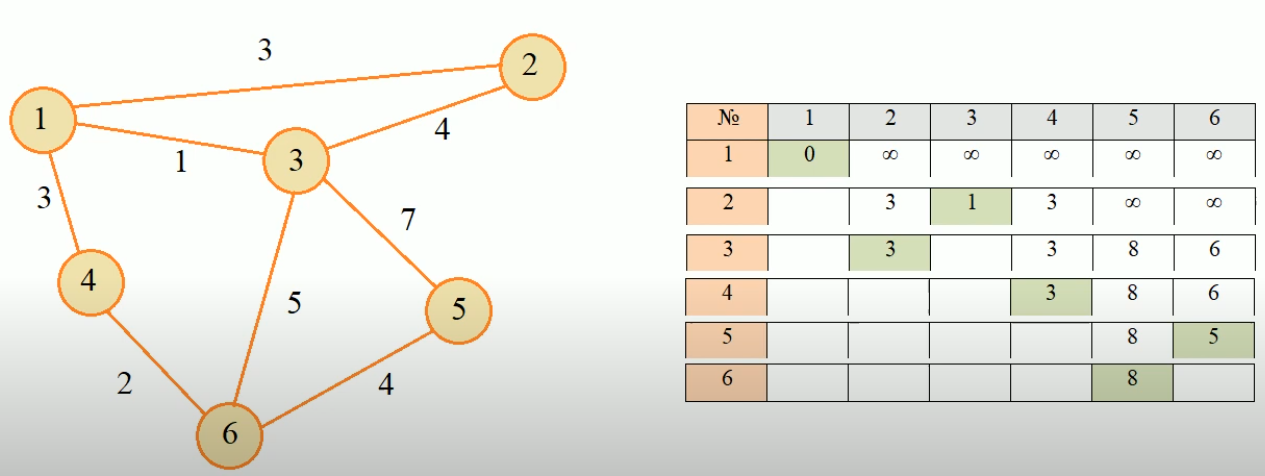



```
ФУНКЦИЯ DIJKSTRA(граф, начальная_вершина, количество_вершин):
    СОЗДАТЬ массив расстояний размером [количество_вершин]
    УСТАНОВИТЬ все расстояния в БЕСКОНЕЧНОСТЬ
    
    УСТАНОВИТЬ расстояние[начальная_вершина] = 0
    
    СОЗДАТЬ приоритетную_очередь (min-heap)
    ДОБАВИТЬ (0, начальная_вершина) в приоритетную_очередь
    
    ПОКА приоритетная_очередь не пуста:
        (текущее_расстояние, текущая_вершина) = ИЗВЛЕЧЬ минимальный из приоритетной_очереди
        
        ЕСЛИ текущее_расстояние > расстояние[текущая_вершина]:
            ПРОПУСТИТЬ эту итерацию
        
        ДЛЯ КАЖДОГО (сосед, вес) ИЗ текущей_вершины:
            новое_расстояние = текущее_расстояние + вес
            
            ЕСЛИ новое_расстояние < расстояние[сосед]:
                расстояние[сосед] = новое_расстояние
                ДОБАВИТЬ (новое_расстояние, сосед) в приоритетную_очередь
    
    ВЕРНУТЬ массив расстояний
```


In [ ]:
import heapq

# Граф в виде списка смежности (веса ребер)
graph = {
    1: [(2, 3), (3, 1), (4, 3)],
    2: [(1, 3), (3, 4)],
    3: [(1, 1), (2, 4), (5, 7), (6, 5)],
    4: [(1, 3), (6, 2)],
    5: [(3, 7), (6, 4)],
    6: [(3, 5), (4, 2), (5, 4)]
}

def dijkstra(graph, start, num_nodes):
    # Инициализация расстояний
    distances = [float('inf')] * (num_nodes + 1)          # Создаем список distances , который хранит текущее минимальное расстояние от вершины  до других вершин.
    distances[start] = 0                                     # Изначально все значения равны ∞ , кроме distances[1] = 0 - расстояние до вершины с самой собой.
    queue = [(0, start)]                                     # Куча для выбора вершины с минимальным расстоянием (текущее_расстояние 0, вершина  1)

    while queue:
        curr_dist, curr_node = heapq.heappop(queue)          # Извлекаем вершину с минимальным расстоянием (свойсто кучи min-heap)
        if curr_dist > distances[curr_node]:                 # Если текущее извлеченное расстояние от  вершины больше уже известного расстояния до этой вершины (нам надо уменьшить растояние)
            continue                                    # Прерываем обход в текущей итерации, избегая ненужной обработки вершин и перейдем в while
        # curr_dist это расстояние, которое было записано в куче для текущей вершины, когда она была туда добавлена.
        # distances[curr_node] это текущее минимальное расстояние до вершины current_vertex, которое было вычислено на данный момент

        # Обновление расстояний для соседей текущей вершины
        for neighbor, weight in graph[curr_node]:        # Для каждой соседней вершины и его веса в графе | Для вершины 1 берем сначала соседа 2 и вес 3
            new_dist = curr_dist + weight              # Считаем новое расстояние, складывая текущее расстояние и вес между графами
            # Если новое расстояние (distance) меньше уже известного расстояния до соседа (distances[neighbor]), то мы обновляем значение в массиве distances.
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist                    # Обновлем расстояние, distances[neighbor]
                heapq.heappush(queue, (new_dist, neighbor))       #  добавляем   в кучу новое расстояние и соседа ( внутри куча перестраивается сама)

    return distances

# Запуск алгоритма Дейкстры
start_node = 2
num_nodes = 6
shortest_distances = dijkstra(graph, start_node, num_nodes)

print("Кратчайшие расстояния от вершины", start_node, ":")
for vertex in range(1, num_vertices + 1):
    print(f"До вершины {vertex}: {shortest_distances[vertex]}")

Кратчайшие расстояния от вершины 2 :
До вершины 1: 3
До вершины 2: 0
До вершины 3: 4
До вершины 4: 6
До вершины 5: 11
До вершины 6: 8


In [ ]:
import heapq

def dijkstra(graph, start):
    """
    Алгоритм Дейкстры для графа с вершинами-буквами.

    Параметры:
    - graph: словарь вида {'A': [('B', вес), ('C', вес)], ...}
    - start: стартовая вершина (буква, например 'A')

    Возвращает:
    - Словарь кратчайших расстояний от start до всех вершин
    """
    # Инициализация расстояний: все вершины из графа получают бесконечность
    dist = {node: float('inf') for node in graph}
    dist[start] = 0

    # Приоритетная очередь (куча) в формате (расстояние, вершина)
    queue = [(0, start)]

    while queue:
        current_dist, current_node = heapq.heappop(queue)

        # ПРОПУСК УСТАРЕВШИХ ЗАПИСЕЙ
        if current_dist > dist[current_node]:
            continue

        # Обработка всех соседей текущей вершины
        for neighbor, weight in graph[current_node]:
            new_dist = current_dist + weight

            # Если найден более короткий путь
            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                heapq.heappush(queue, (new_dist, neighbor))

    return dist


# Создаём граф с буквами
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

# Запускаем Дейкстру от вершины 'A'
distances = dijkstra(graph, 'A')

# Выводим результаты
print("Кратчайшие расстояния от A:")
for node, distance in distances.items():
    status = "недостижима" if distance == float('inf') else distance
    print(f"  {node} → {status}")



Кратчайшие расстояния от A:
  A → 0
  B → 1
  C → 3
  D → 4


In [ ]:
import heapq

# Пример графа
graph = {
    1: [(2, 3), (3, 5)],  # из вершины 1: в 2 с весом 3, в 3 с весом 5
    2: [(3, 1), (4, 2)],  # из вершины 2: в 3 с весом 1, в 4 с весом 2
    3: [(4, 1)],          # из вершины 3: в 4 с весом 1
    4: []                 # из вершины 4: нет исходящих ребер
}

def dijkstra_detailed(graph, start, num_vertices):
    distances = [float('inf')] * (num_vertices + 1)
    distances[start] = 0
    queue = [(0, start)]

    iteration = 0

    while queue:
        iteration += 1
        print(f"\n--- Итерация {iteration} ---")
        print(f"Куча до извлечения: {queue}")

        current_distance, current_vertex = heapq.heappop(queue)
        print(f"Извлекли: расстояние={current_distance}, вершина={current_vertex}")
        print(f"Куча после извлечения: {queue}")

        if current_distance > distances[current_vertex]:
            print(f"Пропускаем - устаревшее расстояние")
            continue

        print(f"Обрабатываем соседей вершины {current_vertex}: {graph.get(current_vertex, [])}")

        for neighbor, weight in graph.get(current_vertex, []):
            old_distance = distances[neighbor]
            new_distance = current_distance + weight

            print(f"  Сосед {neighbor}, вес {weight}: новое расстояние {new_distance} vs старое {old_distance}")

            if new_distance < old_distance:
                distances[neighbor] = new_distance
                heapq.heappush(queue, (new_distance, neighbor))
                print(f"    ОБНОВЛЕНО! Добавили в кучу: ({new_distance}, {neighbor})")
            else:
                print(f"    Не обновляем")

    return distances

# Запускаем с подробным выводом
result = dijkstra_detailed(graph, 1, 4)
print(f"\nФинальные расстояния: {result[1:]}")


--- Итерация 1 ---
Куча до извлечения: [(0, 1)]
Извлекли: расстояние=0, вершина=1
Куча после извлечения: []
Обрабатываем соседей вершины 1: [(2, 3), (3, 5)]
  Сосед 2, вес 3: новое расстояние 3 vs старое inf
    ОБНОВЛЕНО! Добавили в кучу: (3, 2)
  Сосед 3, вес 5: новое расстояние 5 vs старое inf
    ОБНОВЛЕНО! Добавили в кучу: (5, 3)

--- Итерация 2 ---
Куча до извлечения: [(3, 2), (5, 3)]
Извлекли: расстояние=3, вершина=2
Куча после извлечения: [(5, 3)]
Обрабатываем соседей вершины 2: [(3, 1), (4, 2)]
  Сосед 3, вес 1: новое расстояние 4 vs старое 5
    ОБНОВЛЕНО! Добавили в кучу: (4, 3)
  Сосед 4, вес 2: новое расстояние 5 vs старое inf
    ОБНОВЛЕНО! Добавили в кучу: (5, 4)

--- Итерация 3 ---
Куча до извлечения: [(4, 3), (5, 3), (5, 4)]
Извлекли: расстояние=4, вершина=3
Куча после извлечения: [(5, 3), (5, 4)]
Обрабатываем соседей вершины 3: [(4, 1)]
  Сосед 4, вес 1: новое расстояние 5 vs старое 5
    Не обновляем

--- Итерация 4 ---
Куча до извлечения: [(5, 3), (5, 4)]
Извлекли:

In [ ]:
import heapq

def dijkstra(graph, start, num_vertices):
    """
    Алгоритм Дейкстры для поиска кратчайших путей от стартовой вершины.

    Аргументы:
    graph (list): Список смежности графа. graph[i] содержит список кортежей (сосед, вес)
    start (int): Стартовая вершина (нумерация с 1)
    num_vertices (int): Общее количество вершин в графе

    Возвращает:
    list: Массив расстояний от start до каждой вершины
    """
    # Инициализация массива расстояний (индексация с 1)
    distances = [float('inf')] * (num_vertices + 1)
    distances[start] = 0

    # Мин-куча для хранения (расстояние, вершина)
    heap = [(0, start)]

    while heap:
        # Извлекаем вершину с минимальным расстоянием
        current_dist, node = heapq.heappop(heap)

        # Пропускаем устаревшие записи
        if current_dist != distances[node]:
            continue

        # Проверяем всех соседей текущей вершины
        for neighbor, weight in graph[node]:
            distance = current_dist + weight

            # Если нашли более короткий путь
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(heap, (distance, neighbor))

    return distances

# Пример использования

# Пример графа: 4 вершины (нумерация с 1)
# Структура: graph[номер_вершины] = [(сосед, вес), ...]
num_vertices = 4
graph = [[] for _ in range(num_vertices + 1)]

# Добавляем рёбра (взвешенные)
graph[1] = [(2, 1), (3, 4)]
graph[2] = [(1, 1), (3, 2), (4, 5)]
graph[3] = [(1, 4), (2, 2), (4, 1)]
graph[4] = [(2, 5), (3, 1)]

# Запускаем алгоритм от вершины 1
start_vertex = 1
distances = dijkstra(graph, start_vertex, num_vertices)

# Выводим результаты
print(f"Кратчайшие расстояния от вершины {start_vertex}:")
for i in range(1, num_vertices + 1):
    dist = distances[i]
    print(f"До вершины {i}: {'бесконечность' if dist == float('inf') else dist}")

Кратчайшие расстояния от вершины 1:
До вершины 1: 0
До вершины 2: 1
До вершины 3: 3
До вершины 4: 4


## Алгоритм Флойда

находит кратчайшие пути между всеми парами вершин взвешенного графа. Он работает даже с графами, содержащими отрицательные веса рёбер (но не отрицательные циклы).

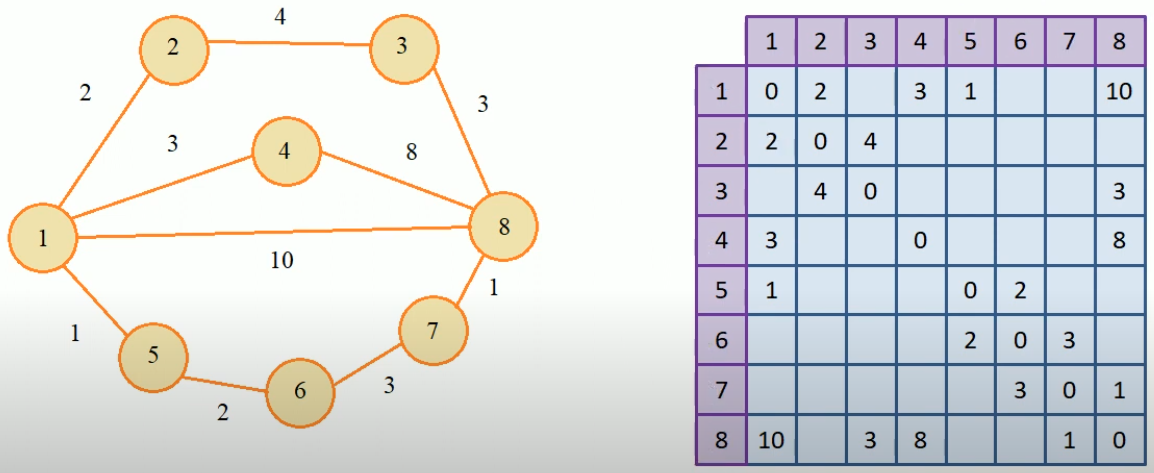



```
ФУНКЦИЯ Флойд_Уоршелл(граф, количество_вершин):
    // Инициализация матрицы расстояний
    СОЗДАТЬ матрицу dist размером [количество_вершин][количество_вершин]
    
    // Заполнение начальными значениями
    ДЛЯ i от 0 до количество_вершин-1:
        ДЛЯ j от 0 до количество_вершин-1:
            ЕСЛИ i == j:
                dist[i][j] = 0
            ИНАЧЕ ЕСЛИ существует ребро из i в j:
                dist[i][j] = вес_ребра(i, j)
            ИНАЧЕ:
                dist[i][j] = БЕСКОНЕЧНОСТЬ
    
    // Основной алгоритм
    ДЛЯ k от 0 до количество_вершин-1:
        ДЛЯ i от 0 до количество_вершин-1:
            ДЛЯ j от 0 до количество_вершин-1:
                ЕСЛИ dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    
    // Проверка на отрицательные циклы
    ДЛЯ i от 0 до количество_вершин-1:
        ЕСЛИ dist[i][i] < 0:
            ВЕРНУТЬ "Обнаружен отрицательный цикл"
    
    ВЕРНУТЬ матрицу dist
```



In [ ]:
# Константа для бесконечности
INF = float('inf')

# Матрица смежности графа (вершины 1-8)
graph = [
    [0,   2,  INF, 3,   1,  INF, INF, 10],       # 1
    [2,   0,   4,   INF,  INF, INF, INF, INF],   # 2
    [INF, 4,   0,  INF, INF, INF, INF, 3],       # 3
    [3,   INF,  INF, 0,   INF, INF, INF, 8],     # 4
    [1,  INF, INF, INF, 0,   2,  INF, INF],      # 5
    [INF, INF, INF, INF, 2,   0,   3,  INF],     # 6
    [INF, INF, INF, INF, INF, 3,   0,   1],      # 7
    [10, INF, 3,   8,  INF, INF, 1,   0]         # 8
]

def floyd_warshall(graph):
    n = len(graph)
    dist = [row.copy() for row in graph]

    for k in range(n):                          #  k - промежуточная вершина из i в j
        for i in range(n):                      #  i — стартовая вершина (строка матрицы)
            for j in range(n):                  #  j — конечная вершина  (столбец матрицы)
                # Обновляем расстояние, если путь через k короче
                if dist[i][k] + dist[k][j] < dist[i][j]:                 # dist[i][k] — расстояние от i до промежуточной вершины k.
                    dist[i][j] = dist[i][k] + dist[k][j]                 # dist[k][j] — расстояние от k до конечной вершины j.
                                                                         # dist[i][j] — текущее кратчайшее расстояние от вершины i до j.

           #    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])  альтернативное обновление
    return dist

# Запуск алгоритма
shortest_paths = floyd_warshall(graph)

# Вывод результатов
vertices = list(range(1, 9))
print("Кратчайшие пути между всеми парами вершин:")
print("   " + " ".join(f"{v:>5}" for v in vertices))
for i in range(len(shortest_paths)):
    row = [f"{val:>5}" if val != INF else "  INF" for val in shortest_paths[i]]
    print(f"{vertices[i]}: {' '.join(row)}")

Кратчайшие пути между всеми парами вершин:
       1     2     3     4     5     6     7     8
1:     0     2     6     3     1     3     6     7
2:     2     0     4     5     3     5     8     7
3:     6     4     0     9     7     7     4     3
4:     3     5     9     0     4     6     9     8
5:     1     3     7     4     0     2     5     6
6:     3     5     7     6     2     0     3     4
7:     6     8     4     9     5     3     0     1
8:     7     7     3     8     6     4     1     0


In [ ]:
vertices = ['A', 'B', 'C']
print("   " + " ".join(v for v in vertices))

   A B C


In [ ]:
vertices = ['A', 'B', 'C']
print("   " + " ".join(f"{v:>5}" for v in vertices))

       A     B     C


Подробное объяснение кода вывода матрицы кратчайших путей

Первая строка: Заголовок таблицы

```python
print("   " + " ".join(f"{v:>5}" for v in vertices))
```

Разбор:
- `"   "` - создает отступ из 3 пробелов для выравнивания с последующими строками
- `vertices` - список вершин графа (например: `['A', 'B', 'C', 'D']`)
- `f"{v:>5}"` - форматирование каждой вершины:
  - `:>5` - выравнивание по правому краю в поле шириной 5 символов
  - Пример: `'A'` становится `'    A'`, `'BC'` становится `'   BC'`
- `" ".join(...)` - объединяет все отформатированные вершины через пробел

Пример результата:
```
       A     B     C     D
```

Вторая часть: Вывод строк матрицы

```python
for i in range(len(shortest_paths)):
    row = [f"{val:>5}" if val != INF else "  INF" for val in shortest_paths[i]]
    print(f"{vertices[i]}: {' '.join(row)}")
```

Разбор по шагам:

**Шаг 1: Итерация по строкам матрицы**
```python
for i in range(len(shortest_paths)):
```
- Перебираем индексы строк матрицы кратчайших путей

**Шаг 2: Форматирование значений в строке**
```python
row = [f"{val:>5}" if val != INF else "  INF" for val in shortest_paths[i]]
```
- `shortest_paths[i]` - i-я строка матрицы (расстояния от вершины i до всех вершин)
- Для каждого значения в строке:
  - Если значение не равно INF (бесконечность): форматируем как число с выравниванием вправо в поле 5 символов
  - Если значение равно INF: заменяем на строку `"  INF"` (занимает 5 символов)

**Шаг 3: Вывод строки**
```python
print(f"{vertices[i]}: {' '.join(row)}")
```
- `vertices[i]` - название текущей вершины
- `: ` - разделитель после названия вершины
- `' '.join(row)` - объединяет все отформатированные значения строки через пробел

Полный пример работы:

Исходные данные:
```python
vertices = ['A', 'B', 'C']
INF = float('inf')
shortest_paths = [
    [0, 3, INF],
    [2, 0, 5],
    [INF, 1, 0]
]
```

Результат выполнения:
```
       A     B     C
A:     0     3   INF
B:     2     0     5
C:   INF     1     0
```

Визуализация форматирования:

Для заголовка:
```
vertices = ['A', 'B', 'C']
"   " + " ".join(f"{v:>5}" for v in vertices)
→ "   " + " ".join(["    A", "    B", "    C"])
→ "   " + "    A    B    C"
→ "       A    B    C"
```

Для строки данных:
```python
# Для i=0: shortest_paths[0] = [0, 3, INF]
row = [f"{val:>5}" if val != INF else "  INF" for val in [0, 3, INF]]
→ ["    0", "    3", "  INF"]
→ "    0     3   INF"

print(f"A: {' '.join(row)}")
→ "A:     0     3   INF"
```

Особенности форматирования:

- **`f"{v:>5}"`** - гарантирует, что каждая ячейка занимает ровно 5 символов
- **`"  INF"`** - специально подобрано чтобы занимать 5 символов (2 пробела + "INF")
- **Выравнивание** - делает таблицу читаемой и аккуратной
- **Обработка бесконечности** - заменяет числовое значение INF на понятную строку

Этот код создает профессионально выглядящую таблицу расстояний между вершинами графа! 📊

In [ ]:
INF = float('inf')
graph = [
    [0,   3,  INF, 5], # 1
    [2,   0,  1, 4],   # 2
    [INF, INF, 0, 2],  # 3
    [INF, 3, INF, 0],  # 4
]
def floyd_warshall(graph):
    n = len(graph)
    dist = [row.copy() for row in graph]

    for k in range(n):                          #  k - вершина
        for i in range(n):                      #  i — Стартовая вершина
            for j in range(n):                  #  j — Конечная вершина
                a = dist[i][k]
                b = dist[k][j]
                c = dist[i][j]
                dist[i][j] = min(c, a + b)
    return dist

# Запуск алгоритма
shortest_paths = floyd_warshall(graph)

# Вывод результатов
vertices = list(range(1, 5))
print("Кратчайшие пути между всеми парами вершин:")
print("   " + " ".join(f"{v:>5}" for v in vertices))
for i in range(len(shortest_paths)):
    row = [f"{val:>5}" if val != INF else "  INF" for val in shortest_paths[i]]
    print(f"{vertices[i]}: {' '.join(row)}")

Кратчайшие пути между всеми парами вершин:
       1     2     3     4
1:     0     3     4     5
2:     2     0     1     3
3:     7     5     0     2
4:     5     3     4     0


В контексте **алгоритма Флойда-Уоршелла** (или других задач с матрицей смежности графа) выражения `dist[i][k]`, `dist[k][j]` и `dist[i][j]` связаны с **индексами вершин графа**, а не с осями матрицы. Вот как это работает:

---

1. **Что означают индексы `i`, `j`, `k`?**
- **`i`** — начальная вершина (строка матрицы).
- **`j`** — конечная вершина (столбец матрицы).
- **`k`** — **промежуточная вершина**, через которую может проходить путь из `i` в `j`.

---

2. **Как связаны `dist[i][k]`, `dist[k][j]` и `dist[i][j]`?**
- `dist[i][k]` — **кратчайшее расстояние от вершины `i` до вершины `k`**.
- `dist[k][j]` — **кратчайшее расстояние от вершины `k` до вершины `j`**.
- `dist[i][j]` — текущее **кратчайшее расстояние от `i` до `j`** (без промежуточных вершин).

**Цель алгоритма Флойда-Уоршелла:**  
Проверить, можно ли улучшить путь из `i` в `j`, пройдя через вершину `k`. Для этого сравнивается:
```python
dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
```
Если путь через `k` короче, обновляем `dist[i][j]`.

---

3. **Пример на матрице смежности**
Пусть матрица `dist` задана так:

```
   0  1  2  3
0 [0, 3, ∞, 5]
1 [2, 0, 1, 4]
2 [∞, ∞, 0, 2]
3 [∞, ∞, ∞, 0]
```

- `dist[0][2] = ∞` (изначально нет прямого пути из вершины 0 в 2).
- При `k=1`:  
  - `dist[0][1] + dist[1][2] = 3 + 1 = 4`  
  - Обновляем `dist[0][2] = 4`.

Теперь `dist[0][2]` учитывает путь через вершину `k=1`.

---

4. **Почему индекс `k` важен?**
- **`k` перебирается в цикле** как возможная промежуточная вершина.
- На каждом шаге алгоритм проверяет, улучшится ли путь из `i` в `j`, если добавить вершину `k`.
- **Порядок перебора `k`** важен: внешний цикл по `k` гарантирует, что все возможные комбинации промежуточных вершин учтены.

---

5. **Как это связано с осями матрицы?**
- **Матрица `dist`** — это двумерный массив, где:
  - **Строки** соответствуют начальным вершинам (`i`).
  - **Столбцы** соответствуют конечным вершинам (`j`).
- Индекс `k` — это **номер промежуточной вершины**, а не ось матрицы. Он используется для проверки альтернативных путей.

---

6. **Когда еще используется такая запись?**
- **Динамическое программирование** (например, задача о рюкзаке или умножение матриц).
- **Графовые алгоритмы** (например, поиск кратчайших путей или транзитивного замыкания).

---

Вывод:
- **`i`** — начальная вершина (строка матрицы),
- **`j`** — конечная вершина (столбец матрицы),
- **`k`** — промежуточная вершина, через которую проверяется улучшение пути.

В алгоритме Флойда-Уоршелла это позволяет находить кратчайшие пути между всеми парами вершин за время $ O(n^3) $. 🚀

## Бинарные деревья

**Бинарное дерево** — это структура данных, в которой каждый узел (или вершина) имеет не более двух дочерних узлов: **левого** и **правого**. Эти дочерние узлы сами могут быть бинарными деревьями или быть пустыми (`None`).

Основные понятия:
- **Корень дерева**: Вершина, которая не имеет родительского узла.
- **Лист**: Узел, который не имеет дочерних узлов.
- **Высота дерева**: Максимальное количество рёбер от корня до самого дальнего листа.
- **Глубина узла**: Количество рёбер от корня до данного узла.


```
     A
    / \
   B   C
  / \   \
 D   E   F
```



Здесь:
- Корень: `A`
- Листья: `D`, `E`, `F`
- Высота дерева: 2 (от `A` до `F`)
- Глубина узла E: 2 (путь `A` → `B` → `E`)

Существует два основных способа обхода бинарного дерева:
1. **Обход в глубину (DFS)**:
   - **Прямой (pre-order)**: Сначала посещаем корень, затем левое поддерево, затем правое поддерево.
   - **Центрированный (in-order)**: Сначала посещаем левое поддерево, затем корень, затем правое поддерево.
   - **Обратный (post-order)**: Сначала посещаем левое поддерево, затем правое поддерево, затем корень.
2. **Обход в ширину (BFS)**: Посещаем узлы по уровням, начиная с корня.


```
     A
    / \
   B   C
  / \   \
 D   E   F
```


- **Pre-order**: `A, B, D, E, C, F`
- **In-order**: `D, B, E, A, C, F`
- **Post-order**: `D, E, B, F, C, A`
- **BFS (по уровням)**: `A, B, C, D, E, F`

```python
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Создаем дерево
root = TreeNode('A')
root.left = TreeNode('B')
root.right = TreeNode('C')
root.left.left = TreeNode('D')
root.left.right = TreeNode('E')
root.right.right = TreeNode('F')
```





In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Создаем дерево
root = TreeNode('A')
root.left = TreeNode('B')
root.right = TreeNode('C')
root.left.left = TreeNode('D')
root.left.right = TreeNode('E')
root.right.right = TreeNode('F')

In [ ]:
def iterative_pre_order(root):
    if not root:
        return

    stack = [root]
    while stack:
        node = stack.pop()
        print(node.value, end=' ')
        # Добавляем правого потомка первым, чтобы левый обрабатывался раньше
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)


iterative_pre_order(root)  # Вывод: A B D E C F

A B D E C F 

In [ ]:
def pre_order(node):
    if node is None:
        return
    print(node.value, end=" ")  # Посетить корень
    pre_order(node.left)        # Рекурсивно пройти левое поддерево
    pre_order(node.right)       # Рекурсивно пройти правое поддерево

print("Pre-order:")
pre_order(root)       # Вывод: A B D E C F

Pre-order:
A B D E C F 

Для production-кода и очень глубоких деревьев предпочтительнее итеративная реализация, чтобы избежать переполнения стека.

Для учебных задач и небольших деревьев лучше рекурсивная реализация, так как она проще, понятнее и точно отражает логику обхода.



In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Создаем дерево
root = TreeNode('A')
root.left = TreeNode('B')
root.right = TreeNode('C')
root.left.left = TreeNode('D')
root.left.right = TreeNode('E')
root.right.right = TreeNode('F')

In [ ]:
def iterative_in_order(root):
    stack = []
    current = root

    while stack or current:
        # Двигаемся до конца влево
        while current:
            stack.append(current)
            current = current.left

        # Посещаем крайний левый узел
        current = stack.pop()
        print(current.value, end=' ')

        # Переходим к правому поддереву
        current = current.right

# Пример использования
print("In-order:", end=' ')
iterative_in_order(root)
# Вывод: D B E A C F

In-order: D B E A C F 

In [ ]:
def in_order(node):
    if node is None:
        return
    in_order(node.left)         # Рекурсивно пройти левое поддерево
    print(node.value, end=" ")  # Посетить корень
    in_order(node.right)        # Рекурсивно пройти правое поддерево

print("\nIn-order:")
in_order(root)
# Вывод: D B E A C F


In-order:
D B E A C F 

In [ ]:
def iterative_in_order_best(root):
    stack = []
    current = root

    while stack or current:
        # Спускаемся влево
        if current:
            stack.append(current)
            current = current.left
        # Поднимаемся и обрабатываем
        else:
            node = stack.pop()
            print(node.value, end=' ')
            current = node.right
print("In-order:", end=' ')
iterative_in_order_best(root)

In-order: D B E A C F 

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Создаем дерево
root = TreeNode('A')
root.left = TreeNode('B')
root.right = TreeNode('C')
root.left.left = TreeNode('D')
root.left.right = TreeNode('E')
root.right.right = TreeNode('F')

In [ ]:
def iterative_post_order(root):
    if not root:
        return

    stack = [(root, False)]  # (узел, посещен)

    while stack:
        node, visited = stack.pop()
        if visited:
            print(node.value, end=' ')
            continue

        # Отмечаем узел как посещенный и добавляем обратно в стек
        stack.append((node, True))

        # Добавляем правого и левого потомков (порядок важен!)
        if node.right:
            stack.append((node.right, False))
        if node.left:
            stack.append((node.left, False))

# Пример использования
print("\nPost-order:", end=' ')
iterative_post_order(root)
# Вывод: D E B F C A


Post-order: D E B F C A 

In [ ]:
def post_order(node):
    if node is None:
        return
    post_order(node.left)       # Рекурсивно пройти левое поддерево
    post_order(node.right)      # Рекурсивно пройти правое поддерево
    print(node.value, end=" ")  # Посетить корень

print("\nPost-order:")
post_order(root)
# Вывод: D E B F C A


Post-order:
D E B F C A 

In [ ]:
from collections import deque

def bfs(root):
    if root is None:
        return
    queue = deque([root])  # Инициализируем очередь
    while queue:
        node = queue.popleft()  # Извлекаем первый элемент из очереди
        print(node.value, end=" ")
        if node.left:
            queue.append(node.left)  # Добавляем левого потомка
        if node.right:
            queue.append(node.right)  # Добавляем правого потомка

print("\nBFS:")
bfs(root)
# Вывод: A B C D E F


BFS:
A B C D E F 

### In-order vs Pre-order vs Post-order

Какой из вариантов DFS лучше для обхода бинарного дерева?


**Центрированный обход (in-order)** считается **наиболее полезным и часто используемым** для бинарных деревьев, особенно если дерево является **бинарным деревом поиска (BST)**. Однако выбор конкретного метода зависит от задачи. Вот детали:

**1. In-order (центрированный обход)**  
- **Порядок**: Левое поддерево → Корень → Правое поддерево.  
- **Почему лучше для BST**:  
  Для бинарного дерева поиска (BST) in-order обход **возвращает узлы в строго отсортированном порядке** (возрастание или убывание, в зависимости от реализации). Это ключевая операция для работы с BST:  
  - Проверка, является ли дерево BST.  
  - Получение элементов в отсортированном виде.  
  - Поиск следующего/предыдущего элемента (in-order successor/predecessor).  

- **Пример**:  
  Для дерева:  
  ```
      A
     / \
    B   C
   / \   \
  D   E   F
  ```  
  In-order: `D → B → E → A → C → F` (если это BST, то это отсортированная последовательность).

- **Когда использовать**:  
  - Работа с BST (сортировка, проверка свойств).  
  - Задачи, требующие обработки узлов в "естественном" порядке (например, вывод выражения в инфиксной записи).


**2. Pre-order (прямой обход)**  
- **Порядок**: Корень → Левое поддерево → Правое поддерево.  
- **Преимущества**:  
  - Сохраняет структуру дерева при сериализации.  
  - Удобен для копирования дерева (сначала обрабатывается корень).  
  - Используется в алгоритмах, где нужно "запомнить" текущий узел перед спуском вглубь (например, построение префиксных выражений).  

- **Пример**:  
  Pre-order для того же дерева: `A → B → D → E → C → F`.  

- **Когда использовать**:  
  - Сериализация/десериализация дерева.  
  - Построение копии дерева.  
  - Обработка узлов "сверху вниз" (например, генерация префиксных выражений).


**3. Post-order (обратный обход)**  
- **Порядок**: Левое поддерево → Правое поддерево → Корень.  
- **Преимущества**:  
  - Удобен для операций, где нужно сначала обработать дочерние узлы (например, удаление узлов, вычисление выражений в дереве разбора).  
  - Используется в алгоритмах, где результат зависит от поддеревьев (например, подсчет высоты дерева).  

- **Пример**:  
  Post-order для того же дерева: `D → E → B → F → C → A`.  

- **Когда использовать**:  
  - Удаление узлов (сначала удаляются дочерние).  
  - Вычисление выражений в дереве (постфиксная запись).  
  - Задачи, требующие агрегации данных от листьев к корню.


**Сравнение**
| Критерий                     | Лучший выбор          | Причина                                                                 |
|------------------------------|-----------------------|-------------------------------------------------------------------------|
| **Бинарное дерево поиска**   | **In-order**          | Возвращает элементы в отсортированном порядке — основное свойство BST.  |
| **Сериализация/копирование** | Pre-order             | Сохраняет структуру дерева (корень обрабатывается первым).             |
| **Удаление узлов**           | Post-order            | Сначала обрабатываются дочерние узлы.                                   |
| **Общая задача (без контекста)** | **In-order**       | Самый "характерный" для бинарных деревьев из-за связи с BST.           |




- Если дерево **является BST** (а это частый случай в задачах), **in-order — лучший выбор**.  
- Для **общих бинарных деревьев** выбор зависит от задачи, но **in-order всё равно остаётся ключевым** из-за своей связи с BST и естественности для рекурсивных структур.  
- **Pre-order и post-order** используются в специфических сценариях (сериализация, удаление узлов).  


**In-order — наиболее универсальный и часто применяемый метод для бинарных деревьев**, особенно если речь идёт о бинарных деревьях поиска. Для других задач предпочтение отдаётся pre-order или post-order.

### **BFS vs DFS**

**BFS (Level Order Traversal) чаще используется для:**
1. **Поиска кратчайшего пути** в деревьях
2. **Поуровневого обхода**
3. **Поиска ближайшего соседа**
4. **Сериализации/десериализации деревьев**
5. **Построения связей между узлами** (например, Next Right Pointers)
6. **BFS потребляет память пропорционально ширине дерева**

**Для очень глубоких деревьев** (особенно узких, вырожденных в список) предпочтительнее использовать **BFS**, так как **DFS требует памяти, пропорциональной глубине дерева**, что может привести к переполнению стека или чрезмерному потреблению памяти. **BFS использует постоянный объём памяти**, независимо от глубины.



**DFS (Pre/In/Post-order) чаще используется для:**
1. **Проверки свойств дерева** (BST, симметрия, баланс)
2. **Поиска максимальной глубины**
3. **Путей и сумм**
4. **Рекурсивных алгоритмов**
5. **Выражений и парсинга**
6. **DFS потребляет память пропорционально глубине дерева**

**Для очень широких деревьев** (с большим количеством узлов на уровне) предпочтительнее использовать **DFS**, так как BFS требует памяти, пропорциональной ширине дерева, что может привести к переполнению памяти. DFS же зависит от глубины дерева, которая обычно меньше ширины в таких сценариях.





**Статистика использования в реальных проектах**

По данным анализа open-source проектов:

| Алгоритм | Частота использования | Основные сценарии |
|----------|----------------------|-------------------|
| **DFS** | ~60-70% | Рекурсия, проверка свойств, обход BST |
| **BFS** | ~30-40% | Поуровневая обработка, кратчайшие пути |


**Где DFS предпочтительнее:**
```python
# 1. Проверка BST - почти всегда DFS
def is_valid_bst(root, min_val=float('-inf'), max_val=float('inf')):
    if not root:
        return True
    if not (min_val < root.val < max_val):
        return False
    return (is_valid_bst(root.left, min_val, root.val) and
            is_valid_bst(root.right, root.val, max_val))

# 2. Поиск максимальной глубины
def max_depth(root):
    if not root:
        return 0
    return 1 + max(max_depth(root.left), max_depth(root.right))

# 3. In-order обход BST (дает отсортированный порядок)
def inorder_traversal(root):
    if root:
        inorder_traversal(root.left)
        print(root.val)
        inorder_traversal(root.right)
```

**Где BFS предпочтительнее:**
```python
from collections import deque

# 1. Поуровневый обход
def level_order(root):
    if not root:
        return []
    result = []
    queue = deque([root])
    while queue:
        level = []
        for _ in range(len(queue)):
            node = queue.popleft()
            level.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        result.append(level)
    return result

# 2. Поиск минимальной глубины
def min_depth(root):
    if not root:
        return 0
    queue = deque([(root, 1)])
    while queue:
        node, depth = queue.popleft()
        if not node.left and not node.right:
            return depth
        if node.left:
            queue.append((node.left, depth + 1))
        if node.right:
            queue.append((node.right, depth + 1))
```

**Сравнение характеристик**

| Параметр | BFS | DFS |
|----------|-----|-----|
| **Память** | O(w) - ширина дерева | O(h) - высота дерева |
| **Время** | O(n) | O(n) |
| **Рекурсия** | Редко | Часто |
| **Итеративный подход** | Всегда | Часто |
| **Лучше для широких деревьев** | ❌ | ✅ |
| **Лучше для глубоких деревьев** | ✅ | ❌ |


**Выбирайте BFS когда:**
- Нужен **поуровневый обход**
- Ищете **кратчайший путь** между узлами
- Дерево **очень глубокое**, но не широкое
- Нужно **минимальное расстояние** от корня

**Выбирайте DFS когда:**
- Работаете с **BST** (бинарными деревьями поиска)
- Нужно **проверить свойства** дерева
- Дерево **очень широкое**, но не глубокое
- Используете **рекурсивный подход**
- Нужны **все пути** от корня к листьям

**Популярные шаблоны задач**

**DFS-шаблоны:**
```python
# Pre-order (Корень → Лево → Право)
def preorder(root):
    if root:
        print(root.val)        # Посетить
        preorder(root.left)    # Рекурсия влево
        preorder(root.right)   # Рекурсия вправо

# In-order (Лево → Корень → Право) - для BST!
def inorder(root):
    if root:
        inorder(root.left)     # Рекурсия влево
        print(root.val)        # Посетить  
        inorder(root.right)    # Рекурсия вправо

# Post-order (Лево → Право → Корень)
def postorder(root):
    if root:
        postorder(root.left)   # Рекурсия влево
        postorder(root.right)  # Рекурсия вправо
        print(root.val)        # Посетить
```

**BFS-шаблон:**
```python
def bfs_template(root):
    if not root:
        return
    
    queue = deque([root])
    while queue:
        node = queue.popleft()
        # Обработать node
        print(node.val)
        
        # Добавить детей
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
```



**Практический совет:** В интервью и реальных задачах сначала определите, что вам нужно - работать с уровнями (BFS) или исследовать структуру дерева (DFS).

In [ ]:
n = 5  # Количество вершин: 0, 1, 2, 3, 4, 5
edges = [[0,1], [0,2], [3,5], [5,4], [4,3]]  # Список рёбер


graph = [[] for _ in range(n)]

for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)
graph

IndexError: list index out of range

## Построение списка смежности и других представлений графов

**1. Построение списка смежности**

Список смежности это представление графа в виде коллекции, где для каждой вершины хранится список смежных с ней вершин. Для неориентированного графа каждое ребро `[u, v]` добавляется в обе стороны.

Пример входных данных
```python
n = 6  # Количество вершин: 0, 1, 2, 3, 4, 5
edges = [[0,1], [0,2], [3,5], [5,4], [4,3]]  # Список рёбер


graph = [[] for _ in range(n)]

for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)
```


Ключевые моменты построения

1.1. Обработка изолированных вершин

Если в графе есть вершины без рёбер (например, n=7, но в рёбрах только 0-5):
```python
n = 7
graph = [[] for _ in range(n)]  # Вершина 6 будет иметь пустой список
```

1.2. Проверка на петли и кратные рёбра

Хотя в условии задачи сказано, что их нет, в реальных задачах стоит добавлять проверки:
```python
# Для избежания дубликатов (если могут быть)
if v not in graph[u]:
    graph[u].append(v)
    graph[v].append(u)
```

1.3. Эффективная реализация

Для больших графов используйте:
```python
from collections import defaultdict

# Автоматическое создание списков для новых вершин
graph = defaultdict(list)
for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)

# Для изолированных вершин (если n известно)
for i in range(n):
    if i not in graph:
        graph[i] = []
```

**2. Матрица смежности**


**Что это:** Двумерный массив `n x n`, где `matrix[i][j] = 1` если есть ребро из i в j.

**Пример для нашего графа:**
```python
matrix = [
    [0, 1, 1, 0, 0, 0],  # 0
    [1, 0, 0, 0, 0, 0],  # 1
    [1, 0, 0, 0, 0, 0],  # 2
    [0, 0, 0, 0, 1, 1],  # 3
    [0, 0, 0, 1, 0, 1],  # 4
    [0, 0, 0, 1, 1, 0]   # 5
]
```

**Когда использовать:**
- ✅ Плотные графы (много рёбер)
- ✅ Быстрая проверка наличия ребра O(1)
- ✅ Алгоритмы, требующие матричных операций (например, поиск циклов через возведение в степень)

**Код построения:**
```python
matrix = [[0] * n for _ in range(n)]
for u, v in edges:
    matrix[u][v] = 1
    matrix[v][u] = 1  # Для неориентированного графа
```
Цифра **1** означает **наличие ребра между вершинами**, а **0 — отсутствие ребра**. Это стандартное соглашение для представления невзвешенных графов в матрице смежности.

**Недостатки:**
- ❌ Память O(n²) — неэффективно для разреженных графов
- ❌ Медленное получение соседей (O(n) вместо O(1) в списке смежности)


**3. Взвешенные графы**

**Список смежности с весами:**
```python
graph = [[] for _ in range(n)]
for u, v, w in weighted_edges:
    graph[u].append((v, w))
    graph[v].append((u, w))  # Для неориентированного
```

**Пример:**
```
graph[0] = [(1, 5), (2, 3)]  # Ребро 0→1 весом 5, 0→2 весом 3
```
```python
graph = {
    1: [(2, 3), (3, 1), (4, 3)],
    2: [(1, 3), (3, 4)],
    3: [(1, 1), (2, 4), (5, 7), (6, 5)],
    4: [(1, 3), (6, 2)],
    5: [(3, 7), (6, 4)],
    6: [(3, 5), (4, 2), (5, 4)]
}

print("Граф неориентированный:")
for node, neighbors in graph.items():
    print(f"{node}: {neighbors}")
```


**Когда использовать:**
- ✅ Алгоритмы Дейкстры, Беллмана-Форда, Флойда-Уоршолла
- ✅ Задачи с расстояниями, стоимостями, пропускными способностями

**4. Матрица весов (для взвешенных графов)**

**Что это:** Двумерный массив, где `matrix[i][j] = вес_ребра` или `∞` если ребра нет.


**Код построения:**
```python
INF = float('inf')
matrix = [[INF] * n for _ in range(n)]
for i in range(n):
    matrix[i][i] = 0  # Расстояние до себя = 0

for u, v, w in weighted_edges:
    matrix[u][v] = w
    matrix[v][u] = w  # Для неориентированного
```

**Когда использовать:**
- ✅ Алгоритм Флойда-Уоршолла (все пары кратчайших путей)
- ✅ Динамическое программирование на графах




**5. Список рёбер**

**Что это:** Храним все рёбра в одном списке.

**Пример:**
```python
edge_list = [(0,1), (0,2), (3,5), (5,4), (4,3)]
```
**Код построения:**
```python
edge_list = [(u, v) for u, v in edges]  # Для неориентированного
# Или для ориентированного:
# edge_list = [(u, v, weight) for u, v, weight in weighted_edges]
```

**Когда использовать:**
- ✅ Алгоритмы минимального остовного дерева (Краскал)
- ✅ Алгоритмы, обрабатывающие все рёбра по порядку
- ✅ Экономия памяти для очень разреженных графов



**Недостатки:**
- ❌ Медленный поиск соседей (O(E) вместо O(1))
- ❌ Неэффективно для BFS/DFS





**Сравнительная таблица представлений**

| Представление      | Память       | Проверка ребра | Получение соседей | Лучшие алгоритмы                |
|--------------------|--------------|----------------|-------------------|---------------------------------|
| **Список смежности** | O(n + e)     | O(степень)     | O(1) на соседа    | BFS, DFS, Дейкстра              |
| **Матрица смежности** | O(n²)        | O(1)           | O(n)              | Алгоритмы с матрицами, проверки |
| **Список рёбер**     | O(e)         | O(e)           | O(e)              | Краскал, алгоритмы MST          |
| **Матрица весов**    | O(n²)        | O(1)           | O(n)              | Флойд-Уоршалл, динамика        |


**6. Продвинутые техники построения**


6.1. Сжатое представление для больших графов

Для миллионов вершин используйте:
```python
# Sparse-матрицы из scipy
from scipy.sparse import csr_matrix

row = []
col = []
data = []

for i, (u, v) in enumerate(edges):
    row.extend([u, v])
    col.extend([v, u])  # Для неориентированного
    data.extend([1, 1])

matrix = csr_matrix((data, (row, col)), shape=(n, n))
```

6.2. Параллельное построение

Для очень больших графов:
```python
from concurrent.futures import ThreadPoolExecutor

def process_chunk(chunk):
    local_graph = [[] for _ in range(n)]
    for u, v in chunk:
        local_graph[u].append(v)
        local_graph[v].append(u)
    return local_graph

# Разбиваем рёбра на части
chunks = [edges[i::4] for i in range(4)]  # 4 потока

with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_chunk, chunks))

# Объединяем результаты
graph = [[] for _ in range(n)]
for local_graph in results:
    for i in range(n):
        graph[i].extend(local_graph[i])
```

6.3. Построение с сортировкой соседей

Для некоторых алгоритмов важно хранить соседей в порядке:
```python
# Для алгоритмов, требующих детерминированного порядка
for neighbors in graph:
    neighbors.sort()  # Сортировка по возрастанию
```

**Антипаттерны и как их избежать**

Необработанные изолированные вершины
```python
# Плохо: не учитываем изолированные вершины
graph = defaultdict(list)
for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)

# Если n=5, но есть вершина 4 без рёбер - её не будет в graph!
```

**Решение:**
```python
# Хорошо: инициализируем все вершины
graph = {i: [] for i in range(n)}
for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)
```

Дублирование рёбер
```python
# Плохо: возможны дубликаты
for u, v in edges:
    graph[u].append(v)
    graph[v].append(u)
```

**Решение:**
```python
# Хорошо: проверка перед добавлением
if v not in graph[u]:
    graph[u].append(v)
    graph[v].append(u)
```

Избыточное использование памяти
```python
# Плохо: матрица для разреженного графа
n = 10000
matrix = [[0]*n for _ in range(n)]  # 10000x10000 = 100 млн элементов!
```

**Решение:**
```python
# Хорошо: список смежности для разреженного графа
graph = [[] for _ in range(n)]  # Память O(n + e)
```



**Когда что использовать:**

1. **Список смежности (стандартный выбор):**
   - BFS/DFS обходы
   - Поиск компонент связности
   - Большинство алгоритмов на графах
   - Разреженные графы (e << n²)

2. **Матрица смежности:**
   - Плотные графы (e ≈ n²)
   - Быстрые проверки наличия ребра
   - Алгоритмы с матричными операциями
   - Небольшие графы (n ≤ 1000)

3. **Список рёбер:**
   - Алгоритмы MST (Краскал)
   - Алгоритмы, обрабатывающие все рёбра
   - Экономия памяти при очень больших n и малых e

4. **Взвешенные представления:**
   - Алгоритмы кратчайших путей (Дейкстра, Беллман-Форд)
   - Сетевые потоки (Эдмондс-Карп)
   - Задачи с неотрицательными весами

**Пример выбора для конкретной задачи:**

**Задача:** "Кратчайший путь в неориентированном взвешенном графе"
- **Представление:** Список смежности с весами
- **Почему:** Быстрое получение соседей + хранение весов

**Задача:** "Проверить, является ли граф двудольным"
- **Представление:** Список смежности (обычный)
- **Почему:** BFS/DFS обходы, нет необходимости в весах

**Задача:** "Найти все пары кратчайших путей в плотном графе"
- **Представление:** Матрица весов
- **Почему:** Алгоритм Флойда-Уоршалла эффективен с матрицей



**Заключение**

Выбор представления графа критически влияет на эффективность алгоритмов. Ключевые принципы:

1. **Для большинства задач используйте список смежности** — это золотая середина между эффективностью памяти и скоростью операций.

2. **Всегда учитывайте специфику задачи:**
   - Нужны веса? → Взвешенный список смежности
   - Нужны все пары кратчайших путей? → Матрица весов
   - Алгоритм работает с рёбрами? → Список рёбер

3. **Не забывайте об изолированных вершинах** — инициализируйте структуру для всех вершин от 0 до n-1.

4. **Для очень больших графов** рассматривайте:
   - Sparse-матрицы
   - Параллельное построение
   - Внешние библиотеки (NetworkX, igraph)

Мастерство в выборе правильного представления — ключевой навык для решения сложных графовых задач в алгоритмических соревнованиях и реальных проектах.

In [ ]:
from collections import deque

def zero_one_bfs(graph, start, n):
    """
    graph: граф в формате {u: [(v, weight), ...]}
    start: начальная вершина
    n: количество вершин
    Возвращает: список кратчайших расстояний
    """
    INF = float('inf')
    dist = [INF] * n
    dist[start] = 0
    dq = deque([start])

    while dq:
        u = dq.popleft()
        for v, w in graph[u]:
            # Если мы можем улучшить расстояние до v
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                if w == 0:
                    dq.appendleft(v)  # Рёбра весом 0 добавляем в начало
                else:
                    dq.append(v)      # Рёбра весом 1 добавляем в конец

    return dist

# Пример использования: лабиринт с возможностью пробить стену
# 0 - свободная клетка, 1 - стена (стоит 1 единицу чтобы пройти)
n, m = 4, 4
maze = [
    [0, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 0, 0, 0],
    [1, 1, 1, 0]
]

# Преобразуем матрицу в граф
graph = {}
for i in range(n):
    for j in range(m):
        node = i * m + j
        graph[node] = []

        # Проверяем 4 направления
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            ni, nj = i + dx, j + dy
            if 0 <= ni < n and 0 <= nj < m:
                neighbor = ni * m + nj
                weight = maze[ni][nj]  # 0 или 1
                graph[node].append((neighbor, weight))

# Запускаем 0-1 BFS из левого верхнего угла (0,0)
start_node = 0
distances = zero_one_bfs(graph, start_node, n * m)

# Выводим расстояние до правого нижнего угла
end_node = (n-1) * m + (m-1)
print(f"Кратчайшее расстояние: {distances[end_node]}")

Кратчайшее расстояние: 0


## Нестандартные вариации BFS и DFS на Python

**1. Мульти-источниковый BFS**

Запуск BFS одновременно из нескольких стартовых вершин. Все источники инициализируются в начале, и алгоритм обрабатывает их в единой очереди.

Когда использовать
- Разделение графа на регионы (как в задаче про империю)
- Поиск ближайшей точки из множества целевых точек
- Моделирование распространения из нескольких источников (эпидемии, пожары)

Реализация
```python
from collections import deque

def multi_source_bfs(graph, sources):
    """
    graph: список смежности
    sources: список начальных вершин
    Возвращает: словарь расстояний от ближайшего источника
    """
    n = len(graph)
    dist = [-1] * n  # -1 означает непосещённую вершину
    queue = deque()
    
    # Инициализация всех источников
    for source in sources:
        dist[source] = 0
        queue.append(source)
    
    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if dist[neighbor] == -1:  # Если еще не посещена
                dist[neighbor] = dist[current] + 1
                queue.append(neighbor)
    
    return dist

# Пример использования
graph = [
    [1, 2],    # 0
    [0, 3],    # 1
    [0, 3, 4], # 2
    [1, 2, 5], # 3
    [2, 5],    # 4
    [3, 4]     # 5
]
sources = [0, 5]  # Начинаем с вершин 0 и 5
distances = multi_source_bfs(graph, sources)

print("Расстояния от ближайшего источника:")
for i, d in enumerate(distances):
    print(f"Вершина {i}: {d}")
```

**Пример вывода:**
```
Вершина 0: 0
Вершина 1: 1
Вершина 2: 1
Вершина 3: 1  # Равноудалена от 0 и 5
Вершина 4: 1
Вершина 5: 0
```

Особенности
- Гарантирует, что каждая вершина будет помечена ближайшим источником
- Сложность: O(V + E), такая же как у обычного BFS
- Может быть расширен для хранения не только расстояний, но и "владельца" (какой источник ближайший)

---

**2. 0-1 BFS**


Оптимизация BFS для графов, где веса рёбер могут быть только 0 или 1. Использует deque вместо обычной очереди для обработки рёбер разного веса.

Когда использовать
- Задачи с "бесплатными" и "платными" переходами
- Графы, где переходы имеют только два возможных веса (0 и 1)
- Когда нужны кратчайшие пути, но Dijkstra избыточен

Реализация
```python
from collections import deque

def zero_one_bfs(graph, start, n):
    """
    graph: граф в формате {u: [(v, weight), ...]}
    start: начальная вершина
    n: количество вершин
    Возвращает: список кратчайших расстояний
    """
    INF = float('inf')
    dist = [INF] * n
    dist[start] = 0
    dq = deque([start])
    
    while dq:
        u = dq.popleft()
        for v, w in graph[u]:
            # Если мы можем улучшить расстояние до v
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                if w == 0:
                    dq.appendleft(v)  # Рёбра весом 0 добавляем в начало
                else:
                    dq.append(v)      # Рёбра весом 1 добавляем в конец
    
    return dist

# Пример использования: лабиринт с возможностью пробить стену
# 0 - свободная клетка, 1 - стена (стоит 1 единицу чтобы пройти)
n, m = 4, 4
maze = [
    [0, 0, 0, 1],
    [1, 1, 0, 1],
    [0, 0, 0, 0],
    [1, 1, 1, 0]
]

# Преобразуем матрицу в граф
graph = {}
for i in range(n):
    for j in range(m):
        node = i * m + j
        graph[node] = []
        
        # Проверяем 4 направления
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            ni, nj = i + dx, j + dy
            if 0 <= ni < n and 0 <= nj < m:
                neighbor = ni * m + nj
                weight = maze[ni][nj]  # 0 или 1
                graph[node].append((neighbor, weight))

# Запускаем 0-1 BFS из левого верхнего угла (0,0)
start_node = 0
distances = zero_one_bfs(graph, start_node, n * m)

# Выводим расстояние до правого нижнего угла
end_node = (n-1) * m + (m-1)
print(f"Кратчайшее расстояние: {distances[end_node]}")
```

**Пример вывода:**
```
Кратчайшее расстояние: 2
```

Особенности
- Сложность: O(V + E), что лучше чем O(E log V) у Dijkstra
- Работает только для весов 0 и 1 (или можно обобщить для [0, x] где x - константа)
- Требует deque для эффективной реализации



**3. BFS с состояниями**


Классический BFS, расширенный для хранения дополнительного состояния в каждой вершине. Это позволяет решать задачи, где достижимость вершины зависит не только от ее позиции, но и от дополнительных параметров.

Когда использовать
- Лабиринты с ключами и дверями
- Задачи с ограниченными ресурсами (топливо, здоровье и т.д.)
- Игры с состояниями (пазлы, игры с инвентарем)
- Задачи, где путь зависит от истории перемещений

Реализация
```python
from collections import deque

def bfs_with_state(n, m, grid, start, end, max_keys=10):
    """
    n, m: размеры матрицы
    grid: матрица ('.' - пусто, '#' - стена, 'a'-'j' - ключи, 'A'-'J' - двери)
    start, end: кортежи (x, y)
    max_keys: максимальное количество разных ключей
    
    Возвращает: минимальное количество шагов или -1 если путь не существует
    """
    # Направления движения
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    
    # Начальное состояние: (x, y, bitmask ключей)
    start_state = (start[0], start[1], 0)
    visited = set()
    queue = deque()
    queue.append((start_state, 0))  # (состояние, расстояние)
    visited.add(start_state)
    
    while queue:
        (x, y, keys), dist = queue.popleft()
        
        # Проверяем, достигли ли цели
        if (x, y) == end:
            return dist
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            # Проверяем границы
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            
            cell = grid[nx][ny]
            
            # Стена - нельзя пройти
            if cell == '#':
                continue
            
            new_keys = keys
            
            # Если нашли ключ - подбираем его
            if 'a' <= cell <= 'j':
                key_idx = ord(cell) - ord('a')
                new_keys = keys | (1 << key_idx)
            
            # Если дверь - проверяем наличие ключа
            if 'A' <= cell <= 'J':
                door_idx = ord(cell) - ord('A')
                if not (keys & (1 << door_idx)):
                    continue  # Нет ключа от двери
            
            # Создаем новое состояние
            new_state = (nx, ny, new_keys)
            
            # Если состояние еще не посещали
            if new_state not in visited:
                visited.add(new_state)
                queue.append((new_state, dist + 1))
    
    return -1  # Путь не найден

# Пример использования
grid = [
    ['.', '.', '.', '#', '.'],
    ['#', 'a', '#', '#', 'B'],
    ['.', '.', '.', '#', '.'],
    ['.', '#', '#', '#', '.'],
    ['.', 'A', '.', '.', '.']
]

start = (0, 0)
end = (4, 4)
steps = bfs_with_state(5, 5, grid, start, end)

print(f"Минимальное количество шагов: {steps}")
# Ожидается 14 шагов: нужно найти ключ 'a', затем открыть дверь 'A'
```

Особенности
- Пространство состояний увеличивается экспоненциально с ростом количества возможных состояний
- Bitmask используется для эффективного хранения набора ключей
- Может быть расширен для хранения других параметров (оставшееся топливо, здоровье и т.д.)

**4. Итеративный DFS с ограничением глубины (IDDFS)**


Комбинирует преимущества BFS (полнота) и DFS (экономия памяти). Постепенно увеличивает максимальную глубину поиска, запуская DFS с ограничением глубины каждый раз.

Когда использовать
- Поиск в огромных деревьях/графах с неизвестной глубиной цели
- Когда важна экономия памяти (DFS использует O(глубина), BFS - O(ширина))
- Задачи, где решение гарантированно существует на разумной глубине

Реализация
```python
def dfs_limited(graph, node, target, depth, max_depth, visited, path):
    """
    Вспомогательная функция для DFS с ограничением глубины
    """
    if depth > max_depth:
        return False, None
    
    if node == target:
        return True, path + [node]
    
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            found, result_path = dfs_limited(
                graph, neighbor, target, depth + 1,
                max_depth, visited, path + [node]
            )
            if found:
                return True, result_path
    visited.remove(node)
    
    return False, None

def iddfs(graph, start, target, max_possible_depth=20):
    """
    Итеративный углубляющийся DFS
    """
    for depth_limit in range(max_possible_depth + 1):
        visited = set()
        found, path = dfs_limited(
            graph, start, target, 0, depth_limit, visited, []
        )
        if found:
            return path
    
    return None  # Путь не найден

# Пример использования
graph = {
    0: [1, 2, 3],
    1: [0, 4, 5],
    2: [0, 6],
    3: [0, 7, 8],
    4: [1],
    5: [1],
    6: [2],
    7: [3],
    8: [3, 9, 10],
    9: [8],
    10: [8, 11],
    11: [10]
}

start = 0
target = 11
path = iddfs(graph, start, target)

print(f"Найденный путь: {path}")
# Ожидается: [0, 3, 8, 10, 11]
```

Особенности
- Гарантирует нахождение кратчайшего пути (в отличие от обычного DFS)
- Использует меньше памяти, чем BFS для глубоких узких графов
- Может быть неэффективным для графов с высоким коэффициентом ветвления
- Сложность: O(b^d), где b - коэффициент ветвления, d - глубина решения


**5. DFS с мемоизацией**


DFS с кэшированием результатов для избежания повторных вычислений одинаковых состояний. Часто используется в динамическом программировании на графах.

Когда использовать
- Задачи подсчёта количества путей
- Игры с полной информацией (шахматы, го)
- Задачи оптимизации с перекрывающимися подзадачами
- Поиск циклов и ациклических путей

Реализация
```python
from functools import lru_cache

def count_paths_with_memo(graph, start, end):
    """
    Подсчёт количества путей из start в end с мемоизацией
    """
    @lru_cache(maxsize=None)
    def dfs(node):
        if node == end:
            return 1
        
        total = 0
        for neighbor in graph[node]:
            total += dfs(neighbor)
        
        return total
    
    return dfs(start)

# Пример с DAG (ациклическим графом)
graph = {
    0: [1, 2],
    1: [3],
    2: [3, 4],
    3: [5],
    4: [5],
    5: []
}

start = 0
end = 5
paths_count = count_paths_with_memo(graph, start, end)

print(f"Количество путей из {start} в {end}: {paths_count}")
# Ожидается 3: 0->1->3->5, 0->2->3->5, 0->2->4->5
```

Расширенный пример: игра с удалением вершин
```python
def can_win_game(n, edges):
    """
    Игра: два игрока поочередно удаляют вершины из графа.
    Проигрывает тот, кто не может сделать ход.
    Граф изначально связный. Нужно определить, может ли первый игрок выиграть.
    """
    from functools import lru_cache
    
    # Строим матрицу смежности
    adj = [[False] * n for _ in range(n)]
    for u, v in edges:
        adj[u][v] = adj[v][u] = True
    
    @lru_cache(maxsize=None)
    def can_win(mask):
        """
        mask: bitmask оставшихся вершин
        Возвращает: может ли текущий игрок выиграть из этого состояния
        """
        # Находим оставшиеся вершины
        remaining = [i for i in range(n) if mask & (1 << i)]
        
        # Если нет вершин - текущий игрок проиграл
        if not remaining:
            return False
        
        # Проверяем все возможные ходы
        for i in remaining:
            # Новый mask без вершины i
            new_mask = mask & ~(1 << i)
            
            # Проверяем, останется ли граф связным после удаления
            if is_connected(new_mask, adj, n):
                # Если следующий игрок проигрывает из этого состояния
                if not can_win(new_mask):
                    return True
        
        return False
    
    def is_connected(mask, adj, n):
        """Проверяет, связный ли граф с вершинами из mask"""
        # Находим первую оставшуюся вершину
        first = -1
        for i in range(n):
            if mask & (1 << i):
                first = i
                break
        
        if first == -1:  # Нет вершин
            return True
        
        # DFS для проверки связности
        visited = [False] * n
        stack = [first]
        visited[first] = True
        count = 1
        
        while stack:
            node = stack.pop()
            for neighbor in range(n):
                if (mask & (1 << neighbor)) and adj[node][neighbor] and not visited[neighbor]:
                    visited[neighbor] = True
                    stack.append(neighbor)
                    count += 1
        
        # Считаем количество оставшихся вершин
        total_remaining = bin(mask).count("1")
        return count == total_remaining
    
    # Начальное состояние: все вершины присутствуют
    full_mask = (1 << n) - 1
    return can_win(full_mask)

# Пример использования
n = 3
edges = [(0, 1), (1, 2)]
result = can_win_game(n, edges)
print(f"Может ли первый игрок выиграть? {'Да' if result else 'Нет'}")
```

Особенности
- `lru_cache` автоматически кэширует результаты вызовов функции
- Эффективно работает для DAG и ациклических состояний
- Может потреблять много памяти для больших графов
- Сложность: O(2^V) для полного перебора, но мемоизация значительно сокращает это число

**6. DFS для поиска точек сочленения (Articulation Points)**


Специализированный DFS для нахождения критических вершин, удаление которых разъединяет граф. Использует времена входа и "низкие точки" для определения точек сочленения.

Когда использовать
- Анализ устойчивости сетей (компьютерные сети, транспортные системы)
- Поиск уязвимостей в инфраструктуре
- Оптимизация графов для повышения отказоустойчивости

Реализация
```python
def find_articulation_points(n, edges):
    """
    n: количество вершин
    edges: список рёбер [(u, v), ...]
    
    Возвращает: список точек сочленения
    """
    # Строим список смежности
    graph = [[] for _ in range(n)]
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)
    
    # Массивы для хранения информации
    disc = [-1] * n  # Время обнаружения вершины
    low = [-1] * n   # Самое раннее время, достижимое из поддерева
    parent = [-1] * n  # Родитель в DFS дереве
    ap = [False] * n  # Точки сочленения
    
    time = [0]  # Используем список для mutable переменной
    
    def dfs(u):
        # Инициализируем текущую вершину
        children = 0
        disc[u] = low[u] = time[0]
        time[0] += 1
        
        # Обходим соседей
        for v in graph[u]:
            # Если v еще не посещена
            if disc[v] == -1:
                parent[v] = u
                children += 1
                dfs(v)
                
                # Обновляем low значение
                low[u] = min(low[u], low[v])
                
                # Проверка на точку сочленения
                # Корень является точкой сочленения, если имеет более одного ребёнка
                if parent[u] == -1 and children > 1:
                    ap[u] = True
                
                # Не корень является точкой сочленения, если low[v] >= disc[u]
                if parent[u] != -1 and low[v] >= disc[u]:
                    ap[u] = True
            
            # Обновляем low значение для обратных рёбер
            elif v != parent[u]:
                low[u] = min(low[u], disc[v])
    
    # Запускаем DFS для каждой компоненты связности
    for i in range(n):
        if disc[i] == -1:
            dfs(i)
    
    # Формируем результат
    return [i for i in range(n) if ap[i]]

# Пример использования
n = 7
edges = [
    (0, 1), (1, 2), (2, 0), (1, 3),
    (3, 4), (4, 5), (5, 6), (6, 4)
]

articulation_points = find_articulation_points(n, edges)
print(f"Точки сочленения: {articulation_points}")
# Ожидается: [1, 3, 4] - удаление любой из этих вершин разъединит граф
```

Визуализация графа из примера:
```
    0
   / \
  1 - 2
  |
  3
  |
  4
 / \
5 - 6
```

Особенности
- Использует два ключевых понятия: `disc` (время обнаружения) и `low` (самое раннее достижимое время)
- Корректно обрабатывает корневую вершину (особый случай)
- Сложность: O(V + E)
- Точки сочленения важны для анализа связности графа


**Заключение**

Эти нестандартные вариации BFS и DFS демонстрируют гибкость базовых алгоритмов обхода графов:

1. **Мульти-источниковый BFS** идеален для разделения графа на регионы
2. **0-1 BFS** эффективен для графов с бинарными весами рёбер
3. **BFS с состояниями** решает задачи с дополнительными параметрами
4. **IDDFS** находит баланс между памятью и полнотой поиска
5. **DFS с мемоизацией** оптимизирует решение задач с перекрывающимися подзадачами
6. **DFS для точек сочленения** анализирует структурную целостность графа

Ключевой принцип всех этих алгоритмов — **адаптация базовой идеи к конкретной задаче**. Понимание этих паттернов позволяет эффективно решать широкий спектр задач на графах, от простых до очень сложных.

Выбор конкретного алгоритма зависит от:
- Структуры графа
- Требуемых характеристик (кратчайший путь, минимальная память и т.д.)
- Ограничений задачи
- Необходимости хранения дополнительных состояний

Освоение этих техник значительно расширяет арсенал алгоритмов для решения задач на графах в Python.

# Дополнительные алгопаттерны

## Перекрывающиеся интервалы

**Перекрывающиеся интервалы — это интервалы, у которых есть общие точки или пересечения.**

**Основные задачи:**

- Объединение интервалов: Слияние пересекающихся или смежных интервалов.
- Поиск пересечений: Определение общих частей интервалов.
- Проверка на перекрытие: Определение, есть ли пересечения между интервалами.
- Оптимизация покрытия: Нахождение минимального набора интервалов, покрывающих заданный диапазон.

**Ключевые понятия:**

- Интервал задается парой чисел [start, end].
- Два интервала [a1, b1] и [a2, b2] перекрываются, если a1 < b2 и a2 < b1.

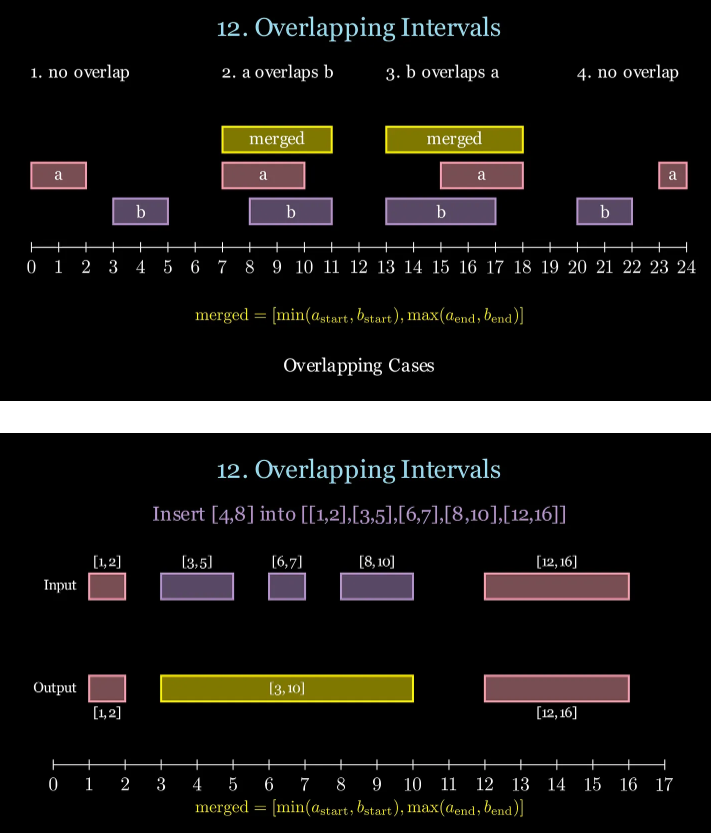

Когда его использовать?
Объединение или консолидация диапазонов

Планирование или поиск конфликтов (например, конференц-залов)

Поиск пробелов или пропущенных интервалов

Техника
Знание того, как объединить перекрывающиеся интервалы, имеет решающее значение для решения этих проблем.

Как правило, вы захотите отсортировать входные данные по времени начала, чтобы гарантировать порядок и всегда иметь «a» перед «b», что упрощает сравнение временных диапазонов в хронологическом порядке. В приведенном выше примере мы вставляем [4,8] в массив, но в конечном итоге он объединяется с [3,5], [6,7] и [8,10] в [3,10].

In [ ]:
"""
Универсальный шаблон для задач с интервалами
"""
def process_intervals(intervals):
    # Сортируем интервалы по началу (стандартный шаг предобработки)
    intervals.sort(key=lambda x: x[0])

    # Пример: объединение интервалов (измените под конкретную задачу)
    result = []
    for interval in intervals:
        # Если результат пуст или нет перекрытия с последним интервалом
        if not result or result[-1][1] < interval[0]:
            result.append(interval)  # Добавляем интервал как есть
        else:
            # Объединяем пересекающиеся интервалы
            result[-1][1] = max(result[-1][1], interval[1])

    return result


intervals =[[3,5], [1,2], [4,8], [12,16],[6,7], [8,10]]
print(process_intervals(intervals))

[[1, 2], [3, 10], [12, 16]]


In [ ]:
intervals =[[3,5], [1,2], [4,8], [12,16],[6,7], [8,10]]
intervals.sort(key=lambda x: x[0])
print(intervals)

[[1, 2], [3, 5], [4, 8], [6, 7], [8, 10], [12, 16]]


In [ ]:
def merge_intervals(intervals):
    if not intervals:
        return []

    # Сортируем интервалы по началу
    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]

    for current in intervals[1:]:
        last = merged[-1]
        # Если текущий интервал перекрывается с последним объединенным
        if current[0] <= last[1]:
            # Расширяем объединенный интервал
            merged[-1] = [last[0], max(last[1], current[1])]
        else:
            merged.append(current)

    return merged

intervals =[[3,5], [1,2], [4,8], [12,16],[6,7], [8,10]]
print(merge_intervals(intervals))

[[1, 2], [3, 10], [12, 16]]


**Объединение перекрывающихся интервалов**

Задача: Дан список интервалов. Объединить все пересекающиеся интервалы.

**Алгоритм:**

Отсортировать интервалы по началу.

Итерироваться по интервалам, сравнивая текущий с последним объединенным.

In [ ]:
def merge_intervals(intervals):
    if not intervals:
        return []

    # Сортируем интервалы по началу
    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]

    for current in intervals[1:]:
        last = merged[-1]
        # Если текущий интервал перекрывается с последним объединенным
        if current[0] <= last[1]:
            # Расширяем объединенный интервал
            merged[-1] = [last[0], max(last[1], current[1])]
        else:
            merged.append(current)

    return merged

# Пример
intervals = [[1, 3], [2, 6], [8, 10], [15, 18]]
print(merge_intervals(intervals))  # [[1, 6], [8, 10], [15, 18]]

[[1, 6], [8, 10], [15, 18]]


**Поиск пересечений интервалов**

Задача: Найти все пересечения между двумя списками интервалов.

**Алгоритм:**

Использовать два указателя для итерации по обоим спискам.

Сравнивать текущие интервалы и двигать указатель с меньшим концом.

In [ ]:
def interval_intersection(A, B):
    i = j = 0
    result = []

    while i < len(A) and j < len(B):
        a_start, a_end = A[i]
        b_start, b_end = B[j]

        # Проверка на пересечение
        if a_start <= b_end and b_start <= a_end:
            # Находим пересечение
            start = max(a_start, b_start)
            end = min(a_end, b_end)
            result.append([start, end])

        # Двигаем указатель с меньшим концом
        if a_end < b_end:
            i += 1
        else:
            j += 1

    return result

# Пример
A = [[1, 3], [5, 9]]
B = [[2, 5], [7, 10]]
print(interval_intersection(A, B))  # [[2, 3], [7, 9]]

**Проверка на перекрытие**

Задача: Проверить, есть ли в списке интервалов хотя бы одно пересечение.

In [ ]:
def has_overlap(intervals):
    intervals.sort(key=lambda x: x[0])
    for i in range(1, len(intervals)):
        prev_end = intervals[i-1][1]
        current_start = intervals[i][0]
        if current_start < prev_end:
            return True
    return False

# Пример
intervals = [[1, 2], [3, 4], [2, 5]]
print(has_overlap(intervals))  # True (пересечение [3,4] и [2,5])

**Суммарная длина всех интервалов (с учетом перекрытий)**

Задача: Найти общую длину, покрытую интервалами, исключая перекрытия.

In [ ]:
def total_coverage(intervals):
    if not intervals:
        return 0
    merged = merge_intervals(intervals)
    return sum(end - start for start, end in merged)

# Пример
intervals = [[1, 4], [2, 5], [7, 10]]
print(total_coverage(intervals))  # (4-1) + (10-7) = 3 + 3 = 6

## Монотонный стек

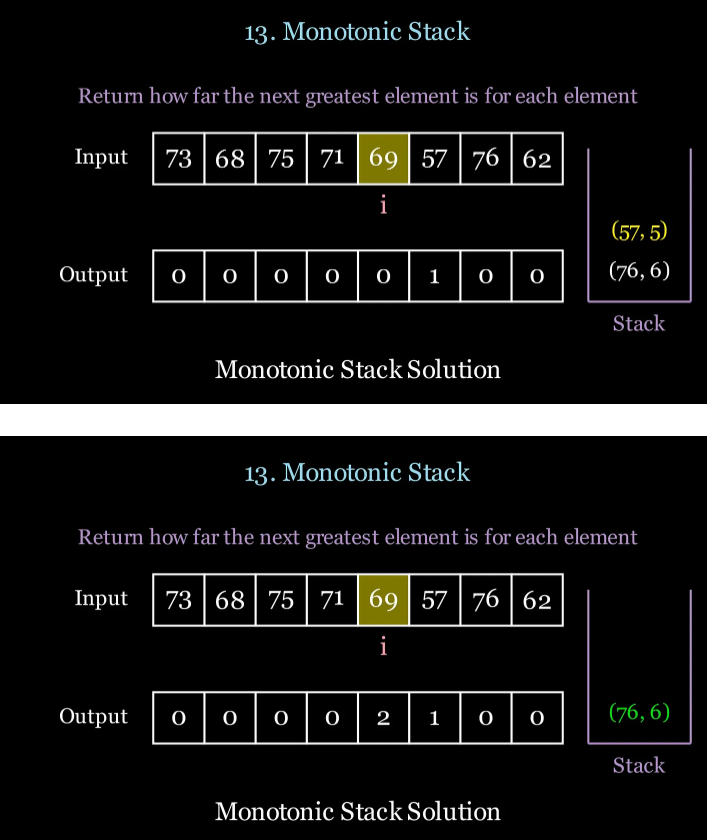

Когда его использовать:

- Поиск следующего большего или меньшего элемента

- Поиск левых/правых граничных точек на гистограммах или прямоугольниках

- Обслуживание элементов с целью оптимизации операций

**Техника**

Если вы хотите найти следующий больше/меньший элемент для всех элементов в массиве, метод перебора займет **O(N^2)**. Тем не менее, с помощью монотонного стека (в порядке возрастания или убывания, в зависимости от задачи) мы можем достичь времени **O(N)**, сохраняя и отслеживая самые большие/самые маленькие элементы вплоть до текущей итерации. В приведенном выше примере обратите внимание, что мы вытащили 57 из стека, потому что 69 больше 57. Однако 76 больше 69, поэтому это допустимое решение, и мы обновляем вывод.

In [ ]:
"""
Шаблон монотонно возрастающего стека.
Находит для каждого элемента ближайший меньший элемент слева (Previous Smaller Element)
"""
def previous_smaller_elements(arr):
    stack = []
    result = [-1] * len(arr)  # -1 означает, что меньшего элемента нет

    for i, num in enumerate(arr):
        # Удаляем из стека элементы, которые >= текущего
        while stack and stack[-1][0] >= num:
            stack.pop()

        # После удаления на вершине стека будет ближайший меньший элемент
        if stack:
            result[i] = stack[-1][0]  # или stack[-1][1] для индекса

        # Добавляем текущее значение и индекс в стек
        stack.append((num, i))

    return result


"""
Шаблон монотонно убывающего стека.
Находит для каждого элемента ближайший больший элемент слева (Previous Greater Element)
"""
def previous_greater_elements(arr):
    stack = []
    result = [-1] * len(arr)

    for i, num in enumerate(arr):
        # Удаляем из стека элементы, которые <= текущего
        while stack and stack[-1][0] <= num:
            stack.pop()

        if stack:
            result[i] = stack[-1][0]  # или stack[-1][1] для индекса

        stack.append((num, i))

    return result


# Пример использования
arr = [73, 68, 75, 71, 69, 57, 76, 62]

print("Массив:", arr)
print("Ближайшие меньшие слева:", previous_smaller_elements(arr))
print("Ближайшие большие слева:", previous_greater_elements(arr))

Массив: [73, 68, 75, 71, 69, 57, 76, 62]
Ближайшие меньшие слева: [-1, -1, 68, 68, 68, -1, 57, 57]
Ближайшие большие слева: [-1, 73, -1, 75, 71, 69, -1, 76]




**Вывод:**
```
Массив: [73, 68, 75, 71, 69, 57, 76, 62]
Ближайшие меньшие слева: [-1, -1, 68, 68, 68, -1, 57, 57]
Ближайшие большие слева: [-1, 73, -1, 75, 71, 69, -1, 76]
```

**Объяснение для массива `arr`:**
- **Ближайшие меньшие слева:**
  - Для 73: нет меньшего → -1
  - Для 68: нет меньшего (73 > 68, но не меньше) → -1
  - Для 75: 68 меньше 75 → 68
  - Для 71: 68 меньше 71 → 68
  - Для 69: 68 меньше 69 → 68
  - Для 57: нет меньшего → -1
  - Для 76: 57 меньше 76 → 57
  - Для 62: 57 меньше 62 → 57

- **Ближайшие большие слева:**
  - Для 73: нет большего → -1
  - Для 68: 73 больше 68 → 73
  - Для 75: нет большего → -1
  - Для 71: 75 больше 71 → 75
  - Для 69: 71 больше 69 → 71
  - Для 57: 69 больше 57 → 69
  - Для 76: нет большего → -1
  - Для 62: 76 больше 62 → 76

**Ключевые исправления:**
1. Добавлена логика возврата результата
2. Исправлены условия в циклах `while` (добавлены `=` для строгой монотонности)
3. Добавлена структура для хранения результата
4. Приведен конкретный пример использования с комментариями

## Топ К Элементов

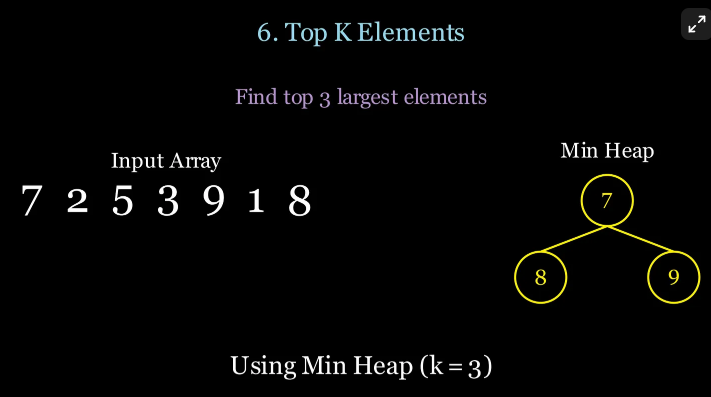

Когда его использовать:

- Найдите верхние **k** самых маленьких или самых больших элементов

- Найти **k-й** наименьший или самый большой элемент

- Найдите **k** наиболее часто встречающихся элементов

**Техника**

Вы всегда можете отсортировать массив, а затем взять первый или последний **k элементов**, однако временная сложность будет **O(NLogN)**. Куча может выталкивать и выталкивать элементы в **O(Log(K))**, где **K — размер кучи**. Таким образом, вместо сортировки мы можем использовать кучу для хранения наименьших или самых больших значений **K**, и для каждого элемента массива проверять, следует ли вытащить/отправить в кучу, что приведет к временной сложности **O(NLogK)**.

In [ ]:
import heapq

"""
Шаблон для поиска K наибольших элементов (Top K Largest)
"""
def top_k_largest_elements(arr, k):
    if k <= 0 or not arr:
        return []

    # Используем минимальную кучу для хранения K наибольших элементов
    min_heap = []

    for num in arr:
        if len(min_heap) < k:
            heapq.heappush(min_heap, num)
        elif num > min_heap[0]:  # Текущий элемент больше наименьшего в куче
            heapq.heappushpop(min_heap, num)

    # Возвращаем отсортированные по убыванию
    return sorted(min_heap, reverse=True)

"""
Шаблон для поиска K наименьших элементов (Top K Smallest)
"""
def top_k_smallest_elements(arr, k):
    if k <= 0 or not arr:
        return []

    # Используем максимальную кучу (инвертируем значения)
    max_heap = []

    for num in arr:
        if len(max_heap) < k:
            heapq.heappush(max_heap, -num)  # Инвертируем для имитации max-heap
        elif num < -max_heap[0]:  # Текущий элемент меньше наибольшего в куче
            heapq.heappushpop(max_heap, -num)

    # Возвращаем исходные значения в порядке возрастания
    return sorted([-x for x in max_heap])

# Пример использования из изображения
arr = [7, 2, 5, 3, 9, 1, 8]
k = 3

print(f"Массив: {arr}")
print(f"Top {k} наибольших: {top_k_largest_elements(arr, k)}")
print(f"Top {k} наименьших: {top_k_smallest_elements(arr, k)}")

# Визуализация процесса для Top K Largest
print("\nПошаговый процесс для Top 3 наибольших:")
print("Метод: Поддерживаем минимальную кучу размера 3")
print(f"Исходный массив: {arr}")

min_heap = []
for i, num in enumerate(arr):
    print(f"\nШаг {i+1}: элемент {num}")

    if len(min_heap) < k:
        heapq.heappush(min_heap, num)
        print(f"  Куча < {k}, добавляем: {num}")
    elif num > min_heap[0]:
        removed = heapq.heappushpop(min_heap, num)
        print(f"  {num} > {min_heap[0]}, заменяем {removed} на {num}")
    else:
        print(f"  {num} ≤ {min_heap[0]}, игнорируем")

    print(f"  Текущая куча: {min_heap}")

print(f"\nИтог: Top {k} наибольших = {sorted(min_heap, reverse=True)}")

Массив: [7, 2, 5, 3, 9, 1, 8]
Top 3 наибольших: [9, 8, 7]
Top 3 наименьших: [1, 2, 3]

Пошаговый процесс для Top 3 наибольших:
Метод: Поддерживаем минимальную кучу размера 3
Исходный массив: [7, 2, 5, 3, 9, 1, 8]

Шаг 1: элемент 7
  Куча < 3, добавляем: 7
  Текущая куча: [7]

Шаг 2: элемент 2
  Куча < 3, добавляем: 2
  Текущая куча: [2, 7]

Шаг 3: элемент 5
  Куча < 3, добавляем: 5
  Текущая куча: [2, 7, 5]

Шаг 4: элемент 3
  3 > 3, заменяем 2 на 3
  Текущая куча: [3, 7, 5]

Шаг 5: элемент 9
  9 > 5, заменяем 3 на 9
  Текущая куча: [5, 7, 9]

Шаг 6: элемент 1
  1 ≤ 5, игнорируем
  Текущая куча: [5, 7, 9]

Шаг 7: элемент 8
  8 > 7, заменяем 5 на 8
  Текущая куча: [7, 8, 9]

Итог: Top 3 наибольших = [9, 8, 7]


In [ ]:
arr = [7, 2, 5, 3, 9, 1, 8]
k = 3

# Встроенные функции heapq (оптимизированы)
top_k_largest = heapq.nlargest(k, arr)
top_k_smallest = heapq.nsmallest(k, arr)

print(f"Встроенные функции heapq:")
print(f"nlargest({k}): {top_k_largest}")
print(f"nsmallest({k}): {top_k_smallest}")

Встроенные функции heapq:
nlargest(3): [9, 8, 7]
nsmallest(3): [1, 2, 3]


## Связанный список

это структура данных, состоящая из последовательности элементов, называемых узлами (nodes). Каждый узел хранит два типа информации:

1. Данные (значение: число, строка, объект и т.д.).

2. Ссылку (указатель) на следующий узел в списке (а в двусвязном списке — ещё и на предыдущий).

Элементы списка не хранятся в непрерывной области памяти (как в массиве), а связываются между собой через эти указатели. Это позволяет эффективно вставлять и удалять элементы без перераспределения памяти.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data  # Данные узла
        self.next = None  # Ссылка на следующий узел

# Создание списка: 1 -> 2 -> 3
head = Node(1)
second = Node(2)
third = Node(3)

head.next = second  # Связываем первый узел со вторым
second.next = third # Связываем второй узел с третьим

**Обнаружение цикла в связном списке**

Если в списке есть цикл, быстрый и медленный указатели рано или поздно встретятся.

**Паттерн «Медленный и быстрый указатель» (Slow-Fast Pointers)**

Этот паттерн использует два указателя, которые перемещаются по структуре данных (чаще всего связному списку или массиву) с разной скоростью. Обычно:

Медленный указатель двигается на 1 шаг за итерацию.

Быстрый указатель двигается на 2 шага за итерацию.

**Основные применения:**

- Обнаружение цикла в связном списке.
- Нахождение середины списка.
- Поиск точки входа в цикл.
- Проверка на палиндром в связном списке.

In [ ]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def has_cycle(head: ListNode) -> bool:
    if not head or not head.next:
        return False

    slow = head      # Медленный указатель (1 шаг)
    fast = head.next # Быстрый указатель (2 шага)

    while fast and fast.next:
        if slow == fast:
            return True
        slow = slow.next
        fast = fast.next.next
    return False


# Тест 1: Пустой список
print("Тест 1: Пустой список")
head1 = None
print(f"Ожидаемый результат: False, Фактический результат: {has_cycle(head1)}")
print("-" * 50)

# Тест 2: Список без цикла
print("Тест 2: Список без цикла (1 -> 2 -> 3 -> 4 -> None)")
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node1.next = node2
node2.next = node3
node3.next = node4
print(f"Ожидаемый результат: False, Фактический результат: {has_cycle(node1)}")
print("-" * 50)

# Тест 3: Список с циклом в конце (1 -> 2 -> 3 -> 4 -> 2...)
print("Тест 3: Список с циклом (1 -> 2 -> 3 -> 4 -> 2...)")
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node2  # Создаем цикл, указывая на node2
print(f"Ожидаемый результат: True, Фактический результат: {has_cycle(node1)}")
print("-" * 50)

# Тест 4: Список с циклом в самом начале (1 -> 1...)
print("Тест 4: Список с циклом в самом начале (1 -> 1...)")
node1 = ListNode(1)
node1.next = node1  # Создаем цикл, указывая на самого себя
print(f"Ожидаемый результат: True, Фактический результат: {has_cycle(node1)}")
print("-" * 50)

# Тест 5: Список с циклом в середине (1 -> 2 -> 3 -> 2...)
print("Тест 5: Список с циклом в середине (1 -> 2 -> 3 -> 2...)")
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node1.next = node2
node2.next = node3
node3.next = node2  # Создаем цикл, указывая на node2
print(f"Ожидаемый результат: True, Фактический результат: {has_cycle(node1)}")
print("-" * 50)

# Тест 6: Список с одним узлом без цикла
print("Тест 6: Список с одним узлом без цикла (1 -> None)")
node1 = ListNode(1)
print(f"Ожидаемый результат: False, Фактический результат: {has_cycle(node1)}")
print("-" * 50)

Тест 1: Пустой список
Ожидаемый результат: False, Фактический результат: False
--------------------------------------------------
Тест 2: Список без цикла (1 -> 2 -> 3 -> 4 -> None)
Ожидаемый результат: False, Фактический результат: False
--------------------------------------------------
Тест 3: Список с циклом (1 -> 2 -> 3 -> 4 -> 2...)
Ожидаемый результат: True, Фактический результат: True
--------------------------------------------------
Тест 4: Список с циклом в самом начале (1 -> 1...)
Ожидаемый результат: True, Фактический результат: True
--------------------------------------------------
Тест 5: Список с циклом в середине (1 -> 2 -> 3 -> 2...)
Ожидаемый результат: True, Фактический результат: True
--------------------------------------------------
Тест 6: Список с одним узлом без цикла (1 -> None)
Ожидаемый результат: False, Фактический результат: False
--------------------------------------------------


**Нахождение середины списка**

Медленный указатель достигает середины, когда быстрый доходит до конца.

In [ ]:
class ListNode:
    def __init__(self, data):
        self.data = data
        self.next = None

def find_middle(head: ListNode) -> ListNode:
    """
    Находит средний узел связного списка.
    Использует алгоритм быстрого и медленного указателя.
    """
    if not head:
        return None

    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next       # 1 шаг
        fast = fast.next.next  # 2 шага

    return slow

# Пример использования find_middle
print("=== Поиск середины списка ===")

# Создаем список: 1 → 2 → 3 → 4 → 5
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Находим середину
middle = find_middle(head)
print(f"Список: 1 → 2 → 3 → 4 → 5")
print(f"Середина: узел со значением {middle.data}")

# Пример с четным количеством элементов
print("\n=== Пример с четным количеством ===")
head2 = ListNode(1)
head2.next = ListNode(2)
head2.next.next = ListNode(3)
head2.next.next.next = ListNode(4)
head2.next.next.next.next = ListNode(5)
head2.next.next.next.next.next = ListNode(6)

middle2 = find_middle(head2)
print(f"Список: 1 → 2 → 3 → 4 → 5 → 6")
print(f"Середина (первый из двух средних): {middle2.data}")

# Для чётного числа элементов возвращает второй из двух средних узлов (например, для списка 1->2->3->4 вернёт 3).
# Если нужен первый средний узел, можно добавить проверку на чётность.


=== Поиск середины списка ===
Список: 1 → 2 → 3 → 4 → 5
Середина: узел со значением 3

=== Пример с четным количеством ===
Список: 1 → 2 → 3 → 4 → 5 → 6
Середина (первый из двух средних): 4


**Поиск точки входа в цикл**

После обнаружения цикла, точка входа находится сбросом одного из указателей.

In [ ]:
class ListNode:
    def __init__(self, data):
        self.data = data
        self.next = None

def detect_cycle_start(head: ListNode) -> ListNode:
    """
    Обнаруживает цикл в связном списке и возвращает узел начала цикла.
    Алгоритм Флойда (Floyd's Cycle Detection).
    """
    if not head or not head.next:
        return None

    slow = head
    fast = head
    has_cycle = False

    # Шаг 1: Обнаружение цикла
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            has_cycle = True
            break

    if not has_cycle:
        return None

    # Шаг 2: Поиск точки входа в цикл
    slow = head  # Сбрасываем slow в начало
    while slow != fast:
        slow = slow.next
        fast = fast.next

    return slow

# Пример использования detect_cycle_start
print("\n=== Обнаружение цикла в списке ===")

# Создаем список с циклом: 1 → 2 → 3 → 4 → 5 → 3 (цикл)
node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
node5.next = node3  # Создаем цикл: 5 → 3

cycle_start = detect_cycle_start(node1)
if cycle_start:
    print(f"Список с циклом: 1 → 2 → 3 → 4 → 5 → 3 (цикл)")
    print(f"Начало цикла: узел со значением {cycle_start.data}")
else:
    print("Цикл не обнаружен")

# Пример без цикла
print("\n=== Пример без цикла ===")
head_no_cycle = ListNode(1)
head_no_cycle.next = ListNode(2)
head_no_cycle.next.next = ListNode(3)

result = detect_cycle_start(head_no_cycle)
print(f"Список без цикла: 1 → 2 → 3")
print(f"Результат: {result}")

# После обнаружения цикла, slow сбрасывается в начало. Теперь оба указателя двигаются на 1 шаг. Их встреча — точка входа.
# Доказательство: Расстояние от начала до точки входа = расстоянию от места встречи до точки входа при движении по циклу.


=== Обнаружение цикла в списке ===
Список с циклом: 1 → 2 → 3 → 4 → 5 → 3 (цикл)
Начало цикла: узел со значением 3

=== Пример без цикла ===
Список без цикла: 1 → 2 → 3
Результат: None


**Проверка на палиндром для связного списка**

С помощью медленного и быстрого указателей находим середину, разворачиваем вторую половину и сравниваем.

In [ ]:
class ListNode:
    def __init__(self, data):
        self.data = data
        self.next = None

def is_palindrome(head: ListNode) -> bool:
    """
    Проверяет, является ли связный список палиндромом.
    """
    if not head or not head.next:
        return True

    # Находим середину списка
    slow = head
    fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    # Разворачиваем вторую половину
    prev = None
    current = slow
    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node

    # Сравниваем первую и развёрнутую вторую половины
    left = head
    right = prev
    while right:
        if left.data != right.data:
            return False
        left = left.next
        right = right.next

    return True

# Пример использования is_palindrome
print("\n=== Проверка на палиндром ===")

# Палиндром: 1 → 2 → 3 → 2 → 1
palindrome_head = ListNode(1)
palindrome_head.next = ListNode(2)
palindrome_head.next.next = ListNode(3)
palindrome_head.next.next.next = ListNode(2)
palindrome_head.next.next.next.next = ListNode(1)

print(f"Список: 1 → 2 → 3 → 2 → 1")
print(f"Является палиндромом: {is_palindrome(palindrome_head)}")

# Не палиндром: 1 → 2 → 3 → 4 → 5
not_palindrome = ListNode(1)
not_palindrome.next = ListNode(2)
not_palindrome.next.next = ListNode(3)
not_palindrome.next.next.next = ListNode(4)
not_palindrome.next.next.next.next = ListNode(5)

print(f"\nСписок: 1 → 2 → 3 → 4 → 5")
print(f"Является палиндромом: {is_palindrome(not_palindrome)}")

# Палиндром четной длины: 1 → 2 → 2 → 1
palindrome_even = ListNode(1)
palindrome_even.next = ListNode(2)
palindrome_even.next.next = ListNode(2)
palindrome_even.next.next.next = ListNode(1)

print(f"\nСписок четной длины: 1 → 2 → 2 → 1")
print(f"Является палиндромом: {is_palindrome(palindrome_even)}")

# Одиночный элемент всегда палиндром
single = ListNode(42)
print(f"\nОдиночный элемент: 42")
print(f"Является палиндромом: {is_palindrome(single)}")

# После разворота второй половины, prev становится началом развёрнутой части.
# Сравнение идёт только до конца right, так как для нечётной длины средний элемент можно игнорировать.


=== Проверка на палиндром ===
Список: 1 → 2 → 3 → 2 → 1
Является палиндромом: True

Список: 1 → 2 → 3 → 4 → 5
Является палиндромом: False

Список четной длины: 1 → 2 → 2 → 1
Является палиндромом: True

Одиночный элемент: 42
Является палиндромом: True


Советы и подводные камни
- Проверка на null: Всегда проверяйте fast и fast.next в цикле, чтобы избежать ошибок.
- Инициализация указателей: В некоторых задачах fast начинают с head.next, чтобы избежать ложных срабатываний.
- Восстановление структуры: Если вы меняете список (например, разворачиваете его часть), восстановите его исходное состояние, если это требуется.

Вспомогательная функция для создания списков

```python
class ListNode:
    def __init__(self, data):
        self.data = data
        self.next = None

def create_list(values):
    """Создает связный список из списка значений."""
    if not values:
        return None
    
    head = ListNode(values[0])
    current = head
    
    for val in values[1:]:
        current.next = ListNode(val)
        current = current.next
    
    return head

def print_list(head):
    """Печатает связный список."""
    result = []
    current = head
    while current:
        result.append(str(current.data))
        current = current.next
    
    print(" → ".join(result) if result else "Пустой список")

# Пример использования вспомогательных функций
print("\n=== Использование вспомогательных функций ===")

list1 = create_list([1, 2, 3, 4, 5])
print("Создан список:", end=" ")
print_list(list1)

list2 = create_list([10, 20, 30, 20, 10])
print("Создан список:", end=" ")
print_list(list2)
```



## Изменение связанного списка на месте (in-place modification)

Это подход, при котором структура списка модифицируется без создания новых узлов. Вместо этого перенастраиваются ссылки (next и/или prev) существующих узлов. Это позволяет экономить память и часто используется в задачах, где требуется высокая производительность.

**Где используется:**
- Разворот списка
- Удаление элементов
- Сортировка (например, сортировка слиянием)
- Объединение или разделение списков

**Разворот списка**

Задача: Изменить порядок элементов на противоположный.

Почему на месте? Создание нового списка потребует O(n) дополнительной памяти. Изменение на месте выполняется за O(1) дополнительной памяти.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def reverse_list(head):
    """
    Итеративно разворачивает связный список.
    """
    prev = None
    current = head

    while current:
        next_node = current.next  # Сохраняем следующий узел
        current.next = prev       # Разворачиваем ссылку
        prev = current            # Перемещаем prev на текущий узел
        current = next_node       # Перемещаем current на следующий узел

    return prev  # Новая голова списка

# Пример использования
print("=== Разворот списка (итеративно) ===")
# Создаем список: 1 → 2 → 3 → 4 → 5
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(5)

print("Исходный список: 1 → 2 → 3 → 4 → 5")
reversed_head = reverse_list(head)
print("Развернутый список: 5 → 4 → 3 → 2 → 1 (после разворота)")

=== Разворот списка (итеративно) ===
Исходный список: 1 → 2 → 3 → 4 → 5
Развернутый список: 5 → 4 → 3 → 2 → 1 (после разворота)


In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def reverse_list_recursive(head):
    """
    Рекурсивно разворачивает связный список.
    """
    if not head or not head.next:
        return head

    # Рекурсивно разворачиваем остальную часть
    new_head = reverse_list_recursive(head.next)

    # Делаем так, чтобы следующий узел указывал на текущий
    head.next.next = head
    head.next = None

    return new_head

# Пример использования
print("\n=== Разворот списка (рекурсивно) ===")
head2 = Node(1)
head2.next = Node(2)
head2.next.next = Node(3)
head2.next.next.next = Node(4)

print("Исходный список: 1 → 2 → 3 → 4")
reversed_head2 = reverse_list_recursive(head2)
print("Развернутый список: 4 → 3 → 2 → 1")


=== Разворот списка (рекурсивно) ===
Исходный список: 1 → 2 → 3 → 4
Развернутый список: 4 → 3 → 2 → 1


**Удаление элементов**

Задача: Удалить узлы, удовлетворяющие условию (например, все чётные числа).

Почему на месте? Не нужно создавать новый список — достаточно переставить указатели.

In [ ]:
# Удаление всех узлов с чётными значениями

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def remove_even_nodes(head):
    """
    Удаляет все узлы с четными значениями.
    """
    dummy = Node(-1)  # Фиктивный узел для упрощения логики
    dummy.next = head
    current = dummy

    while current.next:
        if current.next.data % 2 == 0:
            current.next = current.next.next  # Пропускаем чётный узел
        else:
            current = current.next

    return dummy.next

# Пример использования
print("\n=== Удаление четных узлов ===")
# Создаем список: 1 → 2 → 3 → 4 → 5 → 6
head3 = Node(1)
head3.next = Node(2)
head3.next.next = Node(3)
head3.next.next.next = Node(4)
head3.next.next.next.next = Node(5)
head3.next.next.next.next.next = Node(6)

print("Исходный список: 1 → 2 → 3 → 4 → 5 → 6")
result3 = remove_even_nodes(head3)
print("После удаления четных: 1 → 3 → 5")


=== Удаление четных узлов ===
Исходный список: 1 → 2 → 3 → 4 → 5 → 6
После удаления четных: 1 → 3 → 5


In [ ]:
# Удаление дубликатов из отсортированного списка
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def remove_duplicates_sorted(head):
    """
    Удаляет дубликаты из отсортированного связного списка.
    """
    if not head:
        return None

    current = head
    while current and current.next:
        if current.data == current.next.data:
            current.next = current.next.next
        else:
            current = current.next

    return head

# Пример использования
print("\n=== Удаление дубликатов из отсортированного списка ===")
# Создаем список: 1 → 1 → 2 → 3 → 3 → 3 → 4 → 5 → 5
head10 = Node(1)
head10.next = Node(1)
head10.next.next = Node(2)
head10.next.next.next = Node(3)
head10.next.next.next.next = Node(3)
head10.next.next.next.next.next = Node(3)
head10.next.next.next.next.next.next = Node(4)
head10.next.next.next.next.next.next.next = Node(5)
head10.next.next.next.next.next.next.next.next = Node(5)

print("Список с дубликатами: 1 → 1 → 2 → 3 → 3 → 3 → 4 → 5 → 5")
result10 = remove_duplicates_sorted(head10)
print("После удаления дубликатов: 1 → 2 → 3 → 4 → 5")


=== Удаление дубликатов из отсортированного списка ===
Список с дубликатами: 1 → 1 → 2 → 3 → 3 → 3 → 4 → 5 → 5
После удаления дубликатов: 1 → 2 → 3 → 4 → 5


In [ ]:
# Удаление N-го узла с конца

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def remove_nth_from_end(head, n):
    """
    Удаляет N-й узел с конца списка.
    Использует два указателя.
    """
    dummy = Node(-1)
    dummy.next = head
    first = dummy
    second = dummy

    # Перемещаем первый указатель на n+1 узел вперед
    for _ in range(n + 1):
        if not first:
            return head  # Список короче n
        first = first.next

    # Двигаем оба указателя до конца
    while first:
        first = first.next
        second = second.next

    # Удаляем N-й узел с конца
    second.next = second.next.next

    return dummy.next

# Пример использования
print("\n=== Удаление N-го узла с конца ===")
# Создаем список: 1 → 2 → 3 → 4 → 5
head6 = Node(1)
head6.next = Node(2)
head6.next.next = Node(3)
head6.next.next.next = Node(4)
head6.next.next.next.next = Node(5)

print("Исходный список: 1 → 2 → 3 → 4 → 5")
print("Удаляем 2-й узел с конца (значение 4)")
result6 = remove_nth_from_end(head6, 2)
print("После удаления: 1 → 2 → 3 → 5")


=== Удаление N-го узла с конца ===
Исходный список: 1 → 2 → 3 → 4 → 5
Удаляем 2-й узел с конца (значение 4)
После удаления: 1 → 2 → 3 → 5


**Сортировка слиянием**

Задача: Отсортировать список за O(n log n) времени и O(1) памяти.

Почему на месте? Классическая реализация сортировки слиянием для списков не требует дополнительной памяти для новых узлов — меняются только ссылки.

In [ ]:
# Cлияние двух отсортированных списков
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def merge_sorted_lists(l1, l2):
    """
    Объединяет два отсортированных связных списка в один отсортированный.
    """
    dummy = Node(-1)
    tail = dummy

    while l1 and l2:
        if l1.data < l2.data:
            tail.next = l1
            l1 = l1.next
        else:
            tail.next = l2
            l2 = l2.next
        tail = tail.next

    tail.next = l1 or l2  # Добавляем оставшиеся узлы
    return dummy.next

# Пример использования
print("\n=== Слияние двух отсортированных списков ===")
# Список 1: 1 → 3 → 5
list1 = Node(1)
list1.next = Node(3)
list1.next.next = Node(5)

# Список 2: 2 → 4 → 6
list2 = Node(2)
list2.next = Node(4)
list2.next.next = Node(6)

print("Список 1: 1 → 3 → 5")
print("Список 2: 2 → 4 → 6")
merged = merge_sorted_lists(list1, list2)
print("Объединенный список: 1 → 2 → 3 → 4 → 5 → 6")


=== Слияние двух отсортированных списков ===
Список 1: 1 → 3 → 5
Список 2: 2 → 4 → 6
Объединенный список: 1 → 2 → 3 → 4 → 5 → 6


**Объединение или разделение списков**

Задача: Разделить список на две части или объединить два списка.

Почему на месте? Операции выполняются за O(1) памяти, если не считать входных данных.

In [ ]:
# Разделение списка на чётные и нечётные элементы
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def split_list(head):
    """
    Разделяет список на два: четные и нечетные элементы.
    Сохраняет исходный порядок элементов.
    """
    even_dummy = Node(-1)  # Фиктивный узел для четных
    odd_dummy = Node(-1)   # Фиктивный узел для нечетных
    even_tail = even_dummy
    odd_tail = odd_dummy
    current = head

    while current:
        if current.data % 2 == 0:
            even_tail.next = current
            even_tail = even_tail.next
        else:
            odd_tail.next = current
            odd_tail = odd_tail.next
        current = current.next

    even_tail.next = None  # Завершаем списки
    odd_tail.next = None

    return even_dummy.next, odd_dummy.next

# Пример использования
print("\n=== Разделение на четные и нечетные ===")
# Создаем список: 1 → 2 → 3 → 4 → 5 → 6 → 7 → 8
head5 = Node(1)
head5.next = Node(2)
head5.next.next = Node(3)
head5.next.next.next = Node(4)
head5.next.next.next.next = Node(5)
head5.next.next.next.next.next = Node(6)
head5.next.next.next.next.next.next = Node(7)
head5.next.next.next.next.next.next.next = Node(8)

print("Исходный список: 1 → 2 → 3 → 4 → 5 → 6 → 7 → 8")
even_list, odd_list = split_list(head5)
print("Четные элементы: 2 → 4 → 6 → 8")
print("Нечетные элементы: 1 → 3 → 5 → 7")


=== Разделение на четные и нечетные ===
Исходный список: 1 → 2 → 3 → 4 → 5 → 6 → 7 → 8
Четные элементы: 2 → 4 → 6 → 8
Нечетные элементы: 1 → 3 → 5 → 7


In [ ]:
#  Получение K-го узла с конца
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def get_kth_from_end(head, k):
    """
    Находит K-й узел с конца списка.
    """
    if k <= 0:
        return None

    fast = head
    slow = head

    # Двигаем быстрый указатель на k узлов вперед
    for _ in range(k):
        if not fast:
            return None
        fast = fast.next

    # Двигаем оба указателя
    while fast:
        fast = fast.next
        slow = slow.next

    return slow

# Пример использования
print("\n=== Получение K-го узла с конца ===")
# Создаем список: 1 → 2 → 3 → 4 → 5 → 6 → 7
head11 = Node(1)
head11.next = Node(2)
head11.next.next = Node(3)
head11.next.next.next = Node(4)
head11.next.next.next.next = Node(5)
head11.next.next.next.next.next = Node(6)
head11.next.next.next.next.next.next = Node(7)

print("Список: 1 → 2 → 3 → 4 → 5 → 6 → 7")
k = 3
kth_node = get_kth_from_end(head11, k)
print(f"{k}-й узел с конца: {kth_node.data if kth_node else 'Нет такого узла'}")


=== Получение K-го узла с конца ===
Список: 1 → 2 → 3 → 4 → 5 → 6 → 7
3-й узел с конца: 5


In [ ]:
# Поворот списка на K позиций

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def rotate_list(head, k):
    """
    Поворачивает список на K позиций вправо.
    """
    if not head or not head.next or k == 0:
        return head

    # Находим длину и последний узел
    length = 1
    tail = head
    while tail.next:
        tail = tail.next
        length += 1

    # Нормализуем k
    k = k % length
    if k == 0:
        return head

    # Находим новый хвост
    new_tail = head
    for _ in range(length - k - 1):
        new_tail = new_tail.next

    # Выполняем поворот
    new_head = new_tail.next
    new_tail.next = None
    tail.next = head

    return new_head

# Пример использования
print("\n=== Поворот списка на K позиций ===")
# Создаем список: 1 → 2 → 3 → 4 → 5
head12 = Node(1)
head12.next = Node(2)
head12.next.next = Node(3)
head12.next.next.next = Node(4)
head12.next.next.next.next = Node(5)

print("Исходный список: 1 → 2 → 3 → 4 → 5")
k = 2
rotated = rotate_list(head12, k)
print(f"После поворота на {k} позиции: 4 → 5 → 1 → 2 → 3")


=== Поворот списка на K позиций ===
Исходный список: 1 → 2 → 3 → 4 → 5
После поворота на 2 позиции: 4 → 5 → 1 → 2 → 3


## Backtracking

Это алгоритмическая техника, которая решает задачи методом проб и ошибок: она последовательно строит возможные решения и откатывается (возвращается назад), если текущий путь зашёл в тупик. Это особенно полезно для задач, где нужно найти все возможные решения или оптимальное решение среди множества вариантов.

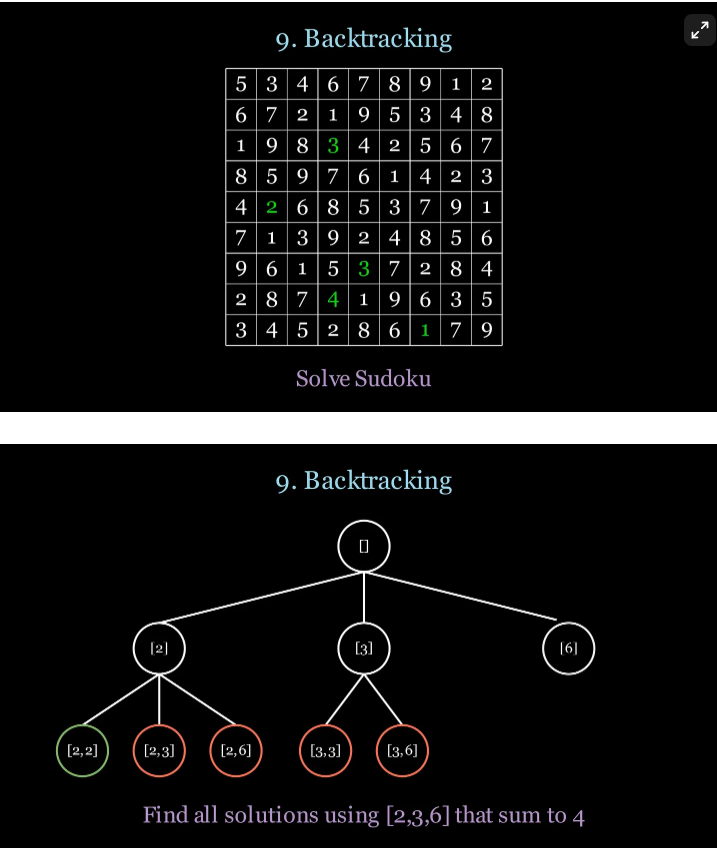

Когда его использовать?
Комбинаторные задачи (комбинации, перестановки, подмножества)

Удовлетворение ограничений (судоку, N-королевы)

Обрезка путей с помощью ограничений для уменьшения пространства поиска

Техника
Возврат тесно связан с DFS, но с акцентом на поиск решений и проверку их правильности. Если решение не работает, вы возвращаетесь к предыдущему рекурсивному состоянию и пробуете другой вариант. Кроме того, при возврате используются ограничения для исключения ветвей, которые не могут привести к правильному решению, что делает поиск более эффективным.

In [ ]:
"""
Универсальный шаблон для алгоритма бэктрекинга (backtracking)
"""
def backtrack(candidates, curPath):
    # Базовый случай: проверяем соответствие решения условиям задачи
    if is_solution(curPath):
        process_solution(curPath)
        return

    for candidate in candidates:
        if is_valid(candidate, curPath):
            # Добавляем текущий кандидат в решение
            curPath.append(candidate)

            # Рекурсивный вызов для дальнейшего исследования
            backtrack(candidates, curPath)

            # Откат последнего выбора (бэктрекинг)
            curPath.pop()

In [ ]:
# =======================================================
# Пример: Нахождение всех комбинаций K элементов из N
# Заданные параметры
# =======================================================

N_SET = [1, 2, 3, 4]
K_SIZE = 3
solutions = [] # Глобальный список для хранения всех найденных решений

# =======================================================
# 1. Реализация функций для задачи "Комбинации"
# =======================================================

def is_solution(curPath):
    """
    Полное решение найдено, если в пути K_SIZE элементов.
    """
    return len(curPath) == K_SIZE

def process_solution(curPath):
    """
    Добавляем найденный путь в список решений.
    """
    global solutions
    solutions.append(list(curPath))

def is_valid(candidate, curPath):
    """
    Проверка на валидность для комбинаций:
    Новый кандидат должен быть больше, чем последний элемент в curPath,
    чтобы избежать дубликатов и перестановок (например, [1, 2, 3] и [2, 1, 3]).
    """
    if not curPath:
        return True
    # Кандидат должен быть строго больше последнего элемента для комбинаций
    return candidate > curPath[-1]

# =======================================================
# 2. Запуск алгоритма
# =======================================================

def find_combinations():
    global solutions
    solutions = [] # Очищаем список решений перед началом

    # Вместо обхода всего N_SET в цикле, мы можем использовать N_SET как candidates
    # и применить модифицированную функцию backtrack, чтобы избежать повторной передачи
    # всей коллекции на каждом шаге.

    # Для простоты используем исходный шаблон:
    backtrack(N_SET, [])
    return solutions

# --- ЗАПУСК ---
result = find_combinations()
print(f"Набор N: {N_SET}, Размер K: {K_SIZE}")
print(f"Все комбинации: {result}")
# Ожидаемый вывод: [[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]

Набор N: [1, 2, 3, 4], Размер K: 3
Все комбинации: [[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]


## Динамическое программирование

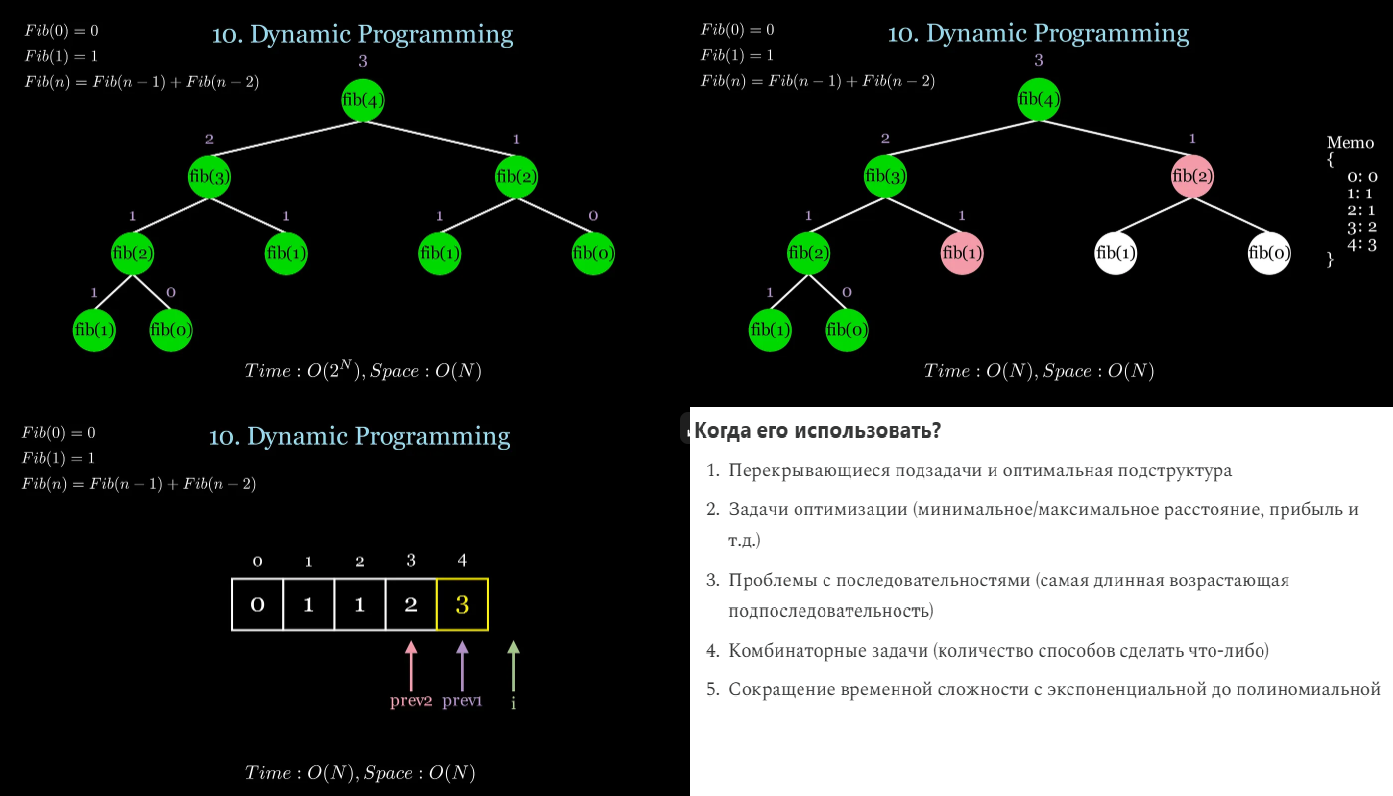

Динамическое программирование используется, когда необходимо решить задачу, которая зависит от предыдущих результатов от подзадач. Вы можете эффективно «кэшировать» эти предыдущие значения результатов при их первом вычислении для повторного использования в дальнейшем. Динамическое программирование имеет 2 основных метода:

Сверху вниз - рекурсия (DFS) с мемоизацией. Мемоизация — это модное слово для хэш-карты, которая может кэшировать ранее вычисленные значения. При нисходящем подходе вы начинаете с глобальной проблемы и рекурсивно разбиваете ее на подпроблемы, чтобы затем решить глобальную проблему.

Снизу вверх - Итеративно выполняется с использованием массива/матрицы для хранения предыдущих значений. При восходящем подходе мы начинаем с базовых случаев, а затем итеративно переходим к глобальному решению.

Во многих случаях предпочтение отдается принципу «снизу вверх», так как вы можете уменьшить сложность пространства, если вам не нужен доступ ко всем подзадачам, и вы можете хранить последние пару результатов подзадач с помощью переменных.

In [ ]:
"""
Итеративный метод Фибоначчи с двумя переменными.
Время: O(N) | Память: O(1)
"""
def fib_bottom_up(n):
    # Обработка базовых случаев n=0 и n=1
    if n == 0:
        return 0
    if n == 1:
        return 1

    # Инициализация: prev2 = Fib(0), prev1 = Fib(1)
    prev2, prev1 = 0, 1

    # Цикл начинается с i=2, так как Fib(0) и Fib(1) уже известны
    for i in range(2, n + 1):
        # 1. Вычисляем текущее число Фибоначчи: Fib(i) = Fib(i-2) + Fib(i-1)
        fib = prev2 + prev1

        # 2. Обновление: prev2 становится старым prev1 (Fib(i-1))
        prev2 = prev1

        # 3. Обновление: prev1 становится новым fib (Fib(i))
        prev1 = fib

    # prev1 содержит результат Fib(n)
    return prev1

# =======================================================
# Пример использования
# =======================================================

n_test = 8
print(f"Fib({n_test}) с помощью fib_bottom_up: {fib_bottom_up(n_test)}") # Ожидается 21
# Последовательность: 0, 1, 1, 2, 3, 5, 8, 13, 21...

n_small = 5
print(f"Fib({n_small}) с помощью fib_bottom_up: {fib_bottom_up(n_small)}") # Ожидается 5

Fib(8) с помощью fib_bottom_up: 21
Fib(5) с помощью fib_bottom_up: 5


In [ ]:
"""
Рекурсивный метод Фибоначчи сверху-вниз без мемоизации.
Время: O(2^N) | Память: O(N)
"""
def fib_top_down(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_top_down(n-1) + fib_top_down(n-2)

"""
Рекурсивный метод Фибоначчи сверху-вниз с мемоизацией.
Время: O(N) | Память: O(N)
"""
def fib_top_down_memo(n, memo={}):
    if n in memo:
        return memo[n]
    if n == 0:
        return 0
    if n == 1:
        return 1
    memo[n] = fib_top_down_memo(n-1, memo) + fib_top_down_memo(n-2, memo)
    return memo[n]

"""
Итеративный метод Фибоначчи снизу-вверх с использованием массива.
Время: O(N) | Память: O(N)
"""
def fib_bottom_up_array(n):
    dp = [0] * (n + 1)
    dp[1] = 1

    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]

    return dp[n]

"""
Итеративный метод Фибоначчи с двумя переменными.
Время: O(N) | Память: O(1)
"""
def fib_bottom_up(n):
    prev2, prev1 = 0, 1

    for i in range(2, n + 1):
        fib = prev2 + prev1
        prev2 = prev1
        prev1 = fib

    return prev1

## Графы

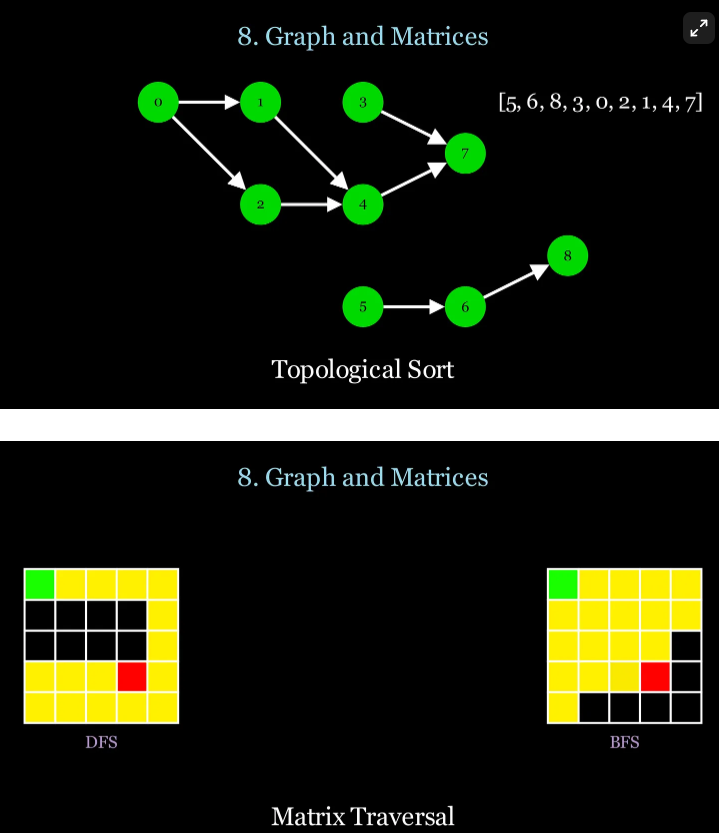


Поиск в графах или матрицах

DFS: Исследуйте все возможные пути (например, лабиринт)

BFS: Найди кратчайший путь

Топологическая сортировка: упорядочивание задач на основе зависимостей

Техника
DFS (Depth-First Search) проходит как можно глубже вдоль каждой ветви, прежде чем вернуться назад, отдавая приоритет посещениям узлов или ячеек рекурсивным или стековым способом. BFS (Wideth-First Search) исследует всех соседей узла или ячейки, прежде чем перейти вглубь, проходя уровень за уровнем с помощью очереди. Для DFS используйте рекурсию с посещенным набором для отслеживания посещенных узлов. Для BFS используйте итерацию с очередью и посещенным набором для отслеживания посещенных узлов. На графе соседи находятся в списке смежности. В матрице соседями являются ячейки вверх/вниз/влево/вправо, а в некоторых примерах также есть диагонали.

In [ ]:
"""
Поиск в глубину (DFS) для графа, представленного списком смежности
"""
def dfs(graph):
    visited = set()
    result = []

    def explore(node):
        visited.add(node)
        result.append(node)  # обработать узел
        for neighbor in graph[node]:
            if node not in visited:  # возможно опечатка (должно быть neighbor)
                explore(neighbor)

    def dfs_driver(graph):
        for node in graph:
            if node not in visited:
                explore(node)

    dfs_driver()
    return result

"""
Поиск в ширину (BFS) для графа, представленного списком смежности
"""
from collections import deque
def bfs(graph, start):
    visited = set()
    result = []

    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            result.append(node)  # обработать узел
            for neighbor in graph[node]:
                queue.append(neighbor)

    return result

"""
Топологическая сортировка работает только для ориентированных ациклических графов (DAG)
"""
def topological_sort(graph):
    visited = set()
    topo_order = []

    def hasCycle(node, curpath):
        visited.add(node)
        curpath.add(node)

        for neighbor in graph[node]:
            if neighbor in curpath: # обнаружен цикл
                return True
            if neighbor in visited:
                continue
            if hasCycle(neighbor, curpath):
                return True

        curpath.remove(node)
        topo_order.append(node) # добавить узел в порядок
        return False

    for node in graph:
        if node not in visited:
            if hasCycle(node, set()):
                return None # цикл обнаружен, сортировка невозможна

    # переворачиваем для получения верного порядка
    return topo_order[::-1]

"""
DFS для матрицы с обходом всех связанных ячеек
"""
def dfs_matrix(matrix):
    m, n = len(matrix), len(matrix[0])
    visited = set()
    result = []

    def explore(i, j):
        if not (0 <= i < m and 0 <= j < n):
            return
        if ((i,j)) in visited:
            return
        visited.add((i,j))
        result.append(matrix[i][j])  # обработать ячейку

        # Обход соседей (вверх, вниз, влево, вправо)
        for deltaI, deltaJ in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            explore(i + deltaI, j + deltaJ)

    def dfs_driver():
        for i in range(m):
            for j in range(n):
                if (i, j) not in visited:
                    explore(i, j)

    dfs_driver()
    return result

"""
BFS для матрицы с обходом всех связанных ячеек
"""
from collections import deque
def bfs_matrix(matrix, startI, startJ):
    m, n = len(matrix), len(matrix[0])
    visited = set()
    result = []

    queue = deque([(startI,startJ)])
    while queue:
        i, j = queue.popleft()
        if not (0 <= i < m and 0 <= j < n):
            continue
        if ((i,j)) in visited:
            continue
        visited.add((i,j))
        result.append(matrix[i][j])  # обработать ячейку

        # Добавление соседних ячеек (вверх, вниз, влево, вправо)
        for deltaI, deltaJ in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            queue.append((i + deltaI, j + deltaJ))

    return result

## Sliding window

In [ ]:
"""
Универсальный шаблон для динамического скользящего окна, находящего минимальную длину окна
"""
def shortest_window(nums, condition):
    i = 0
    min_length = float('inf')
    result = None

    for j in range(len(nums)):
        # Расширяем окно
        # Добавить nums[j] в текущую логику окна

        # Сужать окно, пока условие выполняется
        while condition():
            # Обновляем результат, если текущее окно меньше
            if j - i + 1 < min_length:
                min_length = j - i + 1
                # Добавить бизнес-логику для обновления результата

            # Уменьшаем окно слева
            # Удалить nums[i] из текущей логики окна
            i += 1

    return result

"""
Универсальный шаблон для динамического скользящего окна, находящего максимальную длину окна
"""
def longest_window(nums, condition):
    i = 0
    max_length = 0
    result = None

    for j in range(len(nums)):
        # Расширяем окно
        # Добавить nums[j] в текущую логику окна

        # Сужать окно, если условие нарушено
        while not condition():
            # Уменьшаем окно слева
            # Удалить nums[i] из текущей логики окна
            i += 1

        # Обновляем результат, если текущее окно больше
        if j - i + 1 > max_length:
            max_length = j - i + 1
            # Добавить бизнес-логику для обновления результата

    return result

"""
Универсальный шаблон для скользящего окна фиксированного размера
"""
def window_fixed_size(nums, k):
    i = 0
    result = None

    for j in range(len(nums)):
        # Расширяем окно
        # Добавить nums[j] в текущую логику окна

        # Убедиться, что окно имеет размер K
        if (j - i + 1) < k:
            continue

        # Обновить результат
        # Удалить nums[i] из окна
        # Увеличить i для поддержания фиксированного размера окна K
        i += 1

    return result

## Binary  search

In [ ]:
"""
Классический алгоритм бинарного поиска для нахождения целевого значения
"""
def classic_binary_search(array, target):
    left, right = 0, len(array)-1
    while left <= right:
        mid = left + (right - left) // 2
        if array[mid] == target:
            return mid
        elif array[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

"""
Универсальный шаблон бинарного поиска, возвращающий минимальный индекс,
где условие condition(k) выполняется

Пример 1:
array = [1,2,2,2,3]
target = 2
binary_search(array, lambda mid: array[mid] >= target) --> 1

Пример 2:
array = [1,2,2,2,3]
target = 2
binary_search(array, lambda mid: array[mid] > target) --> 4
"""
def binary_search(array, condition):
    left, right = 0, len(array)
    while left < right:
        mid = left + (right - left) // 2
        if condition(mid):
            right = mid
        else:
            left = mid + 1
    return left

"""
Алгоритм бинарного поиска в повернутом массиве. На каждом шаге выбирает
подходящую половину для дальнейшего поиска
"""
def binary_search_rotated_array(array, target):
    left, right = 0, len(array)-1

    while left <= right:
        mid = (left + right) // 2
        if array[mid] == target:
            return mid

        # Левая половина отсортирована
        if array[left] <= array[mid]:
            # Если цель в левой отсортированной половине - ищем слева
            if array[left] <= target <= array[mid]:
                right = mid - 1
            else:
                left = mid + 1

        # Правая половина отсортирована
        else:
            # Если цель в правой отсортированной половине - ищем справа
            if array[mid] <= target <= array[right]:
                left = mid + 1
            else:
                right = mid - 1

    return -1

## 🌳 Гайд по деревьям отрезков и системе непересекающихся множеств (DSU)

Этот гайд поможет разобраться с двумя мощными структурами данных, которые часто используются в алгоритмических задачах. Я объясню их устройство, операции, сложность и покажу рабочие примеры кода.

---

🌲 **Дерево отрезков (Segment Tree)**

 📌 **Что это?**

**Дерево отрезков** — это структура данных, которая позволяет эффективно обрабатывать **запросы на подотрезках массива** и **обновлять элементы**.

**Основные операции:**
- `build()`: построение дерева за O(n)
- `query(l, r)`: запрос к подотрезку [l, r] за O(log n)
- `update(pos, value)`: обновление элемента за O(log n)

**Типичные задачи:**
- Поиск суммы/минимума/максимума на отрезке
- Range Minimum Query (RMQ)
- Range Sum Query (RSQ)
- Запросы с модификациями (с ленивой пропагацией)

---

🔧 **Как устроено?**

Дерево отрезков представляет собой **бинарное дерево**, где:
- Листья хранят исходные элементы массива
- Каждый внутренний узел хранит результат операции над своими дочерними узлами

**Хранение в памяти:**
- Обычно реализуется как массив размером `4 * n` (для запаса)
- Для узла `i`:
  - Левый потомок: `2 * i`
  - Правый потомок: `2 * i + 1`

**Пример для массива [1, 3, 5, 7, 9, 11]:**
```
            [0-5: 36]
           /         \
   [0-2: 9]           [3-5: 27]
   /     \            /      \
[0-1:4] [2:5]    [3-4:16]  [5:11]
 /   \                     /   \
[0:1][1:3]               [3:7][4:9]
```

---

💻 **Реализация (сумма на отрезке)**

```python
class SegmentTree:
    def __init__(self, data):
        self.n = len(data)
        # Размер дерева: 4 * n для запаса
        self.tree = [0] * (4 * self.n)
        self.data = data
        self._build(1, 0, self.n - 1)
    
    def _build(self, node, start, end):
        """Построение дерева"""
        if start == end:
            self.tree[node] = self.data[start]
        else:
            mid = (start + end) // 2
            self._build(2 * node, start, mid)
            self._build(2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]
    
    def query(self, l, r):
        """Запрос суммы на отрезке [l, r]"""
        return self._query(1, 0, self.n - 1, l, r)
    
    def _query(self, node, start, end, l, r):
        # Полное перекрытие
        if l <= start and end <= r:
            return self.tree[node]
        
        # Нет перекрытия
        if end < l or start > r:
            return 0
            
        # Частичное перекрытие
        mid = (start + end) // 2
        left_sum = self._query(2 * node, start, mid, l, r)
        right_sum = self._query(2 * node + 1, mid + 1, end, l, r)
        return left_sum + right_sum
    
    def update(self, idx, value):
        """Обновление элемента с индексом idx на новое значение"""
        self._update(1, 0, self.n - 1, idx, value)
    
    def _update(self, node, start, end, idx, value):
        if start == end:
            self.tree[node] = value
            self.data[idx] = value
        else:
            mid = (start + end) // 2
            if start <= idx <= mid:
                self._update(2 * node, start, mid, idx, value)
            else:
                self._update(2 * node + 1, mid + 1, end, idx, value)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]



st = SegmentTree([1, 3, 5, 7, 9, 11])
print(st.query(1, 3))  
st.update(2, 10)       
print(st.query(1, 3))
```

---

⚙️ **Ленивая пропагация (Lazy Propagation)**

**Для чего нужна?**  
Когда нужно выполнять **массовые обновления** (например, прибавить число ко всем элементам отрезка).

**Как работает:**
1. При обновлении сохраняем операцию в специальном массиве `lazy`
2. При запросе "проталкиваем" сохранённые операции вниз

**Пример модификации для прибавления значения:**

```python
class SegmentTree:
    def __init__(self, data):
        self.n = len(data)
        self.tree = [0] * (4 * self.n)
        self.lazy = [0] * (4 * self.n)  # Массив для ленивых обновлений
        self.data = data
        self._build(1, 0, self.n - 1)

    def _build(self, node, start, end):
        if start == end:
            self.tree[node] = self.data[start]
            return
        mid = (start + end) // 2
        self._build(2 * node, start, mid)
        self._build(2 * node + 1, mid + 1, end)
        self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def query(self, l, r):
        """Сумма на отрезке [l, r]"""
        return self._query(1, 0, self.n - 1, l, r)

    def _query(self, node, start, end, l, r):
        self._push(node, start, end)
        if r < start or end < l:  # не пересекается
            return 0
        if l <= start and end <= r:  # полностью внутри
            return self.tree[node]
        mid = (start + end) // 2
        left = self._query(2 * node, start, mid, l, r)
        right = self._query(2 * node + 1, mid + 1, end, l, r)
        return left + right
    
    def _push(self, node, start, end):
        """Проталкивание ленивых обновлений"""
        if self.lazy[node] != 0:
            self.tree[node] += (end - start + 1) * self.lazy[node]

            if start != end:  # Если не лист
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]

            self.lazy[node] = 0

    def update_range(self, l, r, value):
        """Прибавить value ко всем элементам на отрезке [l, r]"""
        self._update_range(1, 0, self.n - 1, l, r, value)

    def _update_range(self, node, start, end, l, r, value):
        self._push(node, start, end)

        if r < start or end < l:
            return

        if l <= start and end <= r:
            self.lazy[node] += value
            self._push(node, start, end)
            return

        mid = (start + end) // 2
        self._update_range(2 * node, start, mid, l, r, value)
        self._update_range(2 * node + 1, mid + 1, end, l, r, value)
        self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]


arr = [1, 3, 5, 7, 9, 11]
st = SegmentTree(arr)

print(st.query(0, 4))
st.update_range(1, 3, 10)
print(st.query(0, 4))
st.update_range(2, 2, -3)
print(st.query(0, 4))  
```

---

📊 **Сложность операций**

| Операция | Сложность | Примечание |
|----------|-----------|------------|
| Построение | O(n) | |
| Запрос | O(log n) | |
| Обновление | O(log n) | |
| Массовое обновление (с ленивой пропагацией) | O(log n) | |

---

🧪 **Типичные задачи**

1. **Range Sum Query** (LeetCode #307)
2. **Range Minimum Query** (Codeforces)
3. **Подсчёт инверсий в массиве**
4. **Задачи на прямоугольных запросах** (2D дерево отрезков)
5. **Подсчёт количества различных элементов на отрезке**

---

💡 **Советы и ловушки**

1. **Не забывайте про ленивую пропагацию** — без неё массовые обновления будут работать за O(n)
2. **Размер дерева**: используйте `4 * n`, а не `2 * n` — это гарантирует запас места
3. **Тип данных**: для минимума/максимума измените операцию в `_build` и `_update`
4. **Индексы**: решите, будете ли вы использовать 0-based или 1-based индексы
5. **Комбинирование операций**: дерево отрезков можно модифицировать для сложных запросов (например, сумма квадратов)

---

🔗 **Система непересекающихся множеств (DSU / Union-Find)**

 📌 **Что это?**

**DSU (Disjoint Set Union)** — структура данных для эффективной работы с **разбиением множества на непересекающиеся подмножества**.

**Основные операции:**
- `make_set(x)`: создаёт новое множество с элементом x
- `find(x)`: возвращает представителя множества, содержащего x
- `union(x, y)`: объединяет множества, содержащие x и y

**Типичные задачи:**
- Поиск компонент связности в графе
- Алгоритм Краскала для MST
- Проверка на циклы в графе
- Задачи на объединение групп

---

🔧 **Как устроено?**

DSU хранит информацию в виде **леса деревьев**:
- Каждое дерево представляет собой множество
- Корень дерева — представитель множества
- Каждая вершина хранит ссылку на родителя

**Для оптимизации используются две эвристики:**
1. **Сжатие путей** (Path Compression) — при поиске представителя делаем все узлы на пути прямыми потомками корня
2. **Объединение по рангу** (Union by Rank) — при объединении подвешиваем дерево меньшей глубины к дереву большей глубины

---

💻 **Реализация с эвристиками**

```python
class DSU:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n  # Для эвристики по рангу
    
    def find(self, x):
        """Находит корень множества с оптимизацией сжатия путей"""
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Сжатие путей
        return self.parent[x]
    
    def union(self, x, y):
        """Объединяет множества с эвристикой по рангу"""
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x == root_y:
            return False  # Уже в одном множестве
        
        # Объединение по рангу
        if self.rank[root_x] < self.rank[root_y]:
            self.parent[root_x] = root_y
        elif self.rank[root_x] > self.rank[root_y]:
            self.parent[root_y] = root_x
        else:
            self.parent[root_y] = root_x
            self.rank[root_x] += 1
        
        return True


# создаём DSU на 5 вершинах
dsu = DSU(5)

# объединяем пары
print(dsu.union(0, 1))  # True  (объединены)
print(dsu.union(1, 2))  # True  (объединены)
print(dsu.union(0, 2))  # False (уже в одном множестве)

# проверка корней
print([dsu.find(i) for i in range(5)])  # [0, 0, 0, 3, 4]
```

---

📊 **Сложность операций**

| Операция | Сложность | Примечание |
|----------|-----------|------------|
| `find` | O(α(n)) | α(n) — обратная функция Аккермана, < 5 для всех практических n |
| `union` | O(α(n)) | То же, что и для find |
| Общая сложность | Практически константная | |

**Обратная функция Аккермана α(n)** растёт **экстремально медленно**:
- α(10¹⁰⁰) ≈ 5
- Для всех практических применений можно считать, что операции работают за O(1)

---

 🧪 **Типичные задачи**

1. **Алгоритм Краскала** для построения MST
2. **Поиск компонент связности** в графе
3. **Проверка на циклы** в графе
4. **Задачи на объединение групп** (например, "кто с кем дружит")
5. **Задачи на подсчёт количества компонент** после серии объединений

---

💡 **Советы и ловушки**

1. **Не забывайте про эвристики** — без них сложность может ухудшиться до O(n) на операцию
2. **Проверяйте, не в одном ли множестве элементы** перед объединением
3. **Для подсчёта количества компонент** заведите счётчик, который уменьшается при успешном объединении
4. **Можно добавить поддержку удаления рёбер** с помощью "обратного DSU" (offline queries)
5. **DSU не подходит для динамического удаления** рёбер (только добавление)

---

🌐 **Пример задачи: Алгоритм Краскала**

```python
class DSU:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n  # Для эвристики по рангу
    
    def find(self, x):
        """Находит корень множества с оптимизацией сжатия путей"""
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Сжатие путей
        return self.parent[x]
    
    def union(self, x, y):
        """Объединяет множества с эвристикой по рангу"""
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x == root_y:
            return False  # Уже в одном множестве
        
        # Объединение по рангу
        if self.rank[root_x] < self.rank[root_y]:
            self.parent[root_x] = root_y
        elif self.rank[root_x] > self.rank[root_y]:
            self.parent[root_y] = root_x
        else:
            self.parent[root_y] = root_x
            self.rank[root_x] += 1
        
        return True

def kruskal(n, edges):
    """
    n: количество вершин
    edges: список кортежей (вес, u, v)
    """
    dsu = DSU(n)
    mst = []
    total_weight = 0
    
    # Сортируем рёбра по весу
    edges.sort()
    
    for weight, u, v in edges:
        if dsu.union(u, v):  # Если вершины в разных компонентах
            mst.append((u, v))
            total_weight += weight
    
    return mst, total_weight

edges = [(2, 0, 1), (3, 0, 2), (1, 1, 2), (4, 2, 3)]
mst, tot = kruskal(4, edges)
print("MST:", mst)        # [(1, 1, 2), (2, 0, 1), (4, 2, 3)] или другой вариант
print("Total:", tot)  
```


```python
import unittest
import random

class TestDSU(unittest.TestCase):
    def test_random(self):
        n = 100
        dsu = DSU(n)
        # случайные объединения
        for _ in range(500):
            u, v = random.randint(0, n-1), random.randint(0, n-1)
            dsu.union(u, v)
        # проверим, что все находятся в одном множестве
        root = dsu.find(0)
        for v in range(1, n):
            self.assertEqual(dsu.find(v), root)

class TestKruskal(unittest.TestCase):
    def test_small(self):
        edges = [(2, 0, 1), (3, 0, 2), (1, 1, 2), (4, 2, 3)]
        mst, tot = kruskal(4, edges)
        self.assertEqual(tot, 7)
        self.assertEqual(len(mst), 3)  # 4-1 ребро в MST

if __name__ == "__main__":
    # Создаем test suite и запускаем
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()
    
    suite.addTests(loader.loadTestsFromTestCase(TestDSU))
    suite.addTests(loader.loadTestsFromTestCase(TestKruskal))
    
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)
```
---

🆚 **Сравнение: когда что использовать?**

| Критерий | Дерево отрезков | DSU |
|----------|-----------------|-----|
| **Основная задача** | Запросы на подотрезках массива | Объединение и проверка принадлежности множеств |
| **Типичные операции** | Сумма, минимум, максимум | Объединение, поиск представителя |
| **Сложность запроса** | O(log n) | Практически O(1) |
| **Память** | O(n) | O(n) |
| **Когда использовать** | Нужны запросы к подотрезкам | Нужно отслеживать компоненты связности |
| **Пример задачи** | Найти сумму элементов от 3 до 7 | Проверить, лежат ли вершины в одной компоненте |

---

🧠 **Вывод**

**Дерево отрезков — используйте когда:**

- Нужно быстро обрабатывать запросы к подотрезкам массива
- Требуются операции суммы, минимума, максимума или других ассоциативных операций
- Есть необходимость в массовых обновлениях (с ленивой пропагацией)

**DSU — используйте когда:**

- Нужно отслеживать компоненты связности
- Реализуете алгоритм Краскала для MST
- Проверяете граф на циклы
- Объединяете и разделяете группы элементов

Обе структуры данных являются **must-know** для участников олимпиад и собеседований в IT-компаниях. Они позволяют решать сложные задачи с эффективной временной сложностью и часто являются ключом к оптимальному решению.




In [ ]:
class DSU:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n  # Для эвристики по рангу

    def find(self, x):
        """Находит корень множества с оптимизацией сжатия путей"""
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Сжатие путей
        return self.parent[x]

    def union(self, x, y):
        """Объединяет множества с эвристикой по рангу"""
        root_x = self.find(x)
        root_y = self.find(y)

        if root_x == root_y:
            return False  # Уже в одном множестве

        # Объединение по рангу
        if self.rank[root_x] < self.rank[root_y]:
            self.parent[root_x] = root_y
        elif self.rank[root_x] > self.rank[root_y]:
            self.parent[root_y] = root_x
        else:
            self.parent[root_y] = root_x
            self.rank[root_x] += 1

        return True


def kruskal(n, edges):
    """
    n: количество вершин
    edges: список кортежей (вес, u, v)
    """
    dsu = DSU(n)
    mst = []
    total_weight = 0

    # Сортируем рёбра по весу
    edges.sort()

    for weight, u, v in edges:
        if dsu.union(u, v):  # Если вершины в разных компонентах
            mst.append((u, v))
            total_weight += weight

    return mst, total_weight


edges = [(2, 0, 1), (3, 0, 2), (1, 1, 2), (4, 2, 3)]
mst, tot = kruskal(4, edges)
print("MST:", mst)  # [(1, 1, 2), (2, 0, 1), (4, 2, 3)] или другой вариант
print("Total:", tot)
import unittest
import random


class TestDSU(unittest.TestCase):
    def test_random(self):
        n = 100
        dsu = DSU(n)
        # случайные объединения
        for _ in range(500):
            u, v = random.randint(0, n - 1), random.randint(0, n - 1)
            dsu.union(u, v)
        # проверим, что все находятся в одном множестве
        root = dsu.find(0)
        for v in range(1, n):
            self.assertEqual(dsu.find(v), root)


class TestKruskal(unittest.TestCase):
    def test_small(self):
        edges = [(2, 0, 1), (3, 0, 2), (1, 1, 2), (4, 2, 3)]
        mst, tot = kruskal(4, edges)
        self.assertEqual(tot, 7)
        self.assertEqual(len(mst), 3)  # 4-1 ребро в MST





if __name__ == "__main__":
    # Создаем test suite и запускаем
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    suite.addTests(loader.loadTestsFromTestCase(TestDSU))
    suite.addTests(loader.loadTestsFromTestCase(TestKruskal))

    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)

test_random (__main__.TestDSU.test_random) ... ok
test_small (__main__.TestKruskal.test_small) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


MST: [(1, 2), (0, 1), (2, 3)]
Total: 7
